In [1]:
!pip install "opencv-python-headless<4.3"
!pip install cellpose

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinu

Check CUDA version and GPU

In [35]:
!nvcc --version
!nvidia-smi

zsh:1: command not found: nvcc
Sun Jul 28 13:46:49 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060        Off |   00000000:2B:00.0  On |                  N/A |
|  0%   52C    P3             29W /  170W |    1461MiB /  12288MiB |     27%      Default |
|                                         |                        |                  N/A |
+----------------

In [ ]:
!pip install scikit-image
!pip install matplotlib

import libraries and check GPU (the first time you import cellpose the models will download).

In [36]:
import numpy as np
import time, os, sys
from urllib.parse import urlparse
import skimage.io
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300

from urllib.parse import urlparse;
from cellpose import models, core

use_GPU = core.use_gpu()
print('>>> GPU activated? %d'%use_GPU)

# call logger_setup to have output of cellpose written
from cellpose.io import logger_setup
logger_setup();


2024-07-28 13:46:52,166 [INFO] ** TORCH CUDA version installed and working. **
>>> GPU activated? 1
2024-07-28 13:46:52,168 [INFO] WRITING LOG OUTPUT TO /home/duardo/.cellpose/run.log
2024-07-28 13:46:52,169 [INFO] 
cellpose version: 	3.0.10 
platform:       	linux 
python version: 	3.12.4 
torch version:  	2.3.1+cu121


['soja5/Pic_2023_09_03_203956_3890.tiff']
1


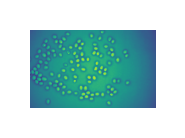

In [37]:
from cellpose import utils
import random

image_folder_path = 'soja'

files = []
folders = os.listdir(image_folder_path)

for folder in folders:
  folder_path = os.path.join(image_folder_path, folder)
  _files = sorted(os.listdir(folder_path))
  _files = [f for f in _files[2:] if f.endswith('.tiff')] # remove first two files

  if _files:
    selected_file = random.choice(_files)
    files.append(os.path.join(folder, selected_file))
  break

# files = files[:10]
print(files)
print(len(files))

imgs = [skimage.io.imread(os.path.join(image_folder_path, f)) for f in files]
nimg = len(imgs)


plt.figure(figsize=(8,4))
for k,img in enumerate(imgs):
   plt.subplot(10, 5 ,k+1)
   plt.axis('off')
   plt.imshow(img)
plt.savefig("amostras")

In [38]:
imgs_2D = imgs

from cellpose import models

# DEFINE CELLPOSE MODEL
# model_type='cyto3' or model_type='nuclei'
model = models.Cellpose(gpu=use_GPU, model_type='cyto3')

# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
# channels = [0,0]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# or if you have different types of channels in each image
channels = [0,0]
# channels = [1,1]

# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended)
# diameter can be a list or a single number for all images

masks, flows, styles, diams = model.eval(imgs_2D, diameter=60, flow_threshold=None, channels=channels)

2024-07-28 13:47:10,367 [INFO] ** TORCH CUDA version installed and working. **
2024-07-28 13:47:10,367 [INFO] >>>> using GPU
2024-07-28 13:47:10,368 [INFO] >> cyto3 << model set to be used
2024-07-28 13:47:10,433 [INFO] >>>> loading model /home/duardo/.cellpose/models/cyto3
2024-07-28 13:47:10,518 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
2024-07-28 13:47:10,519 [INFO] channels set to [0, 0]
2024-07-28 13:47:10,520 [INFO] ~~~ FINDING MASKS ~~~
2024-07-28 13:47:11,241 [INFO] >>>> TOTAL TIME 0.72 sec


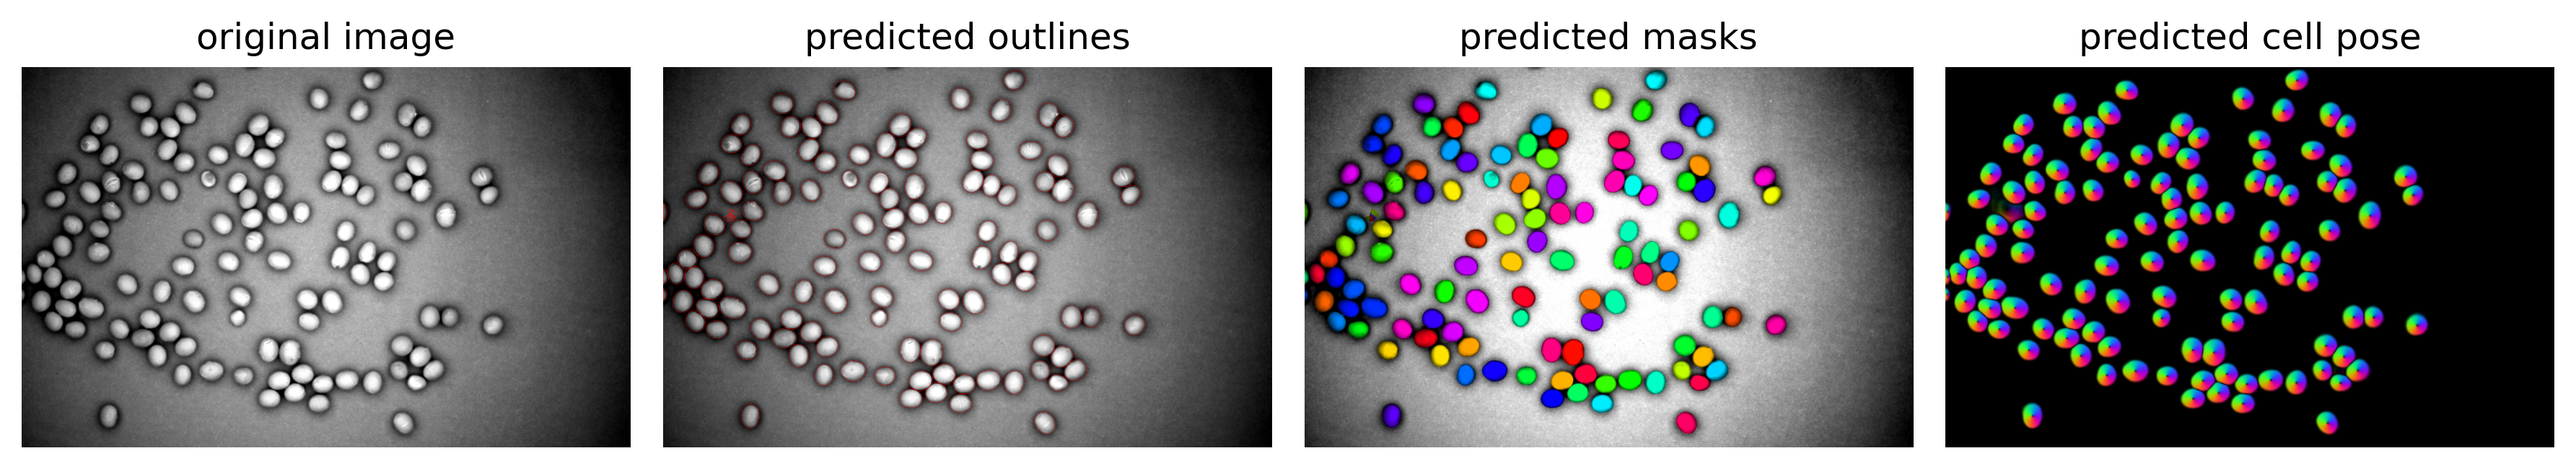

In [40]:
from cellpose import plot

nimg = len(imgs_2D)
for idx in range(1):
    maski = masks[idx]
    flowi = flows[idx][0]

    fig = plt.figure(figsize=(12,5))
    plot.show_segmentation(fig, imgs[idx], maski, flowi, channels=channels)
    plt.tight_layout()
    plt.show()

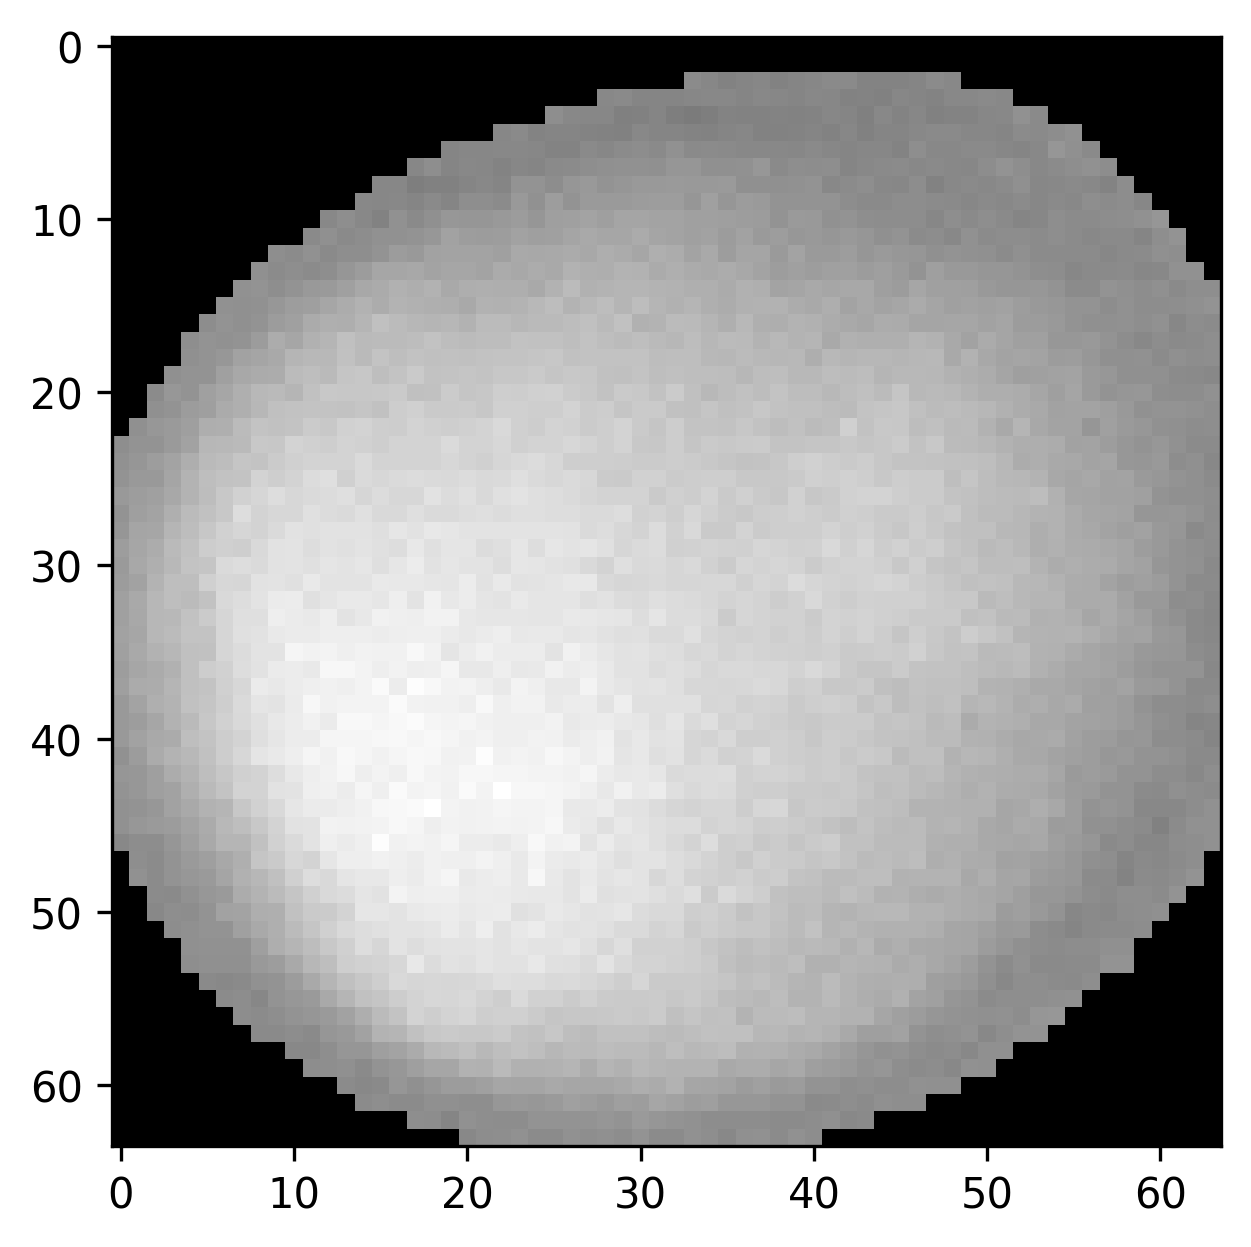

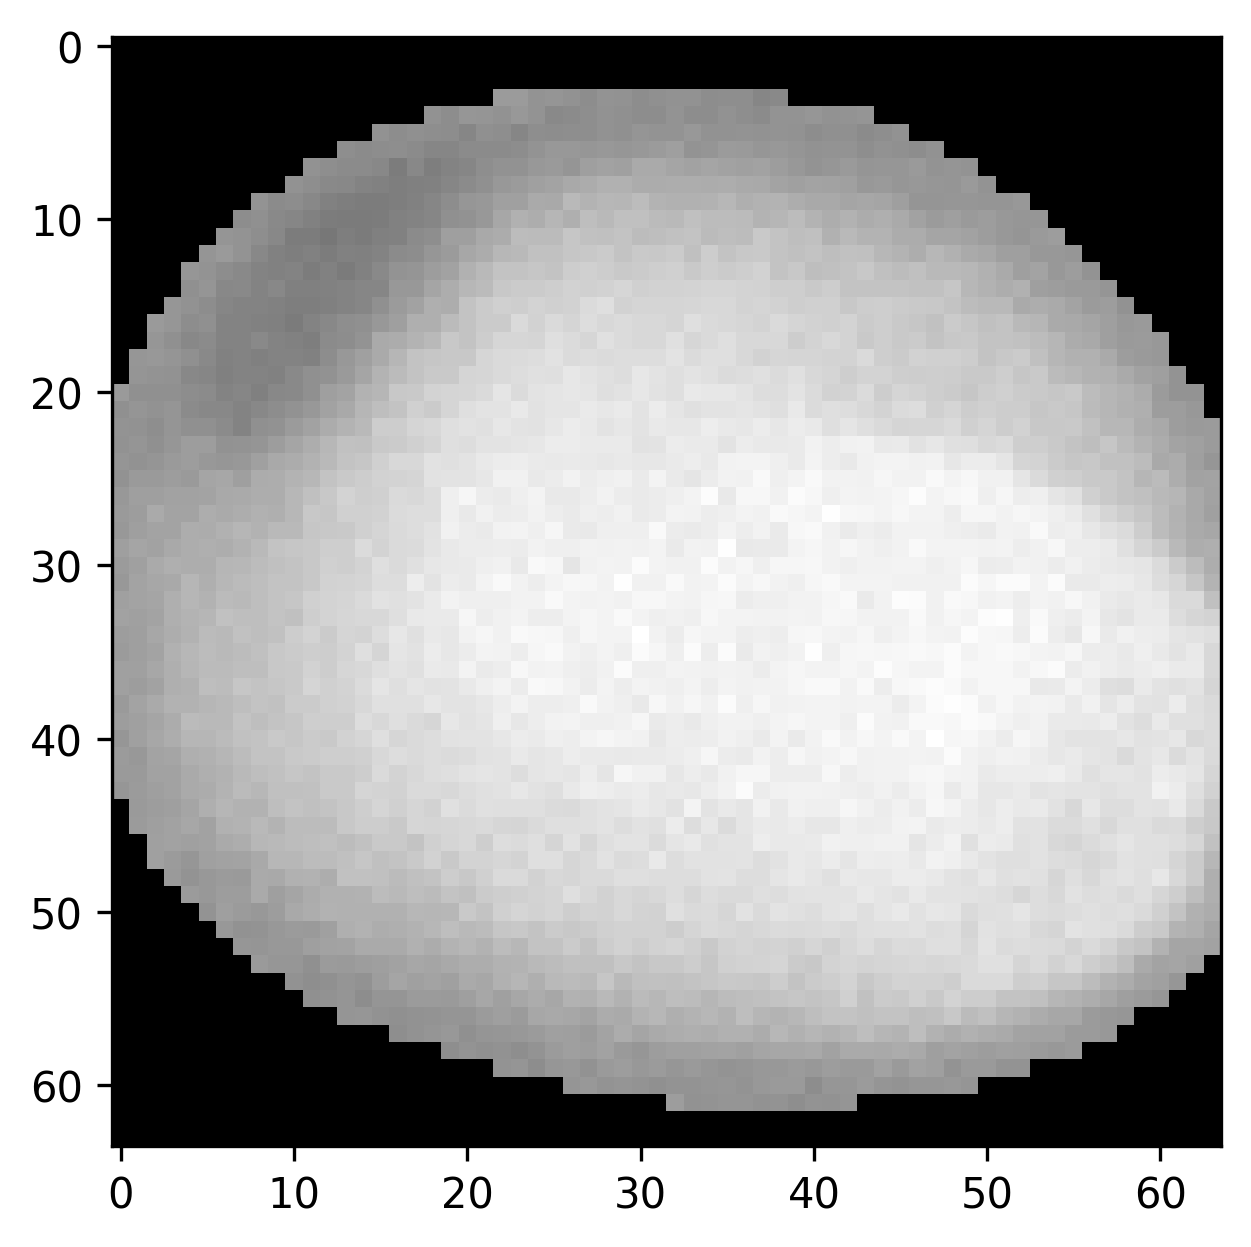

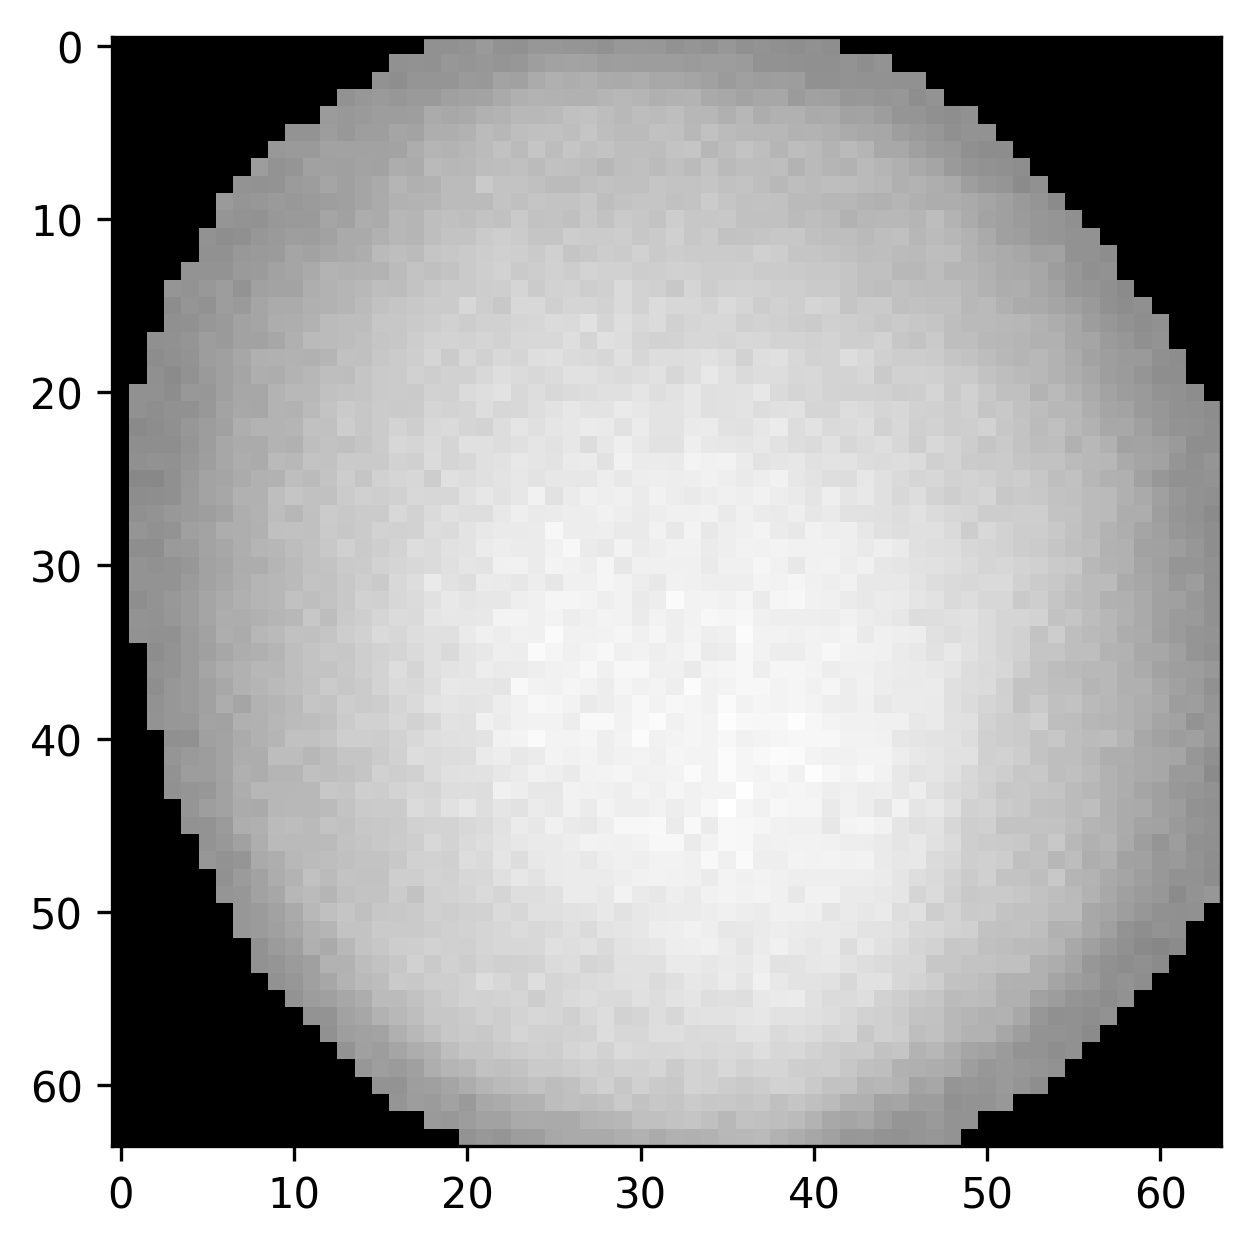

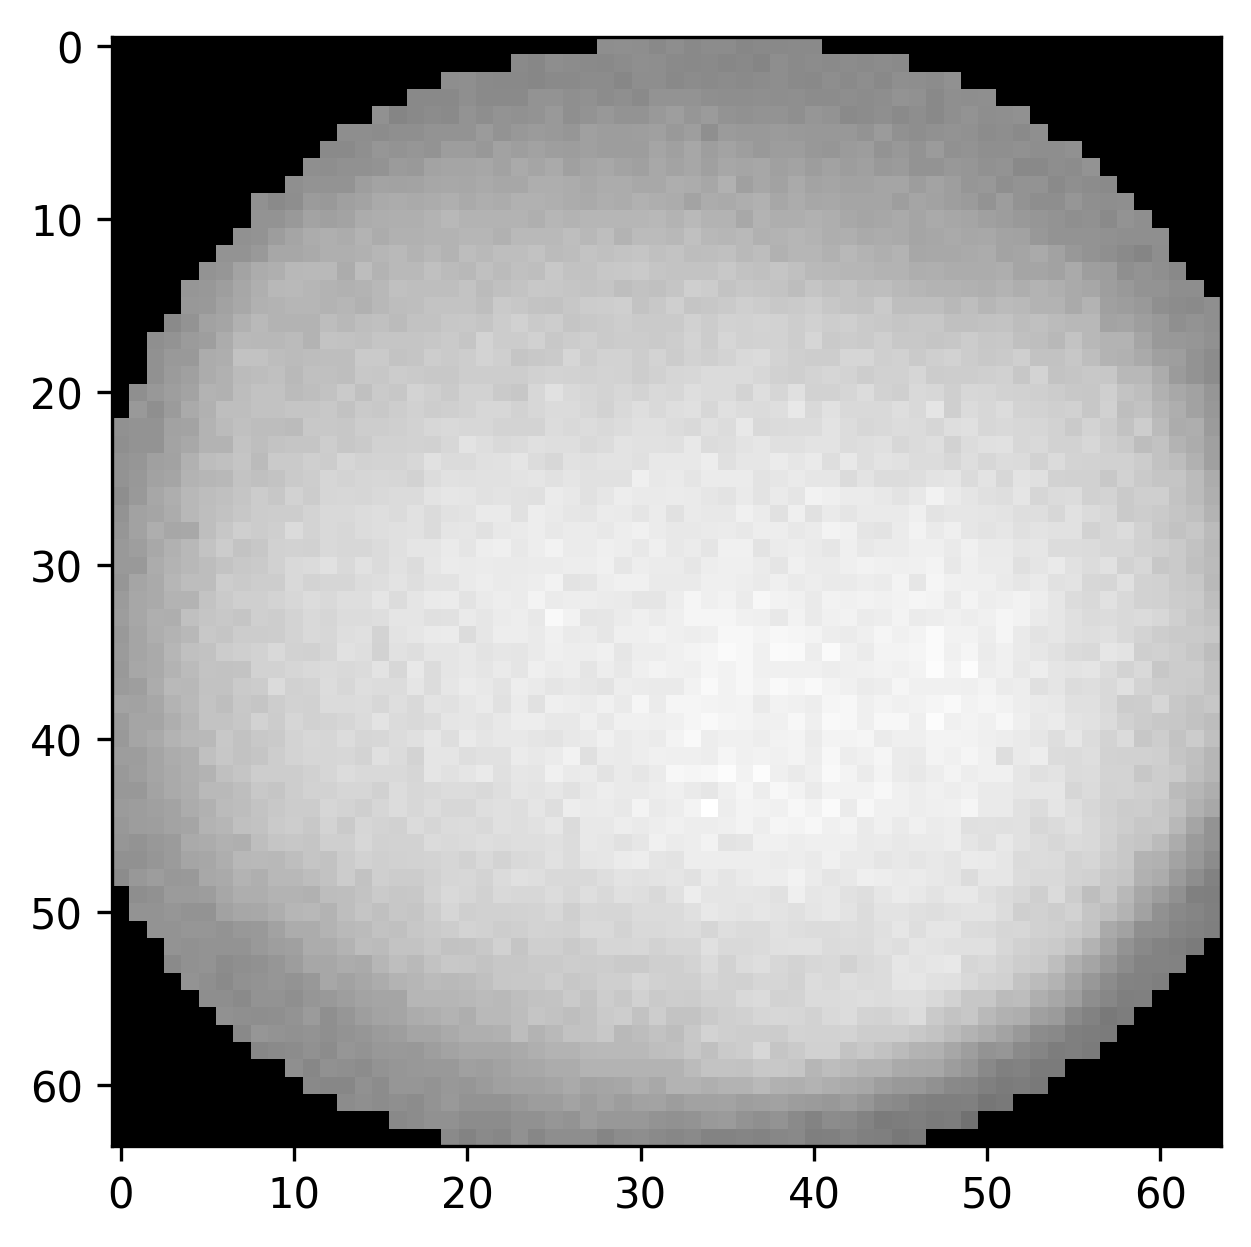

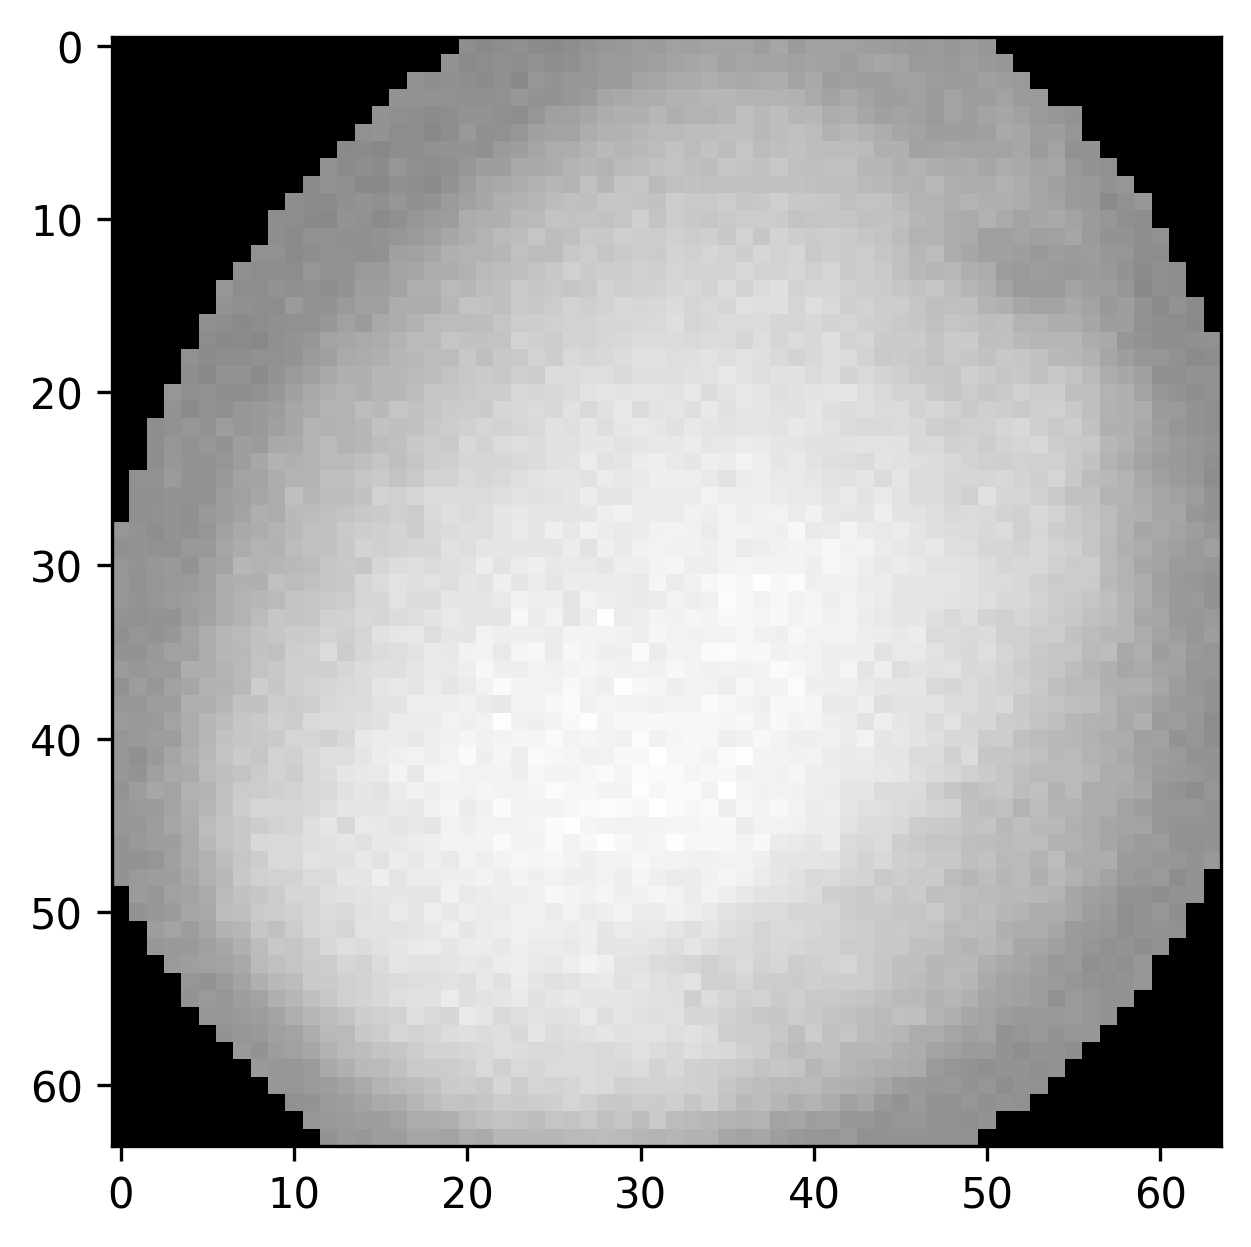

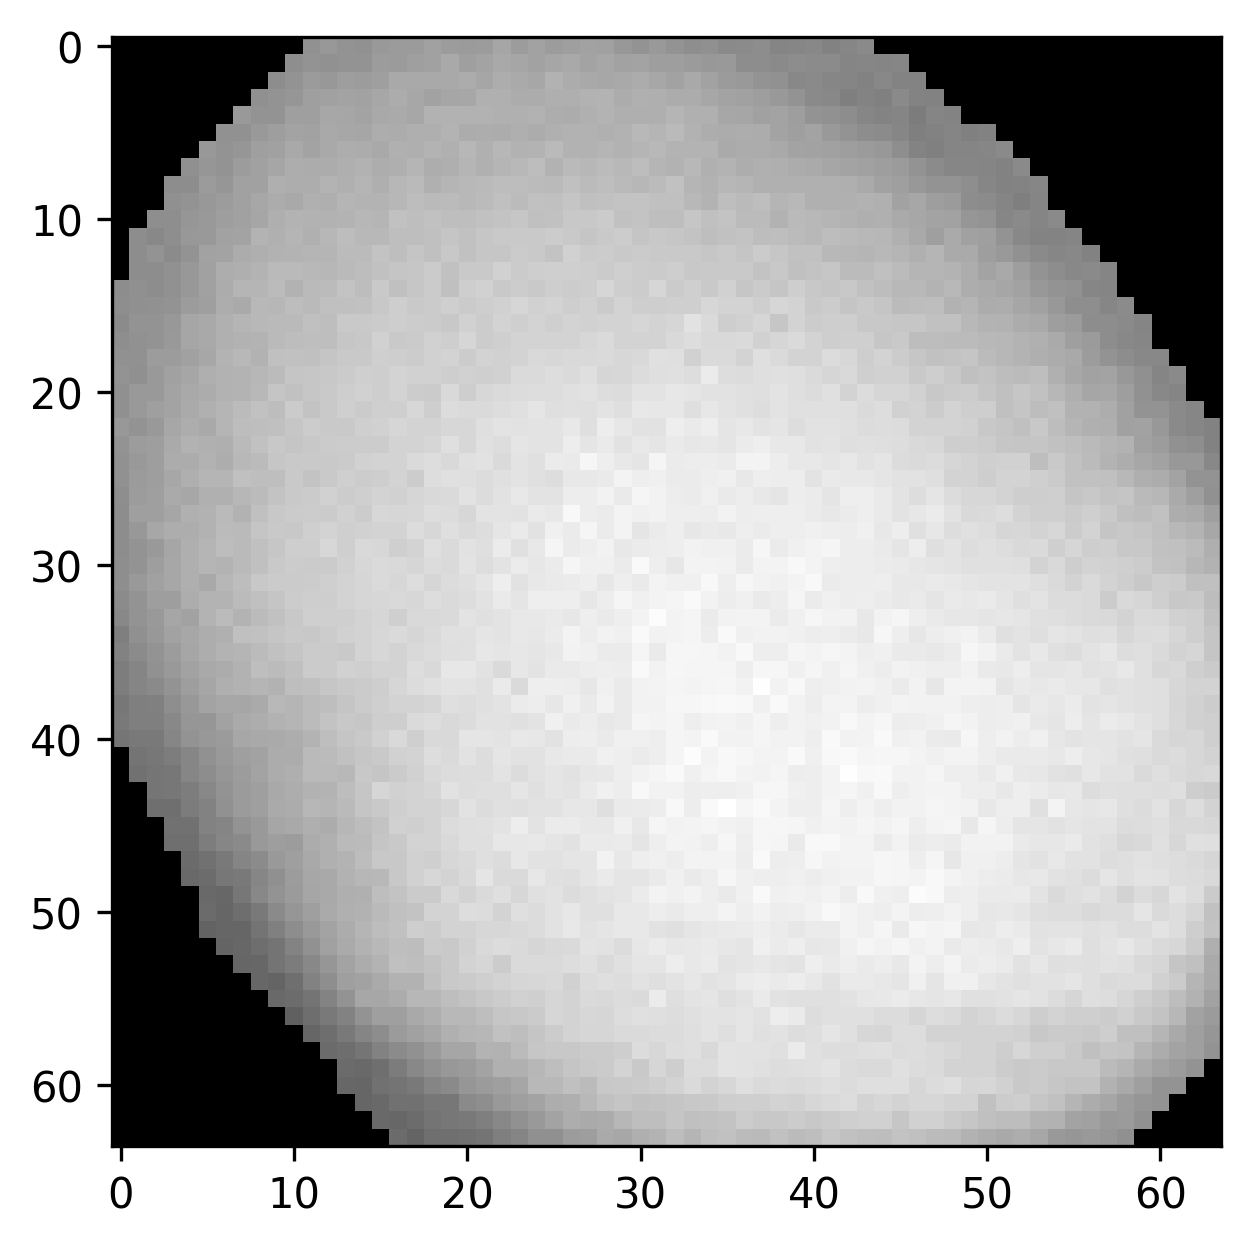

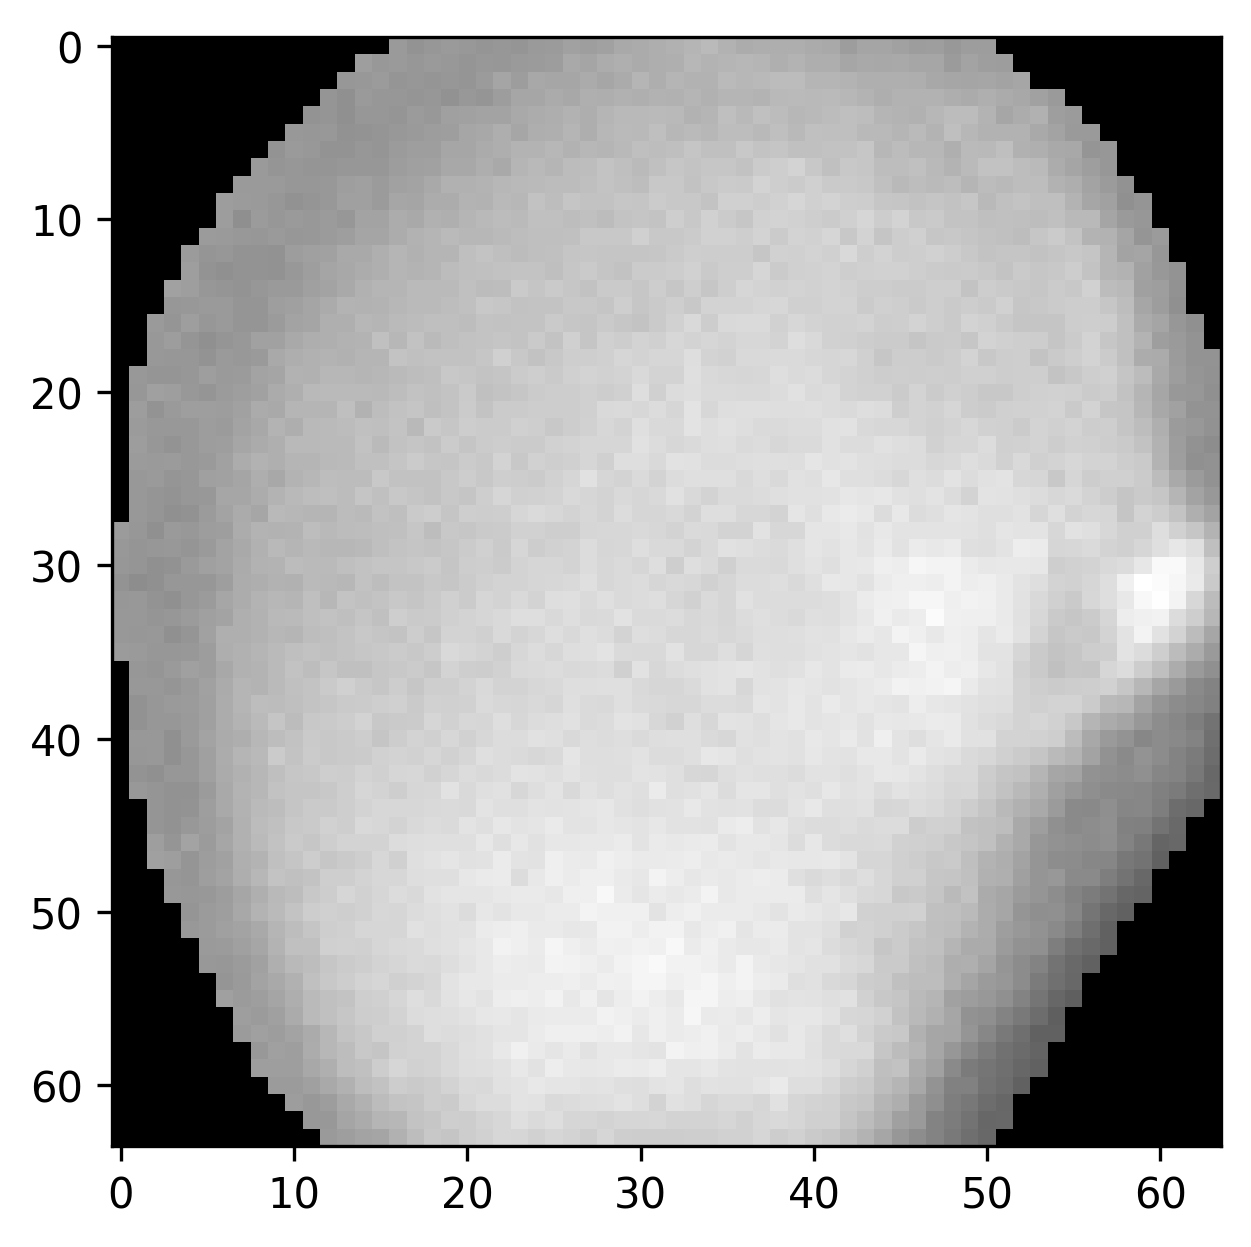

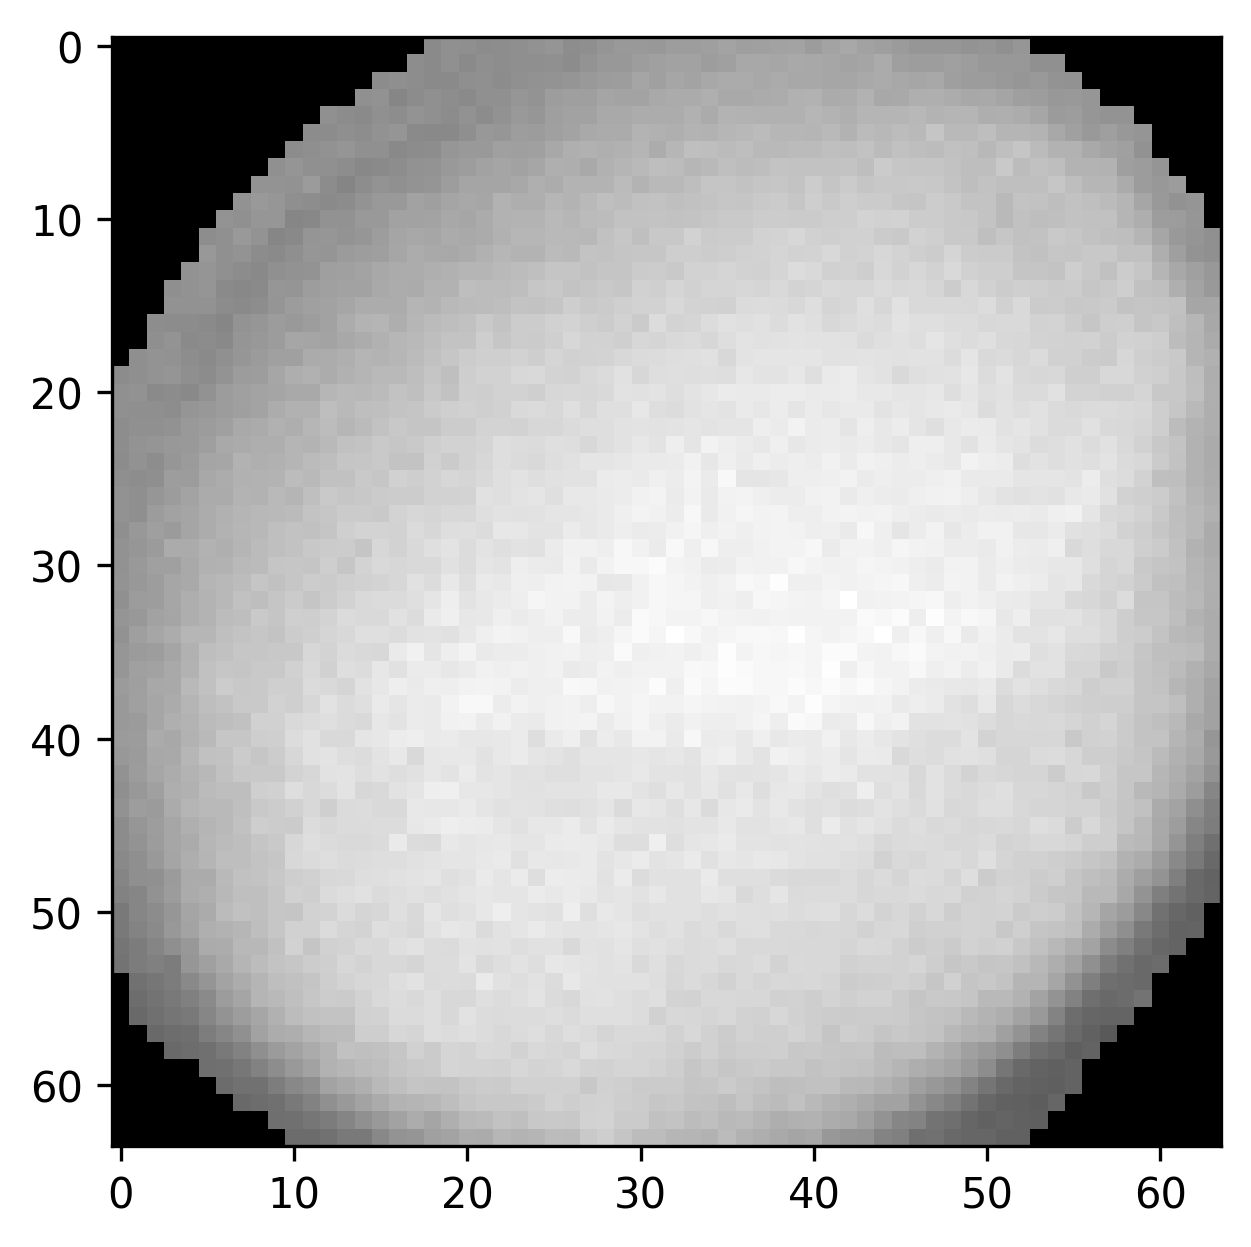

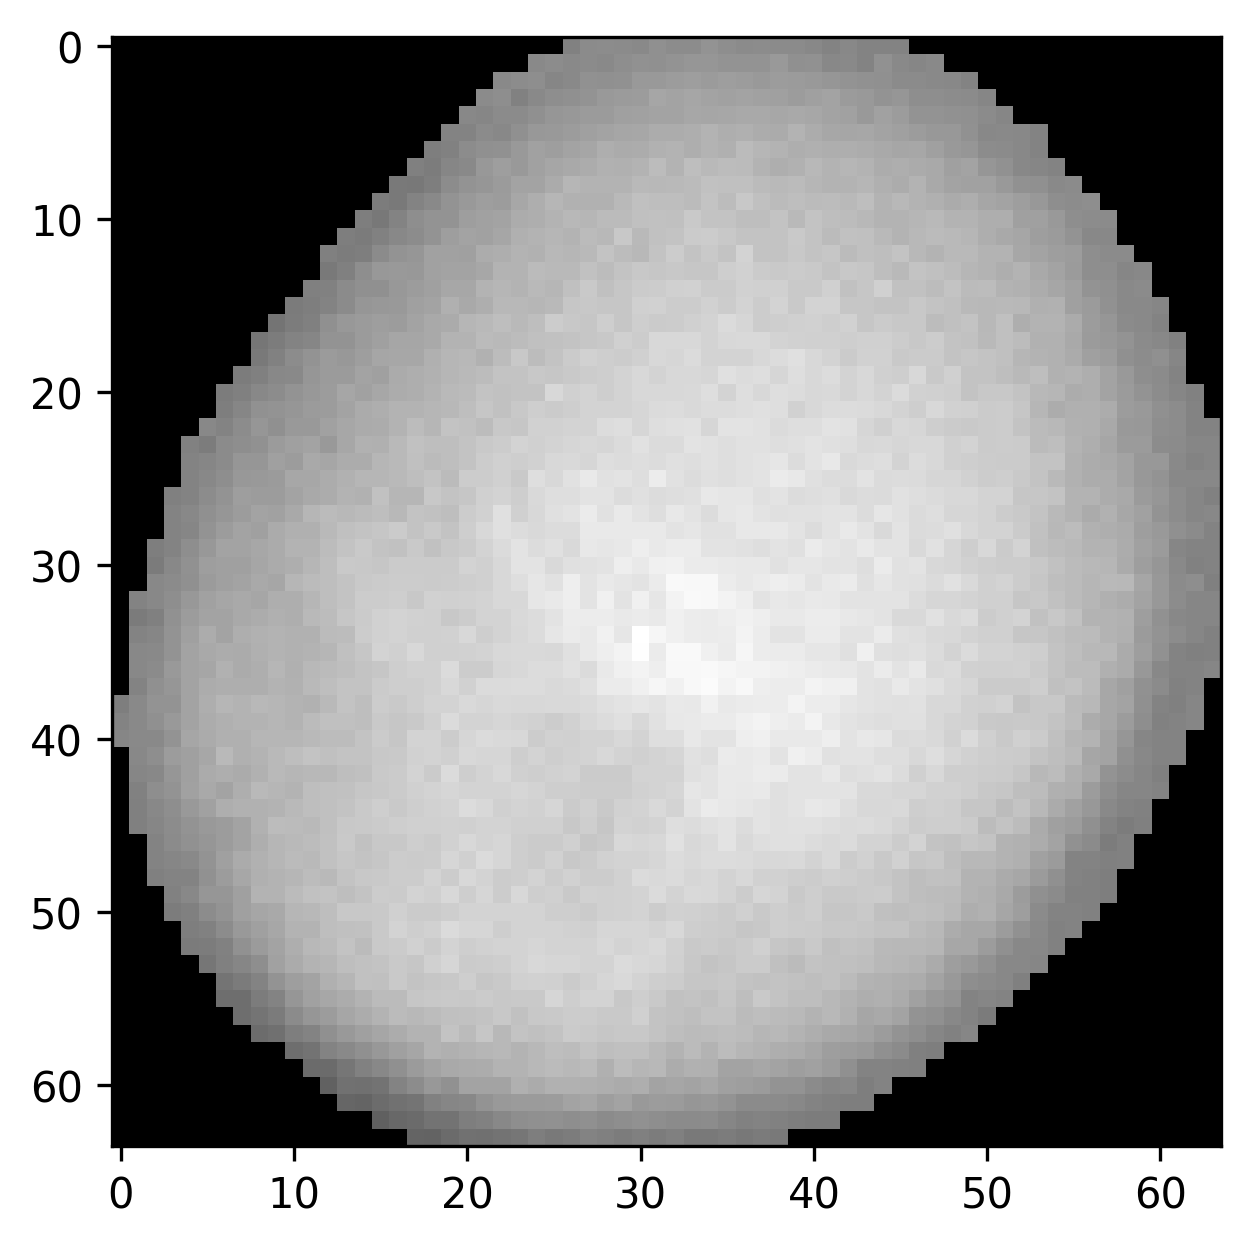

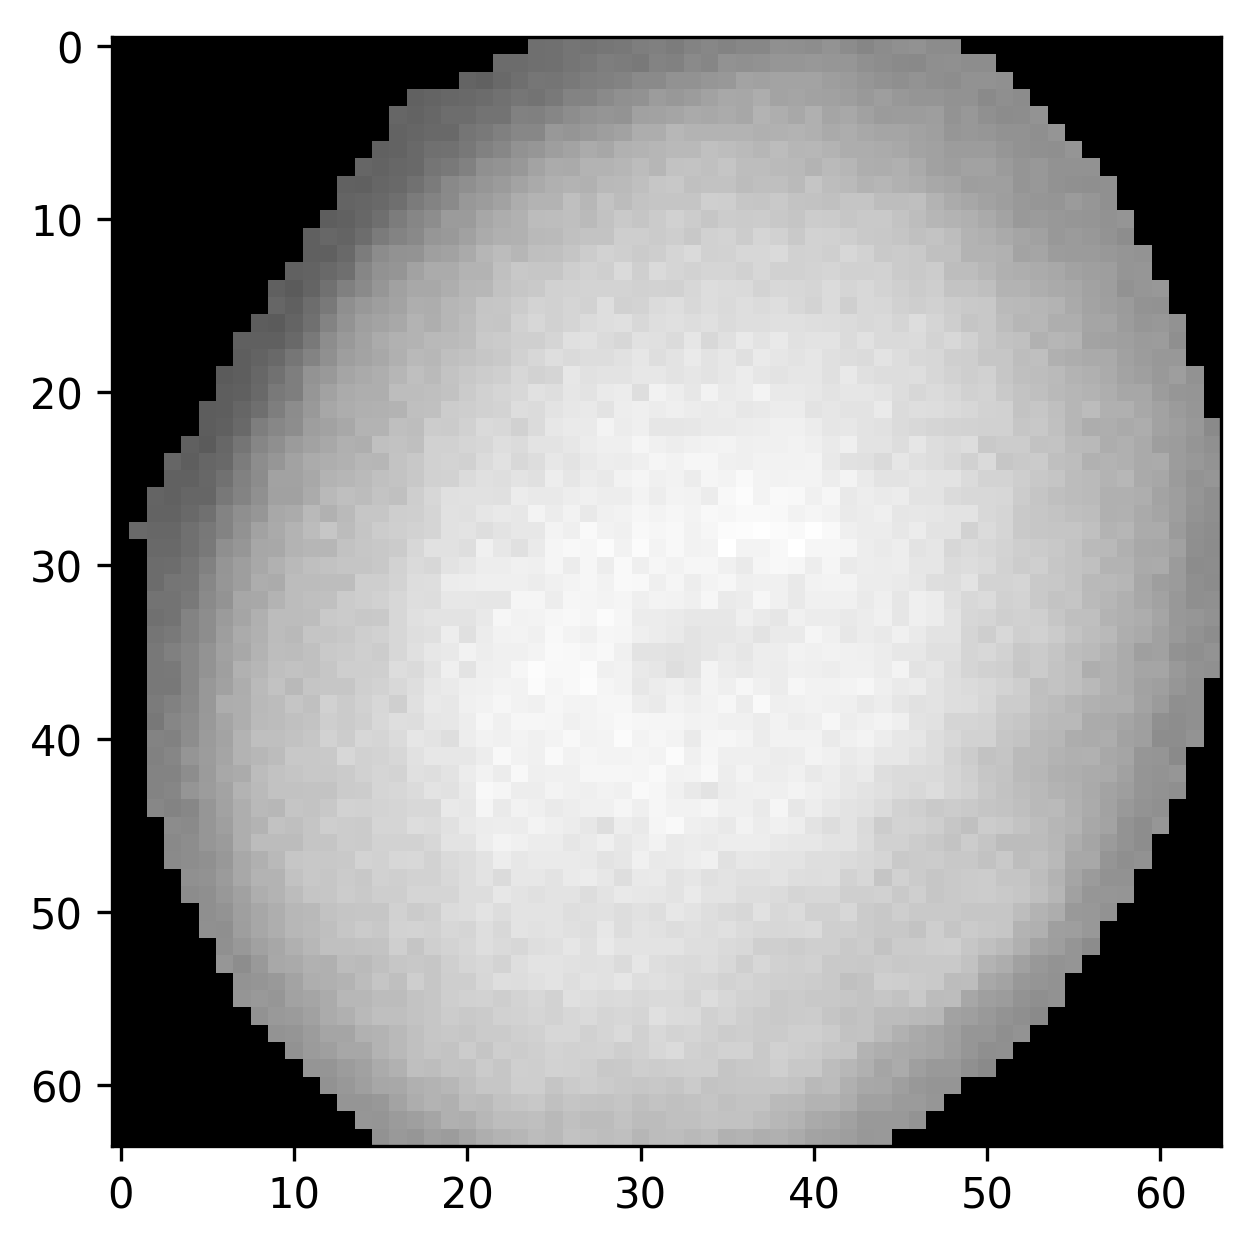

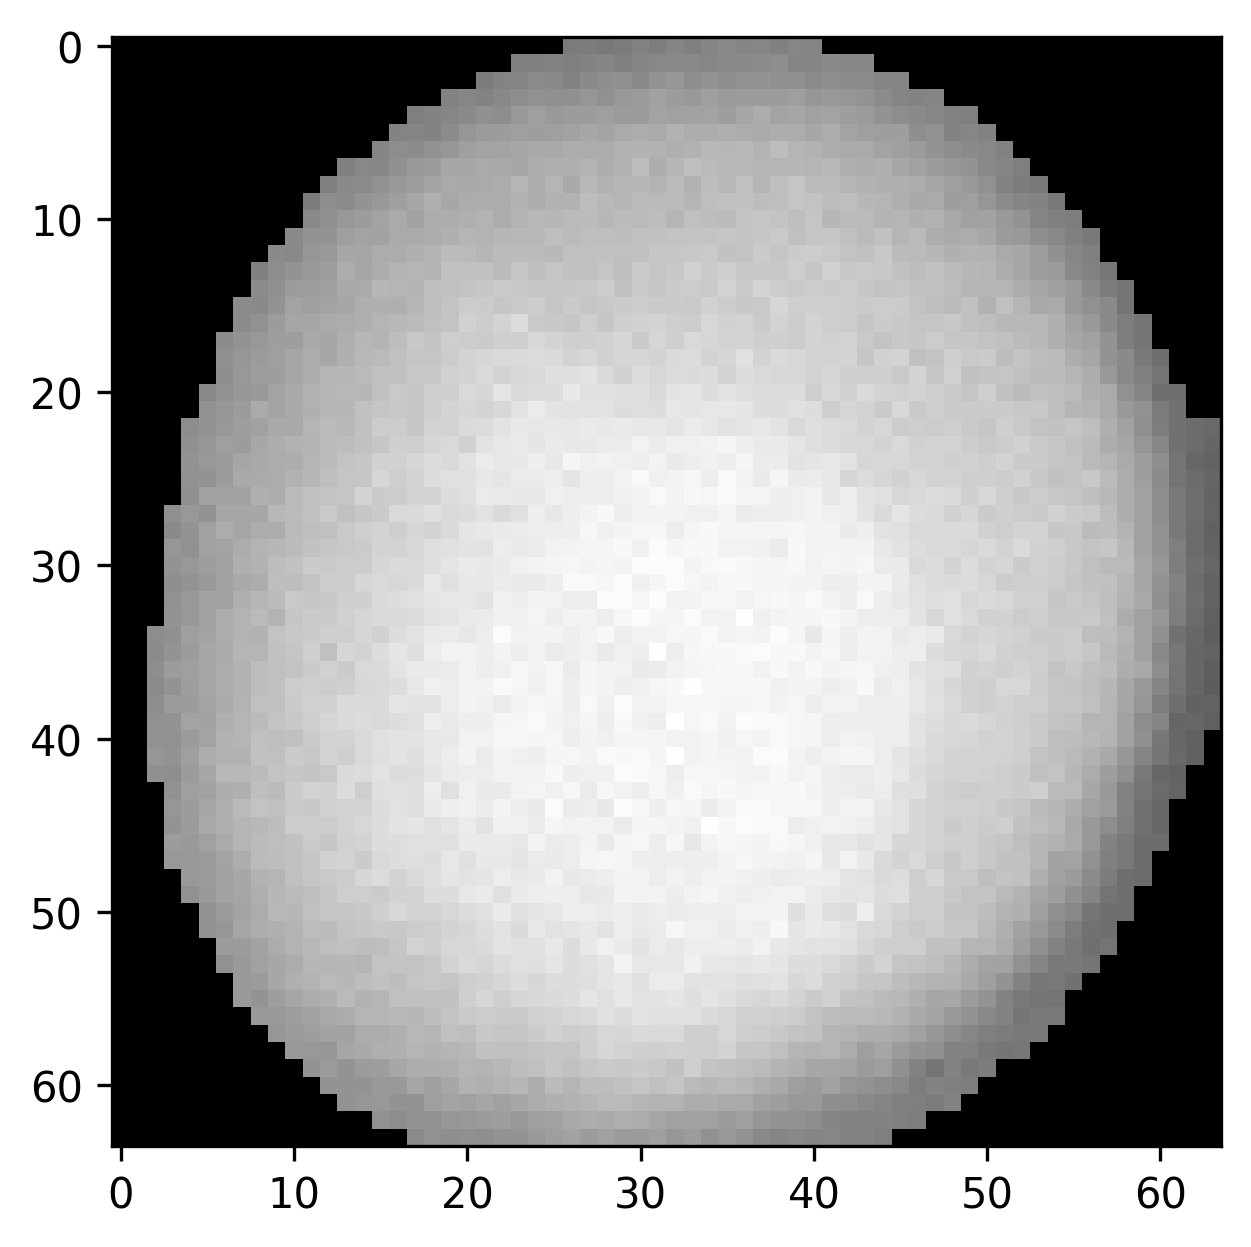

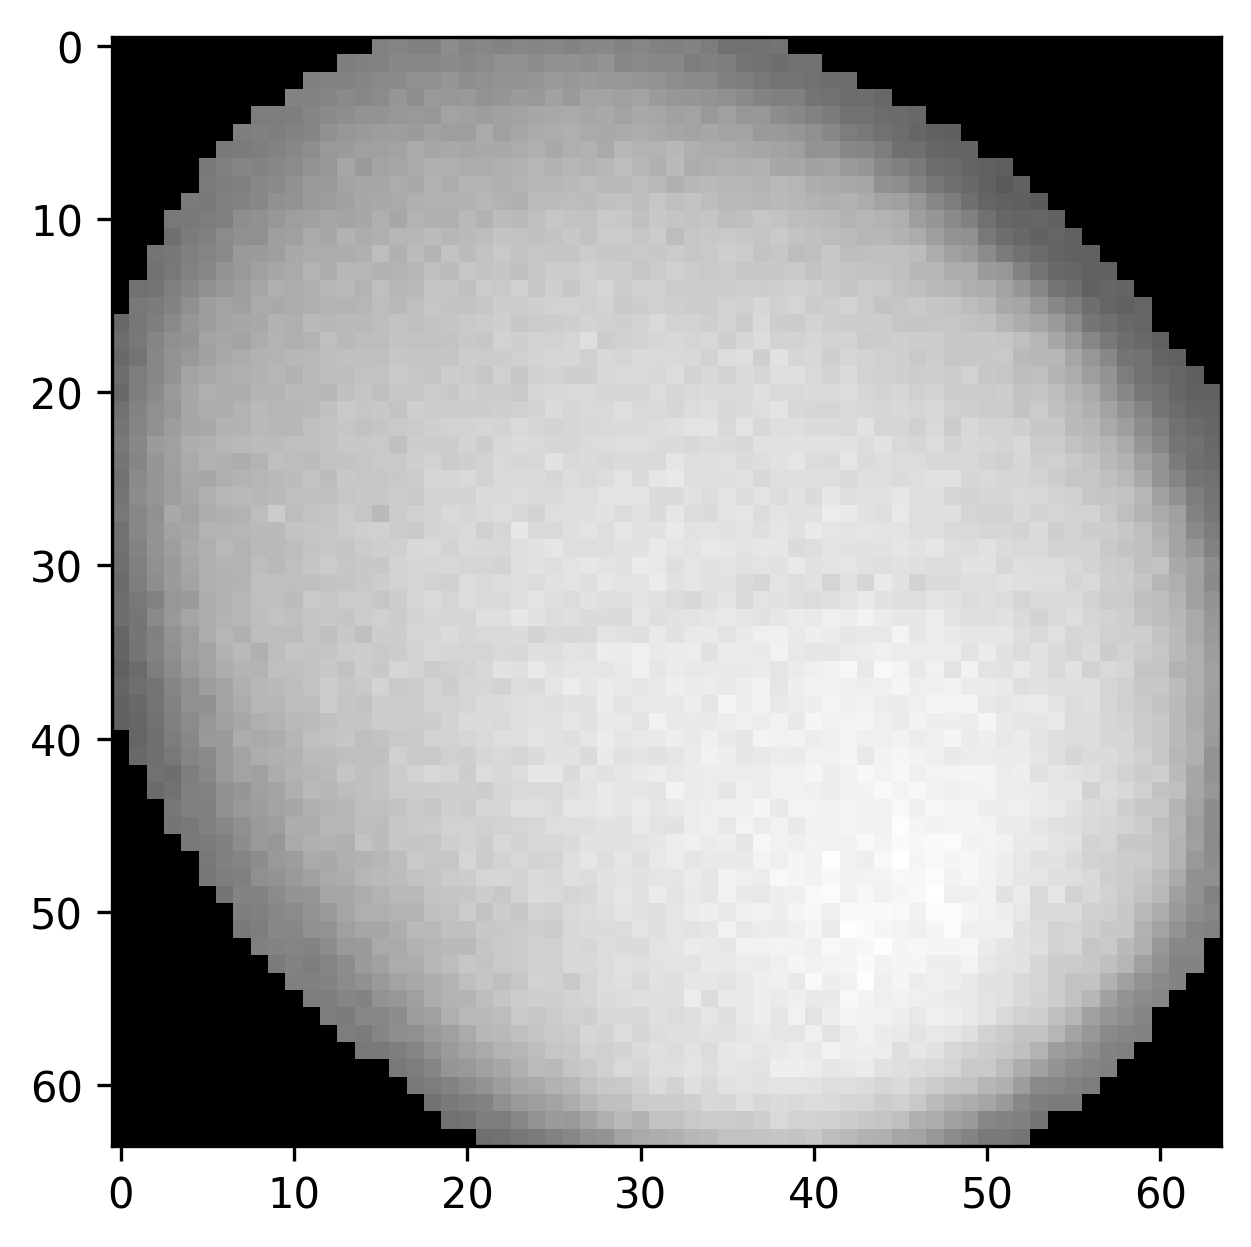

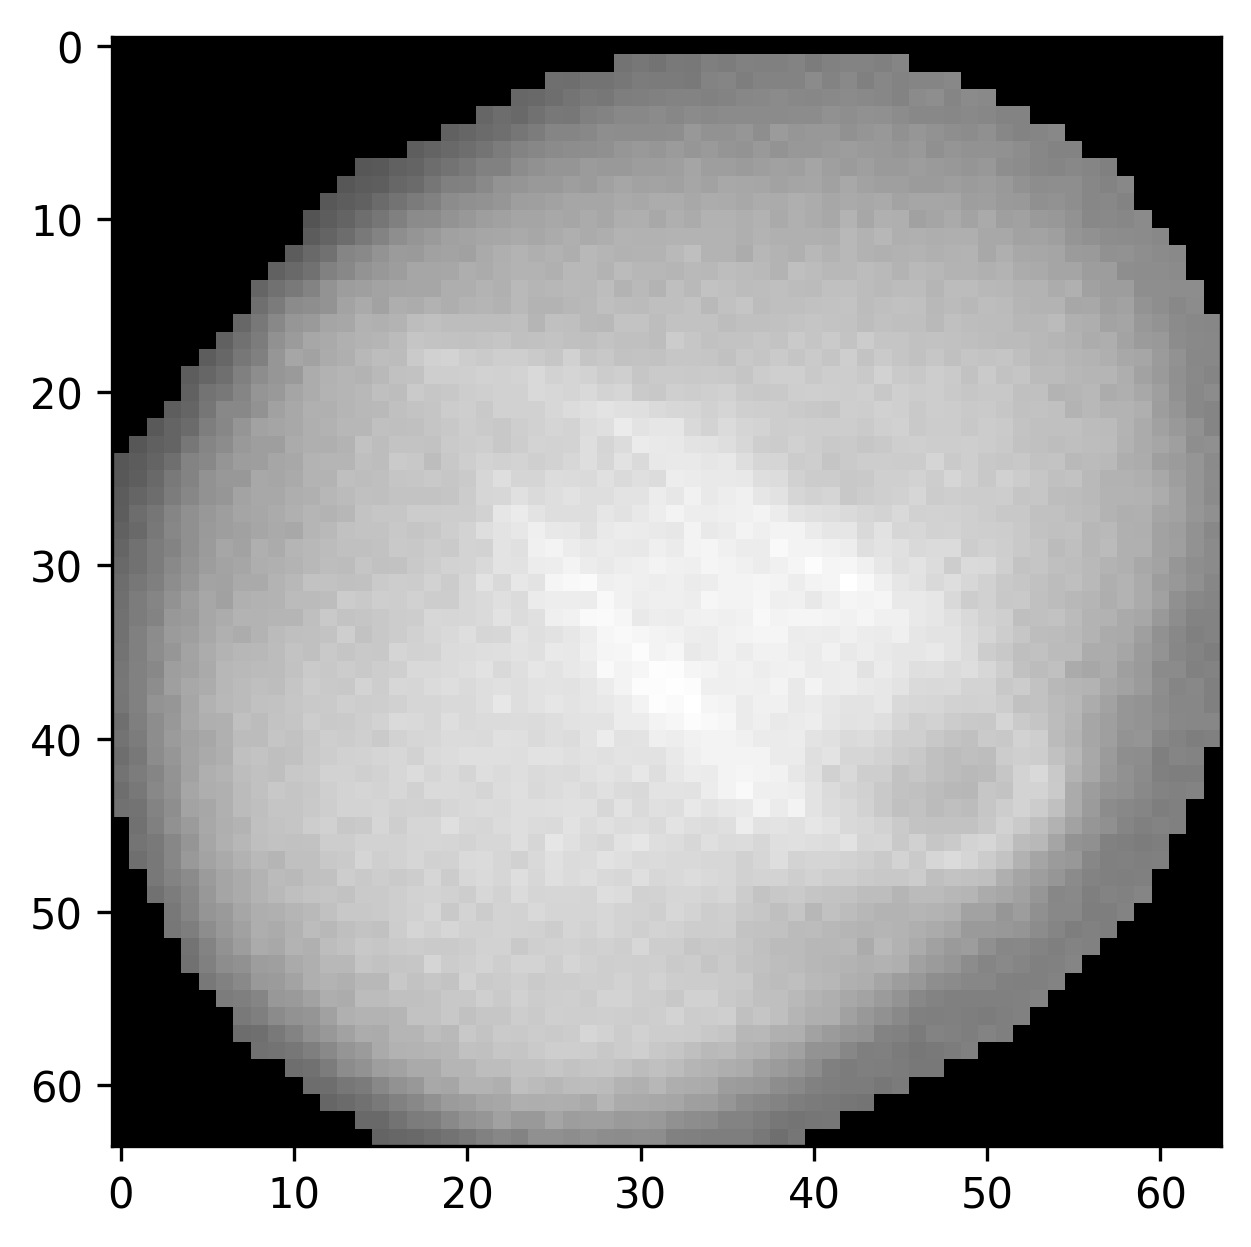

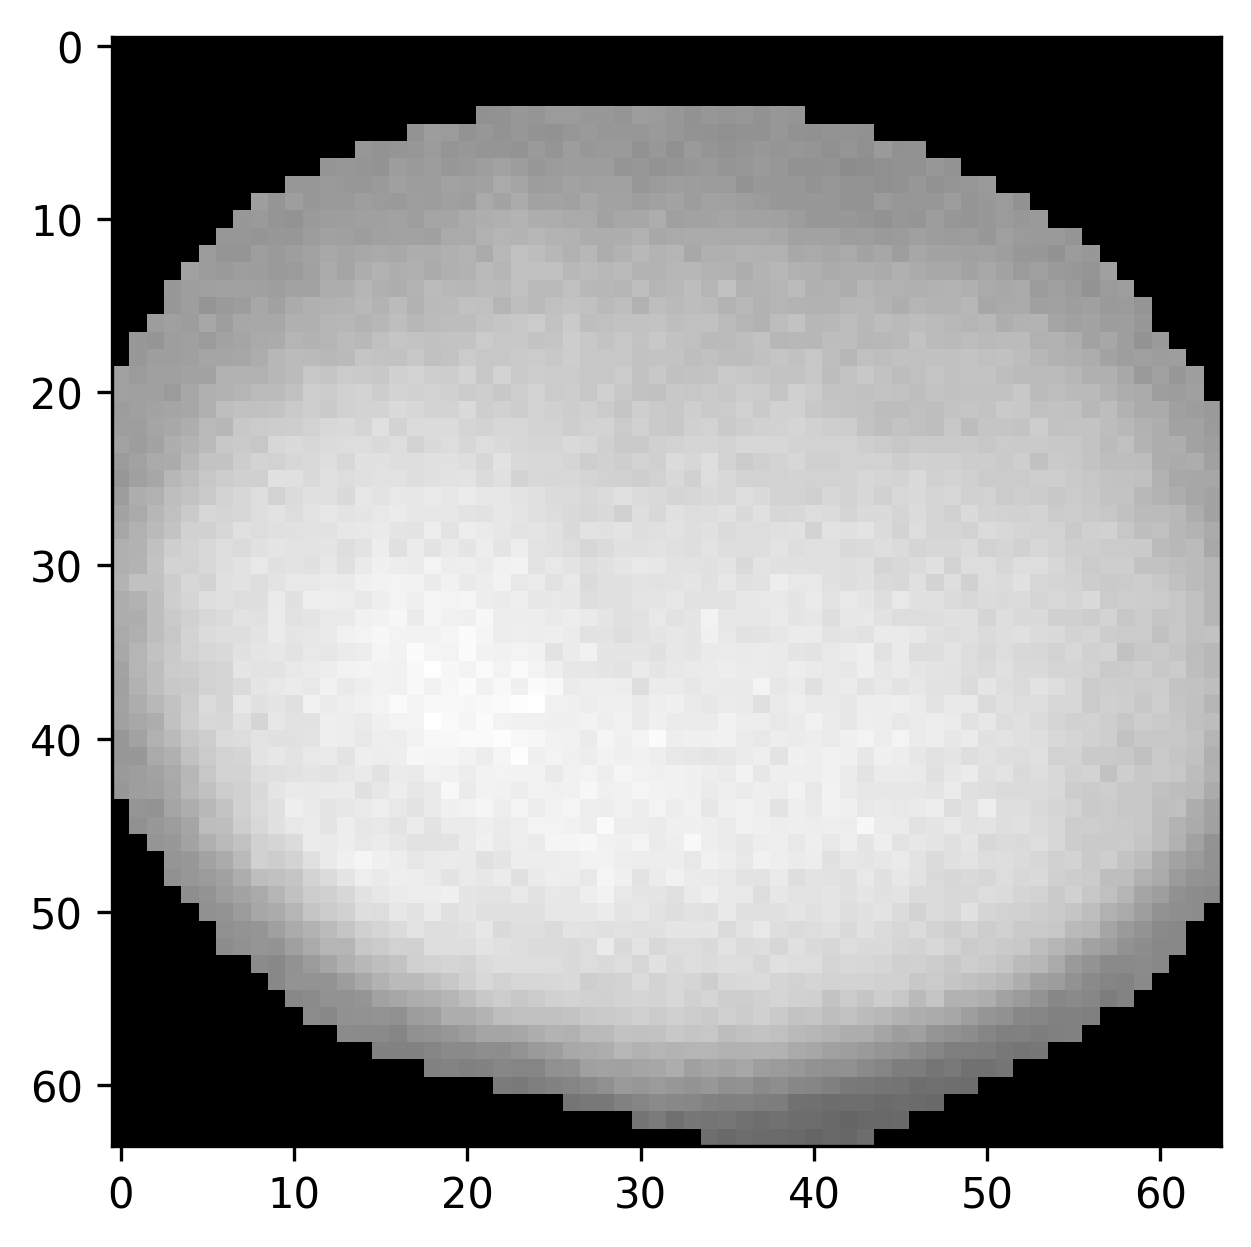

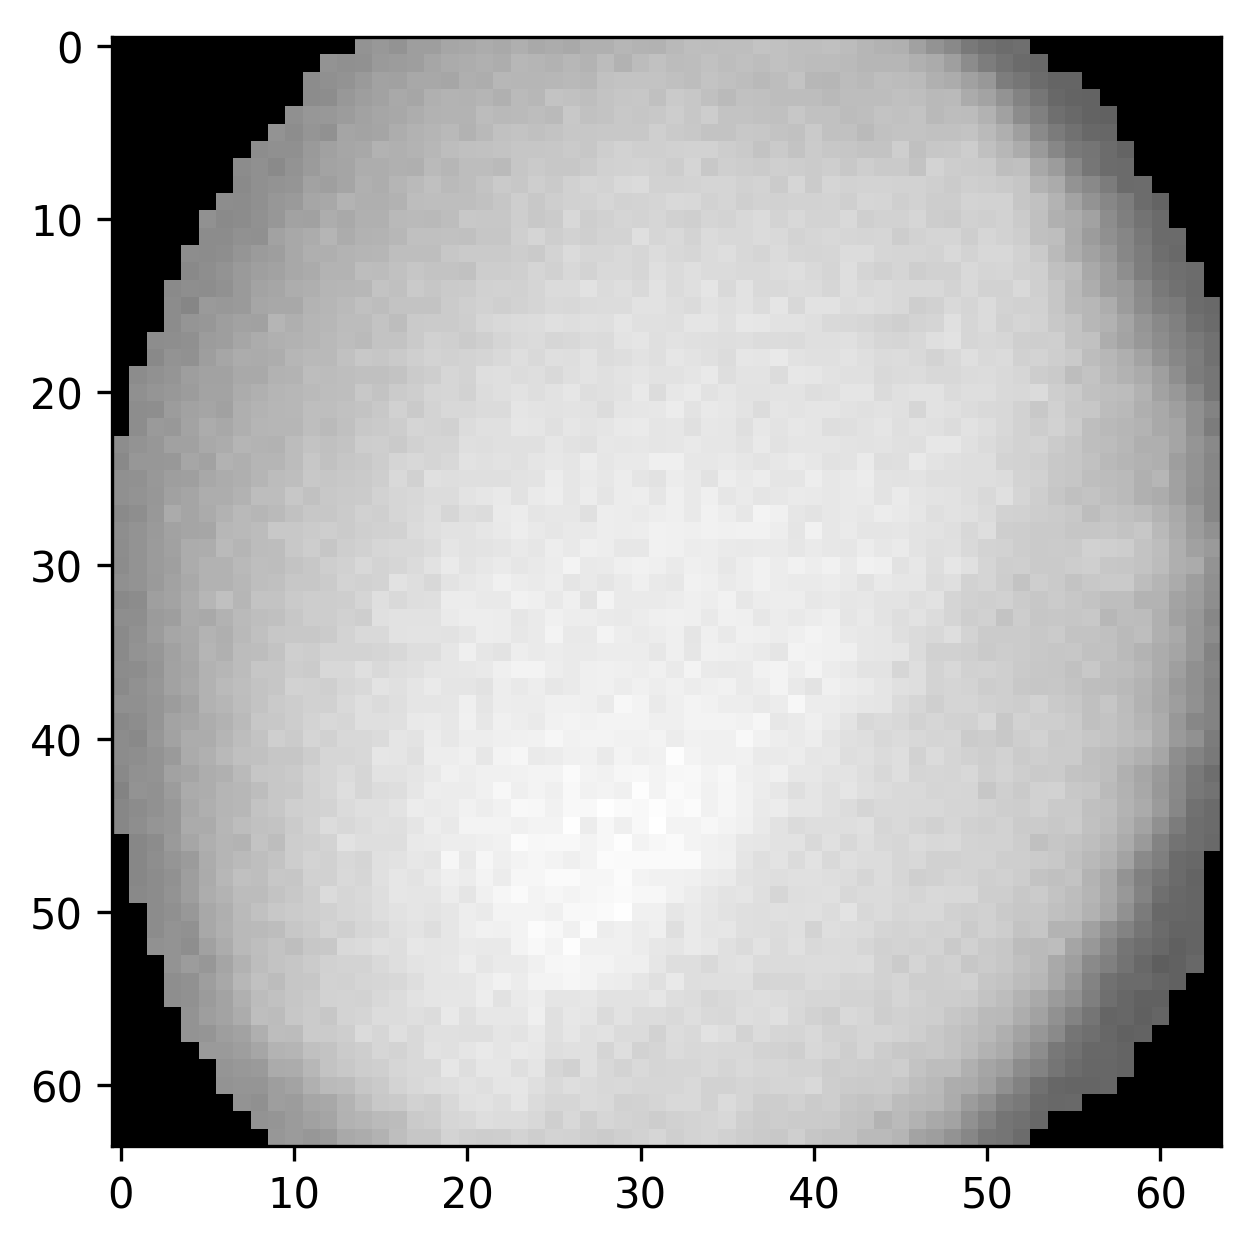

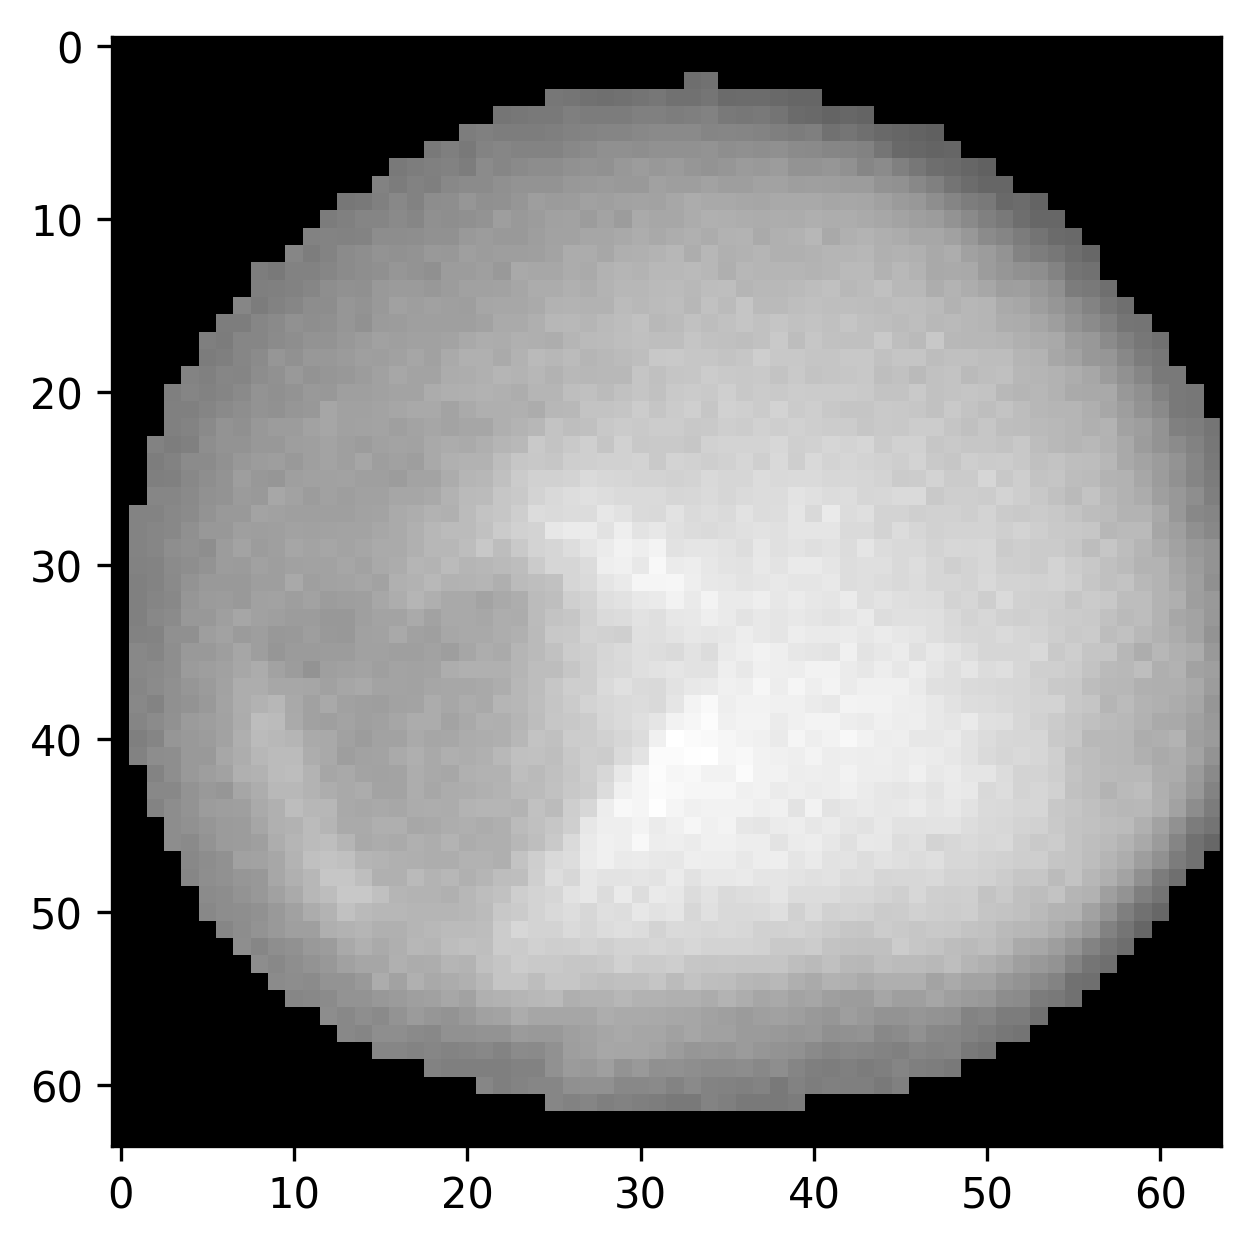

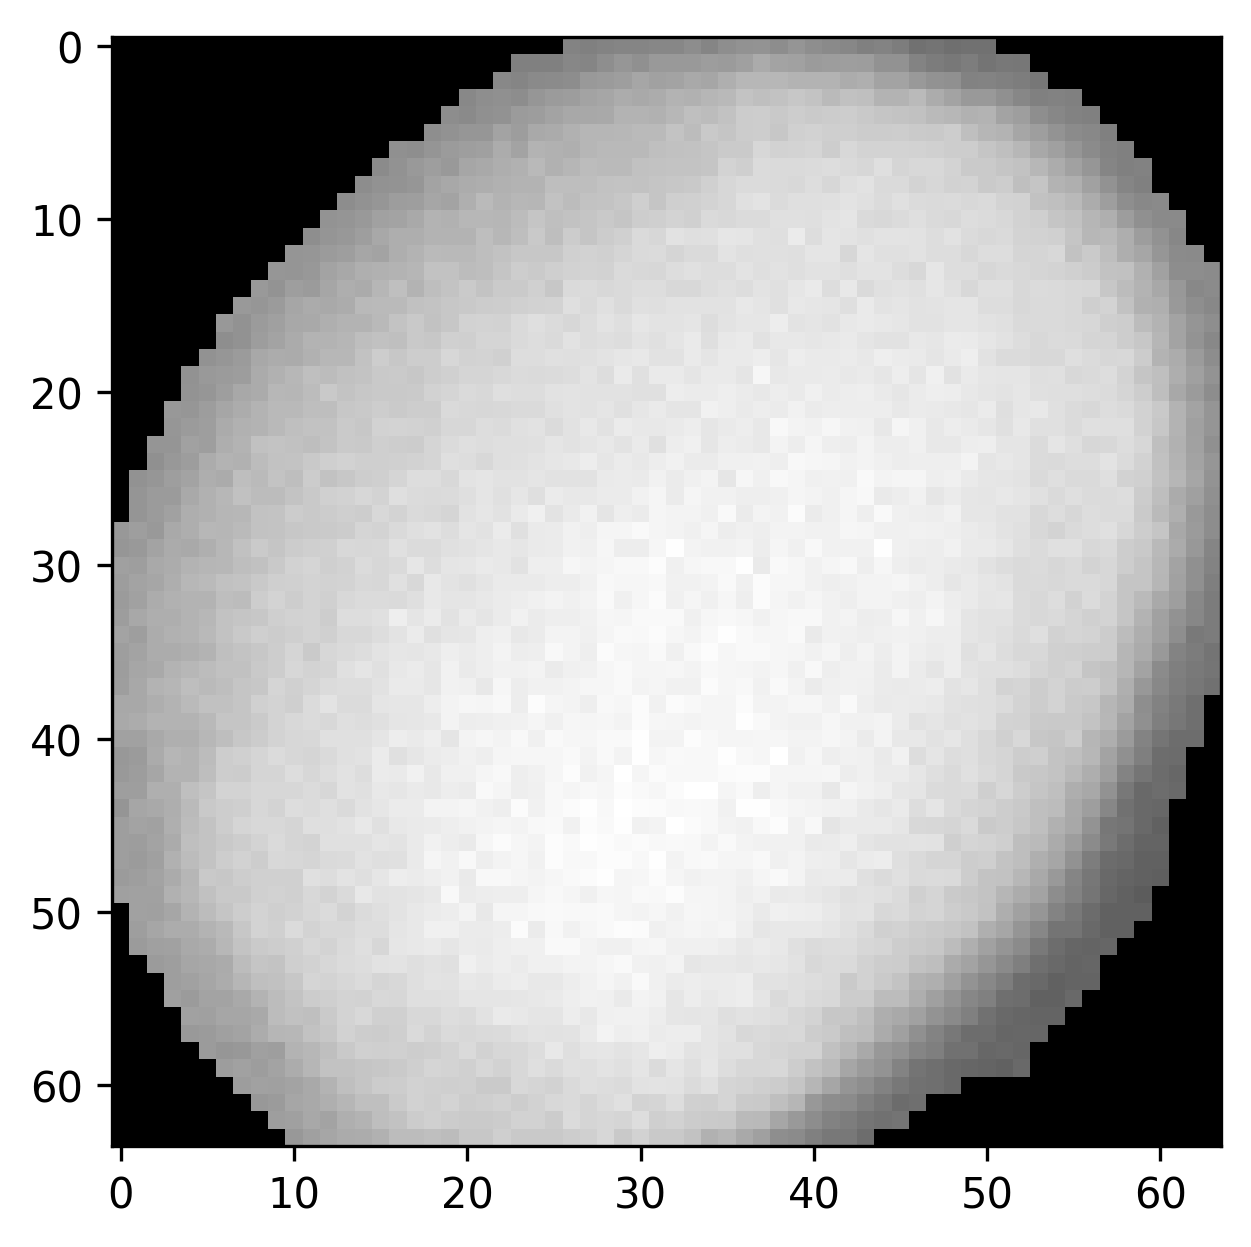

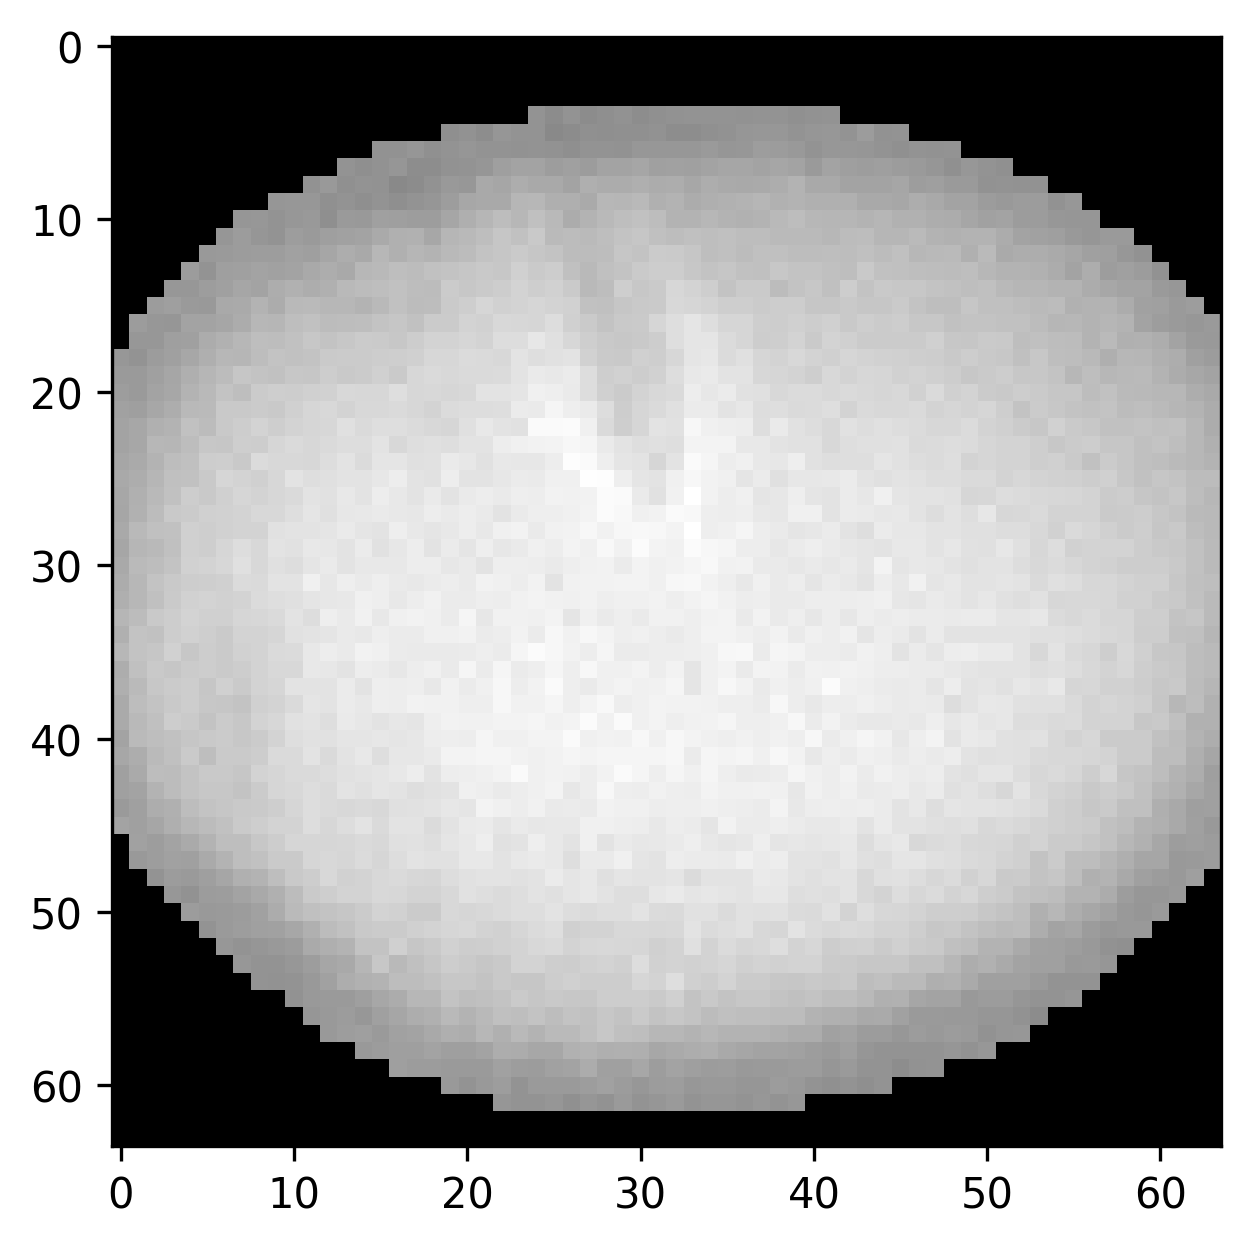

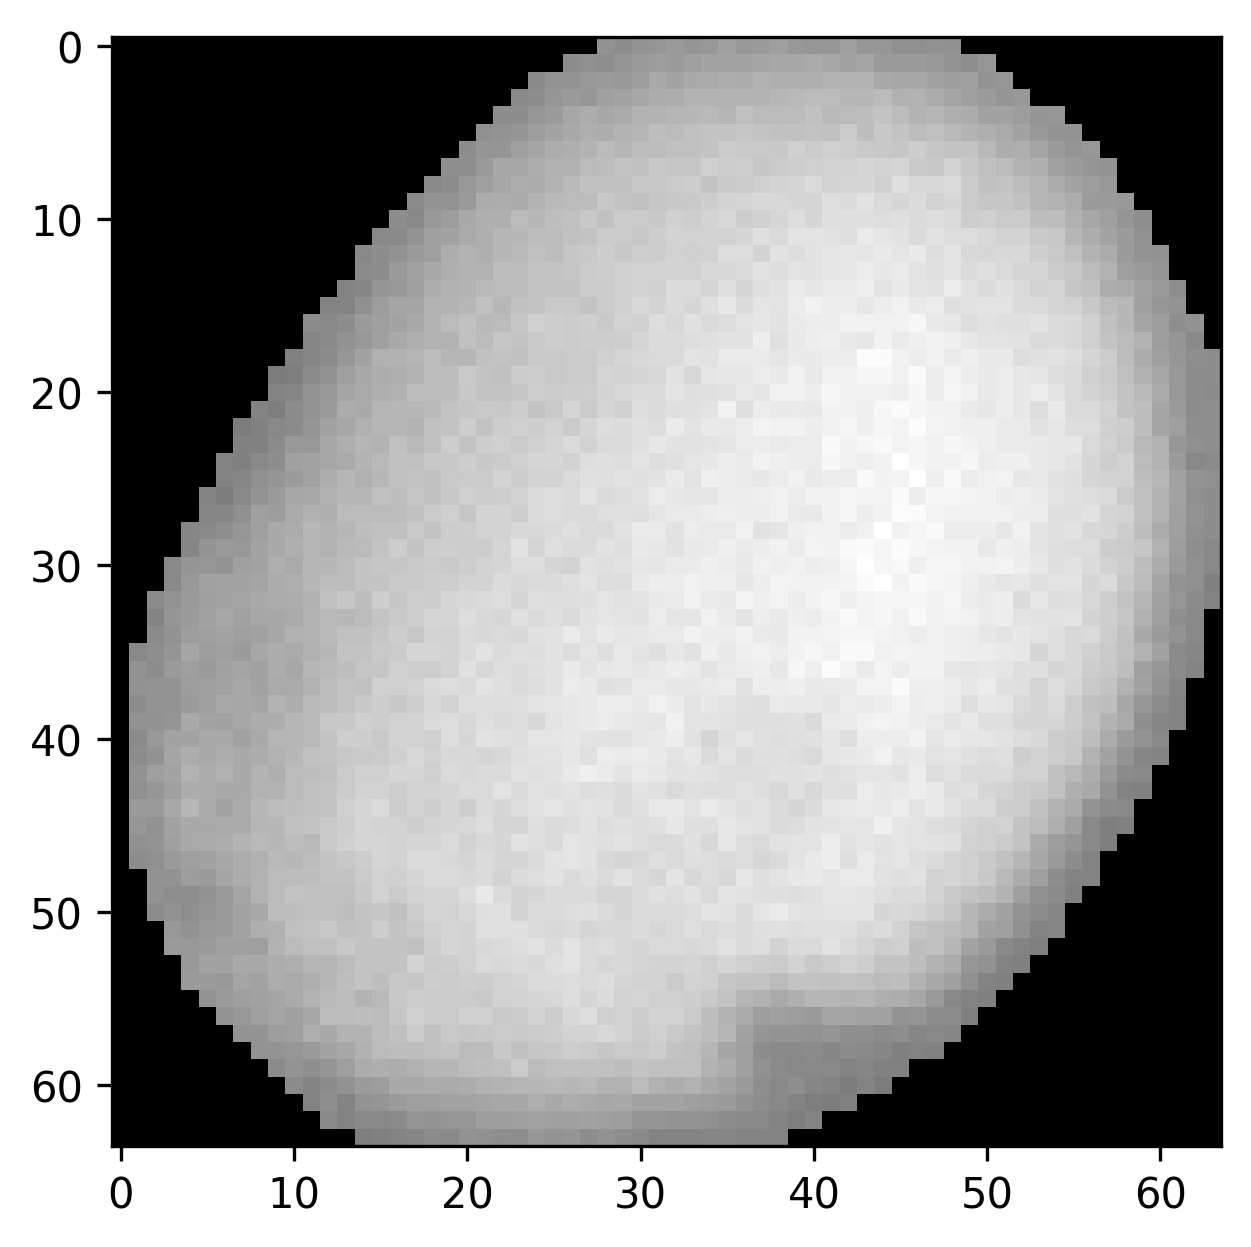

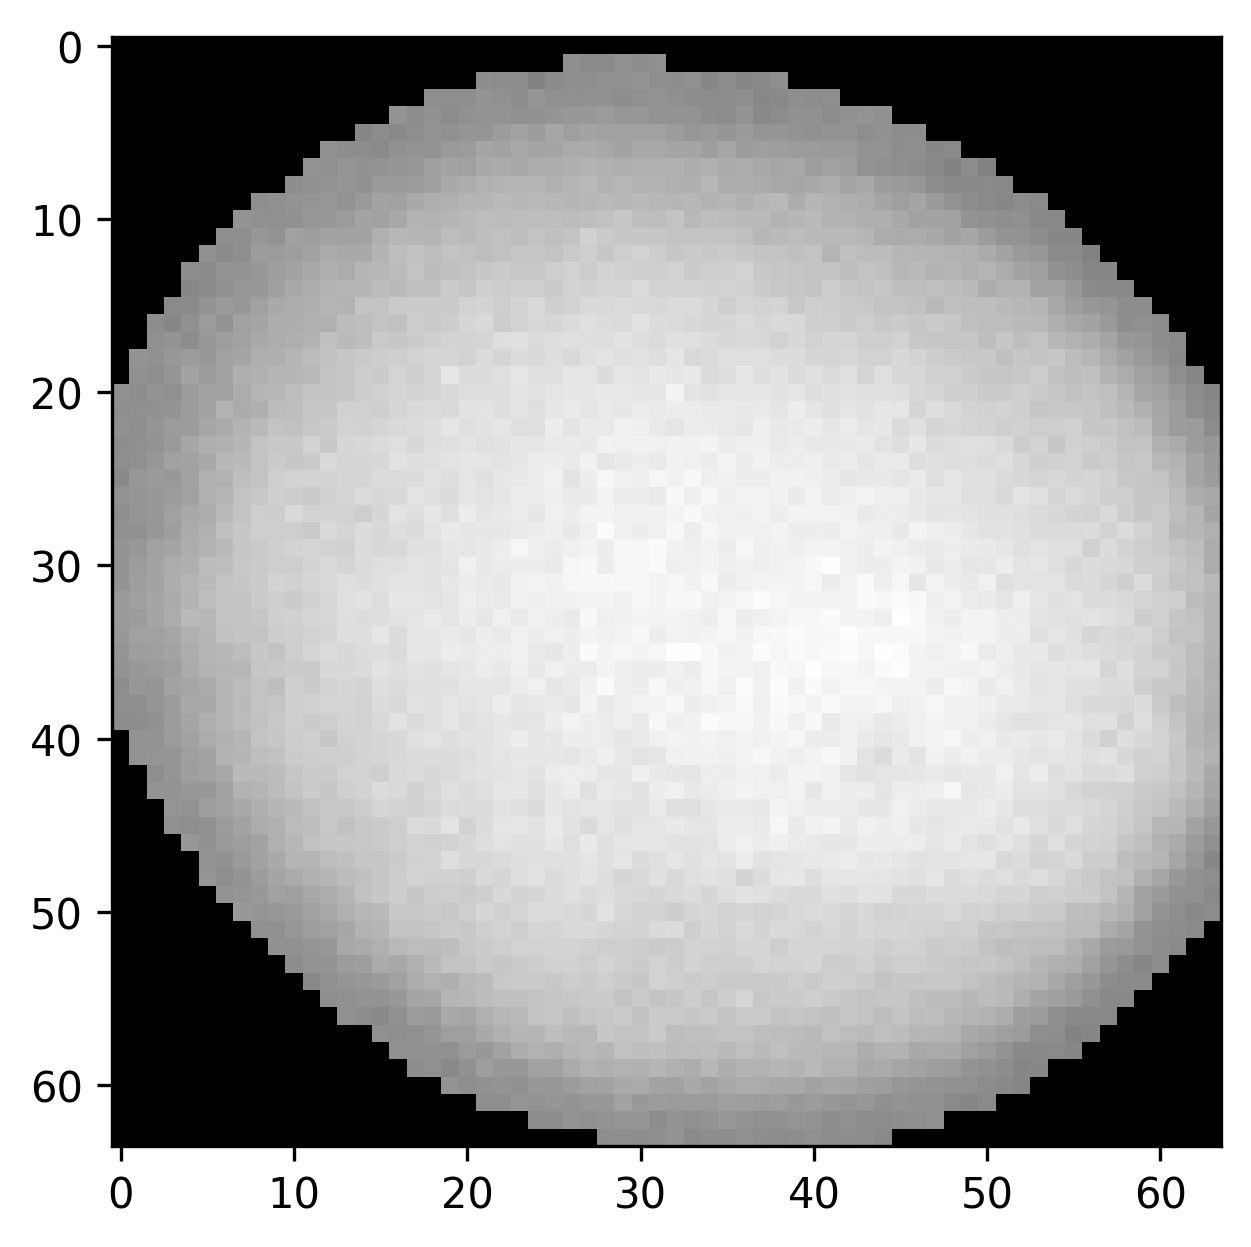

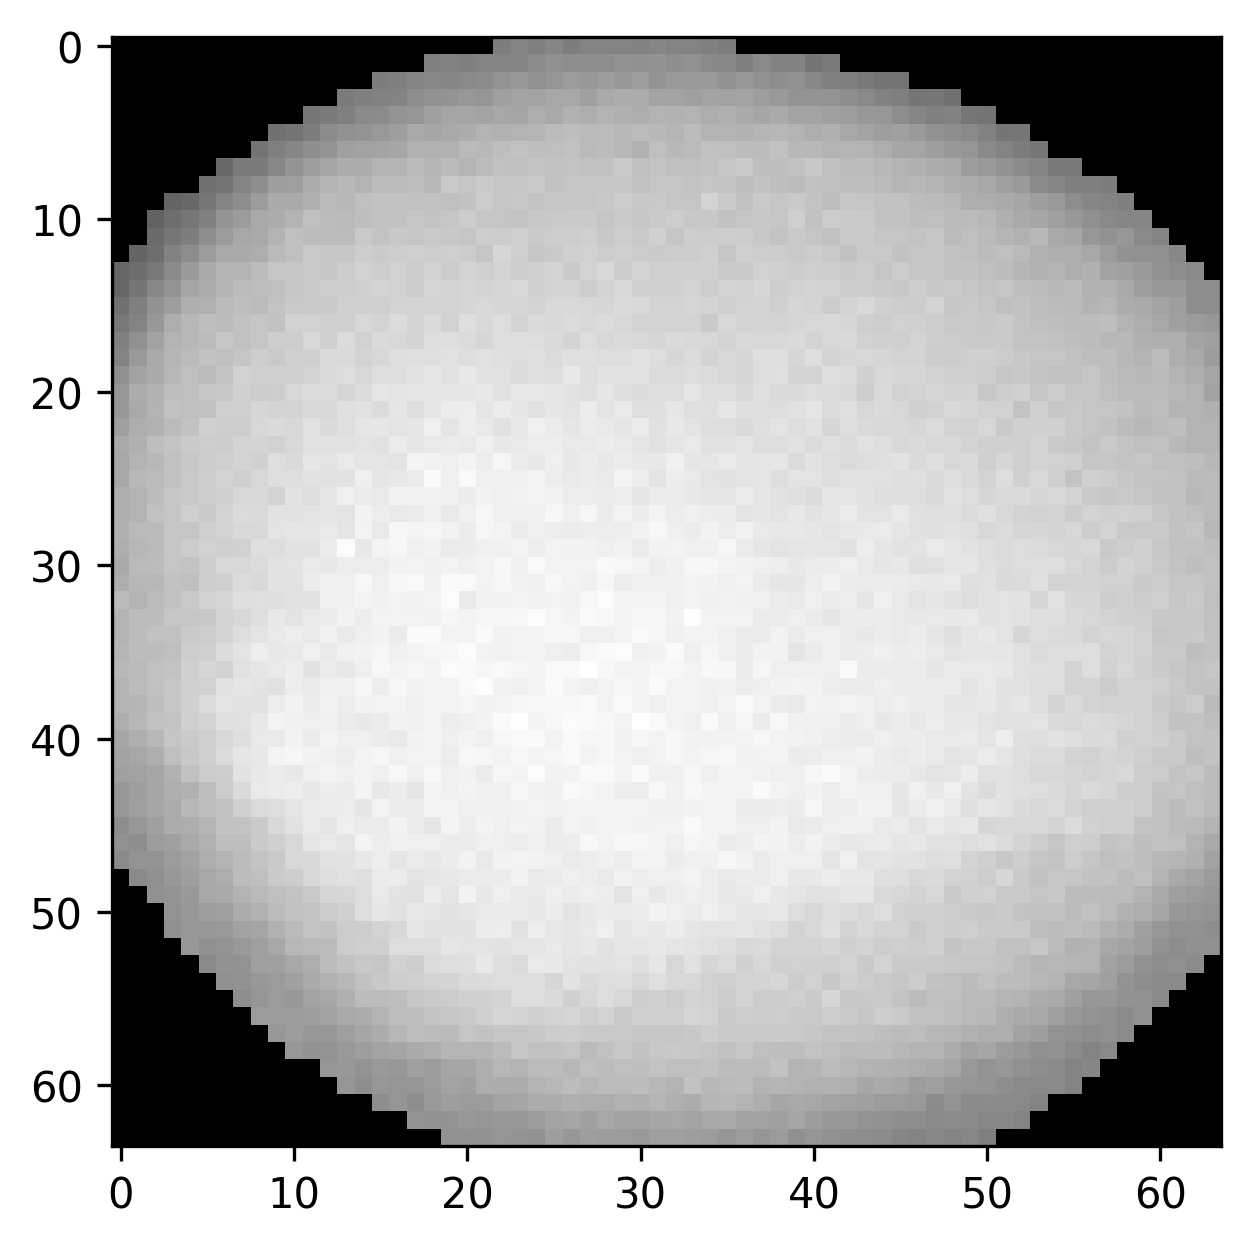

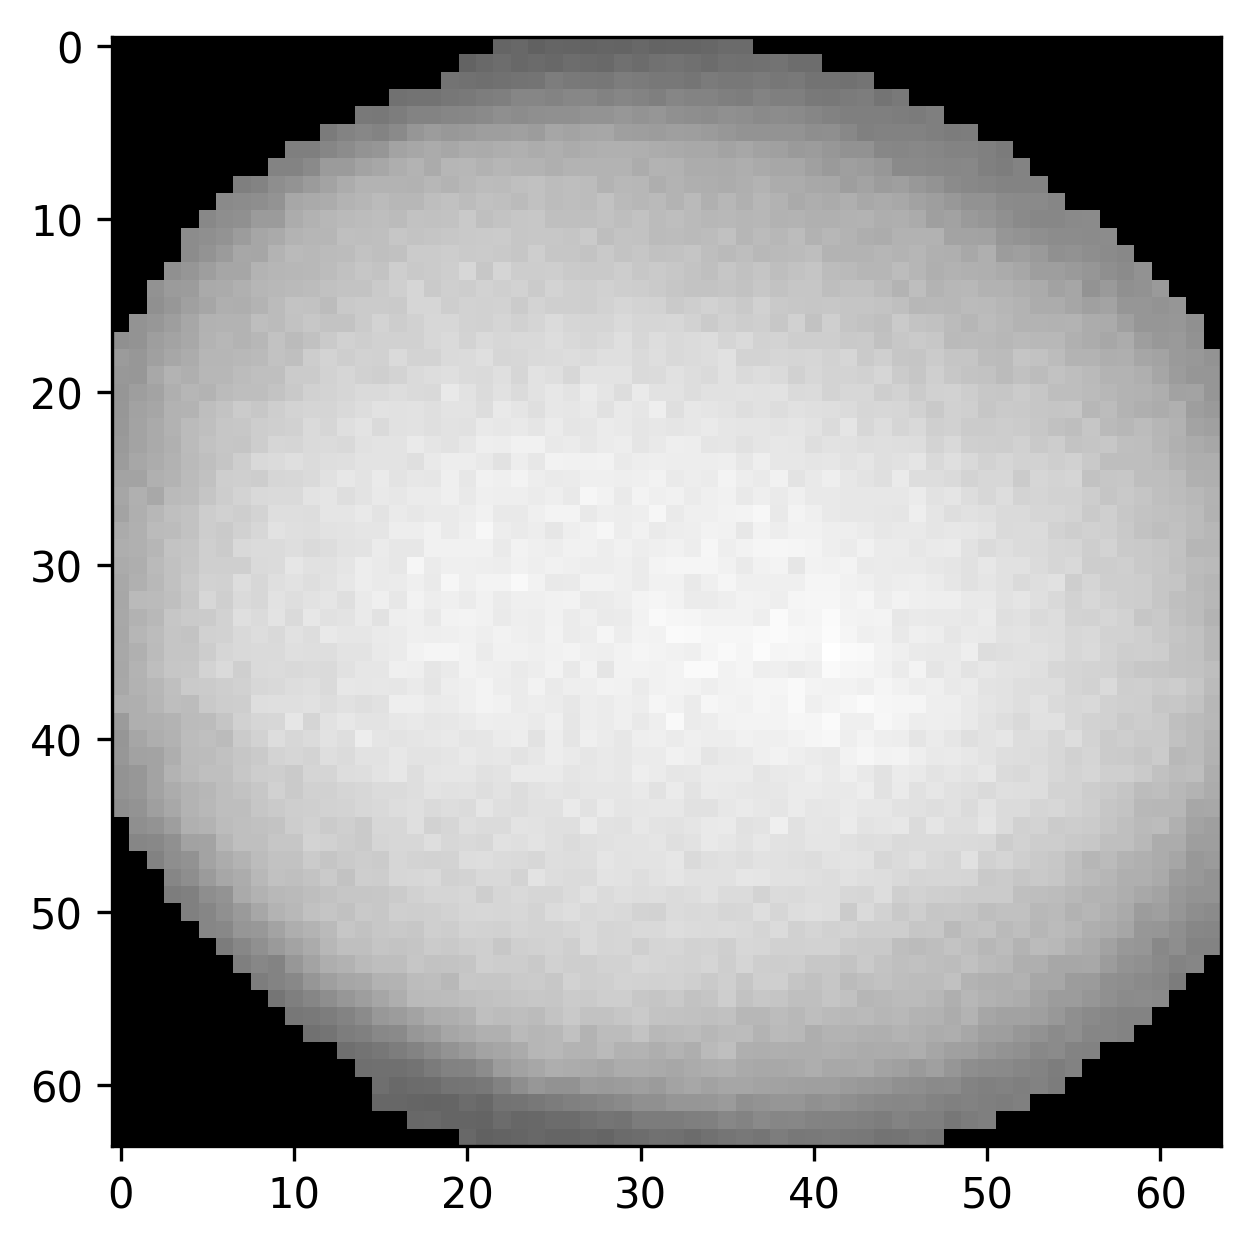

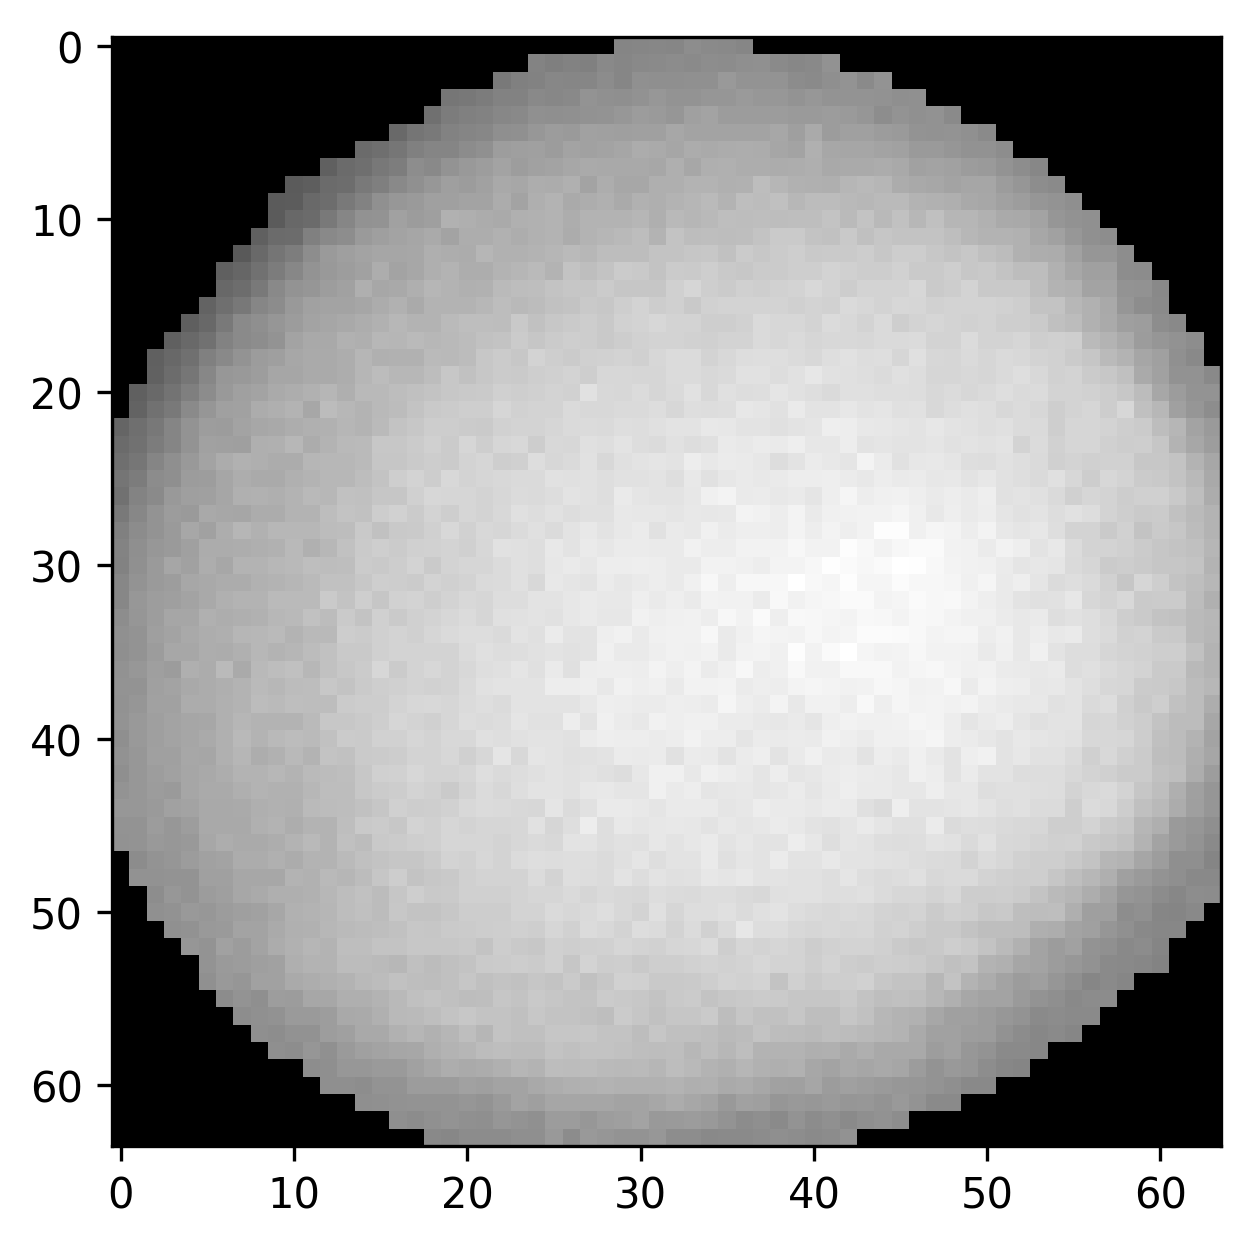

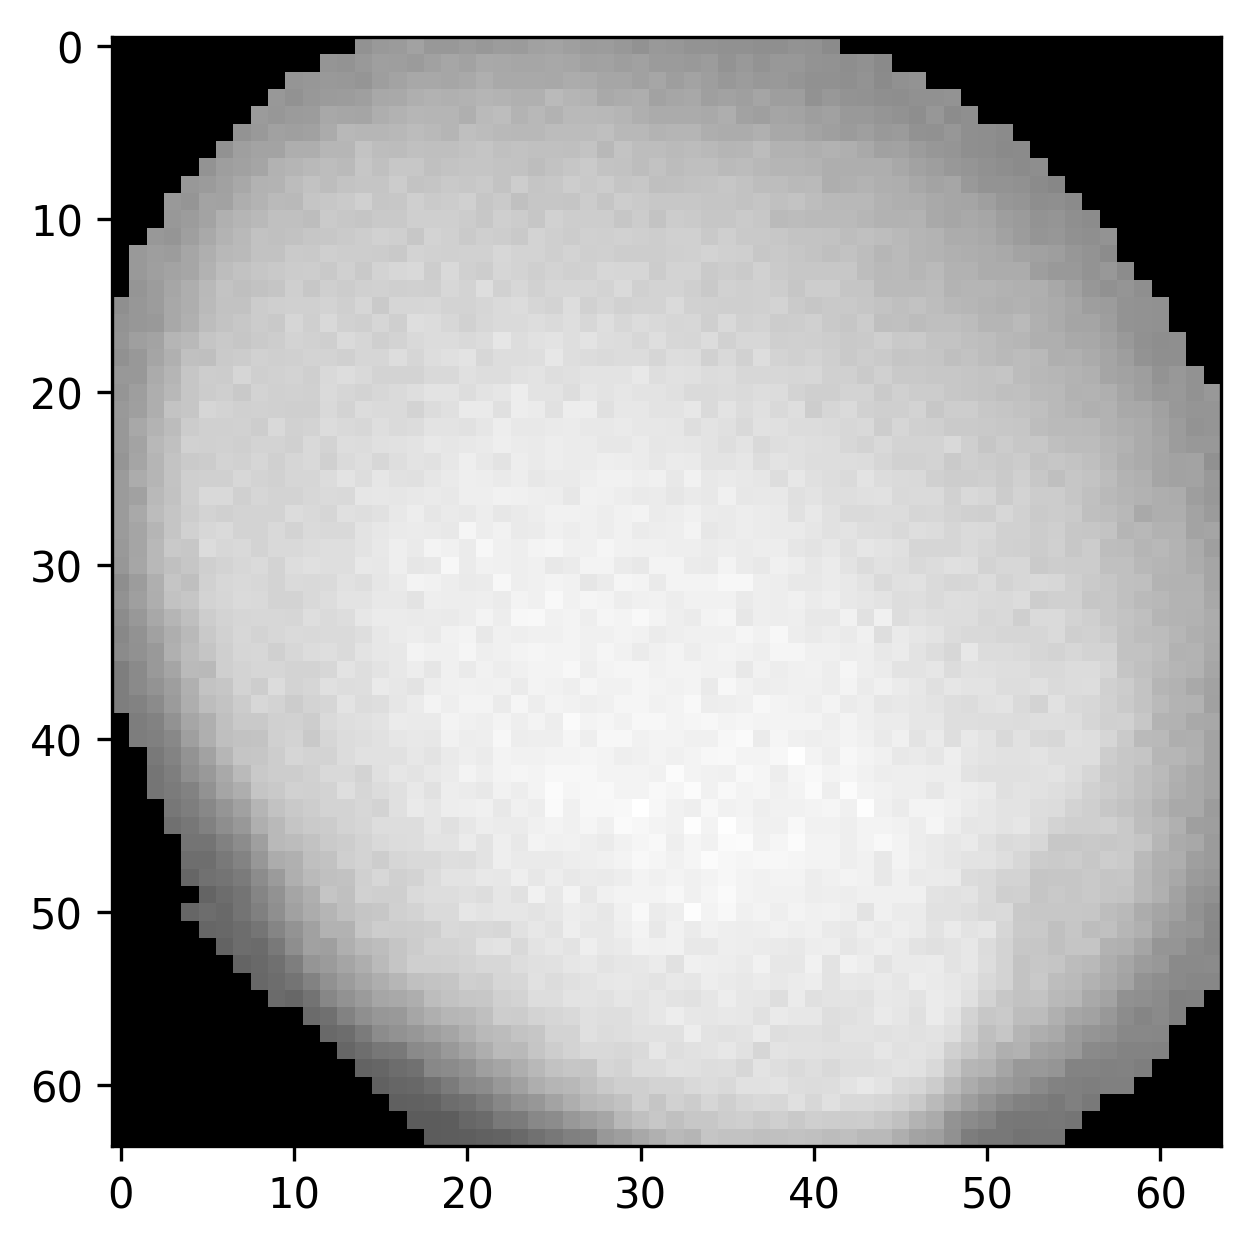

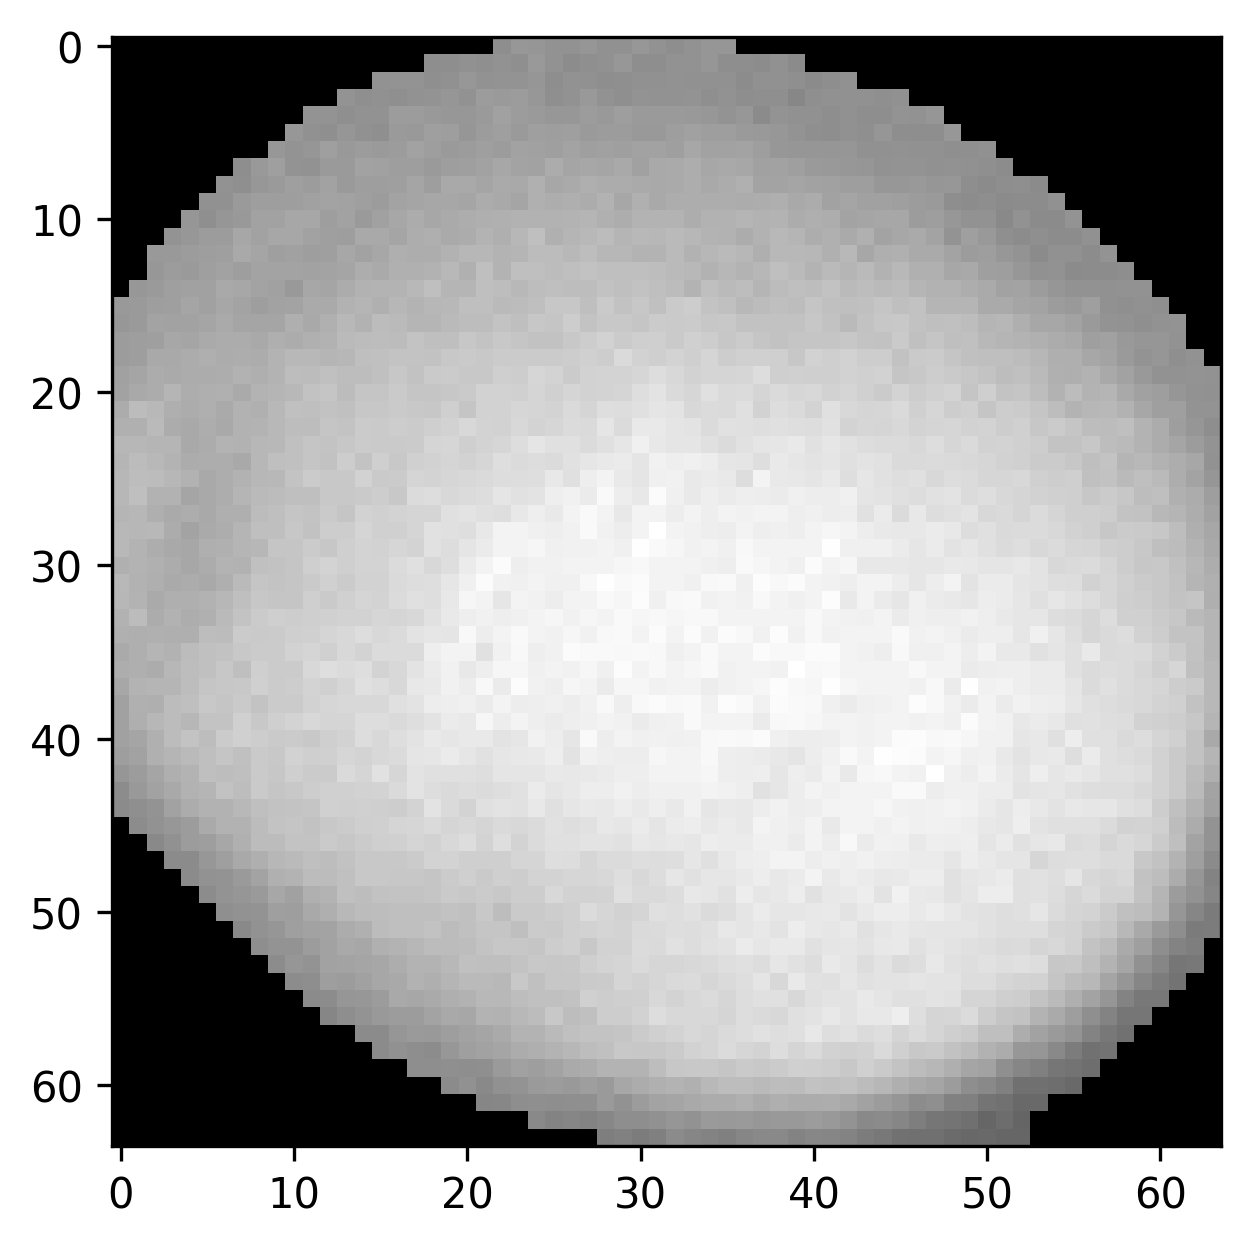

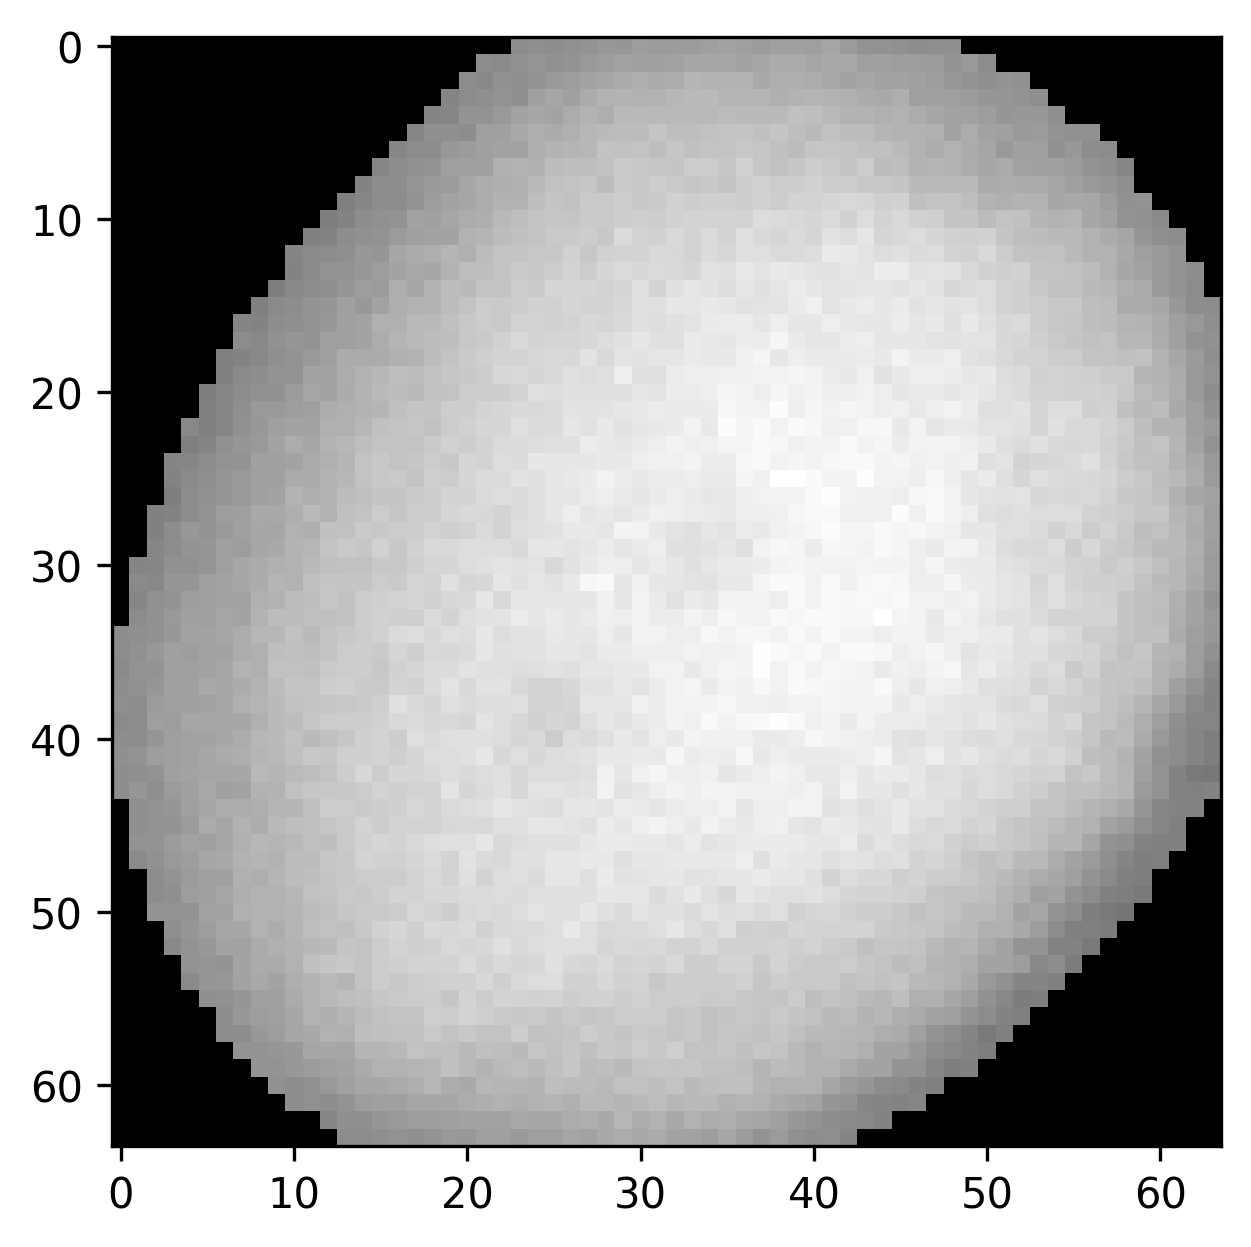

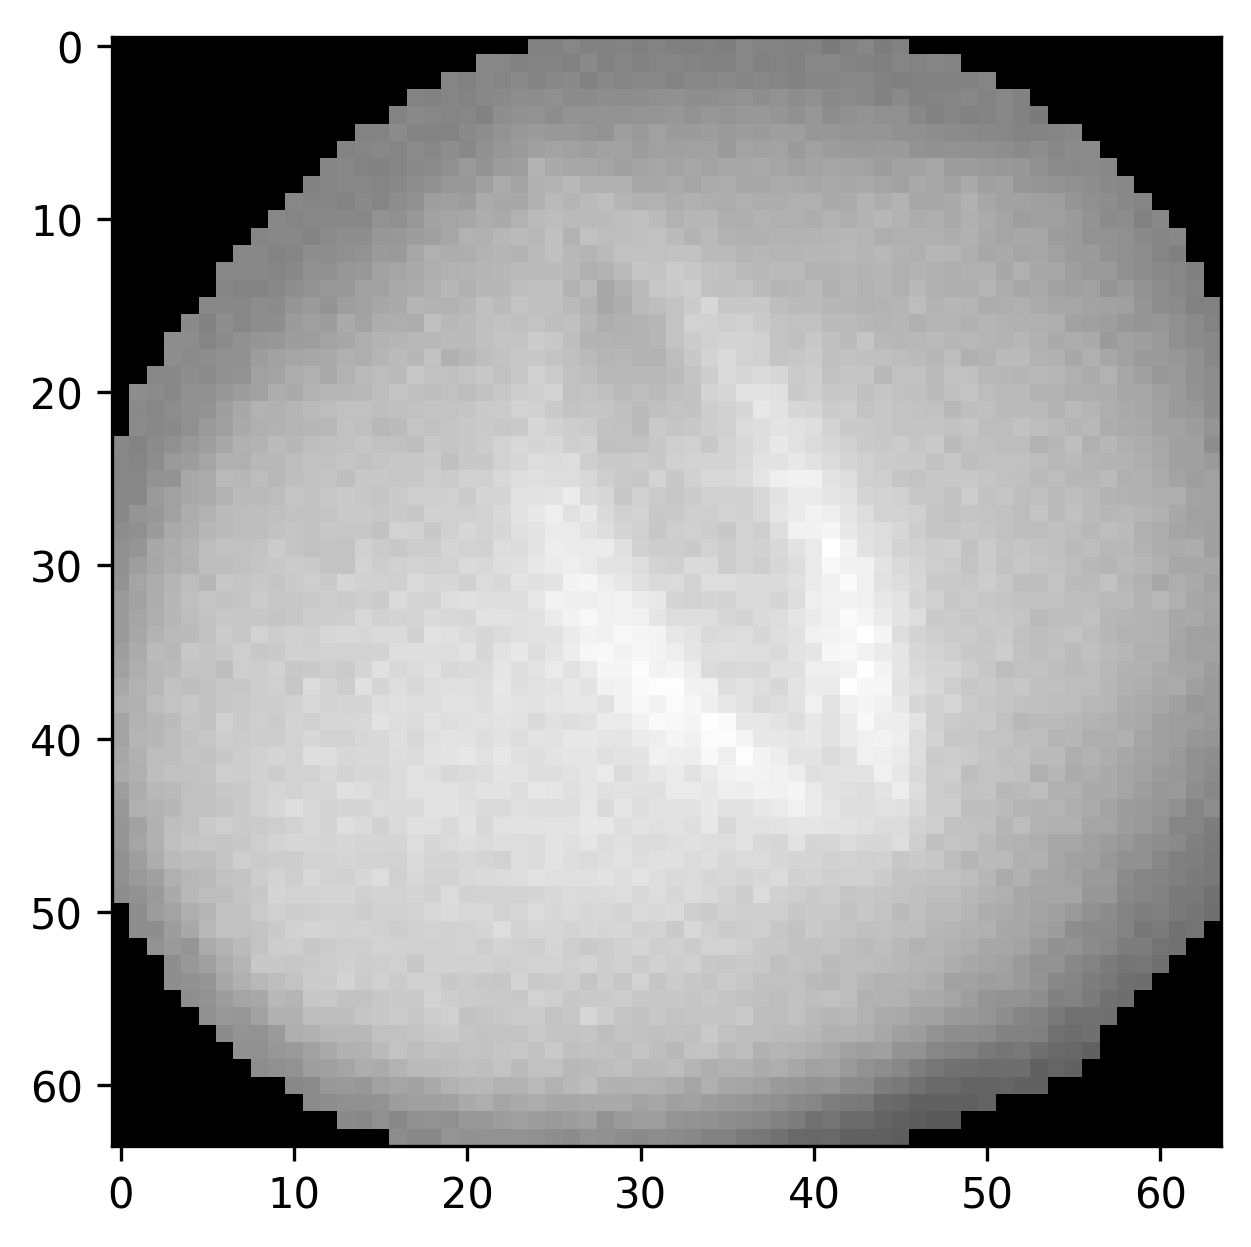

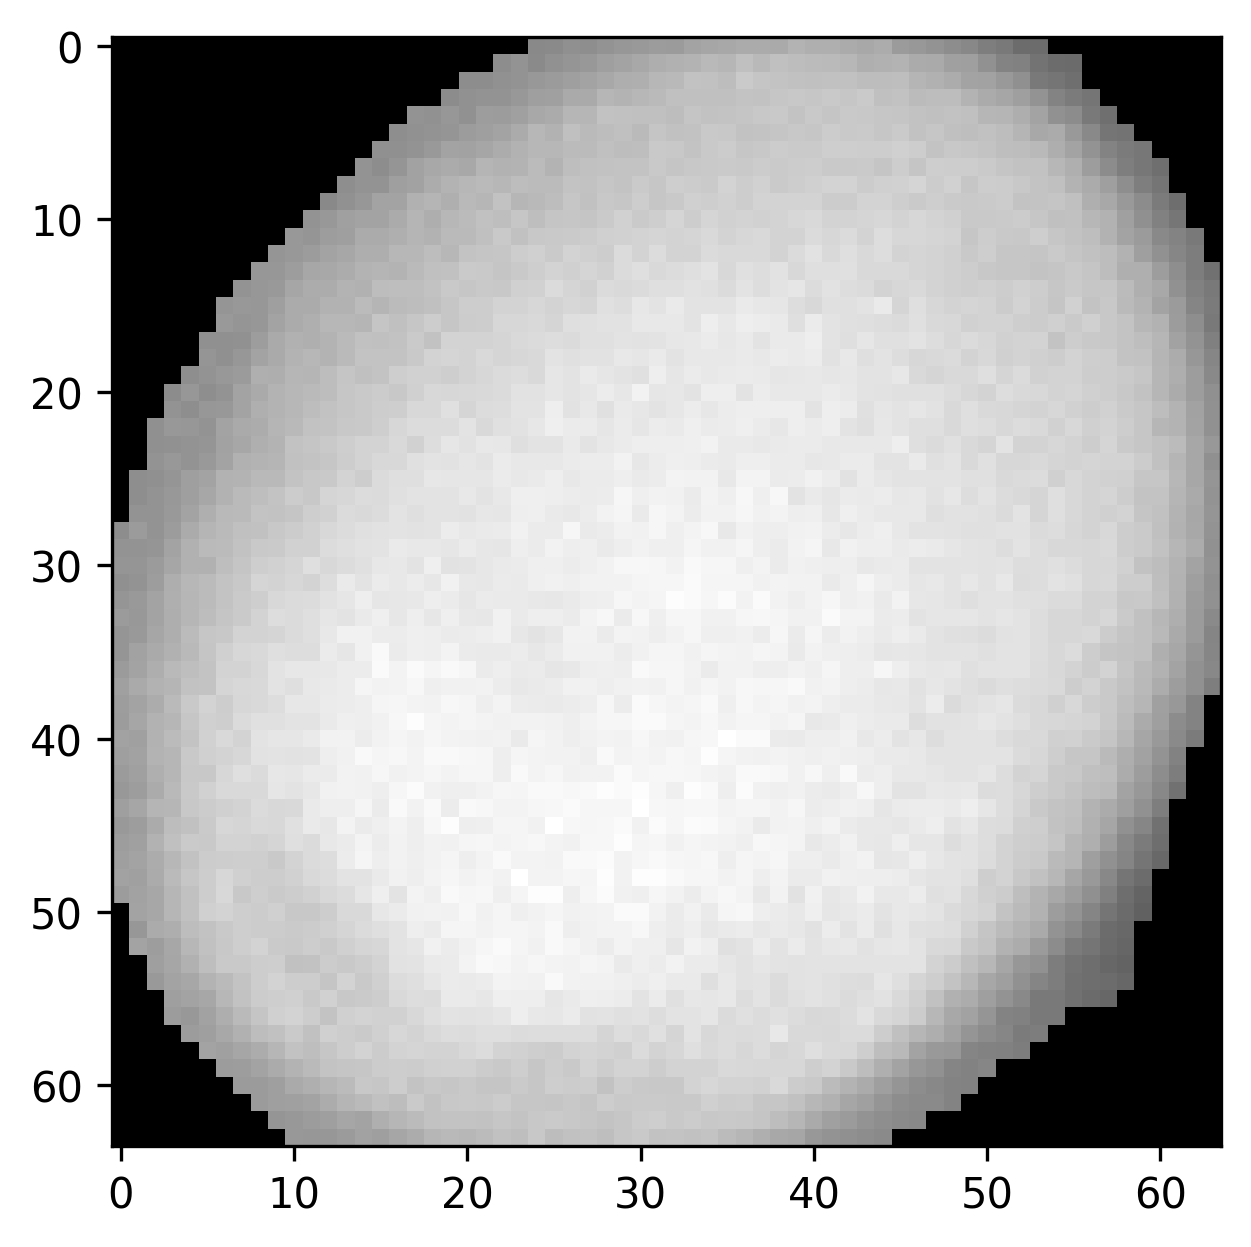

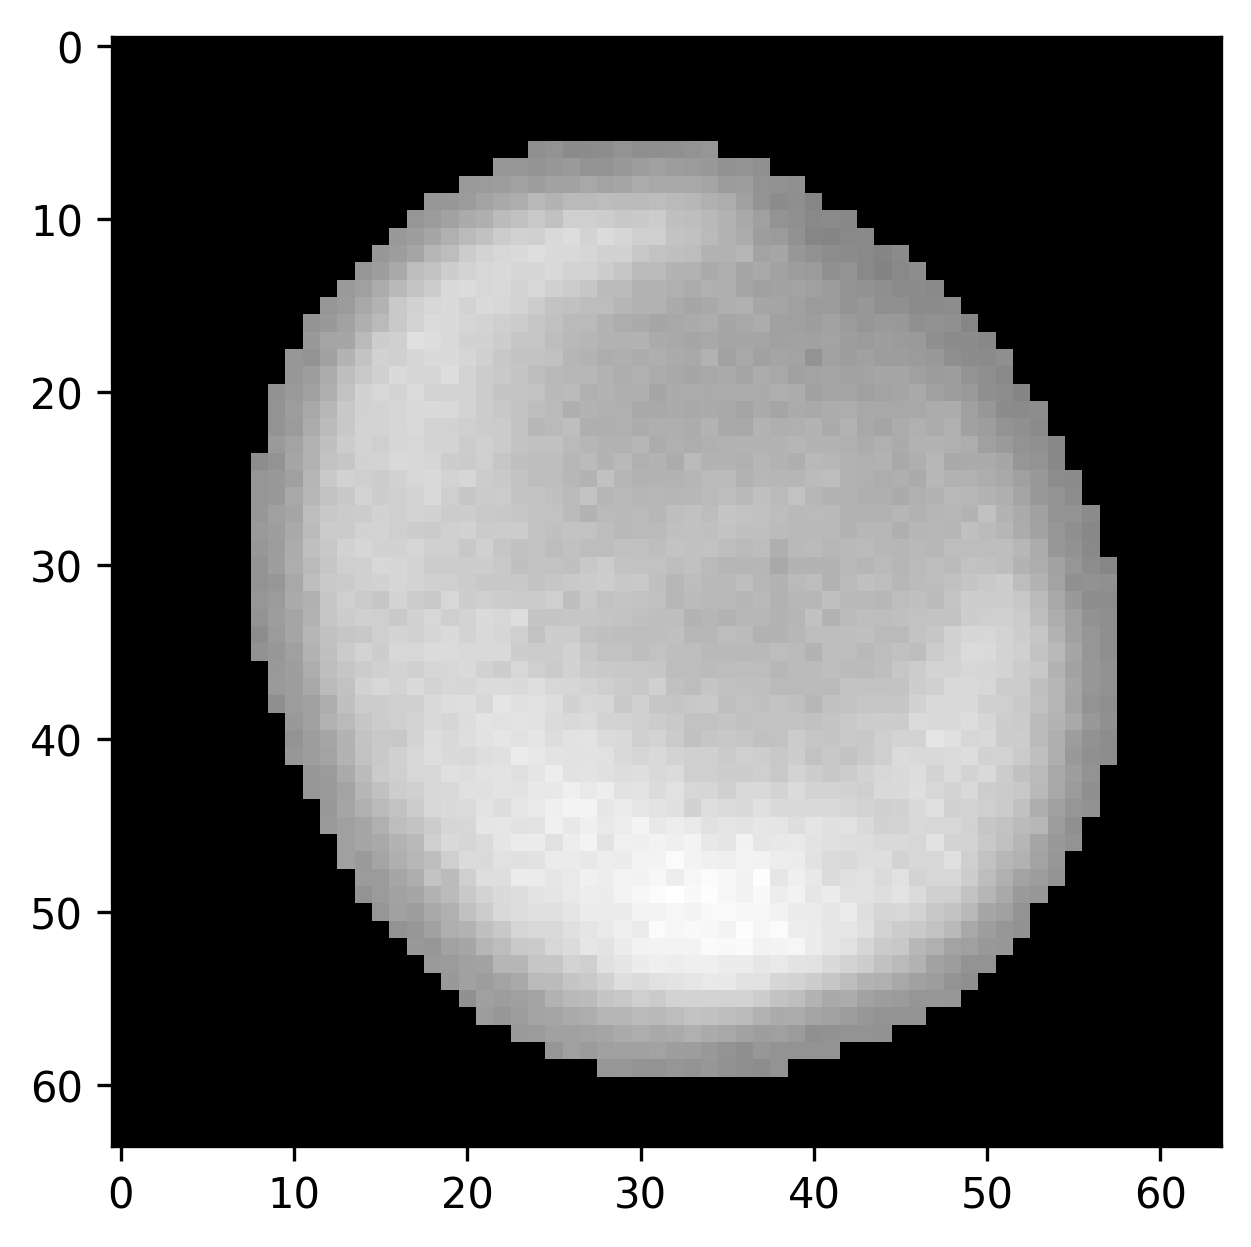

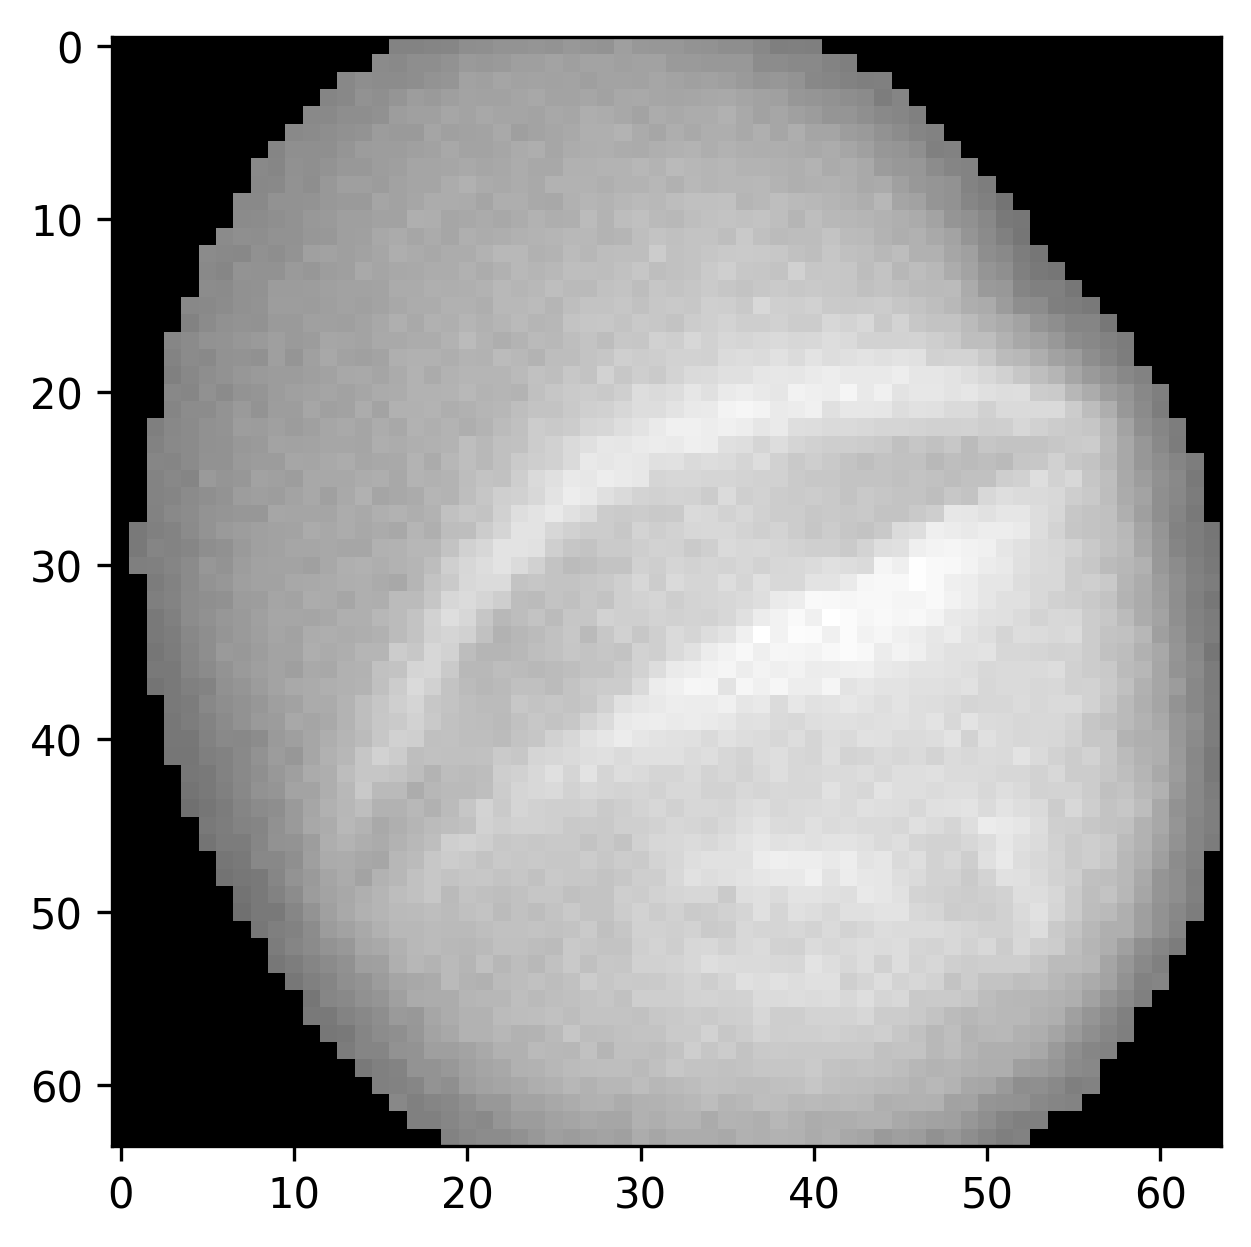

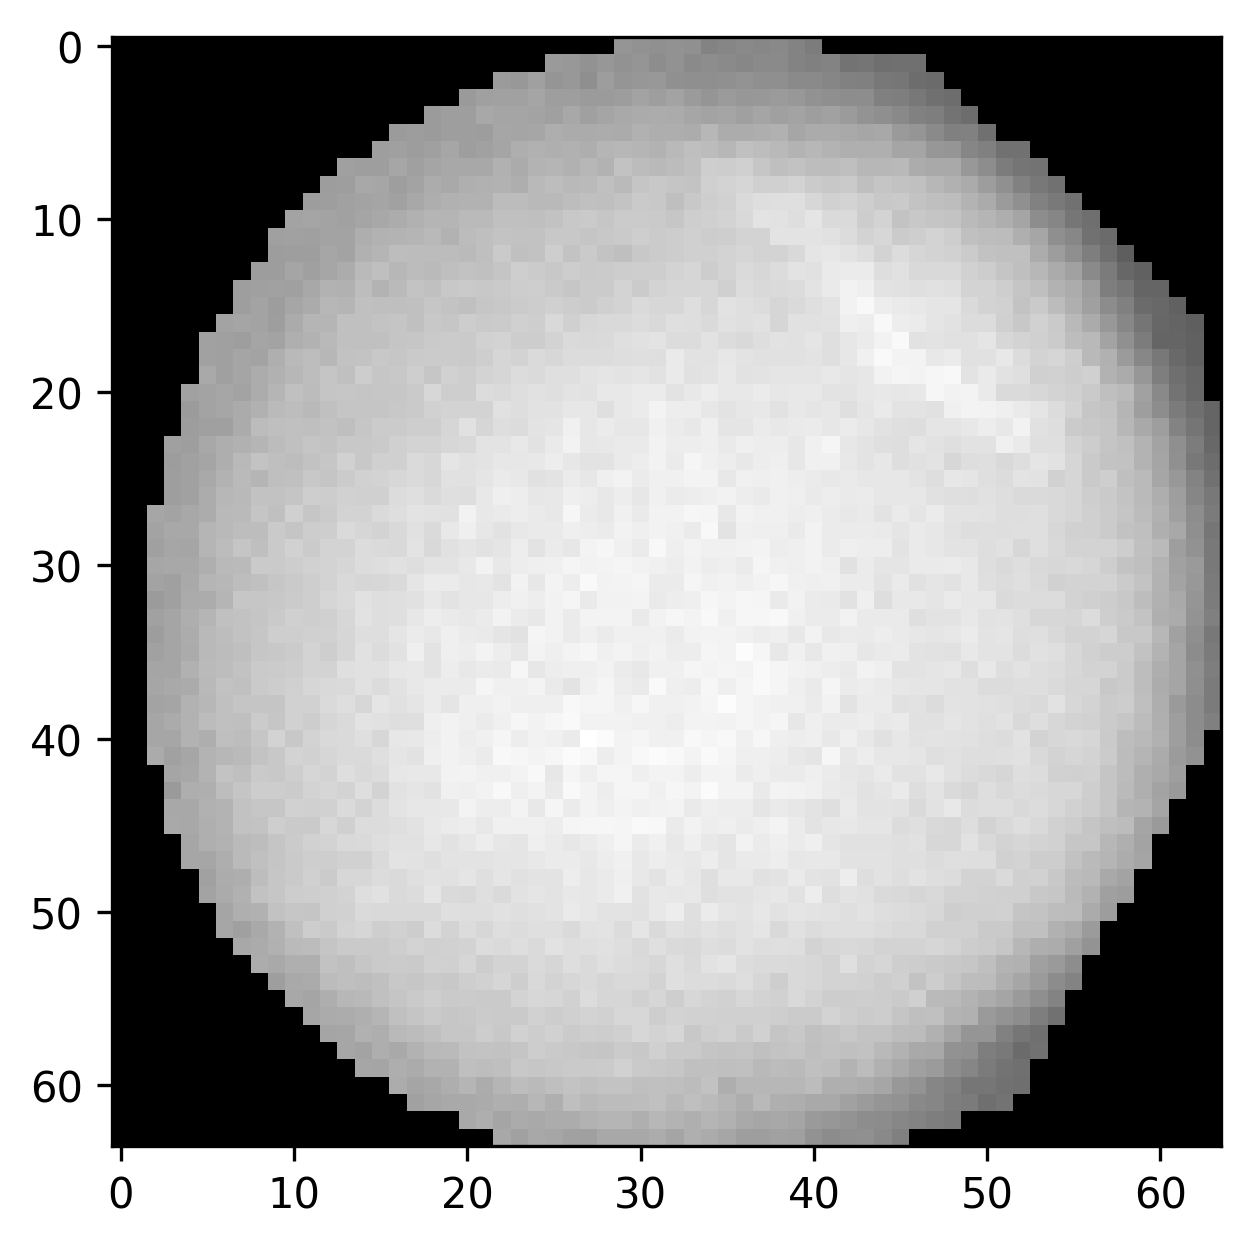

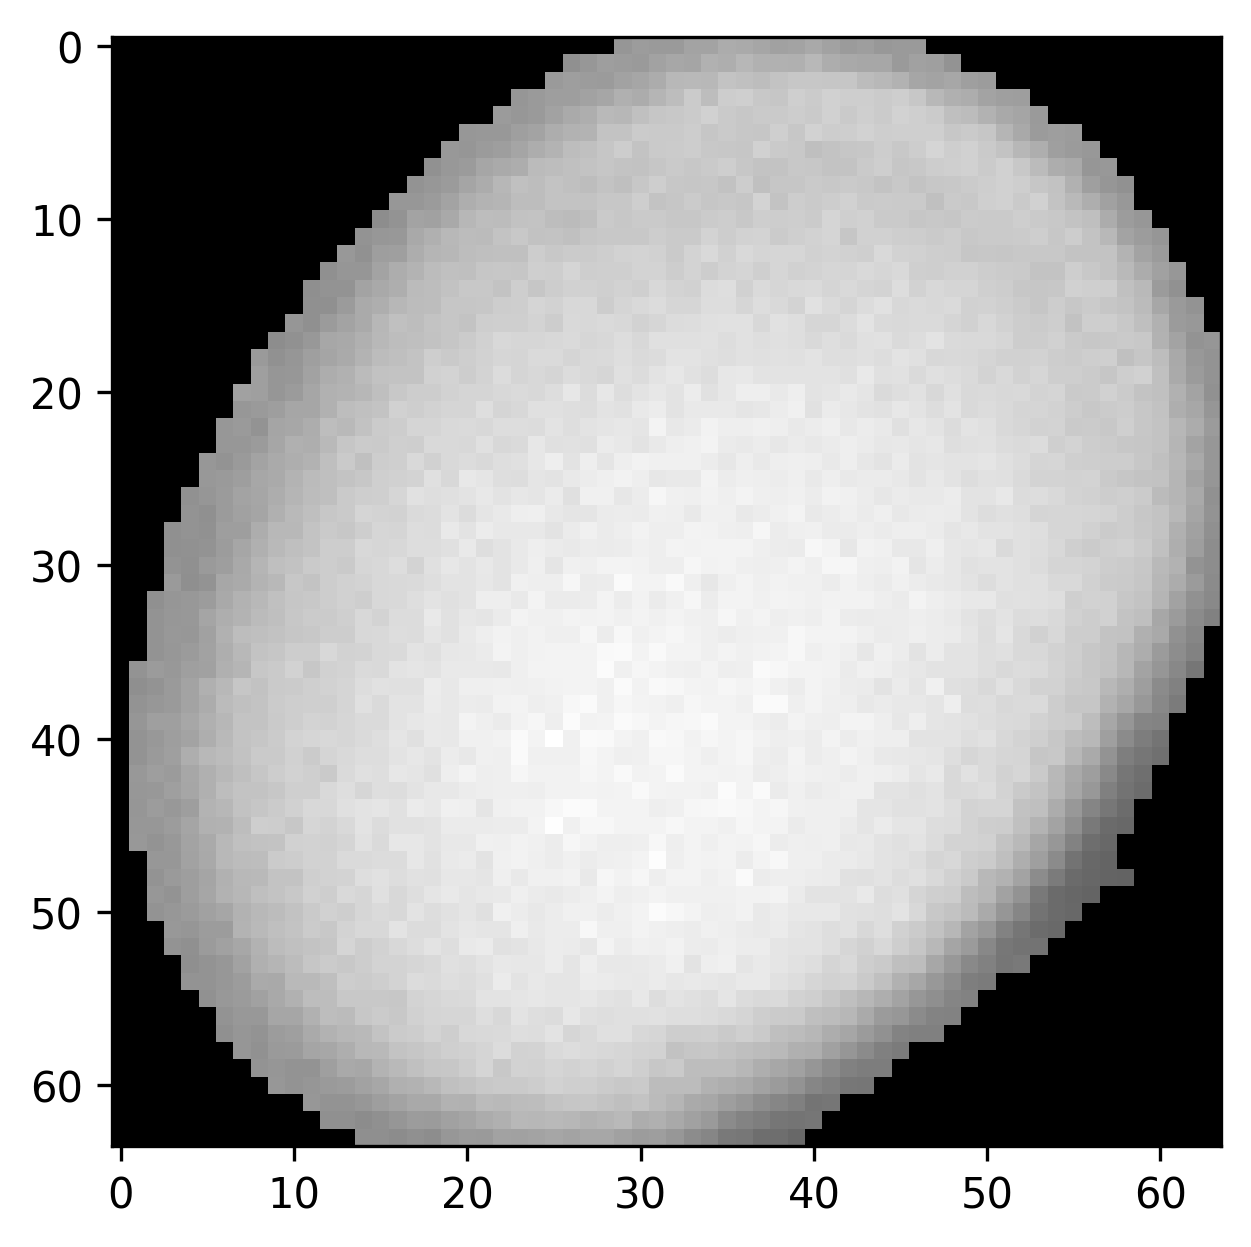

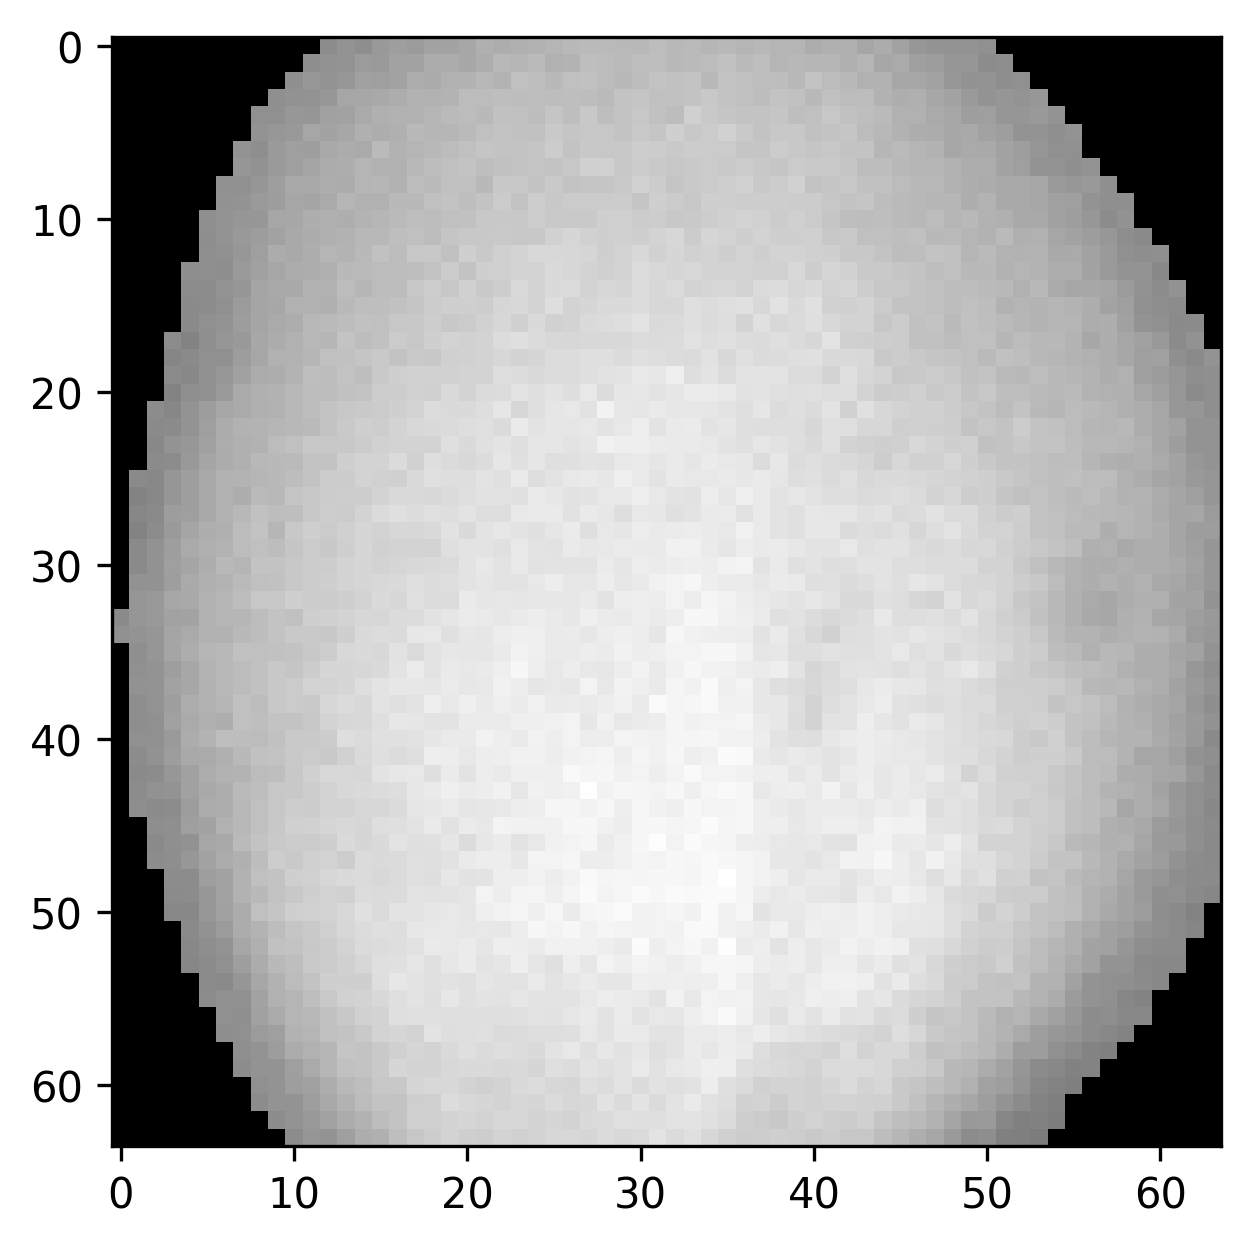

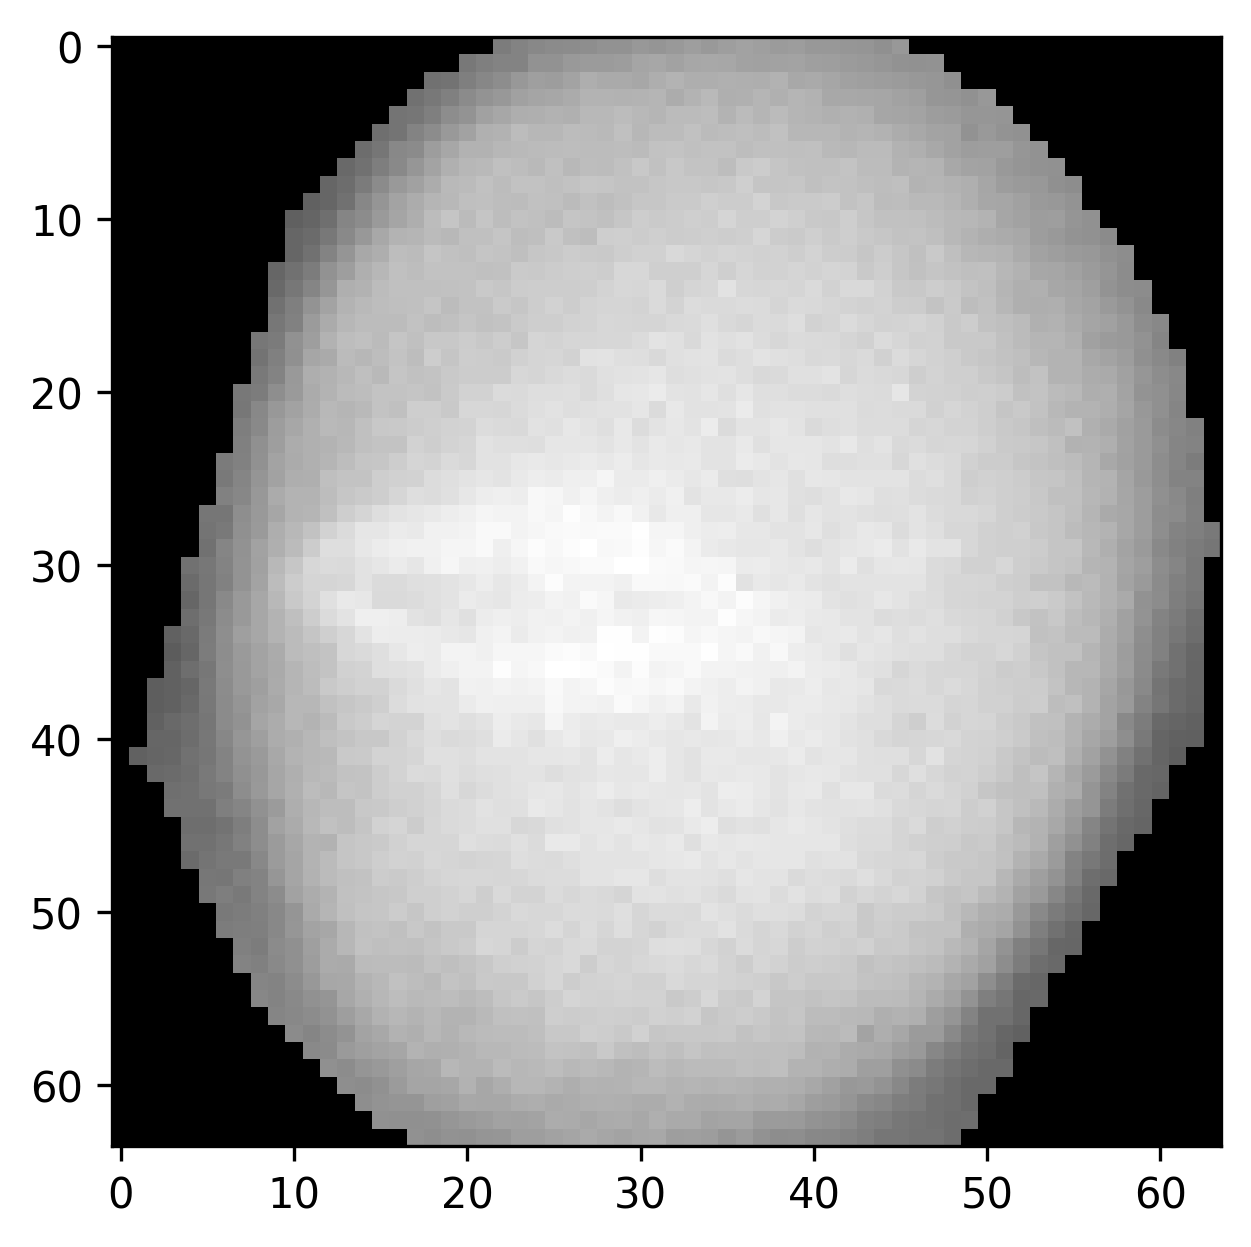

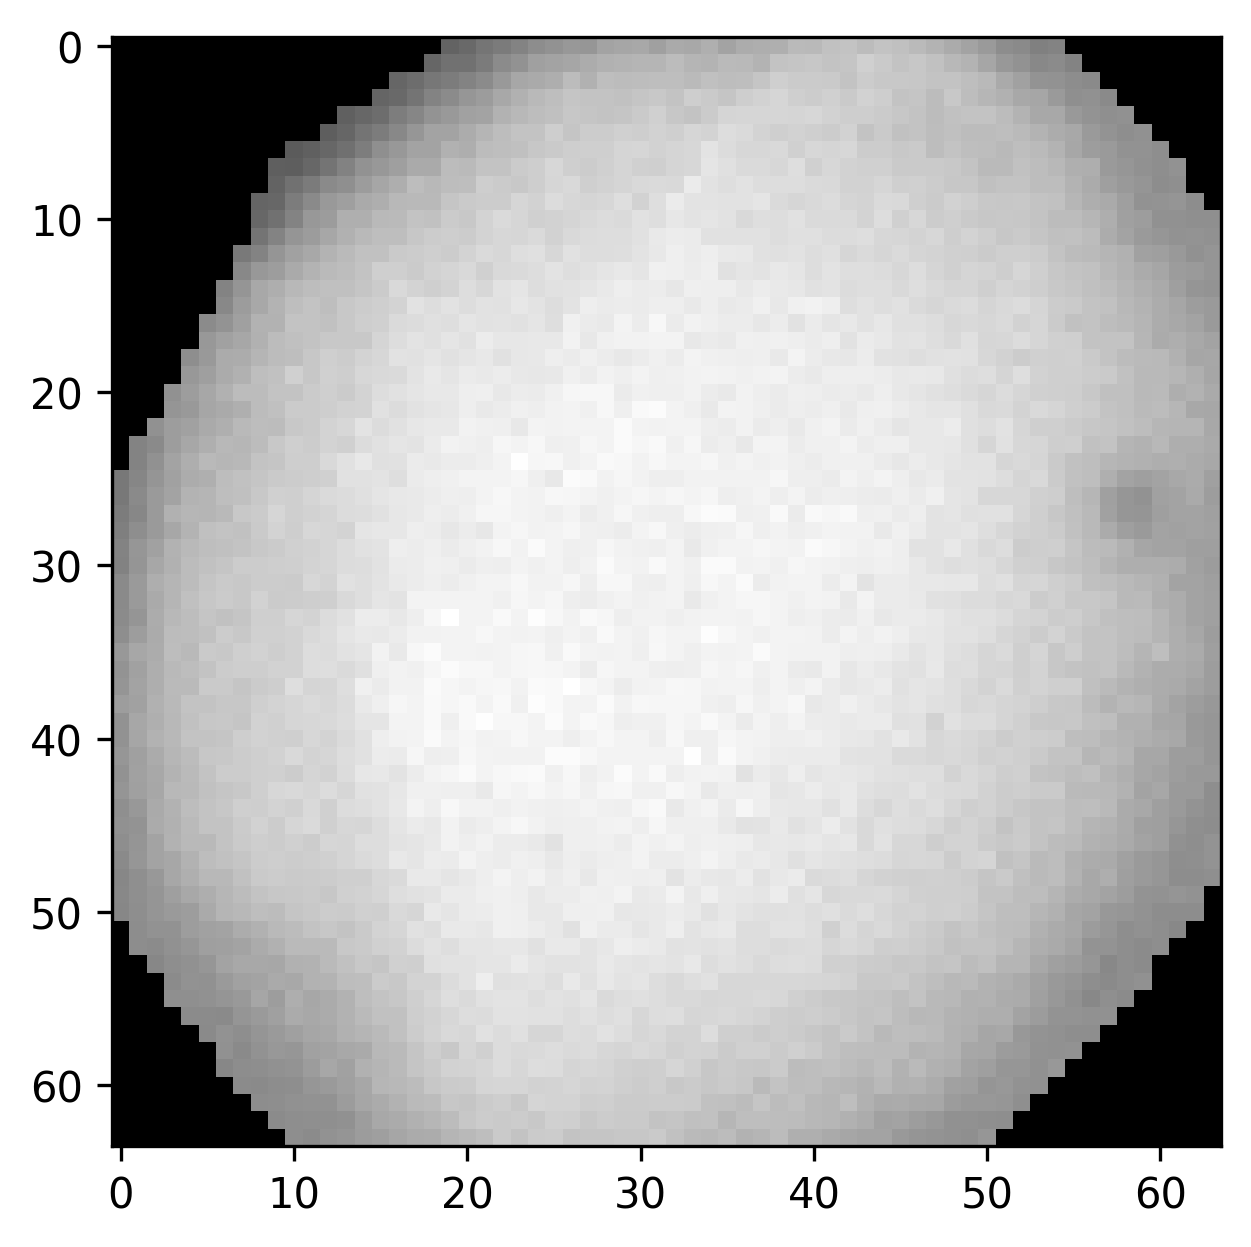

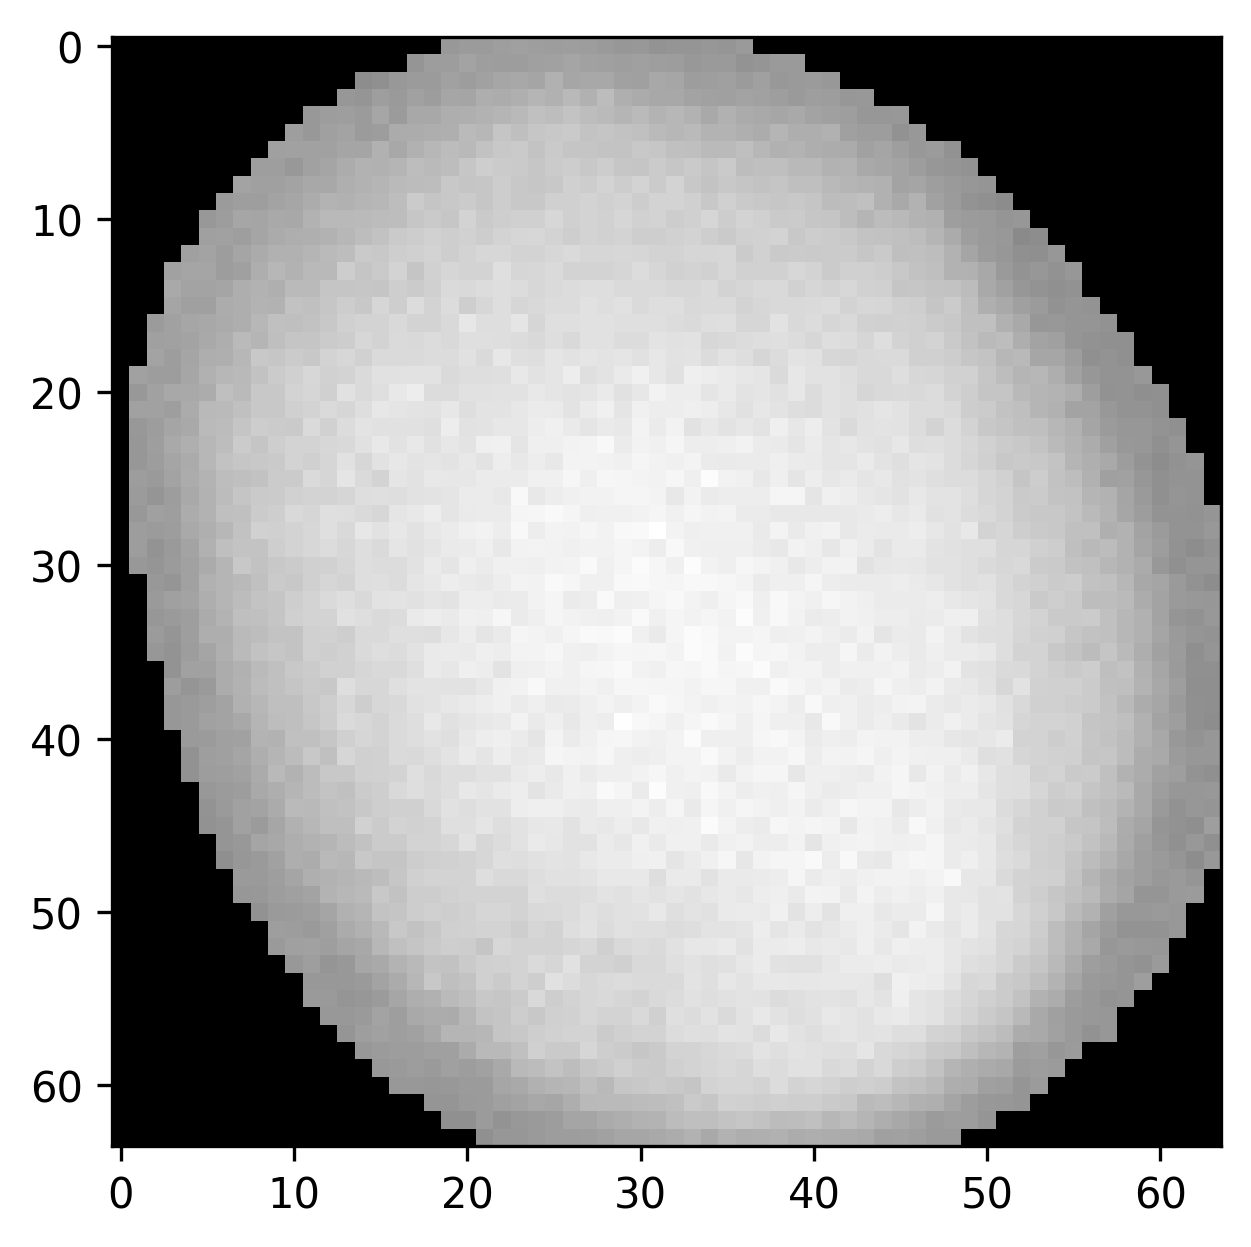

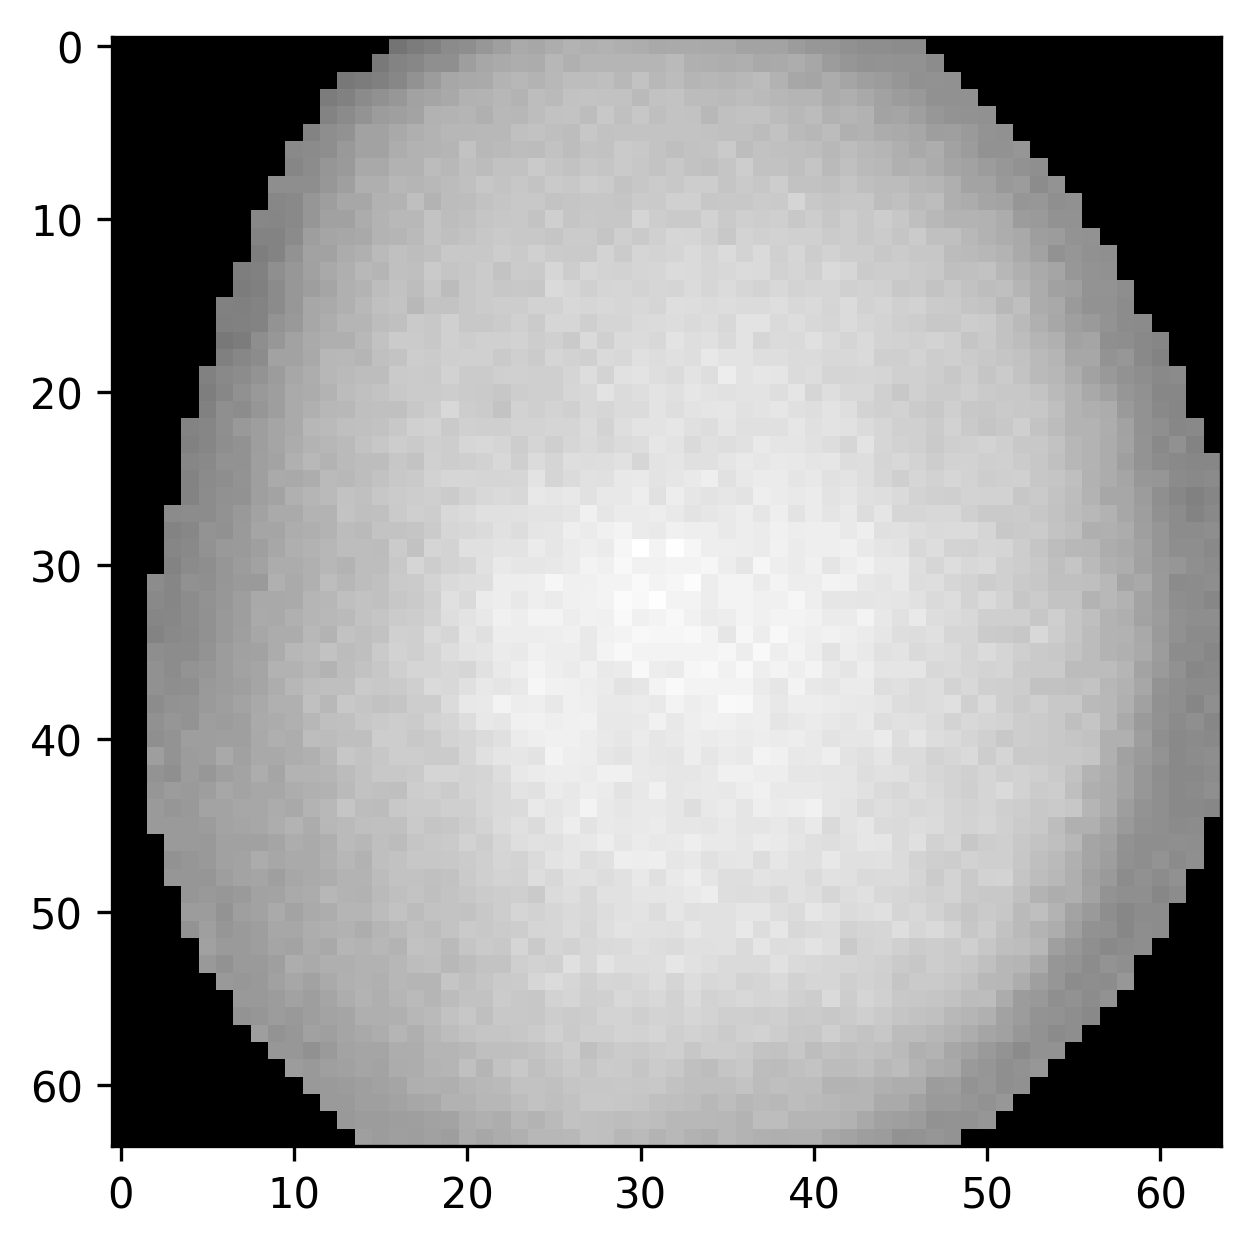

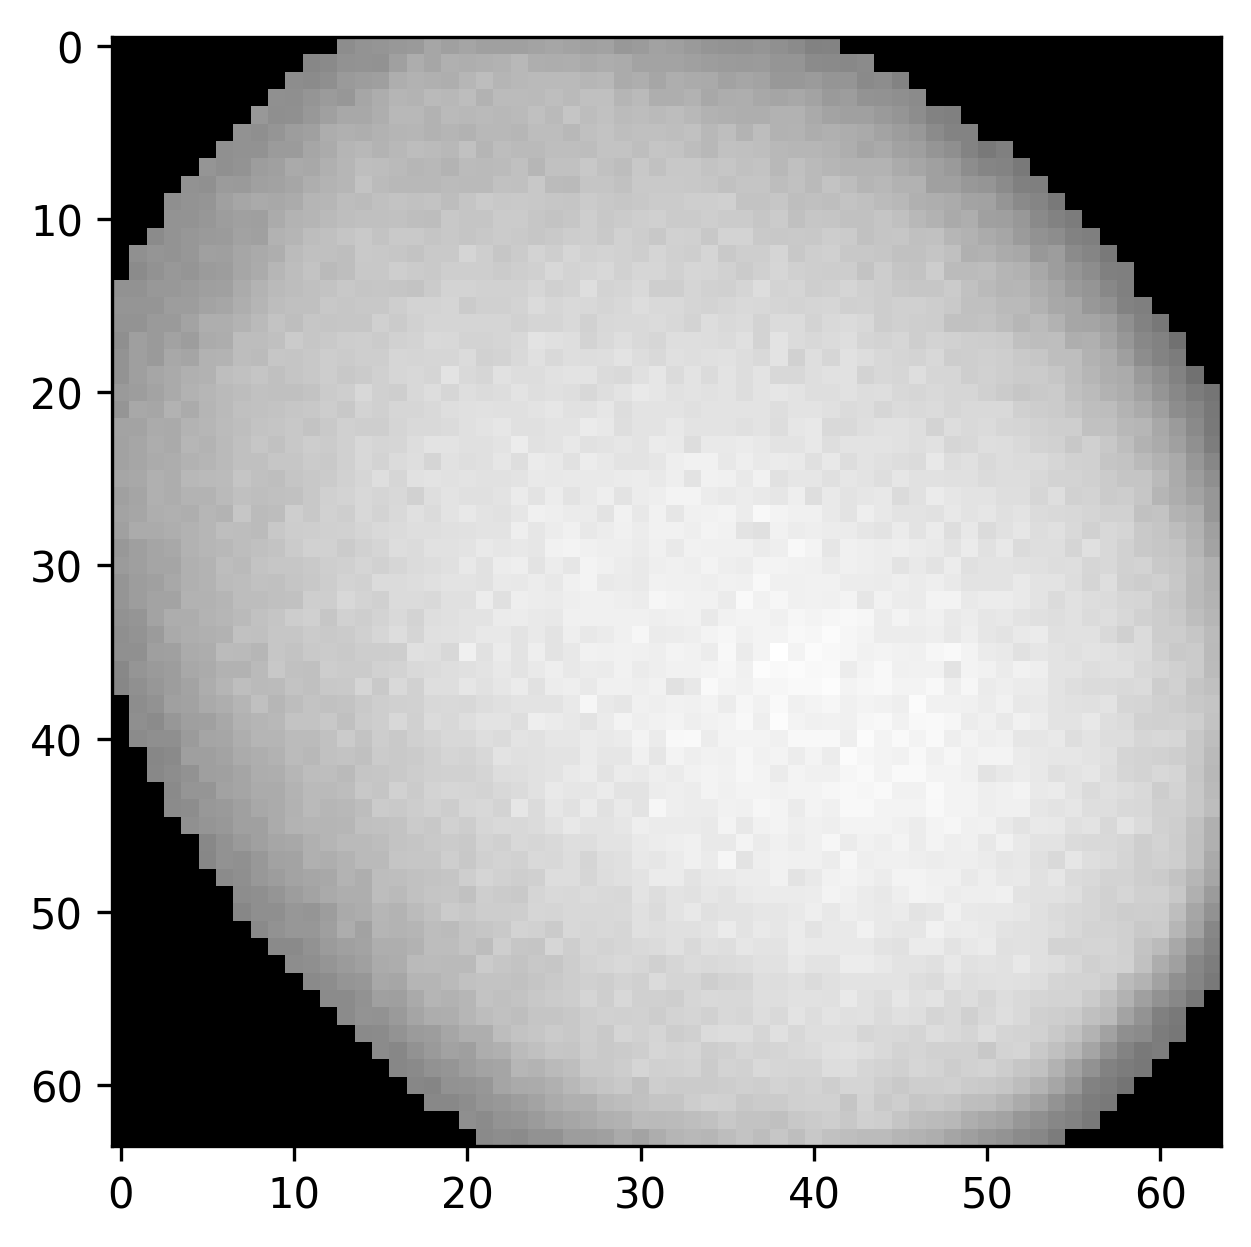

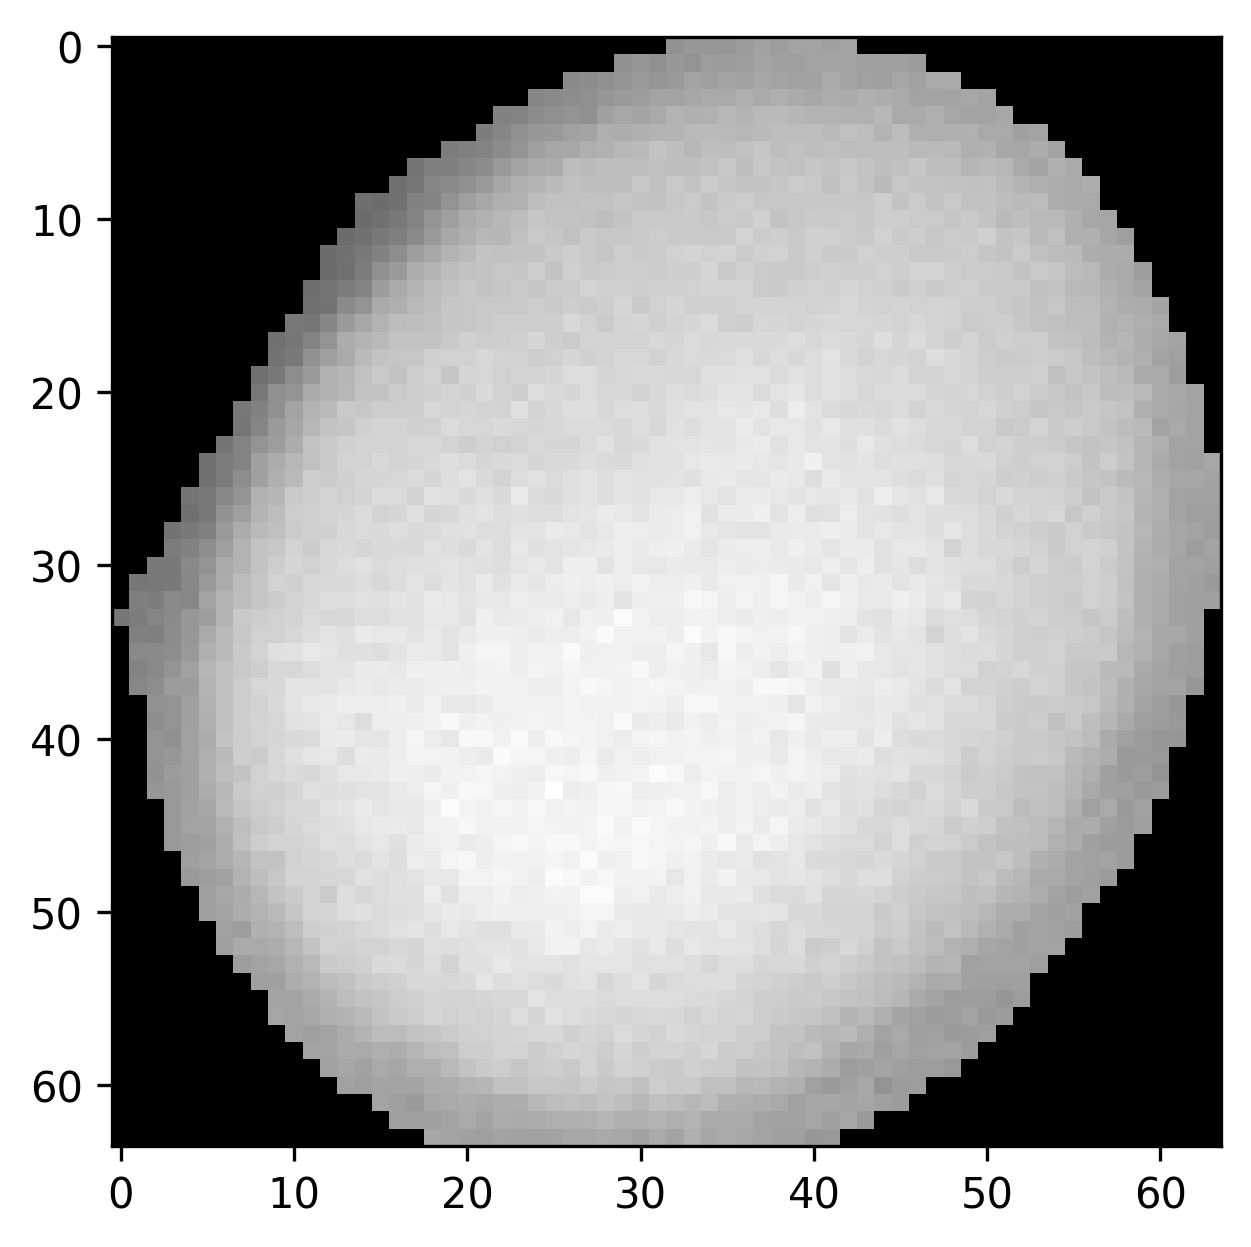

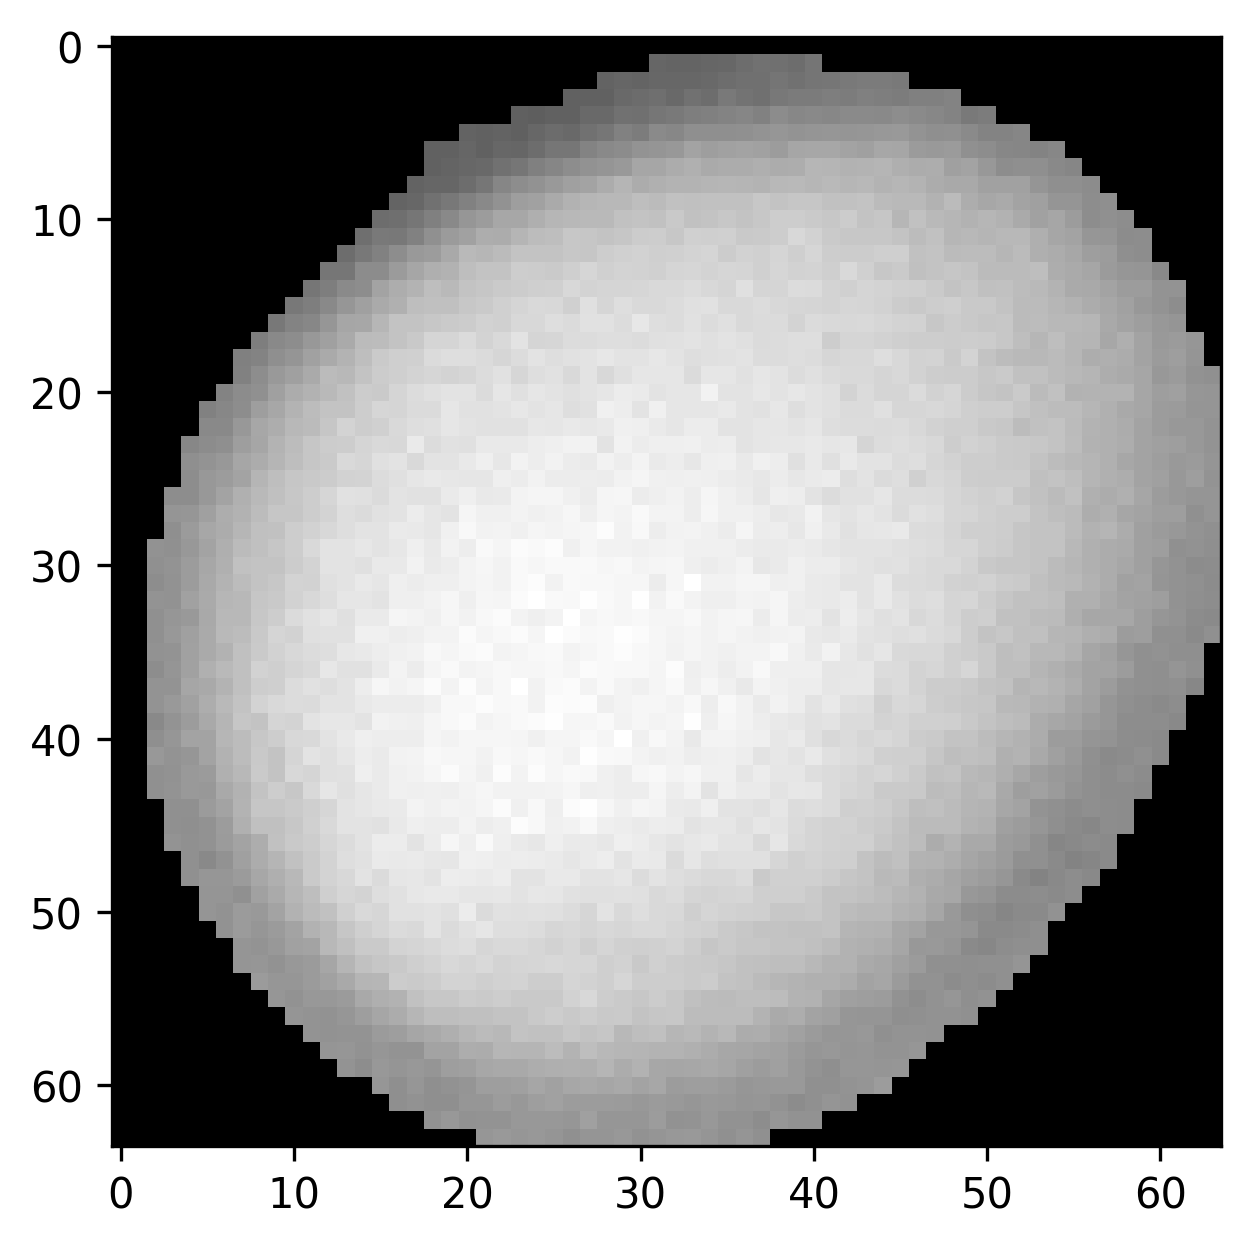

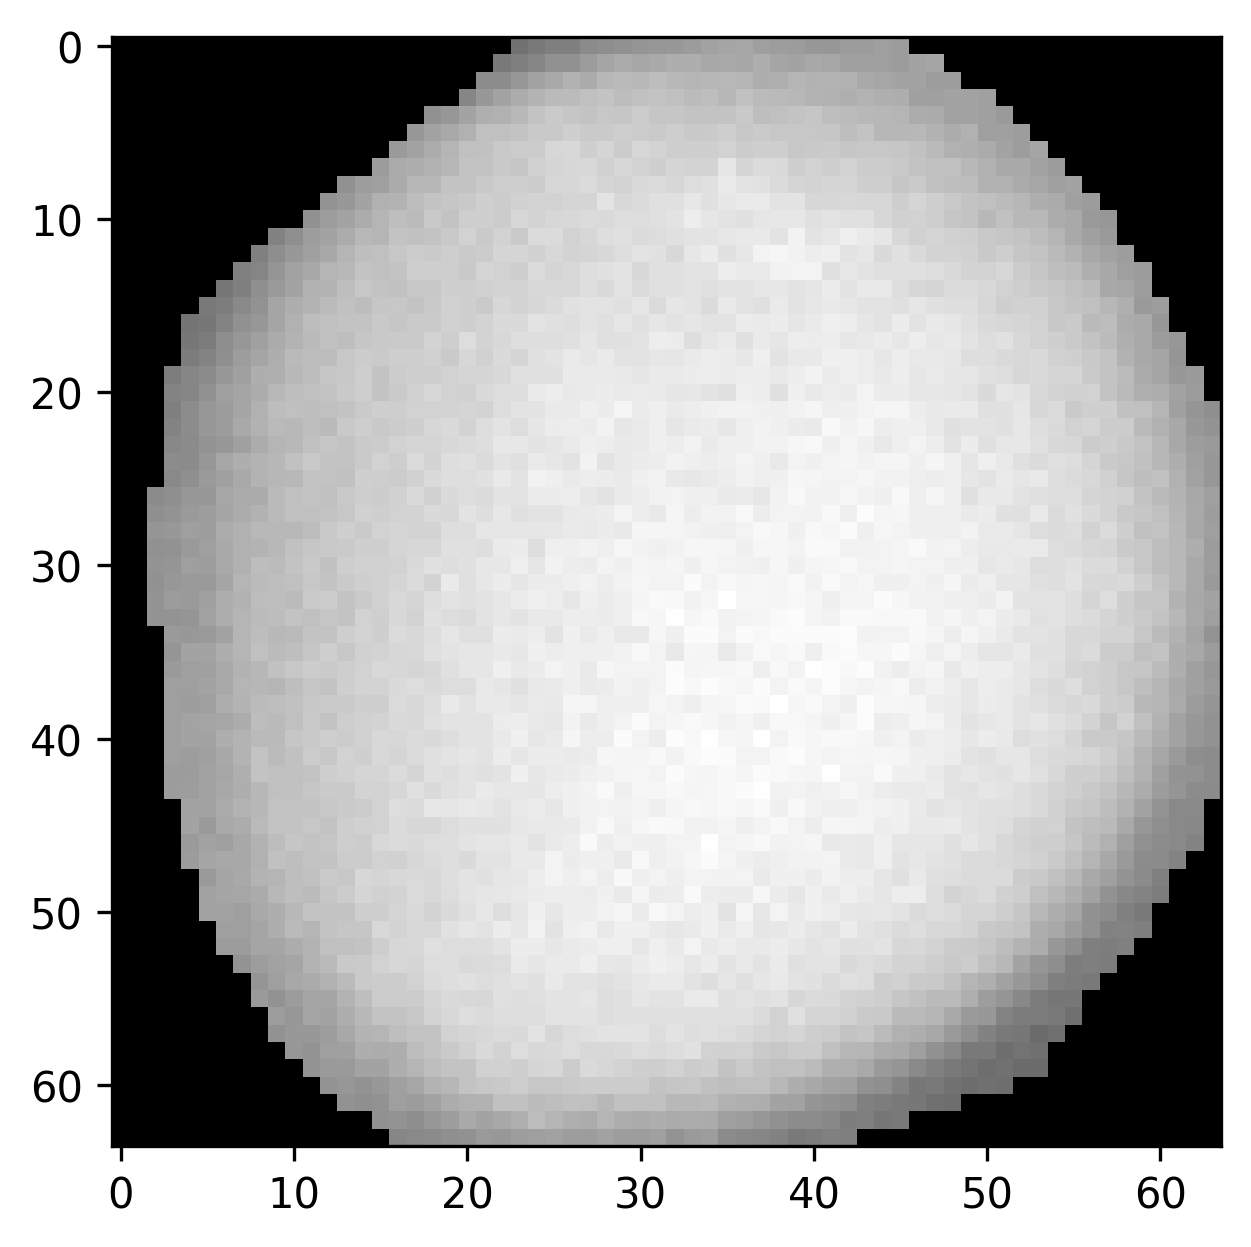

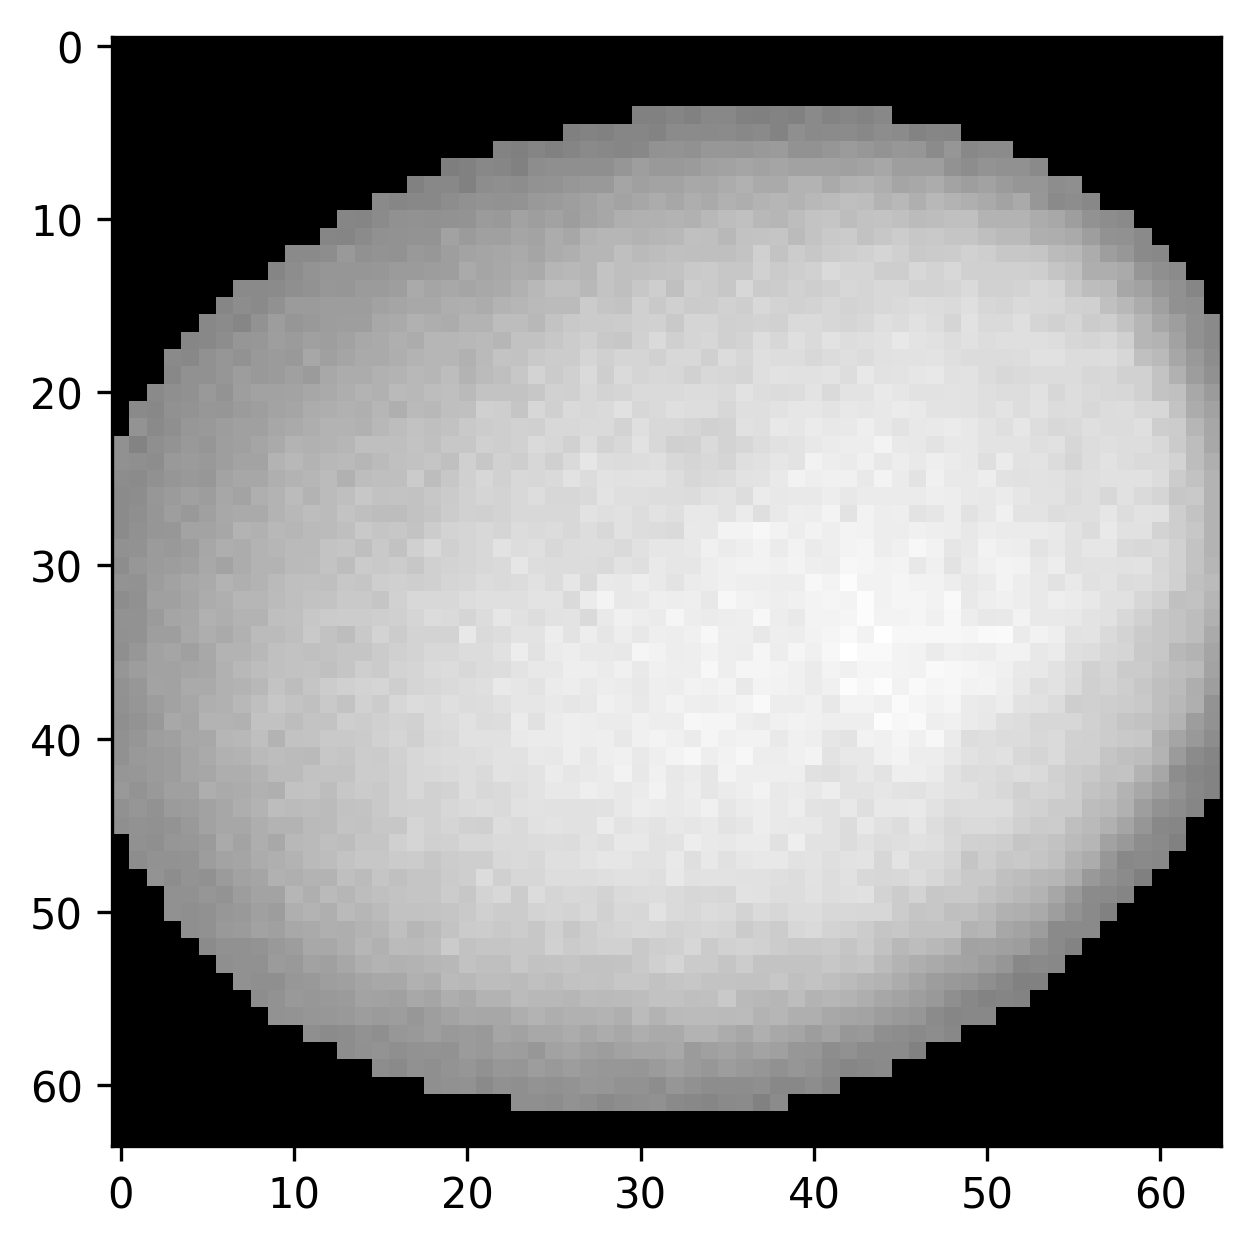

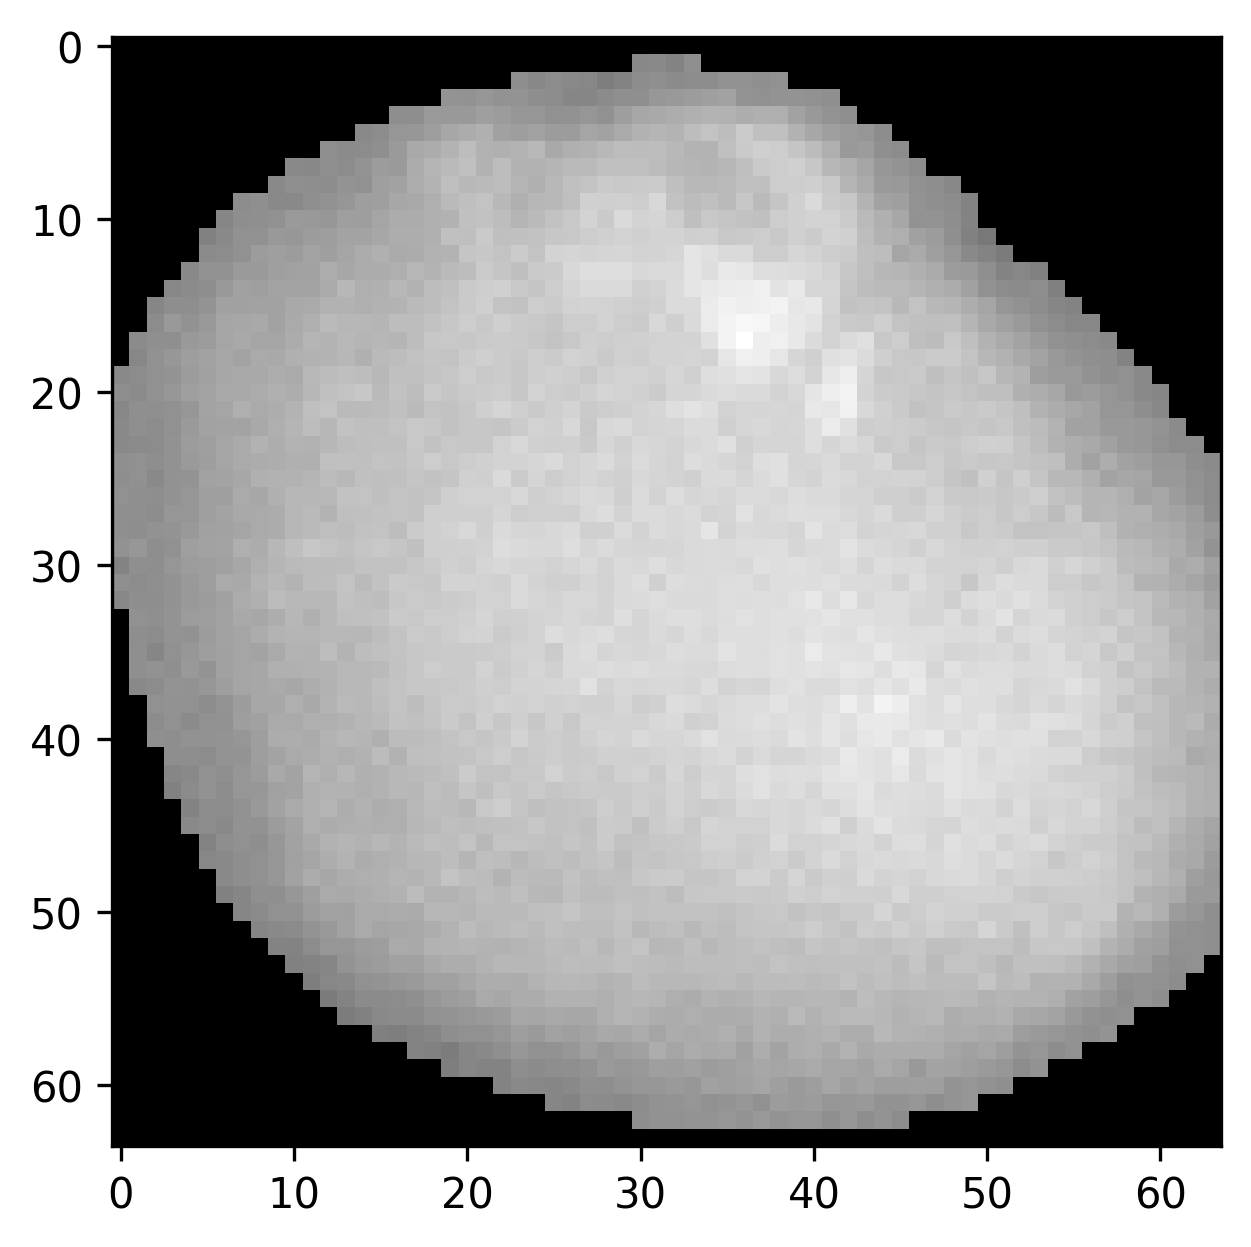

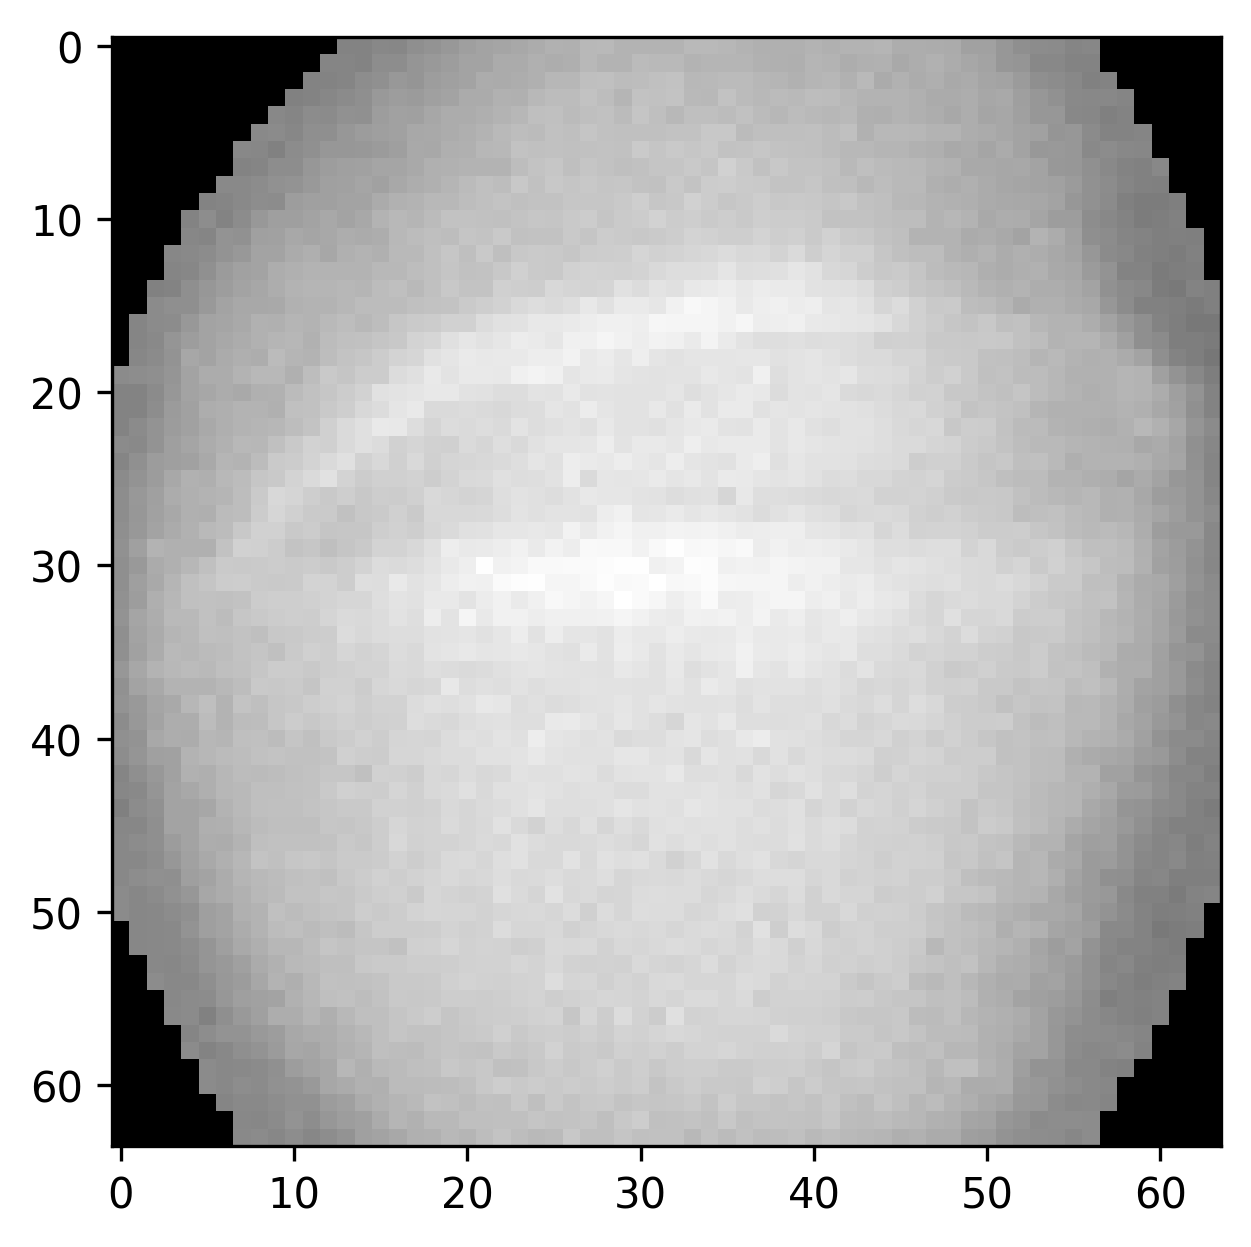

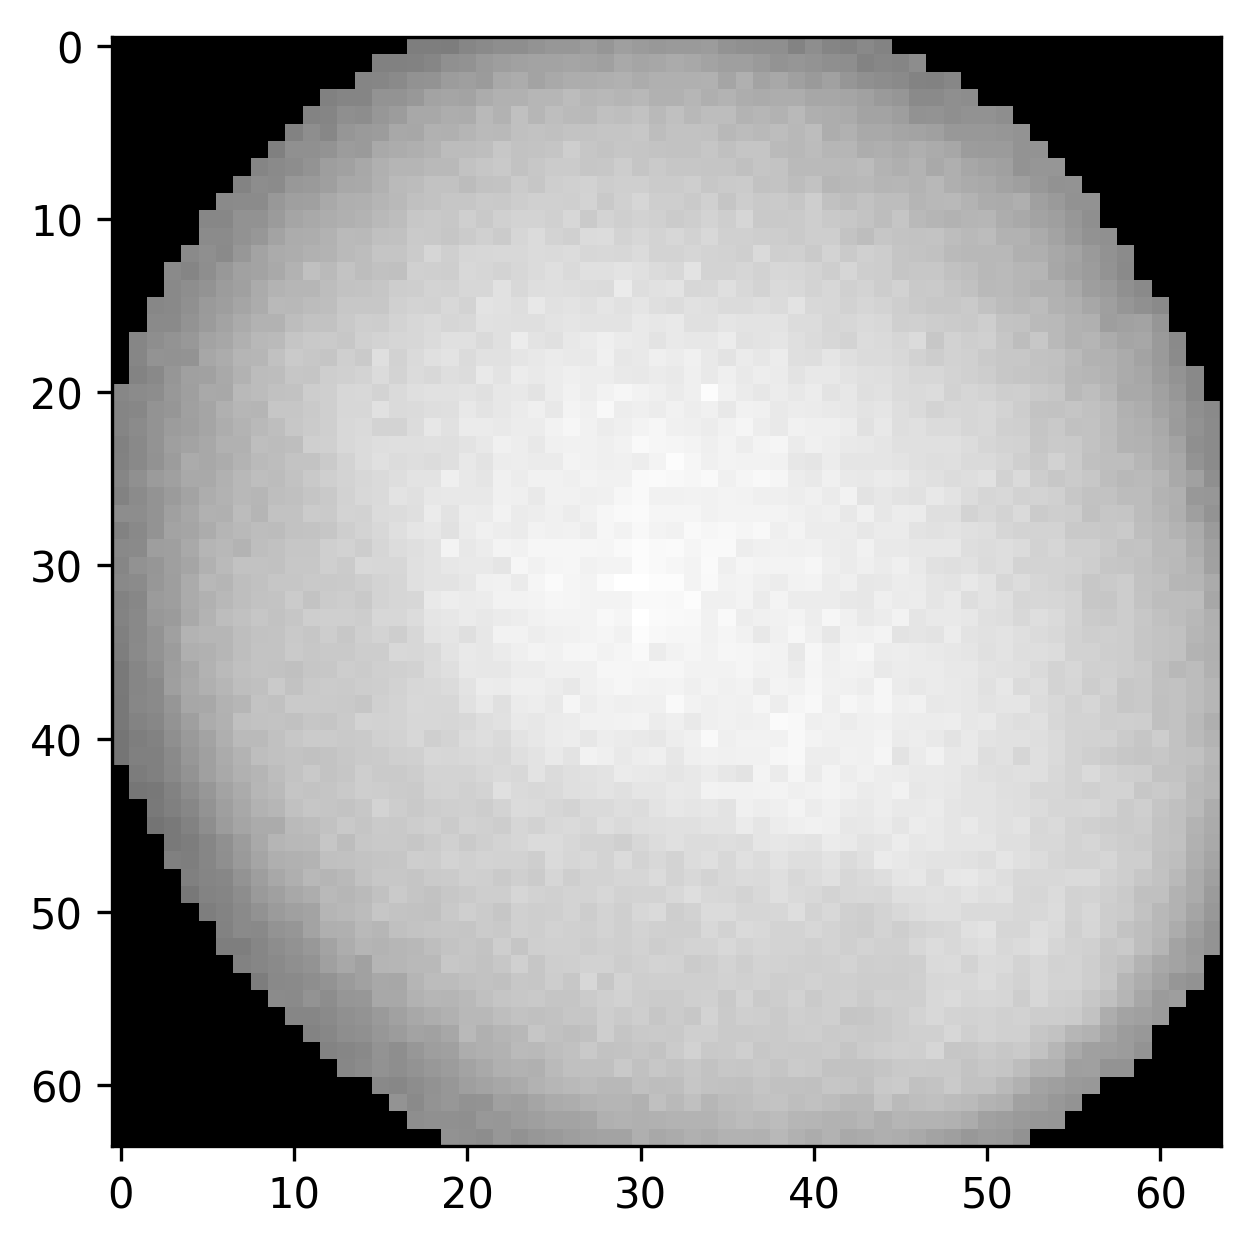

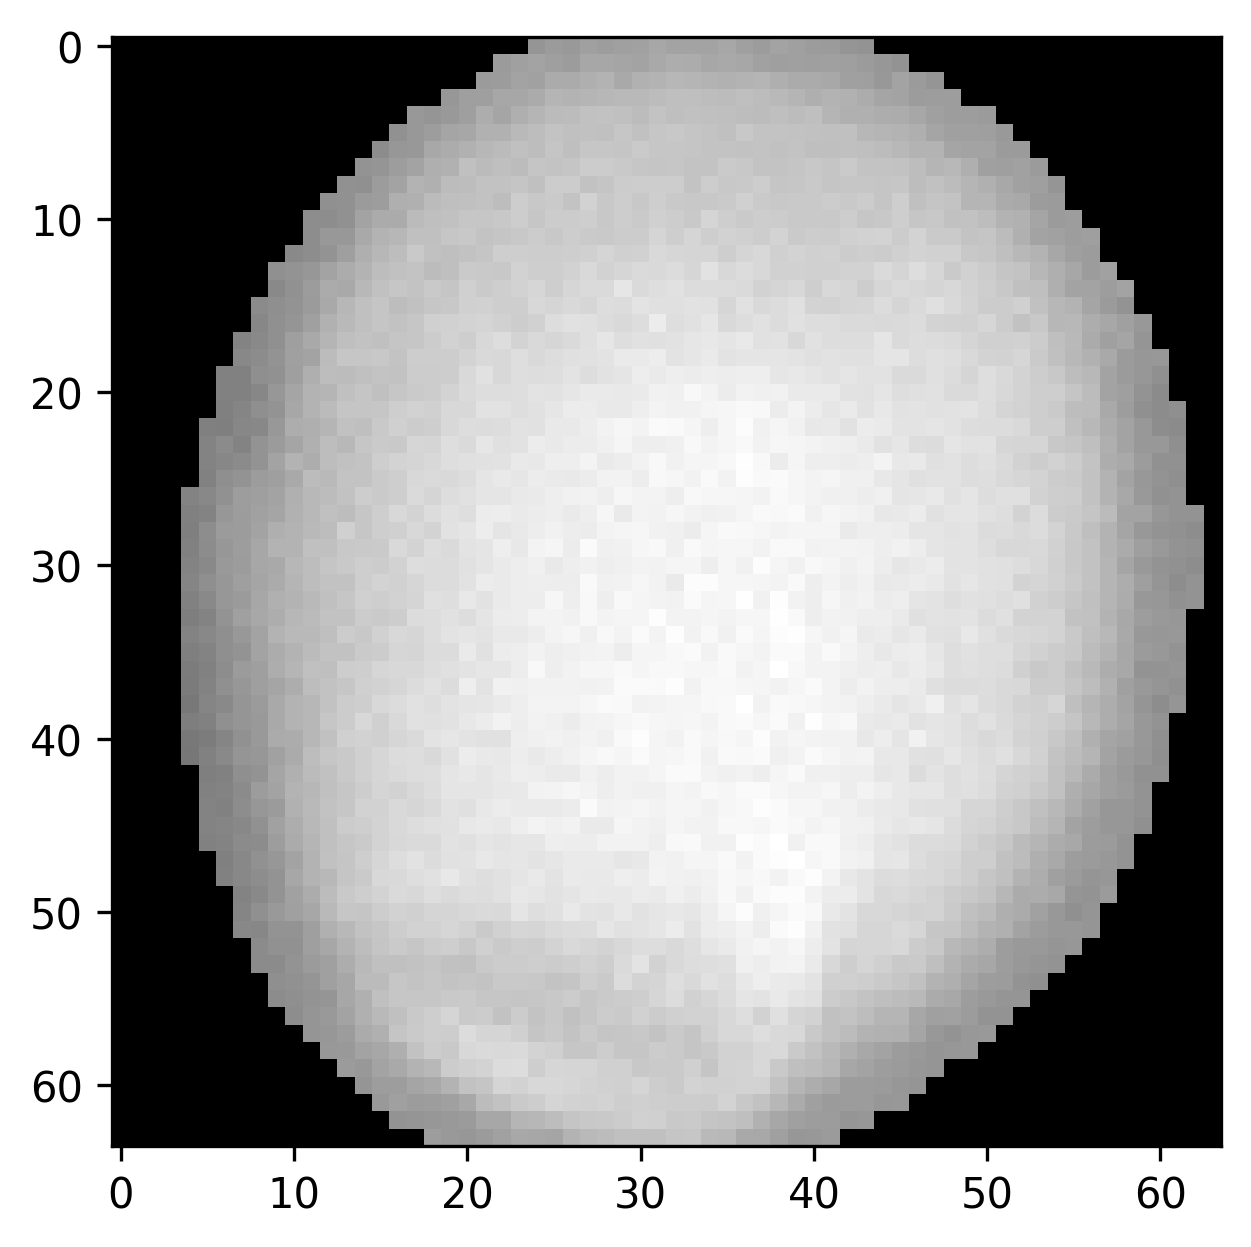

/tmp/ipykernel_8814/622661815.py:38: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.imshow(cropped_img, cmap='gray')


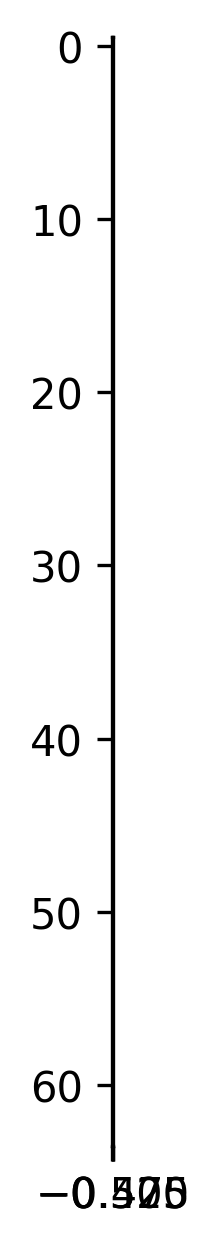

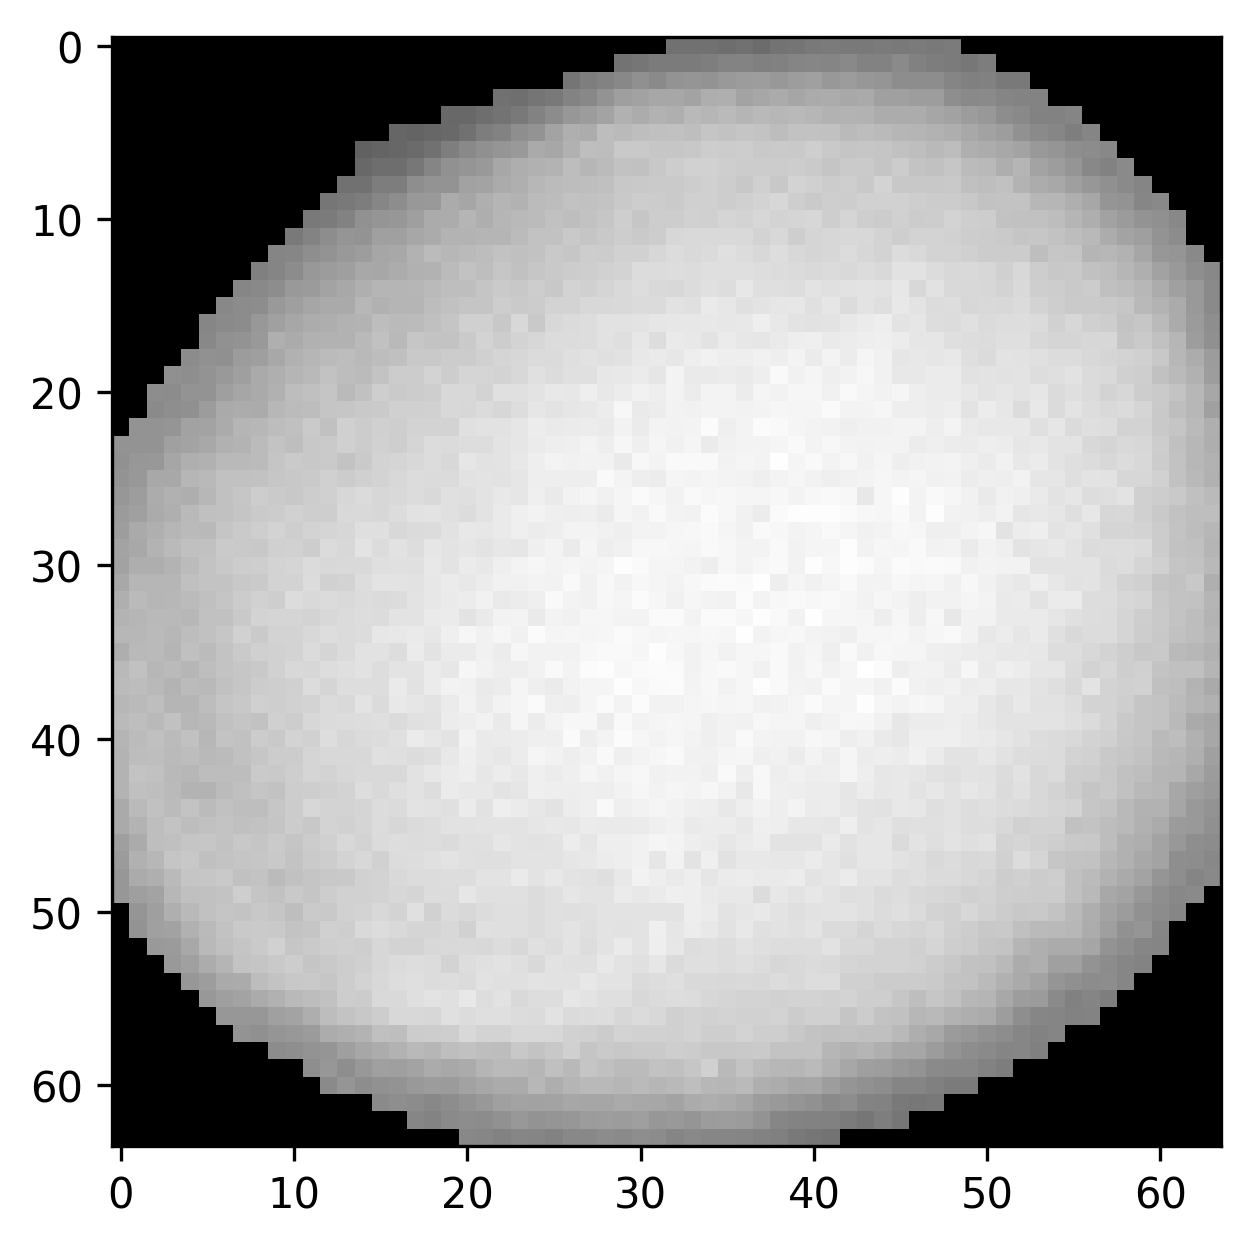

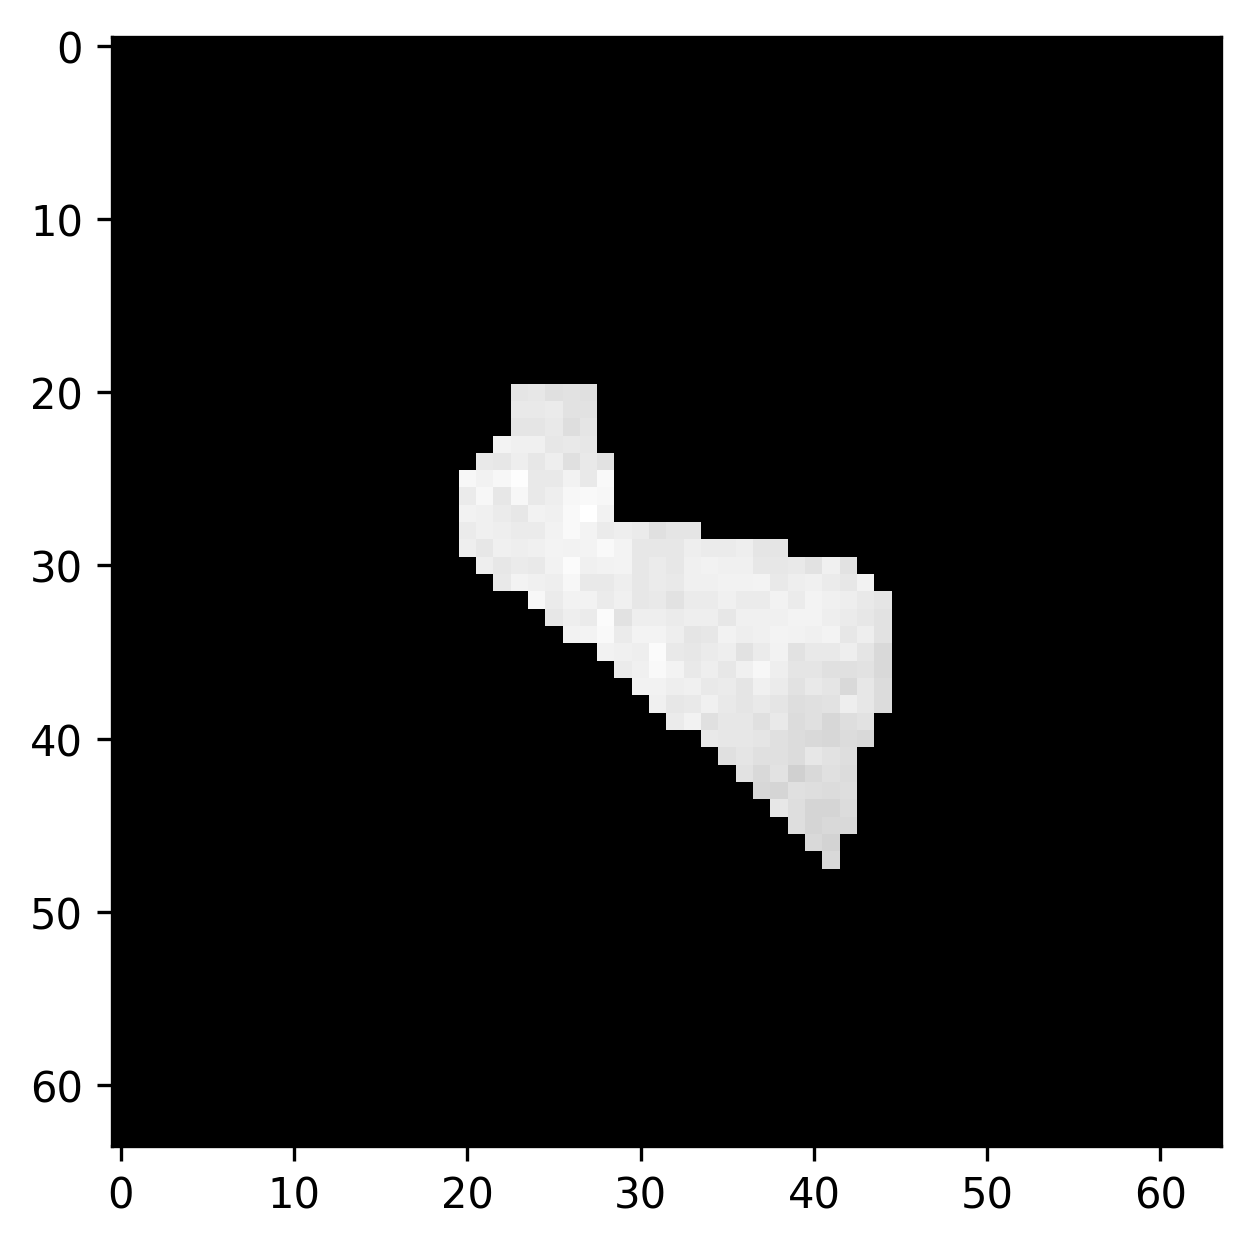

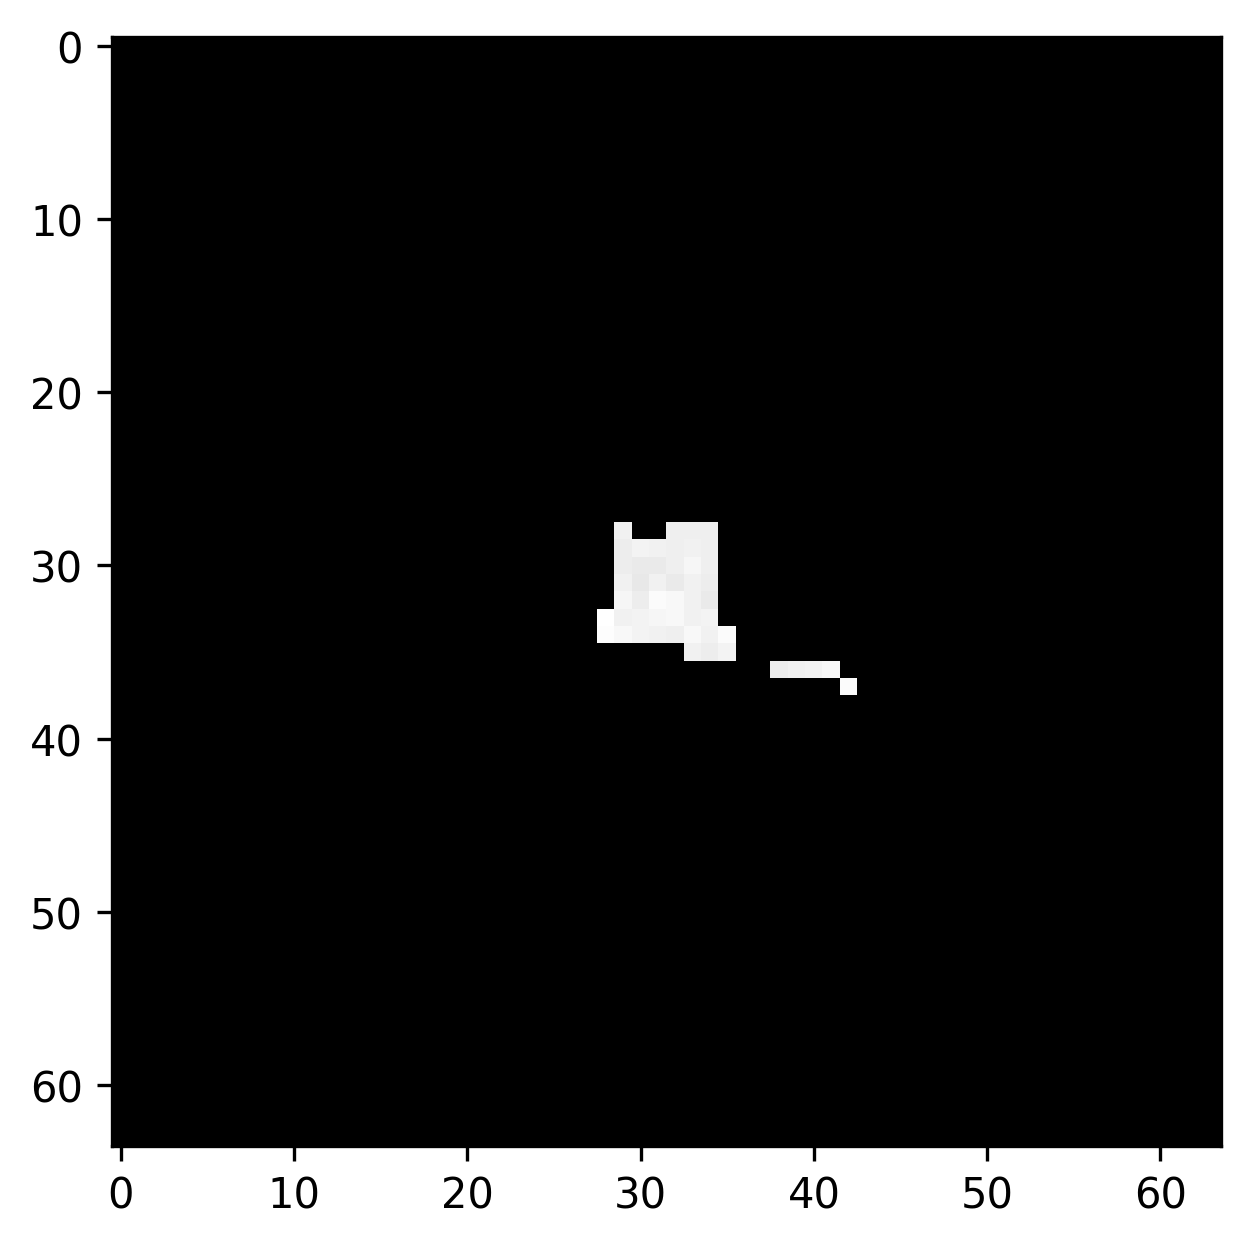

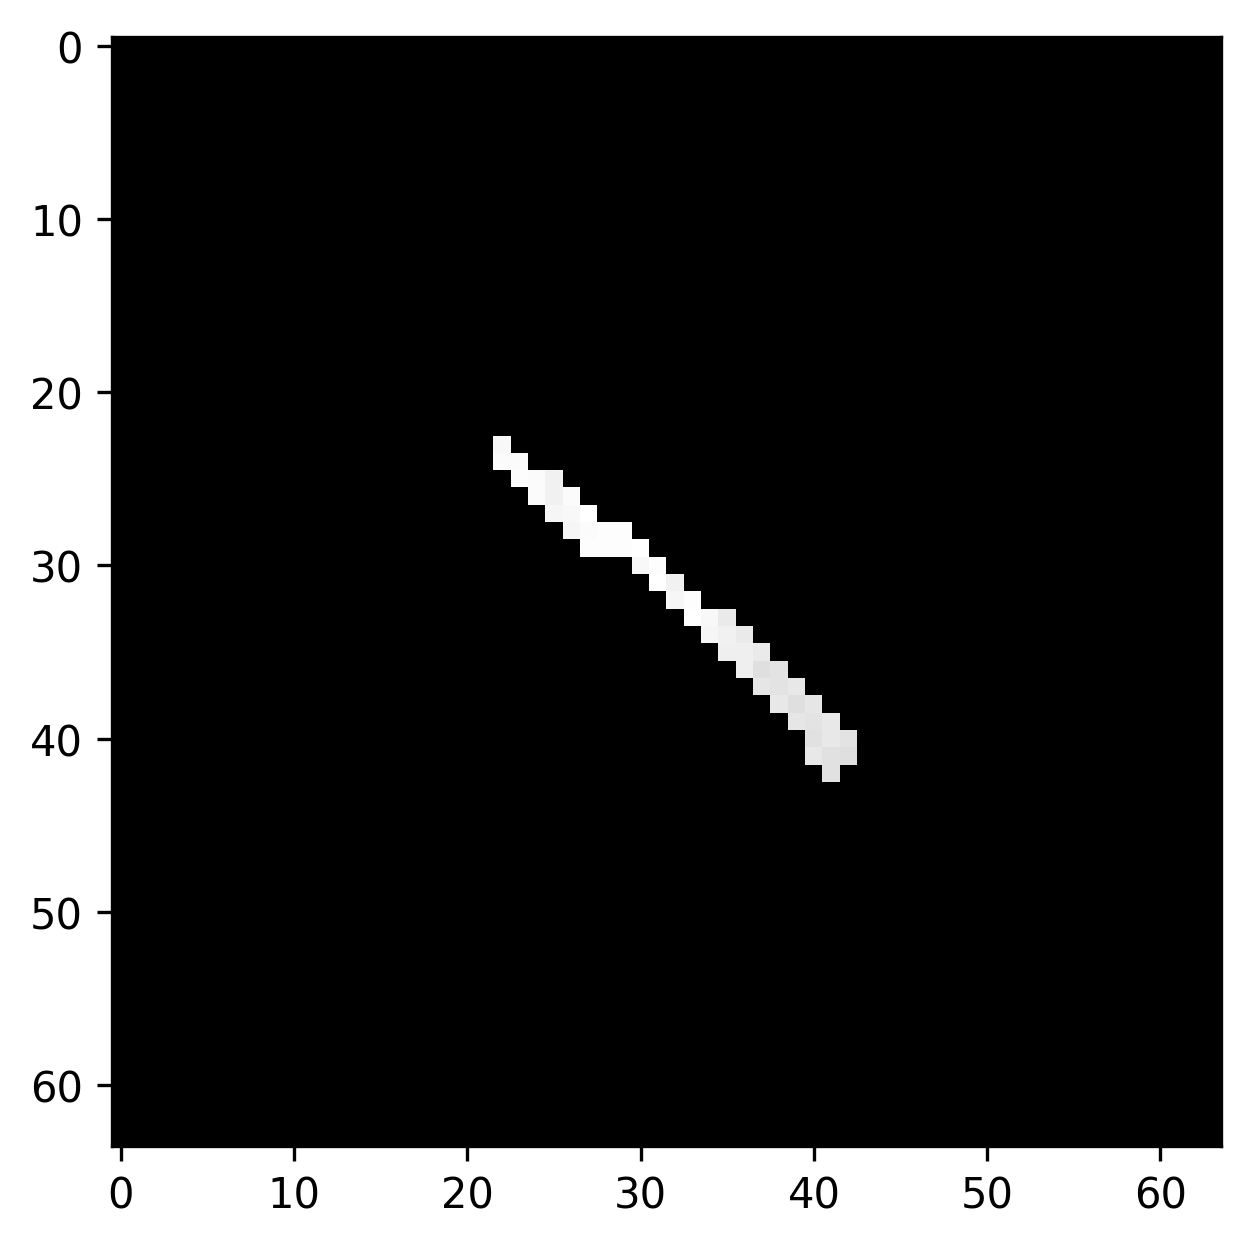

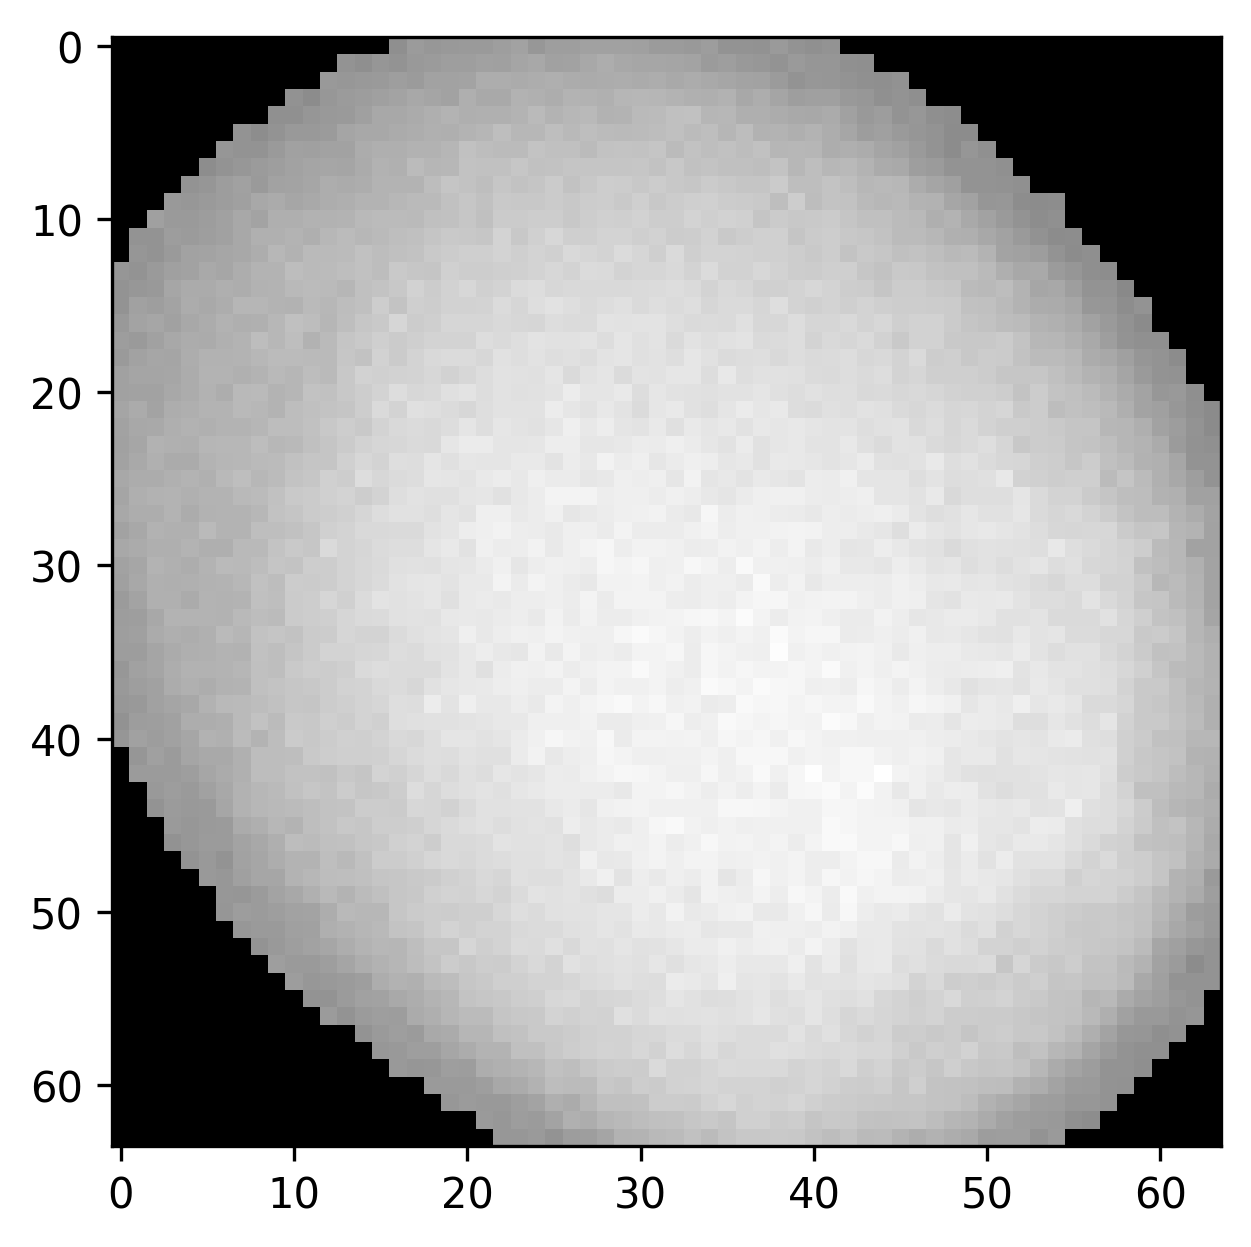

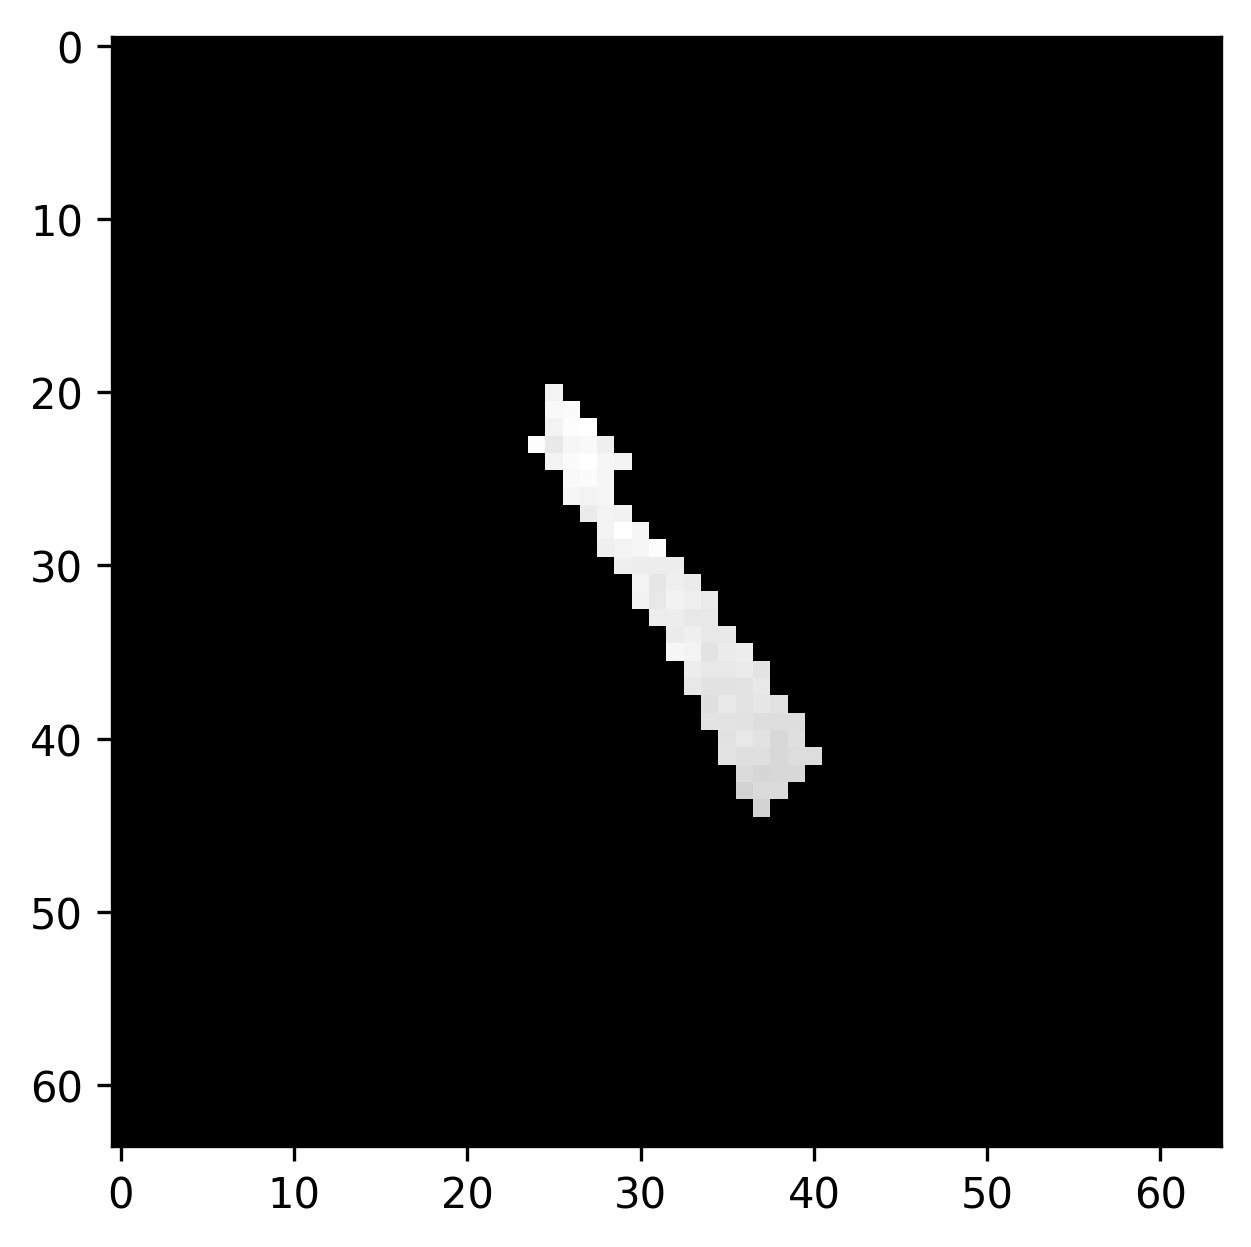

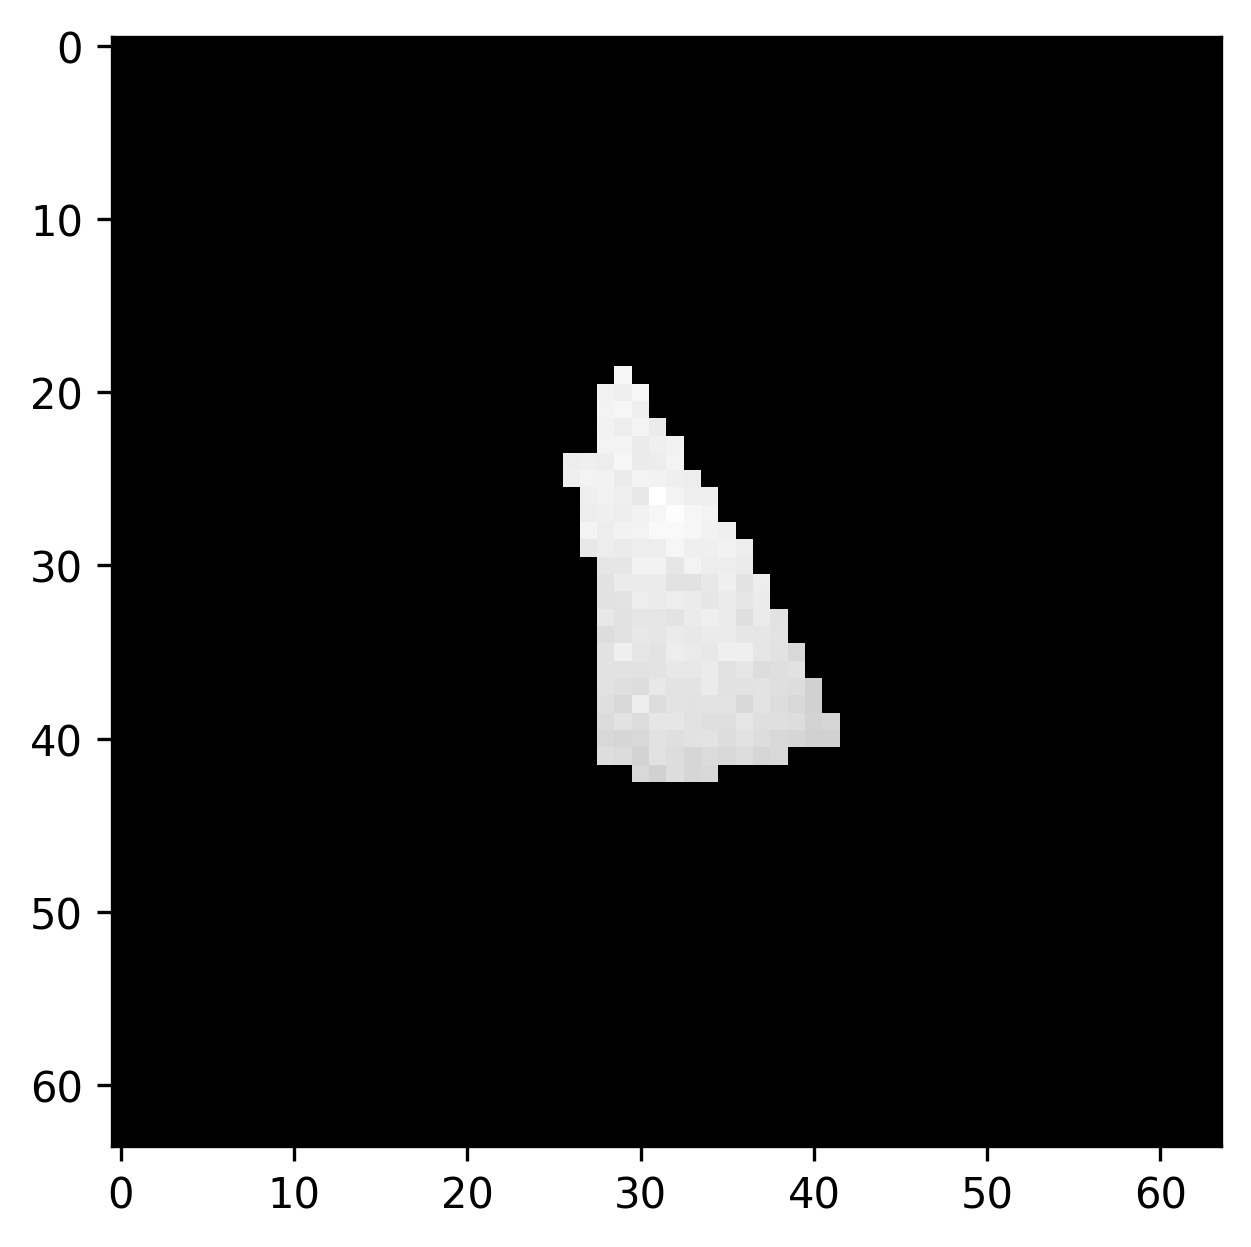

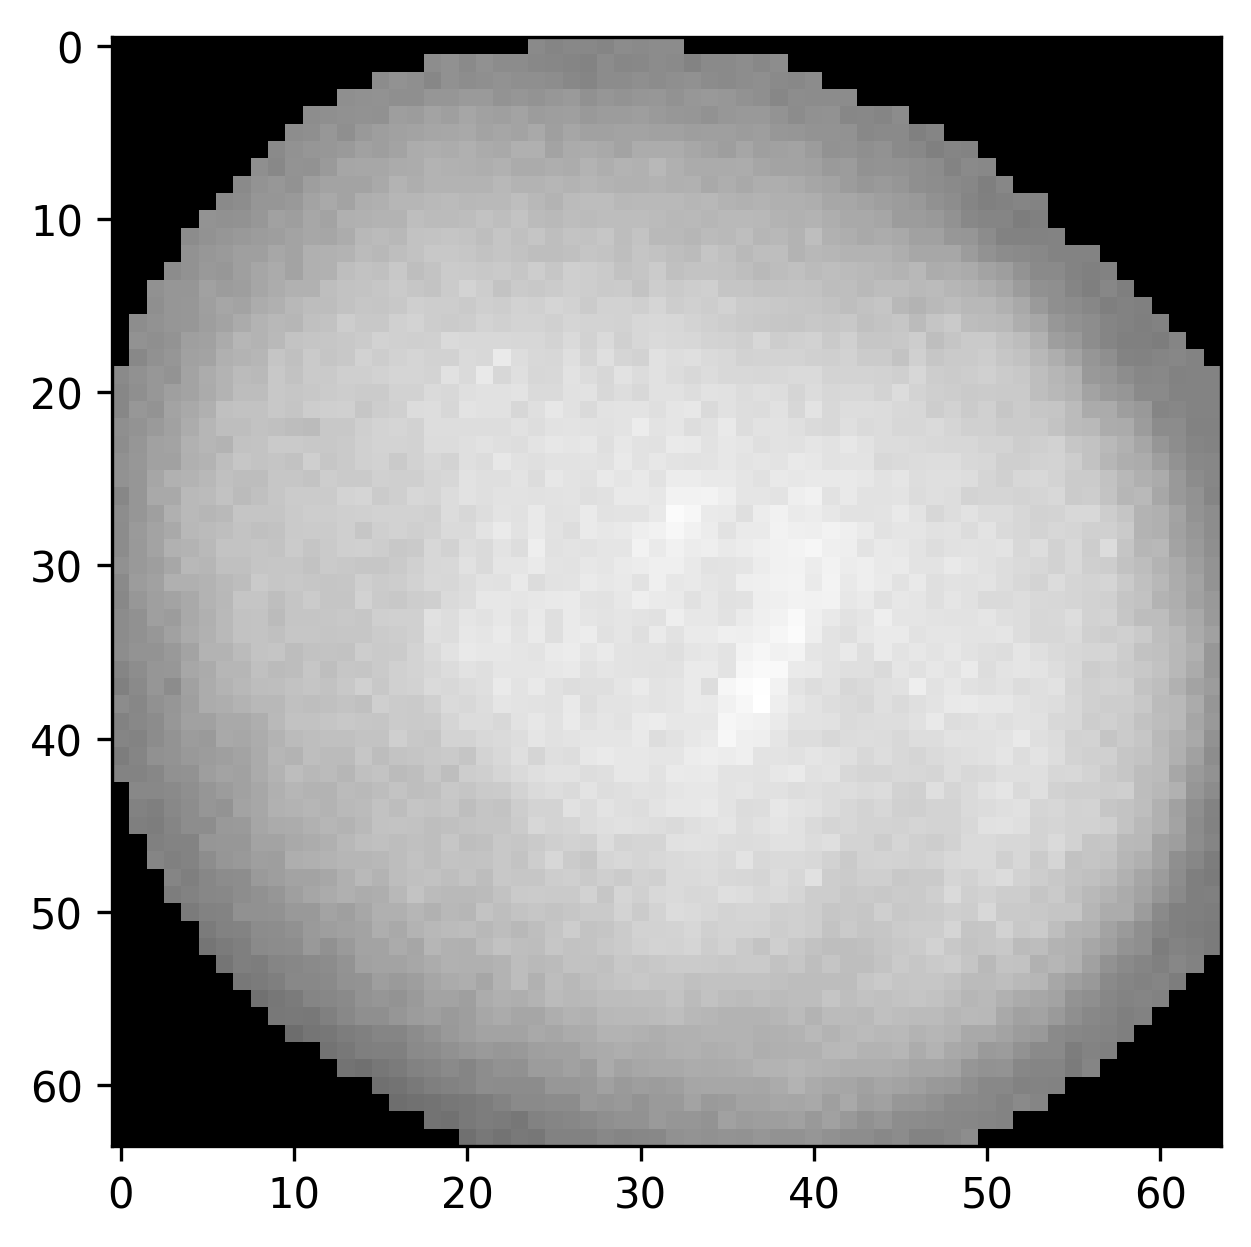

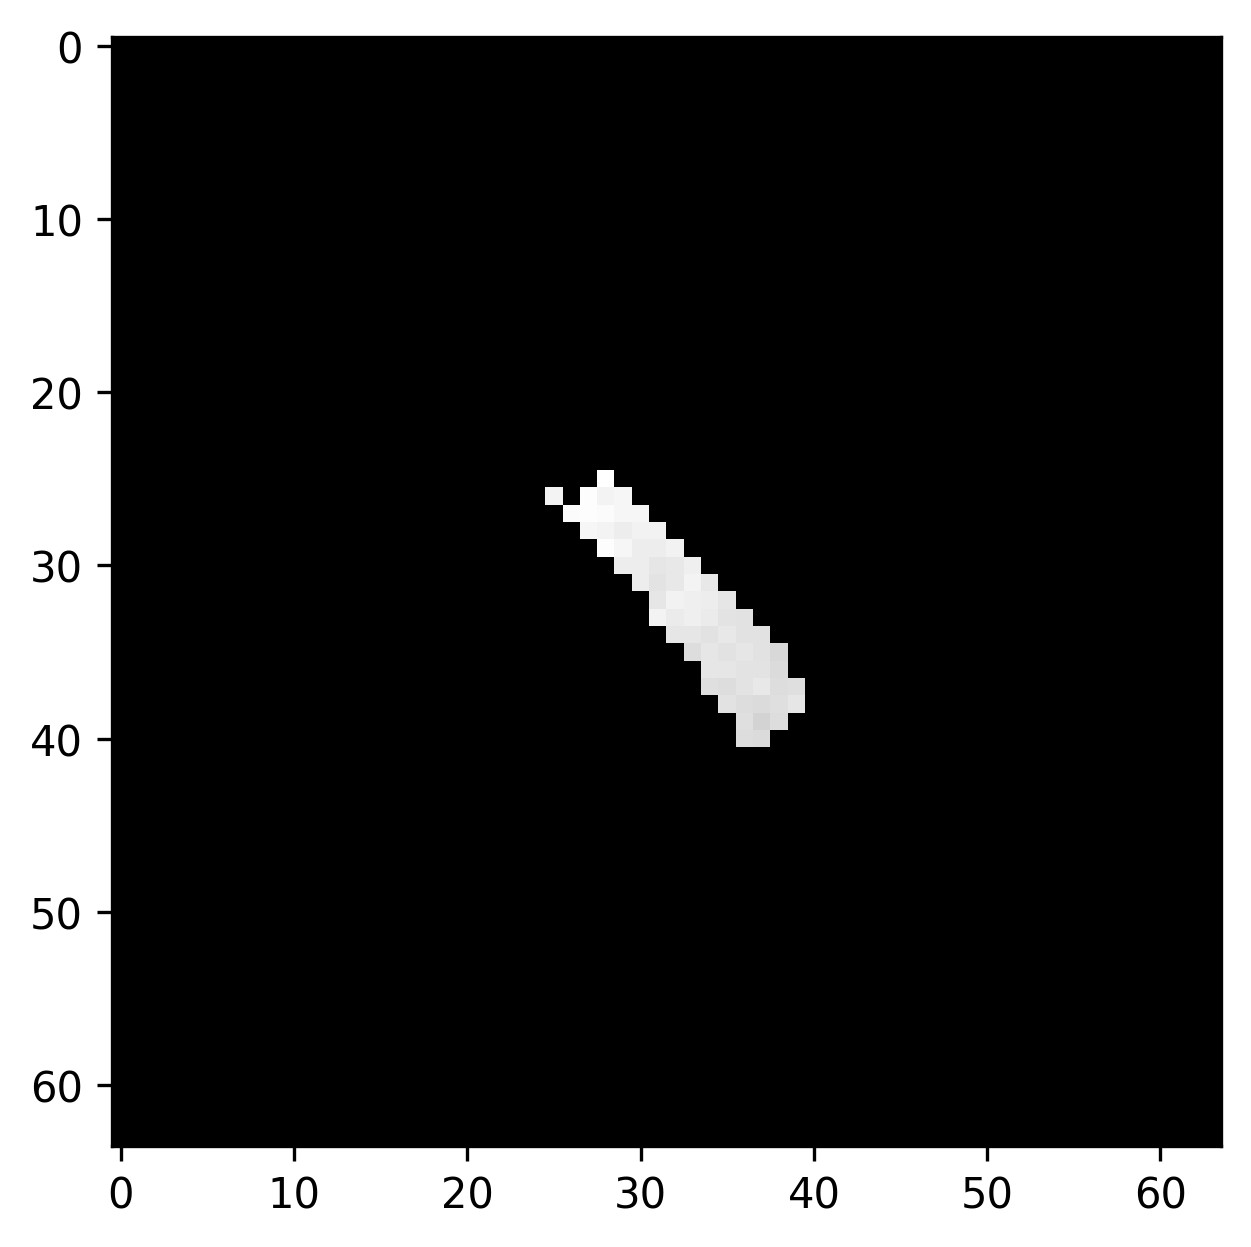

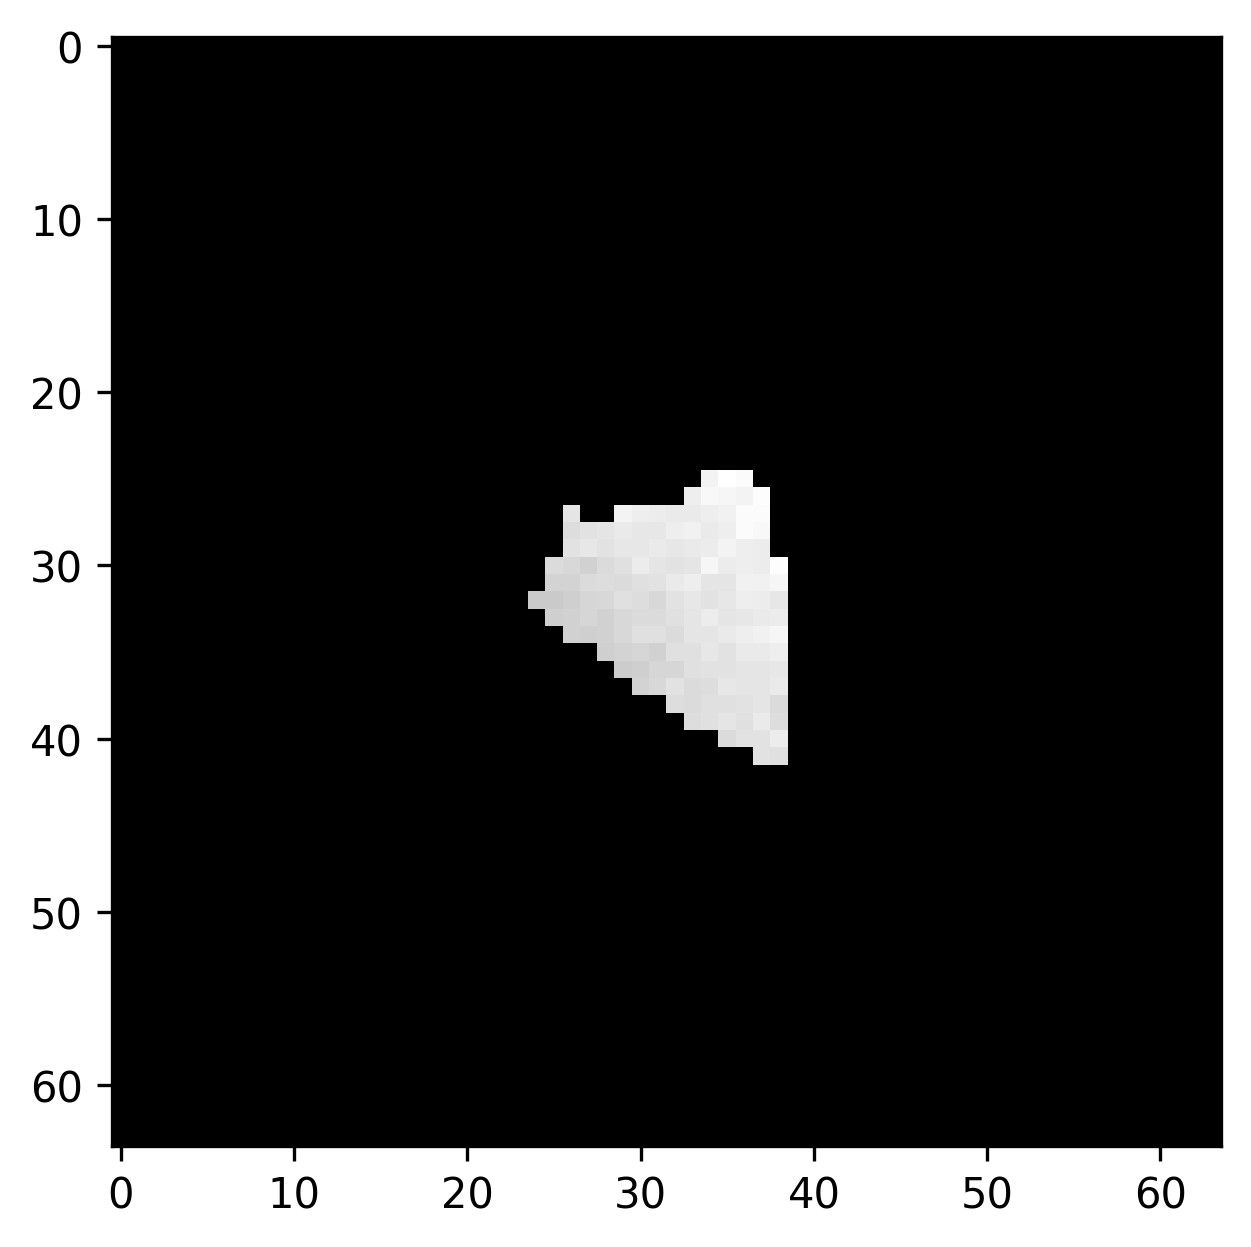

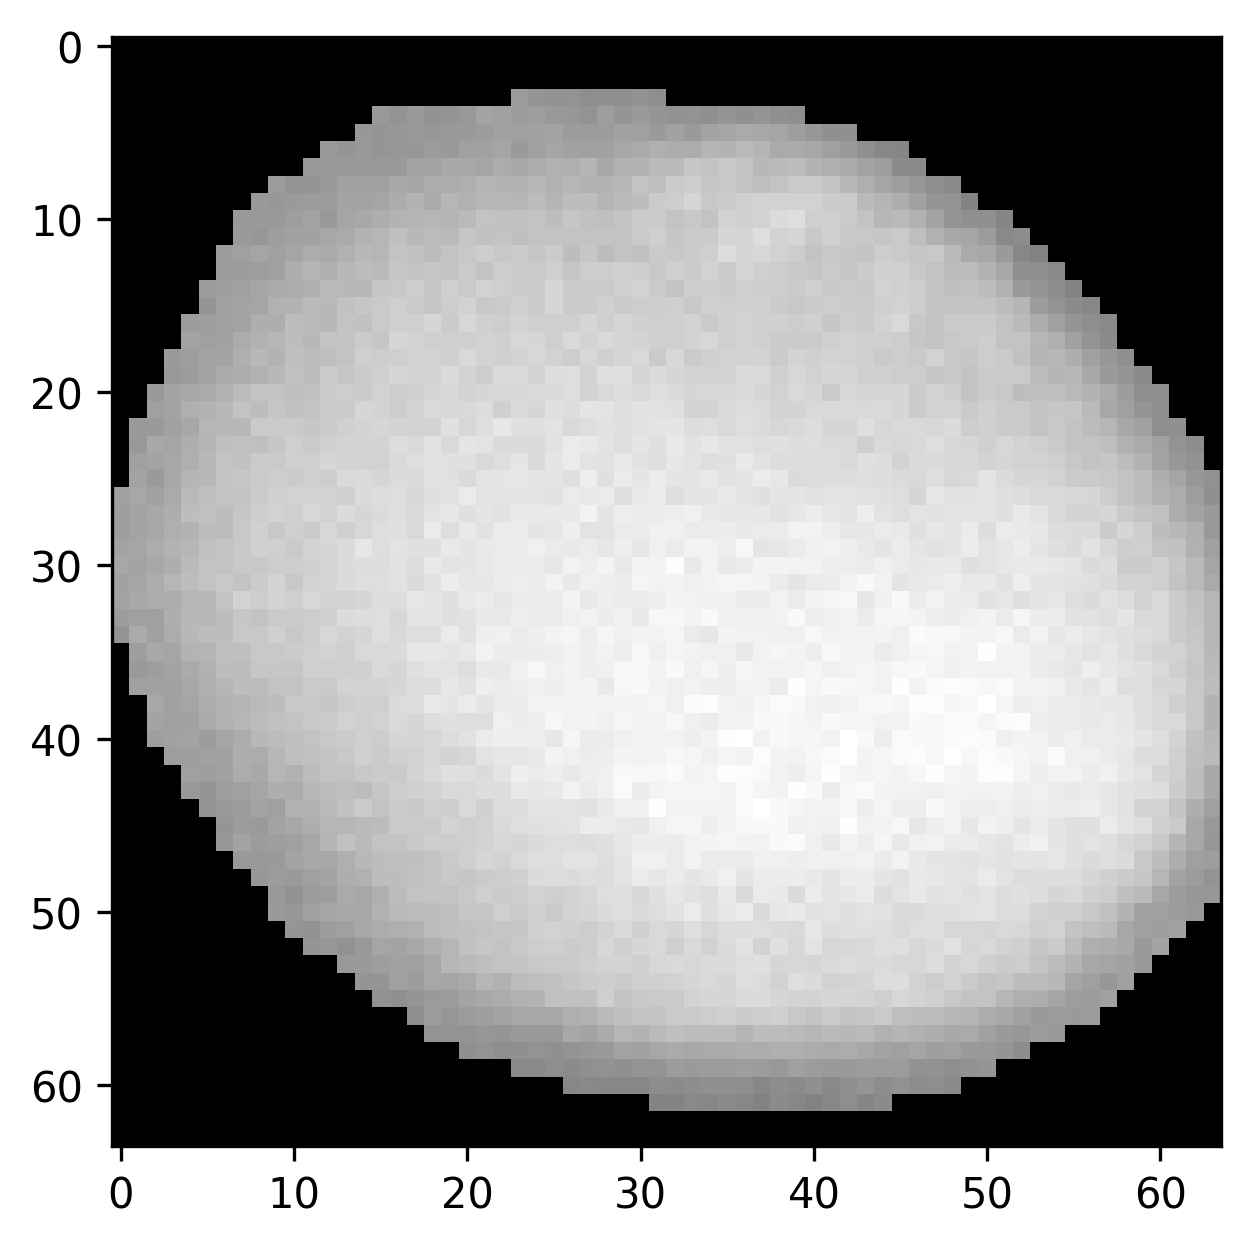

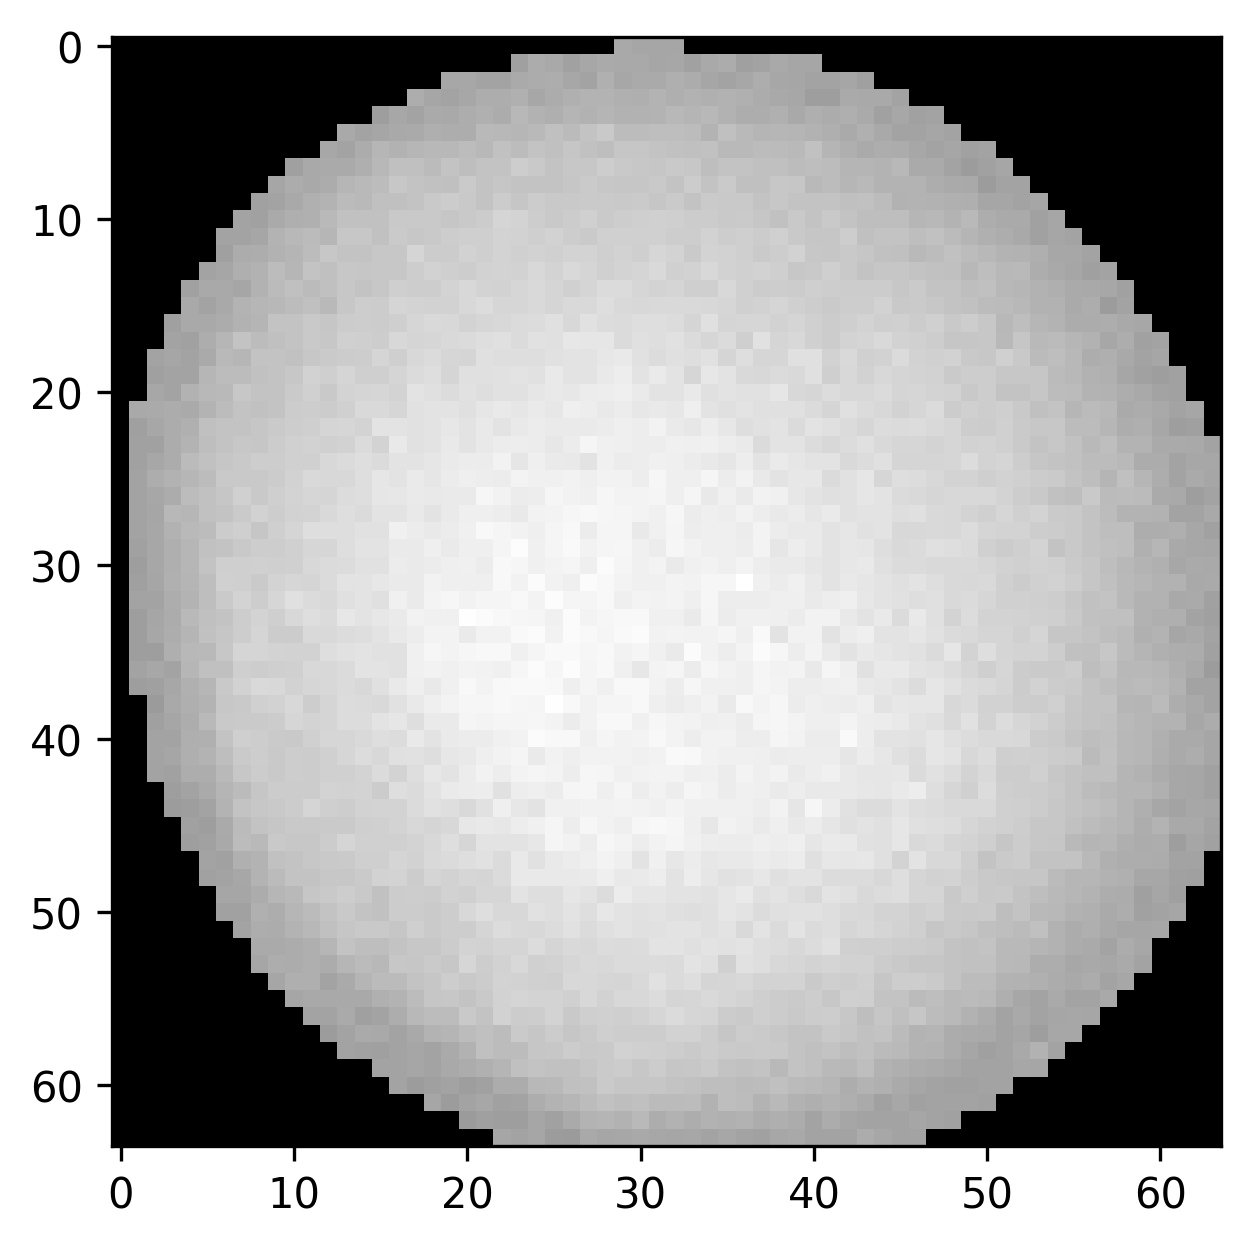

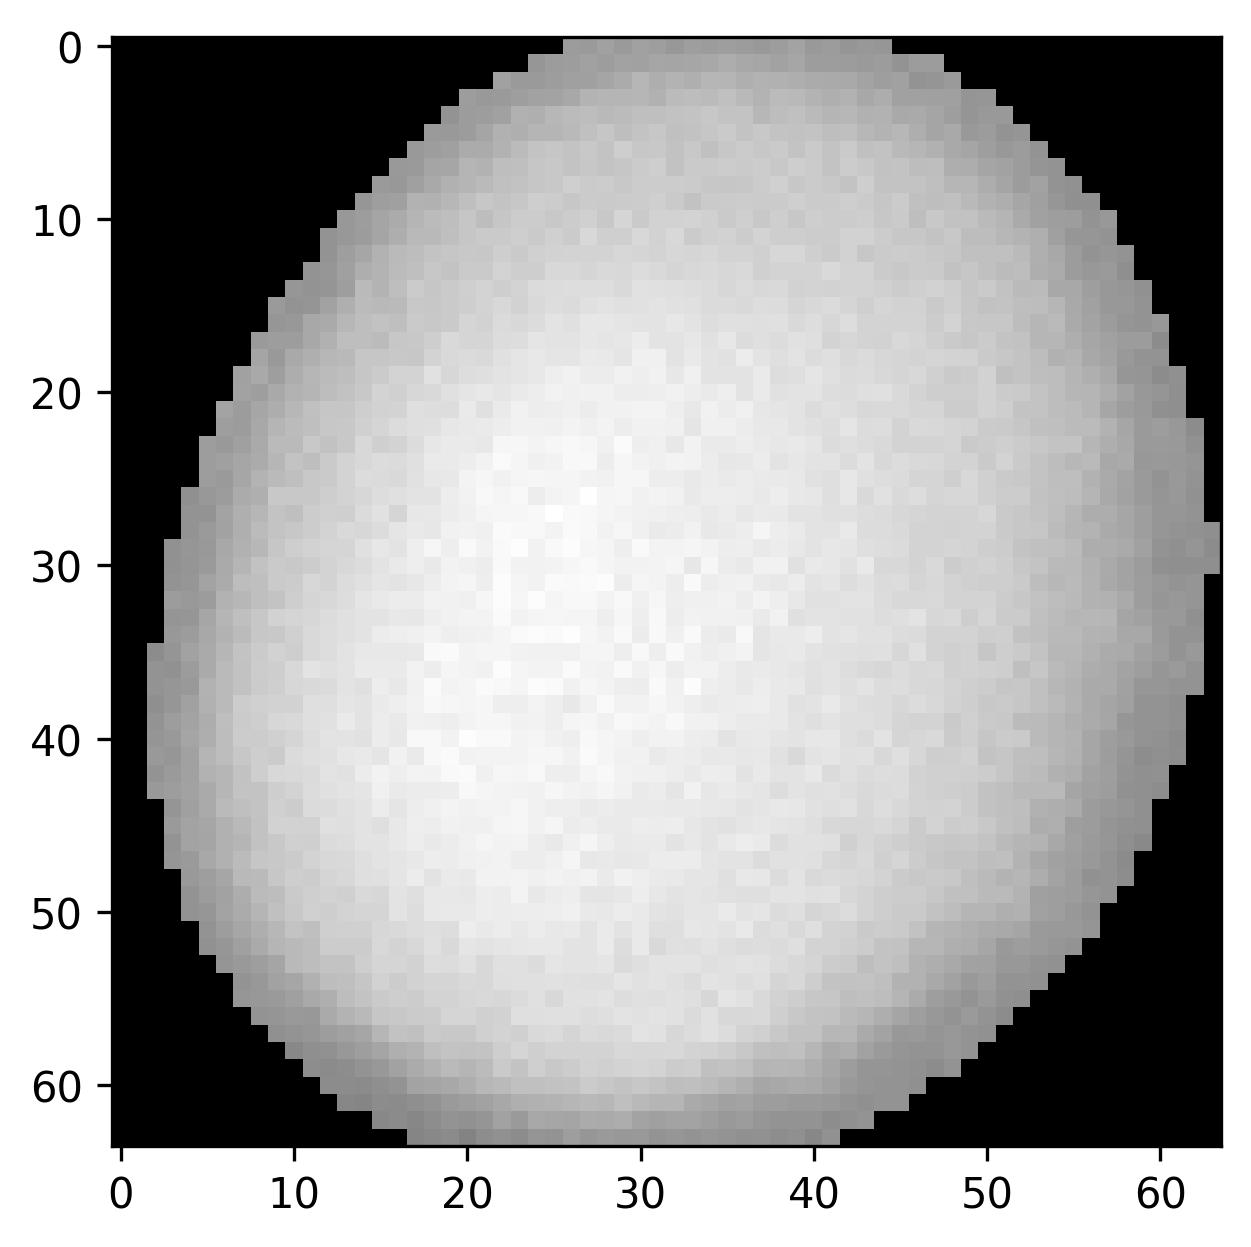

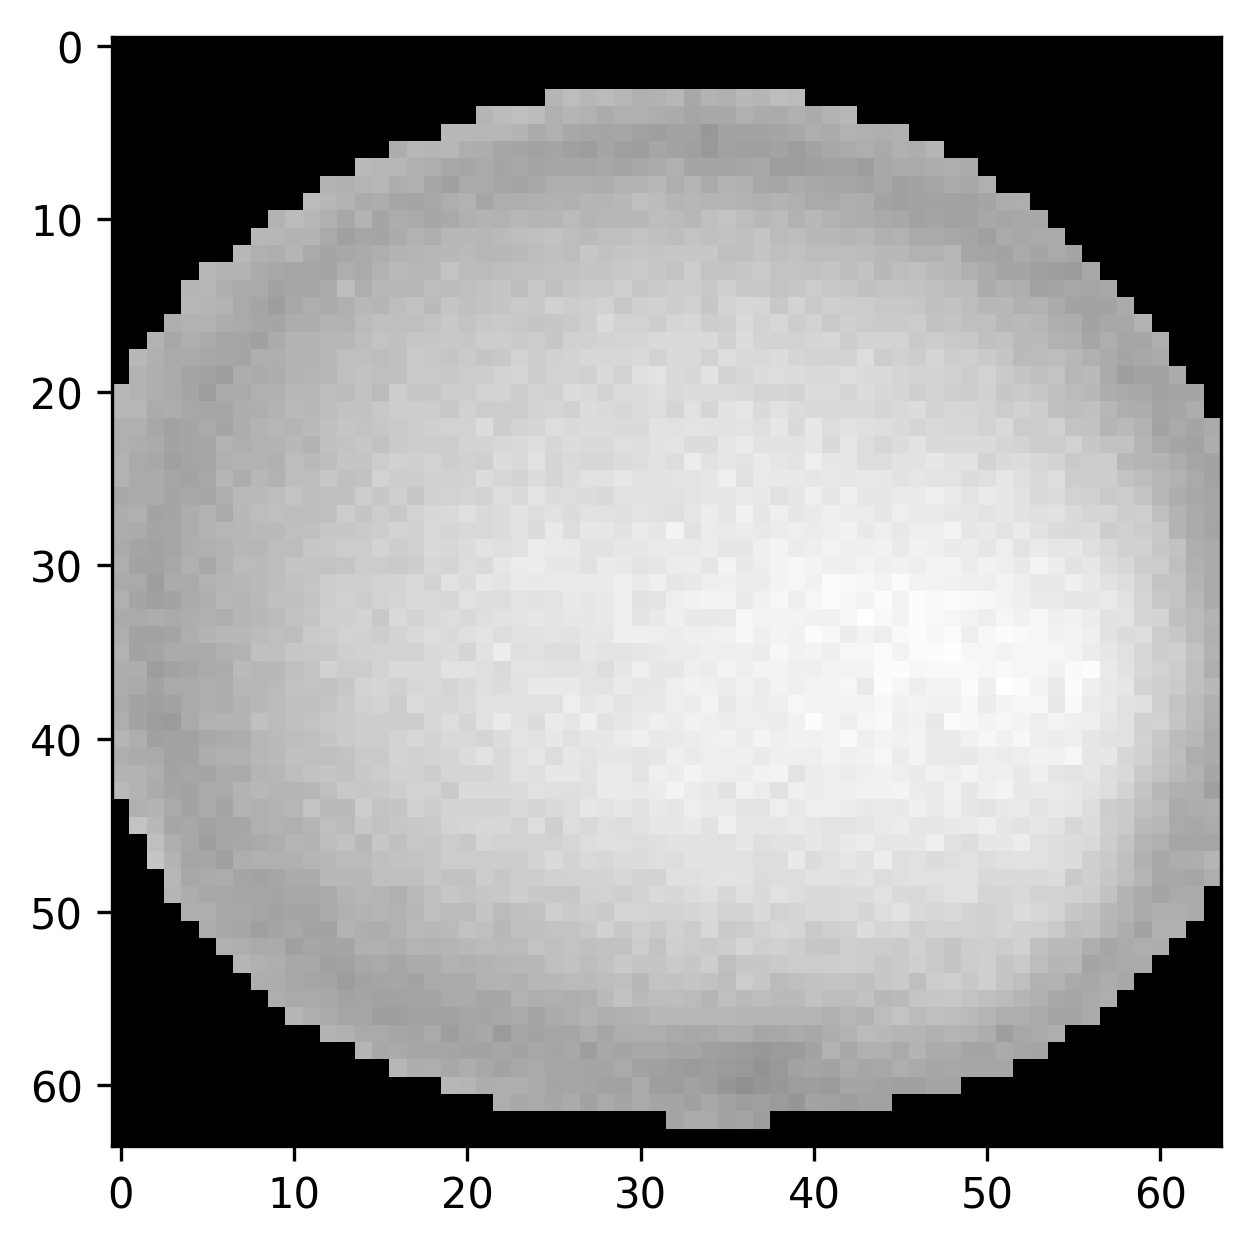

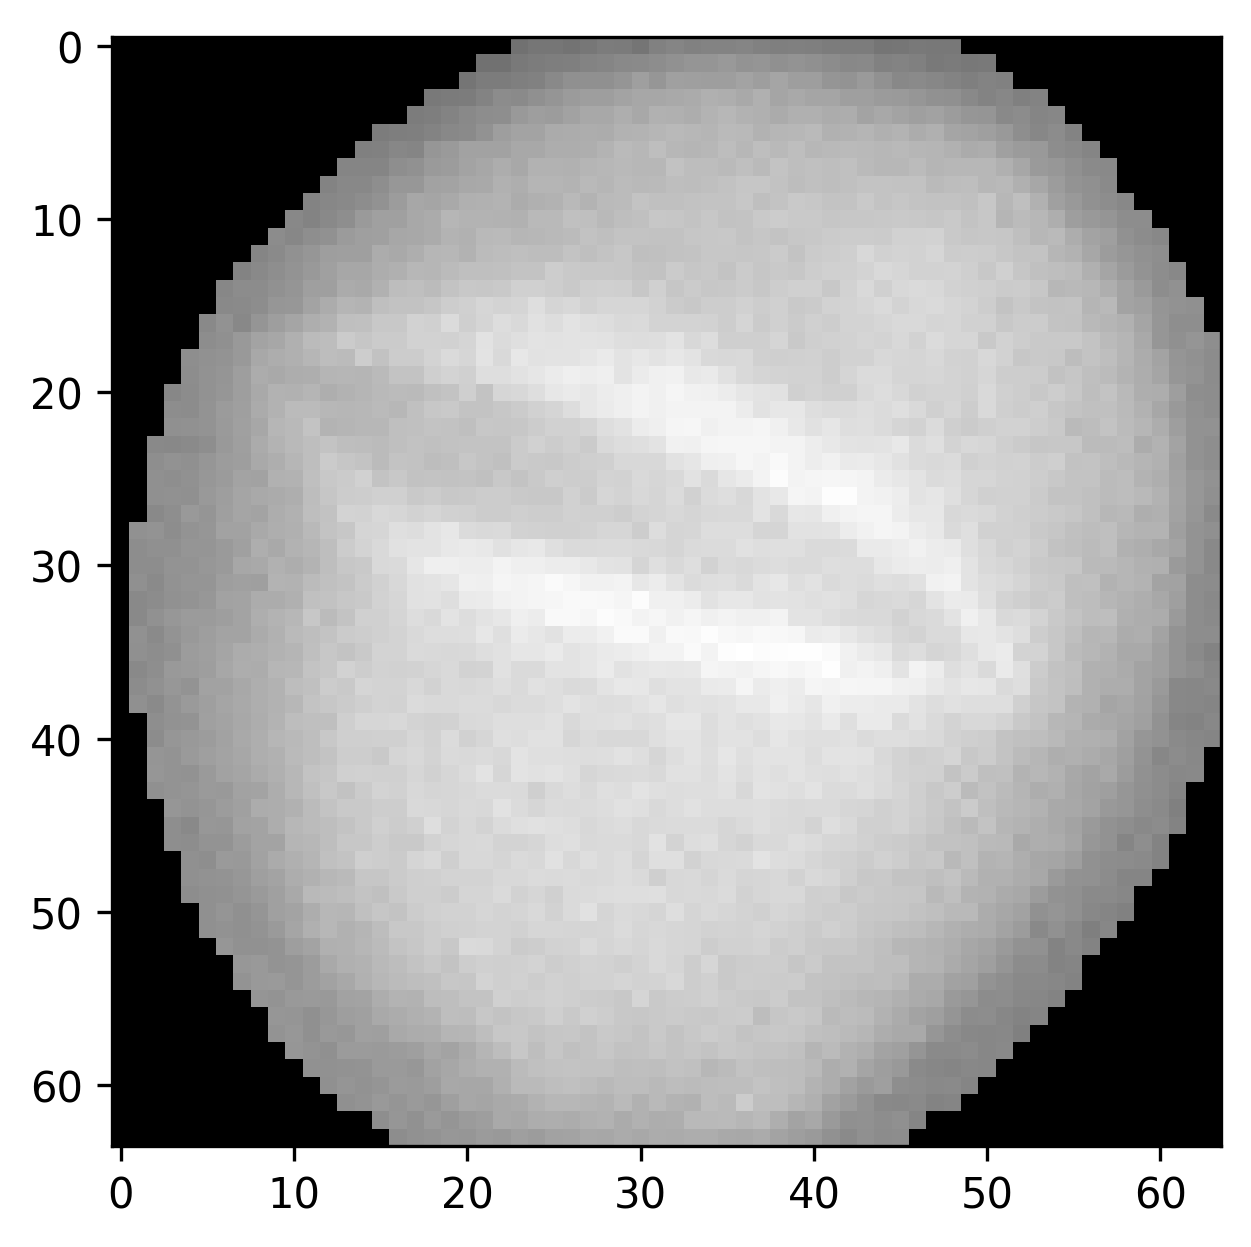

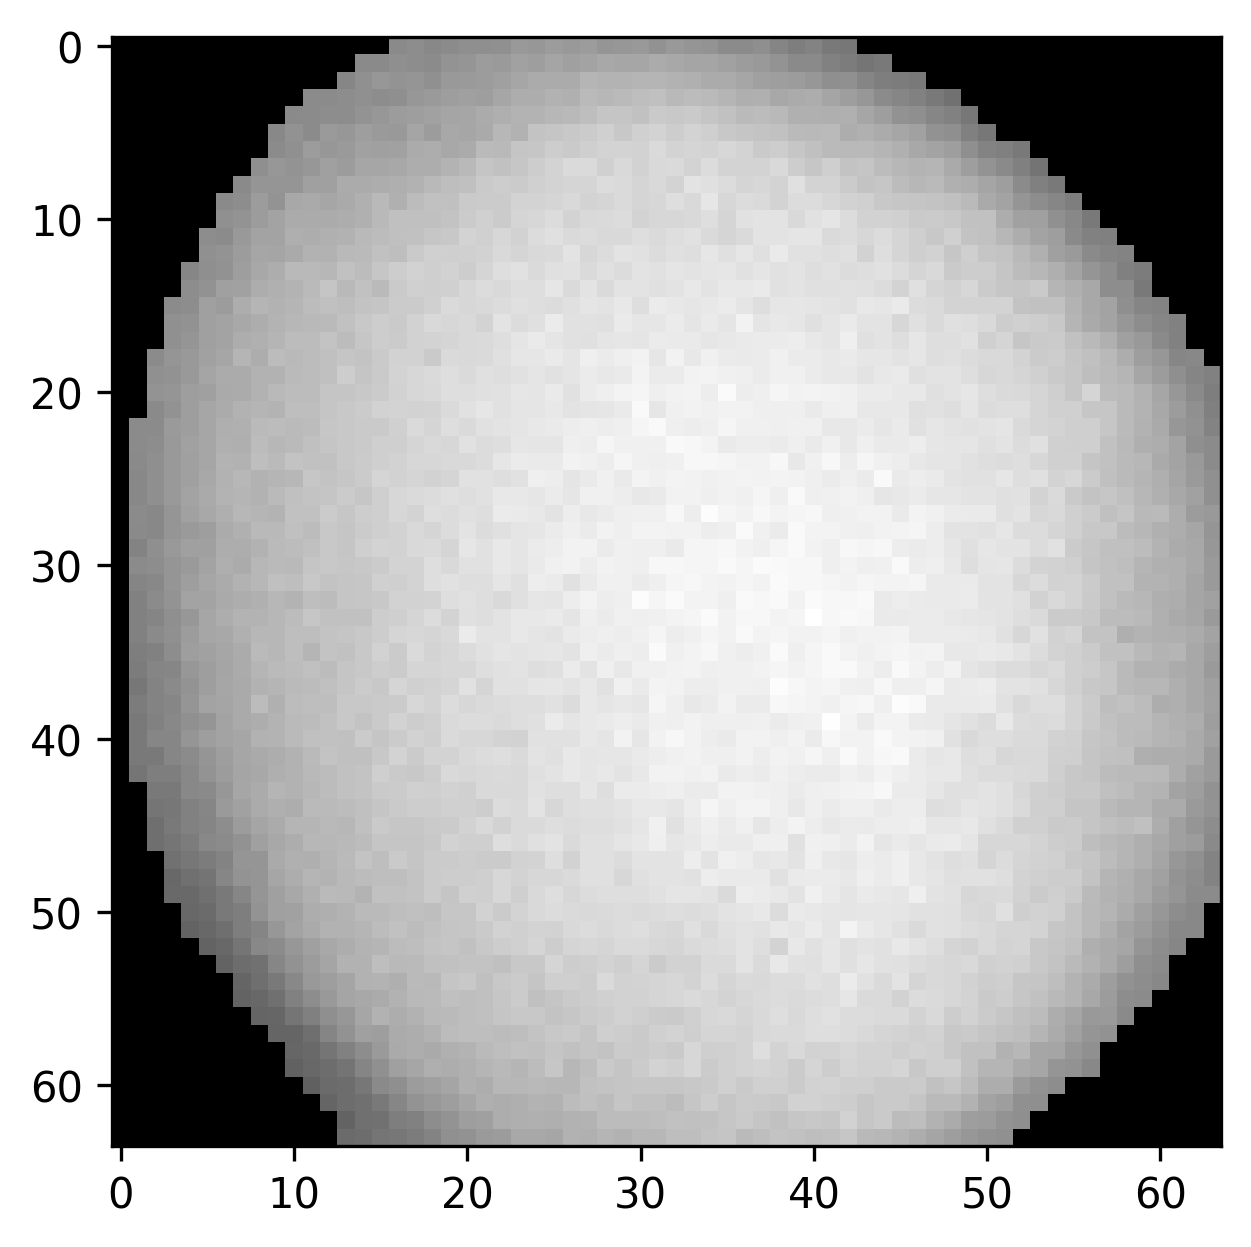

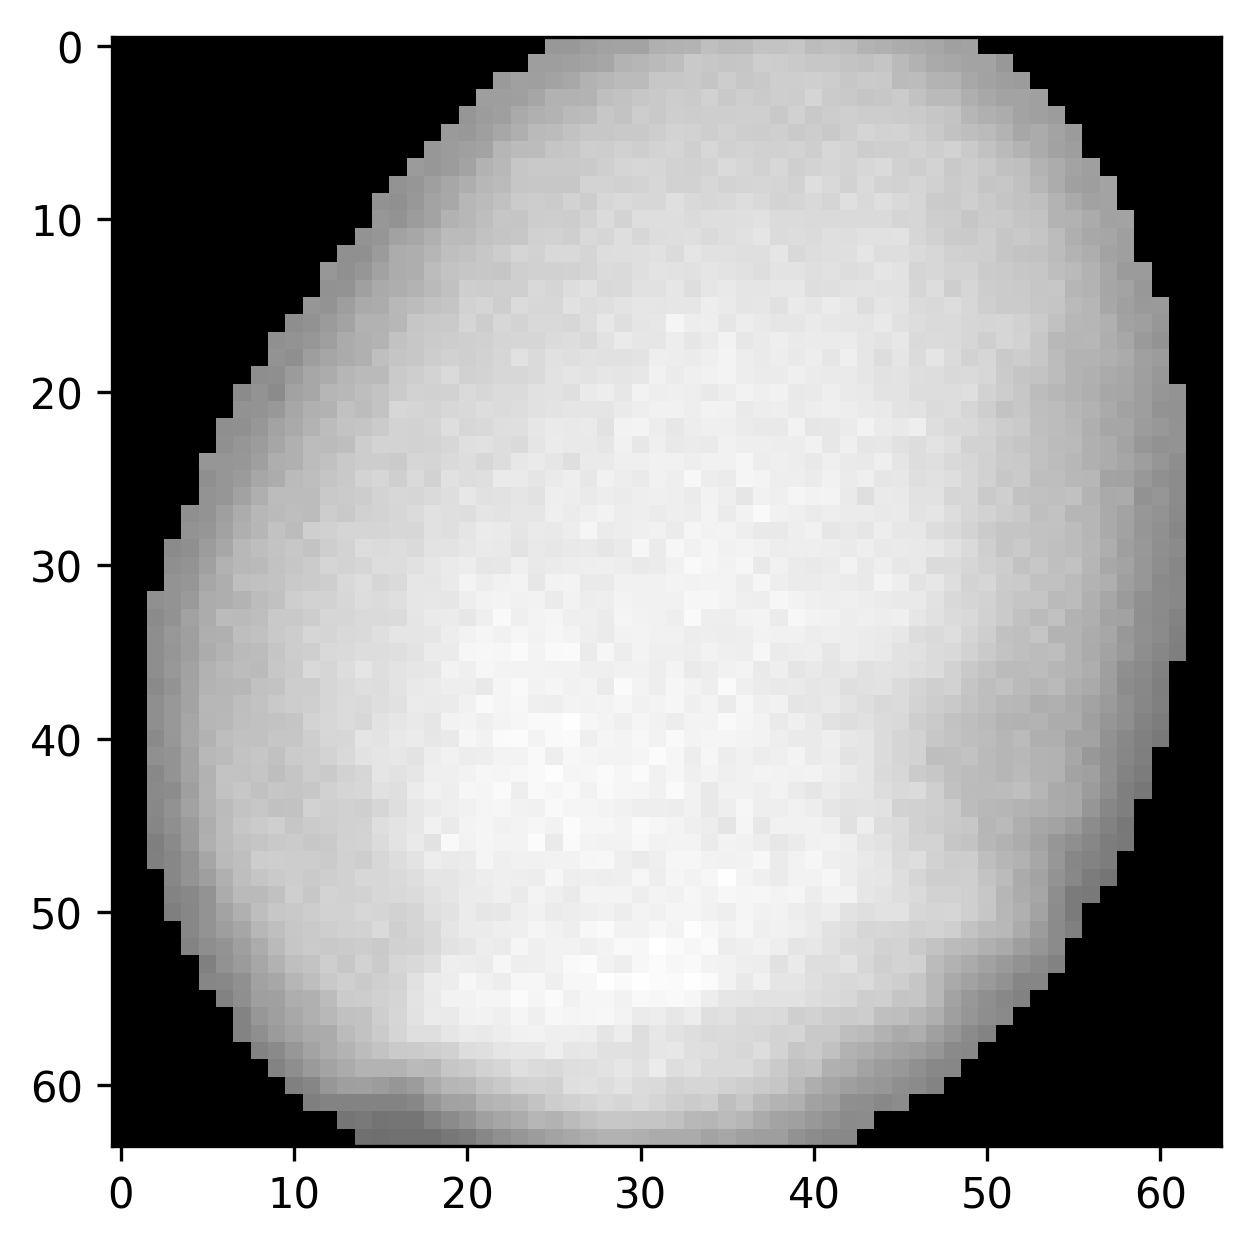

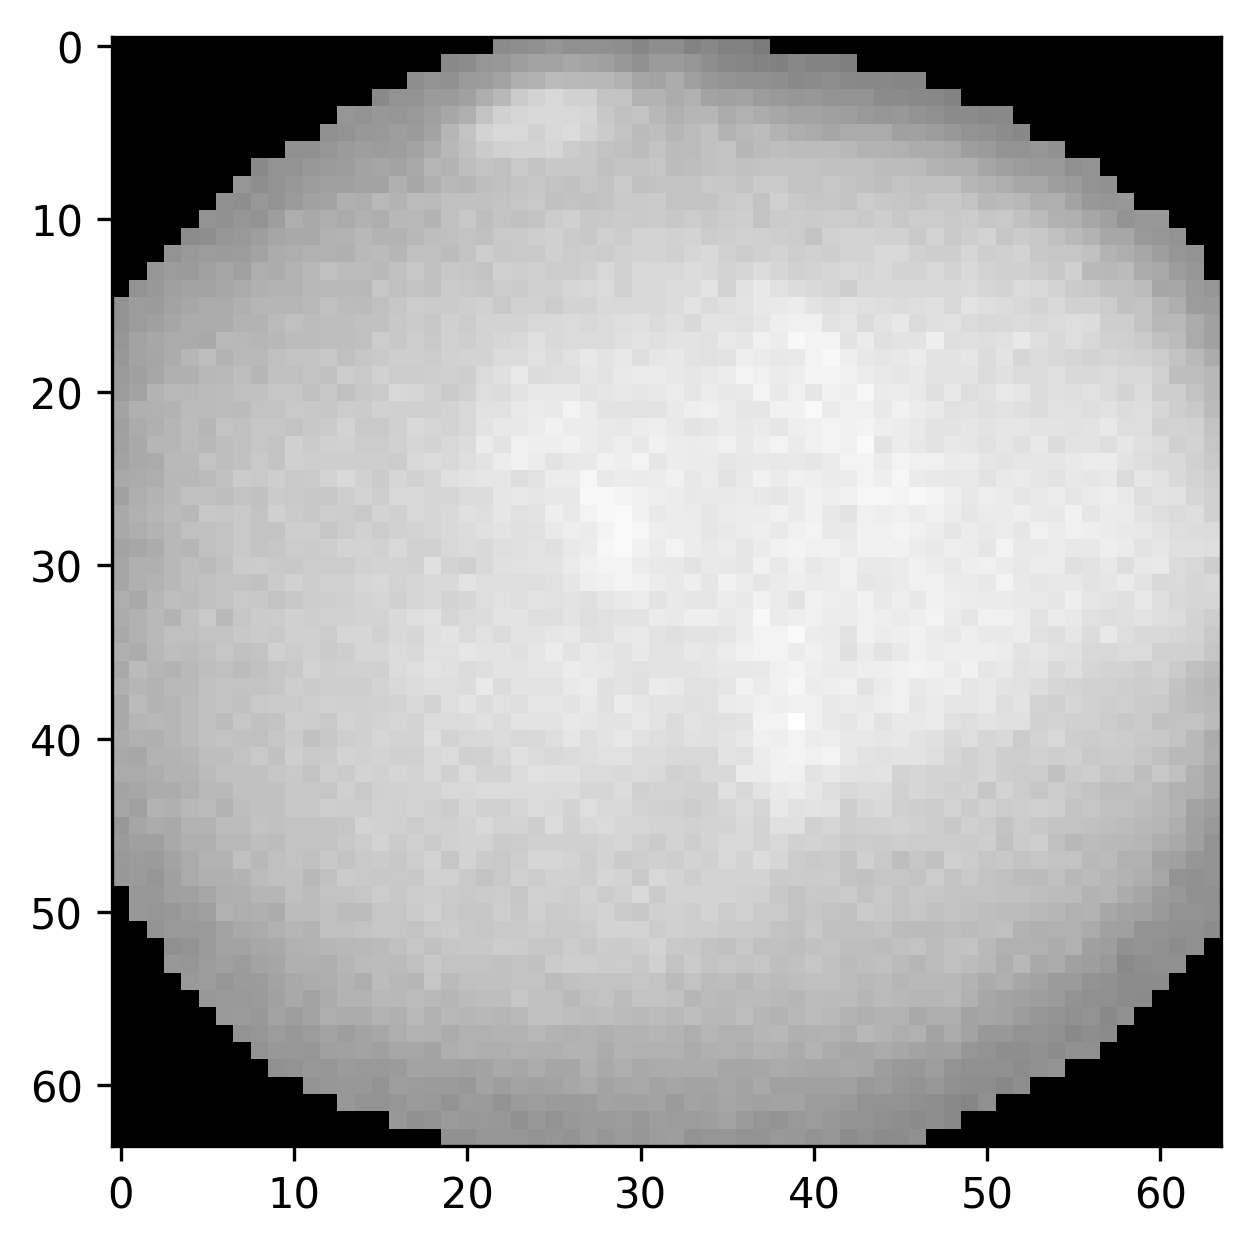

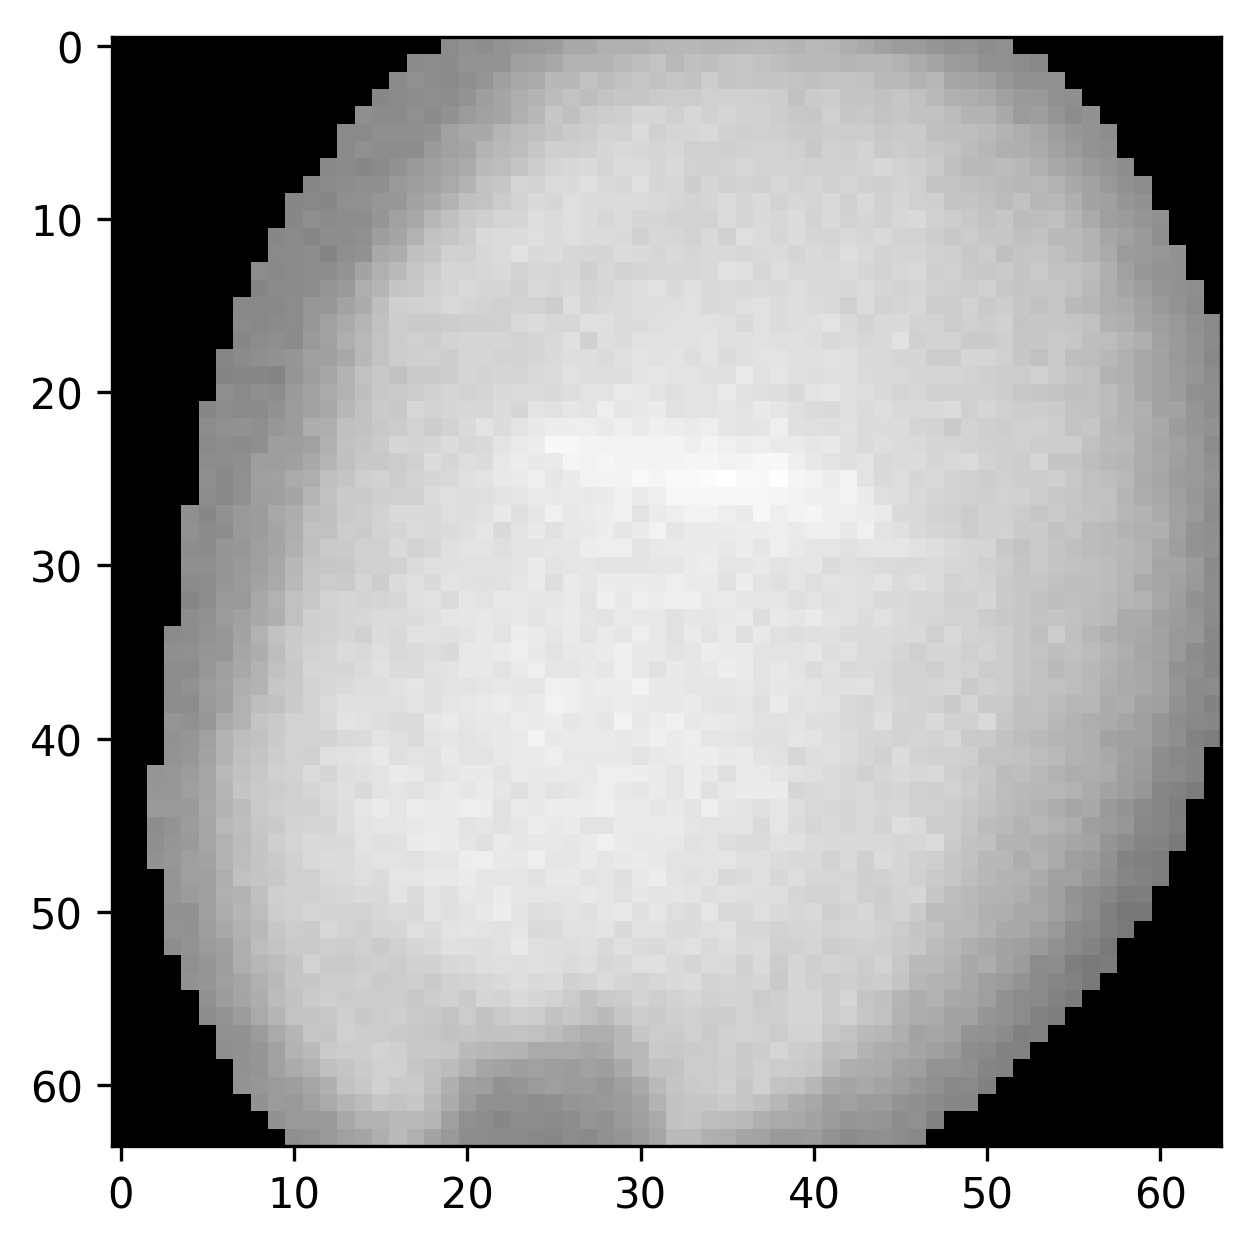

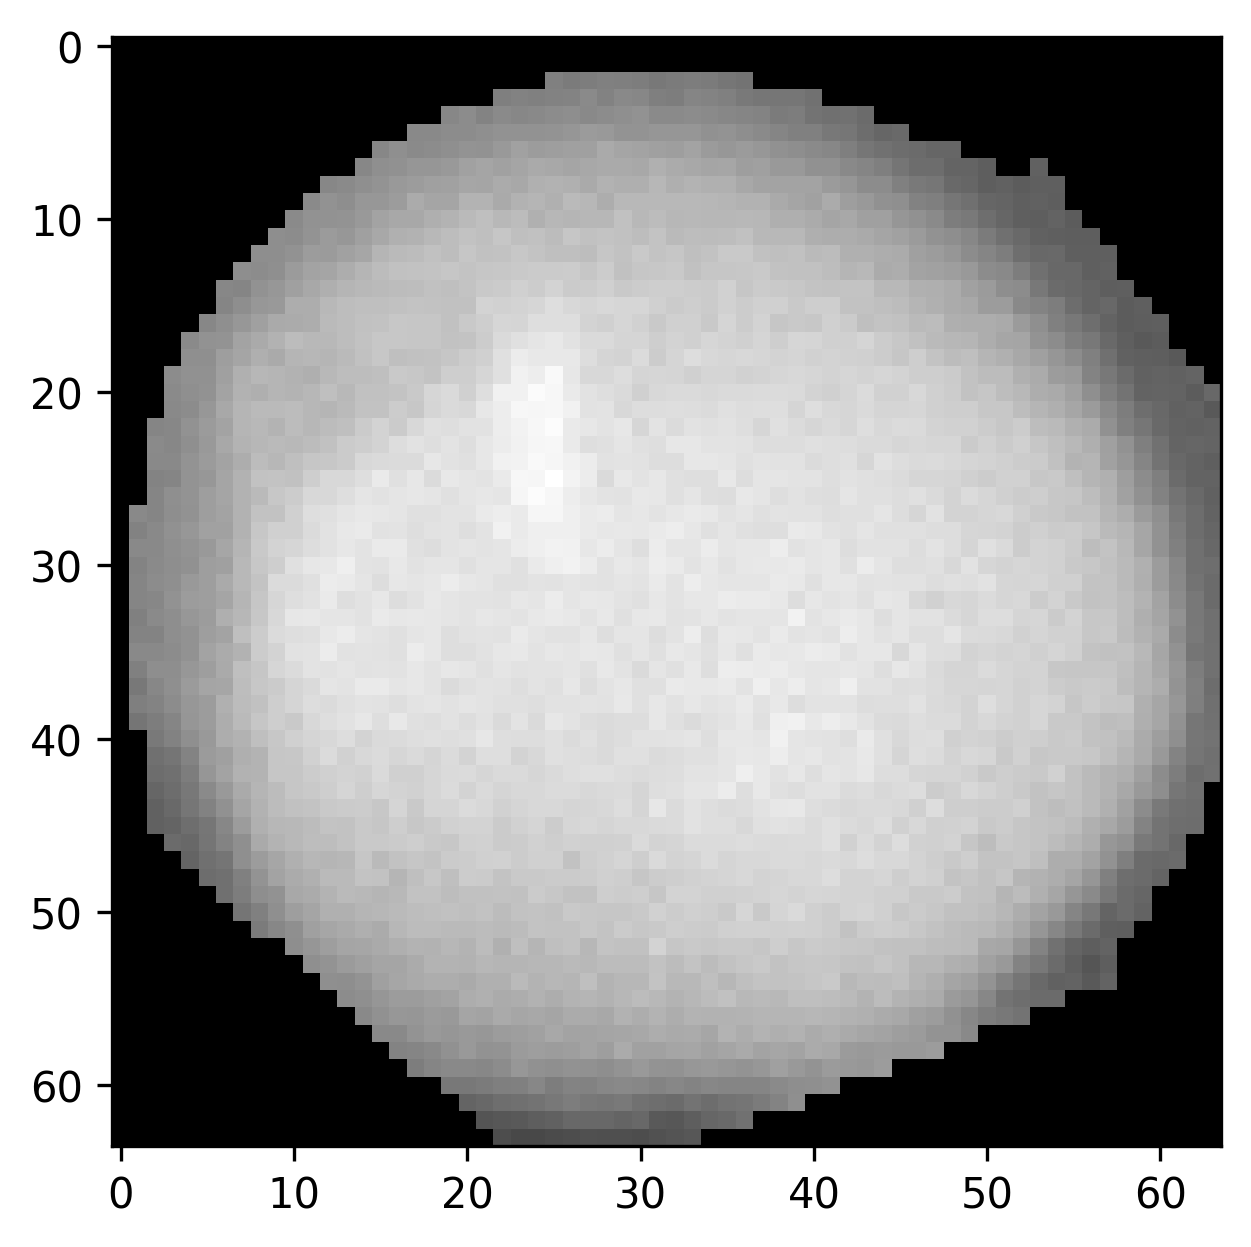

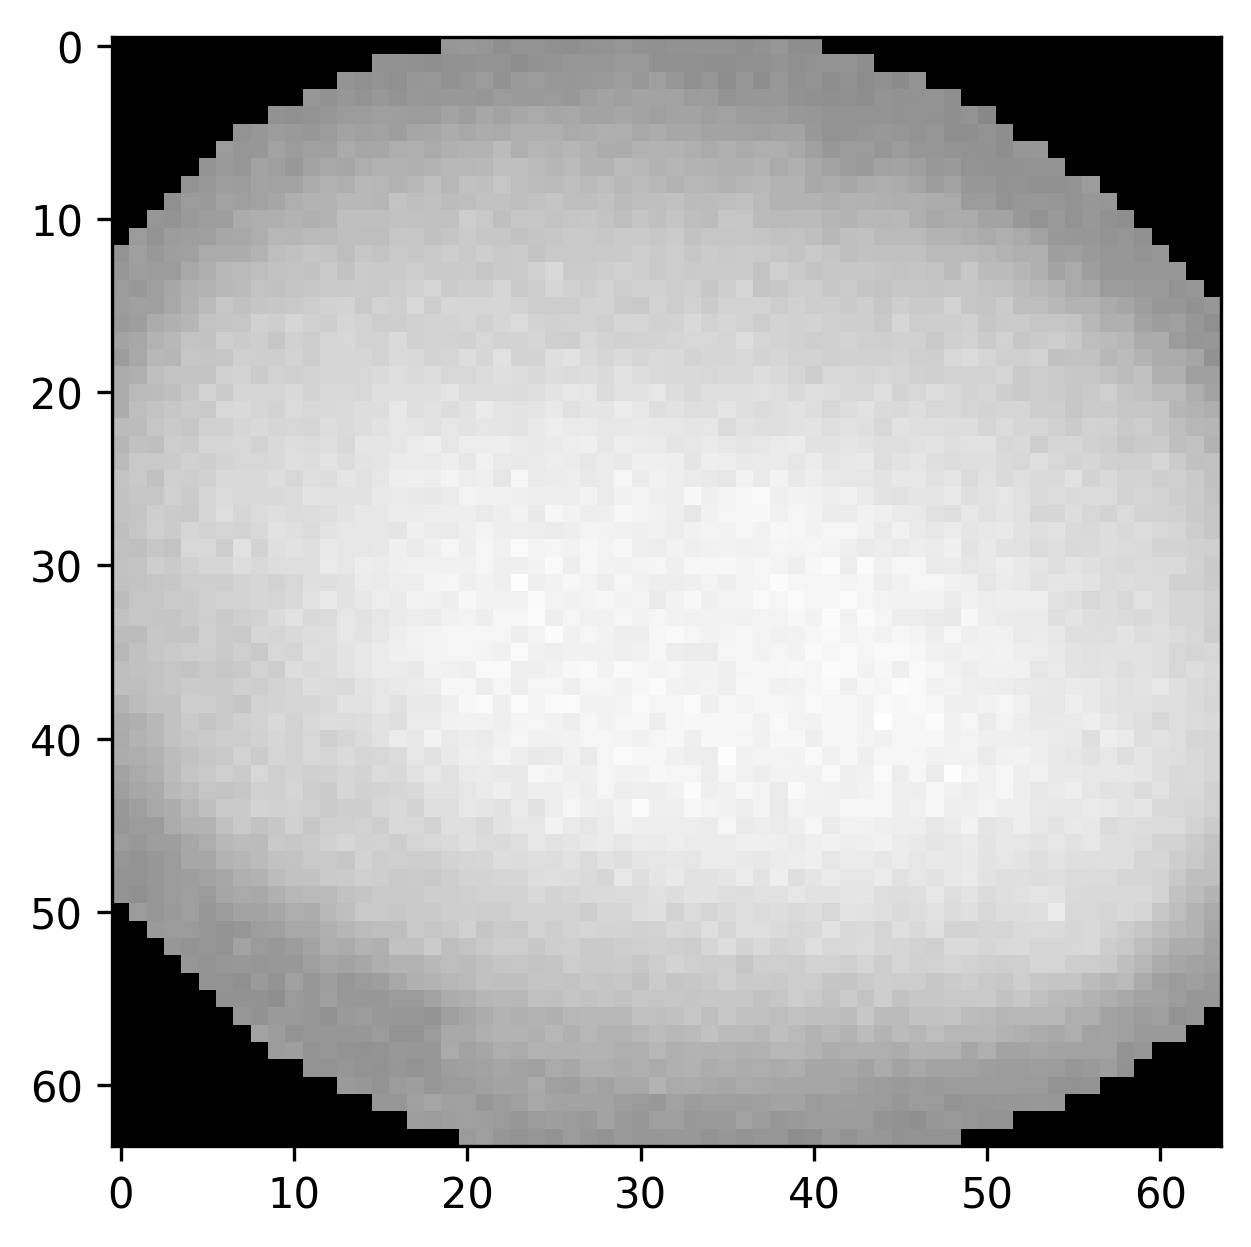

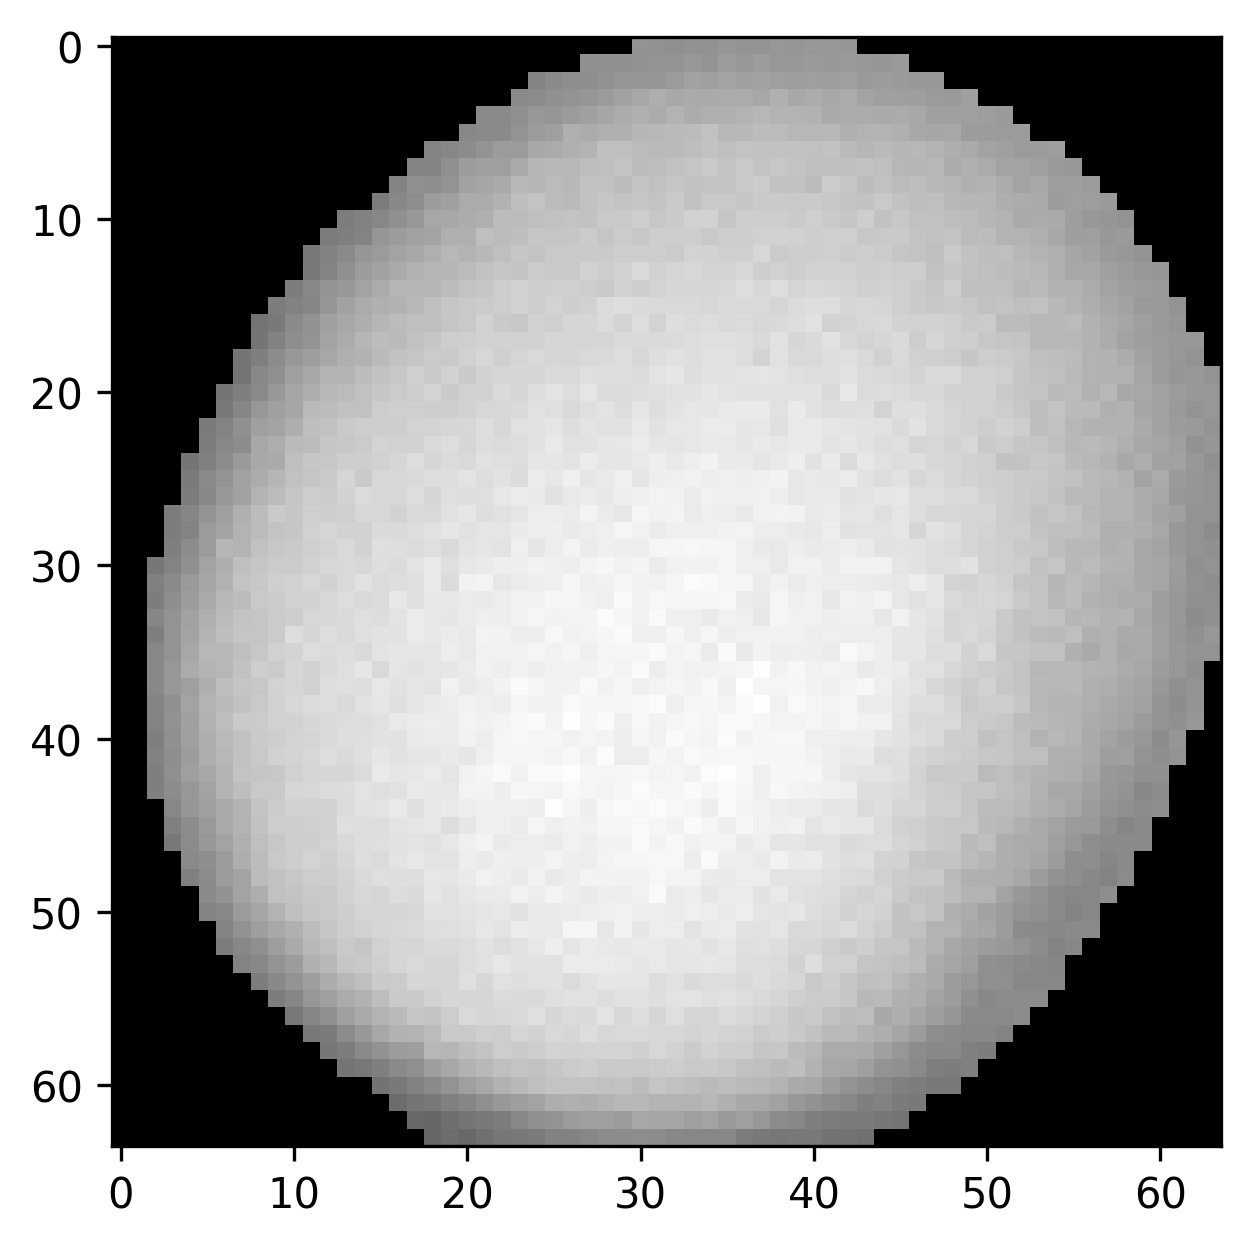

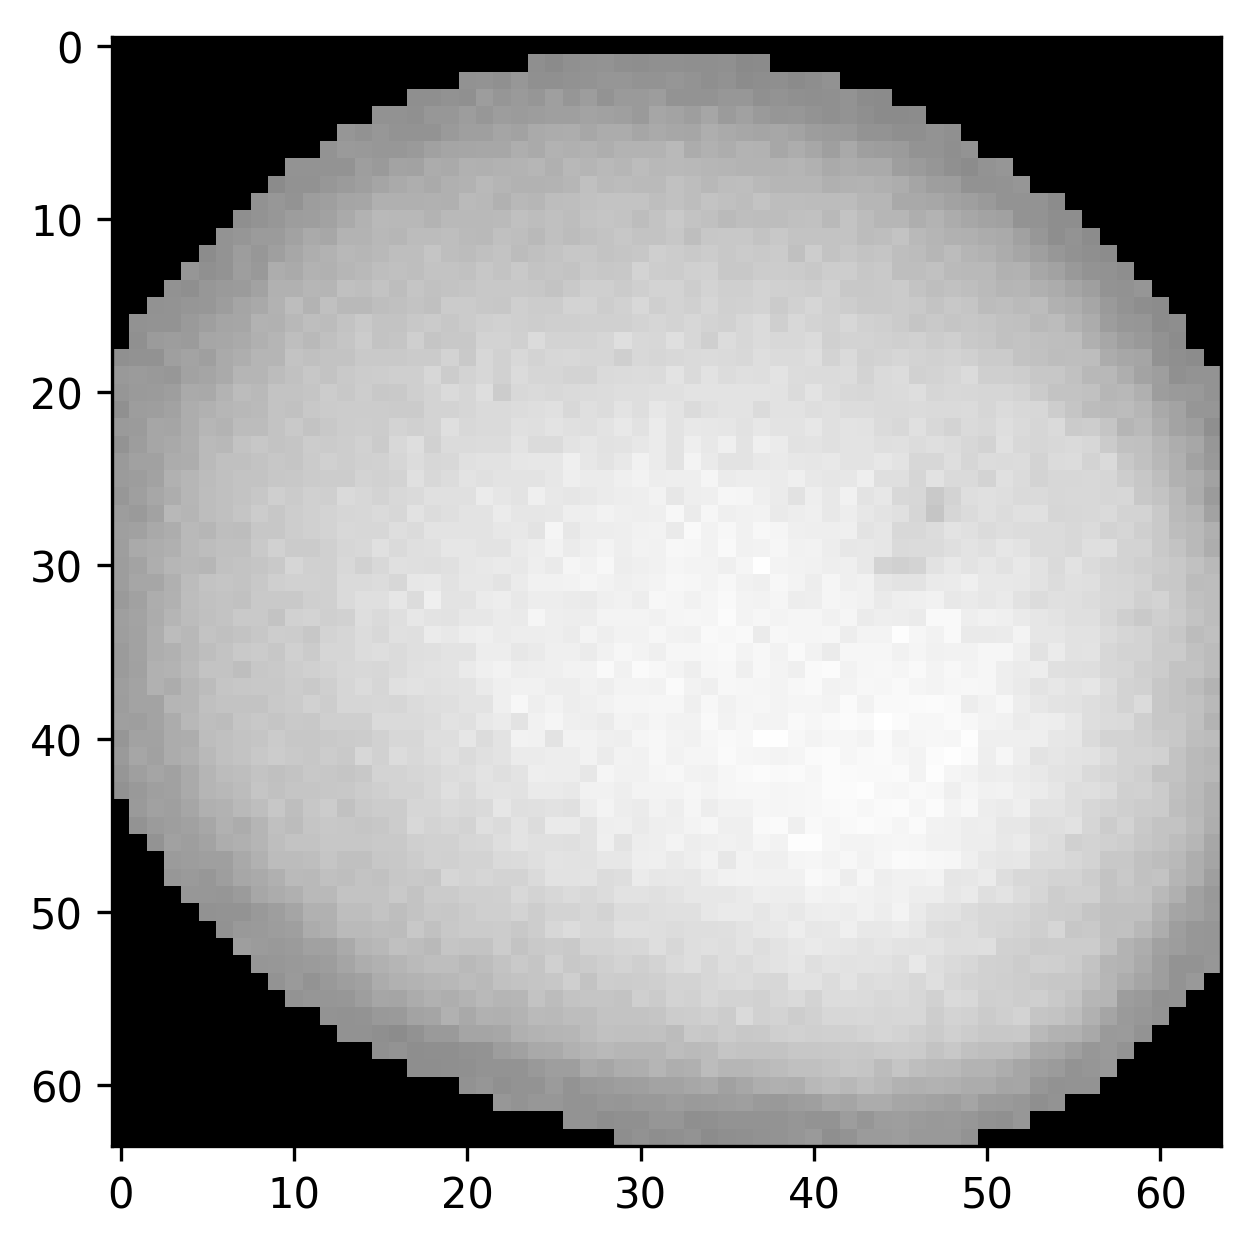

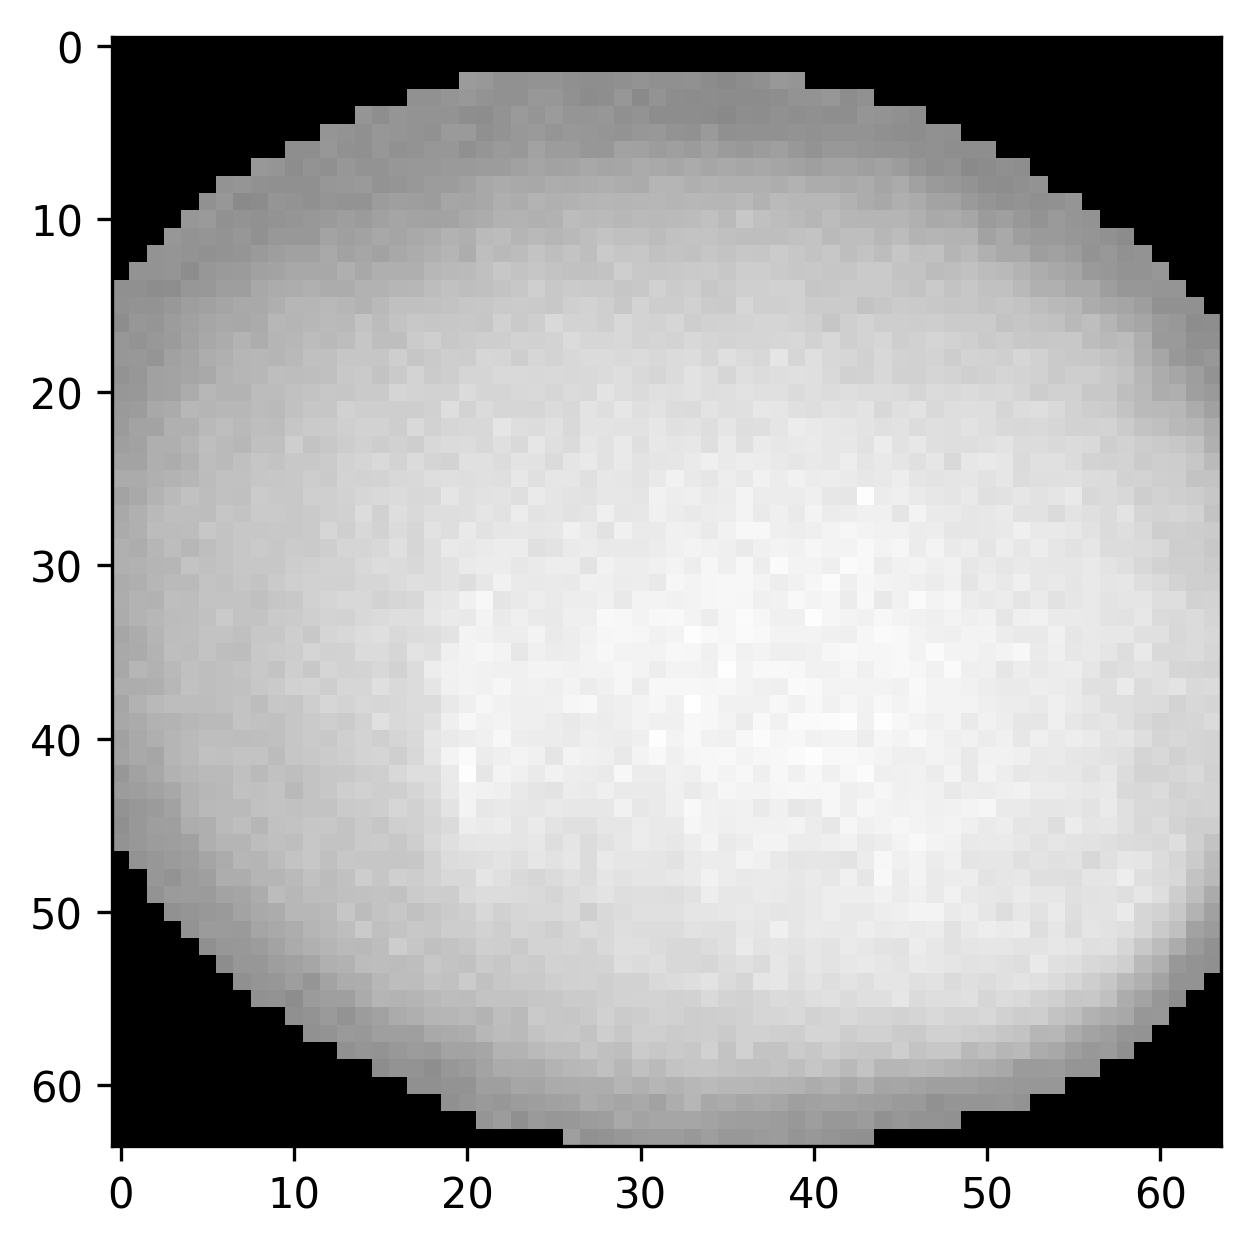

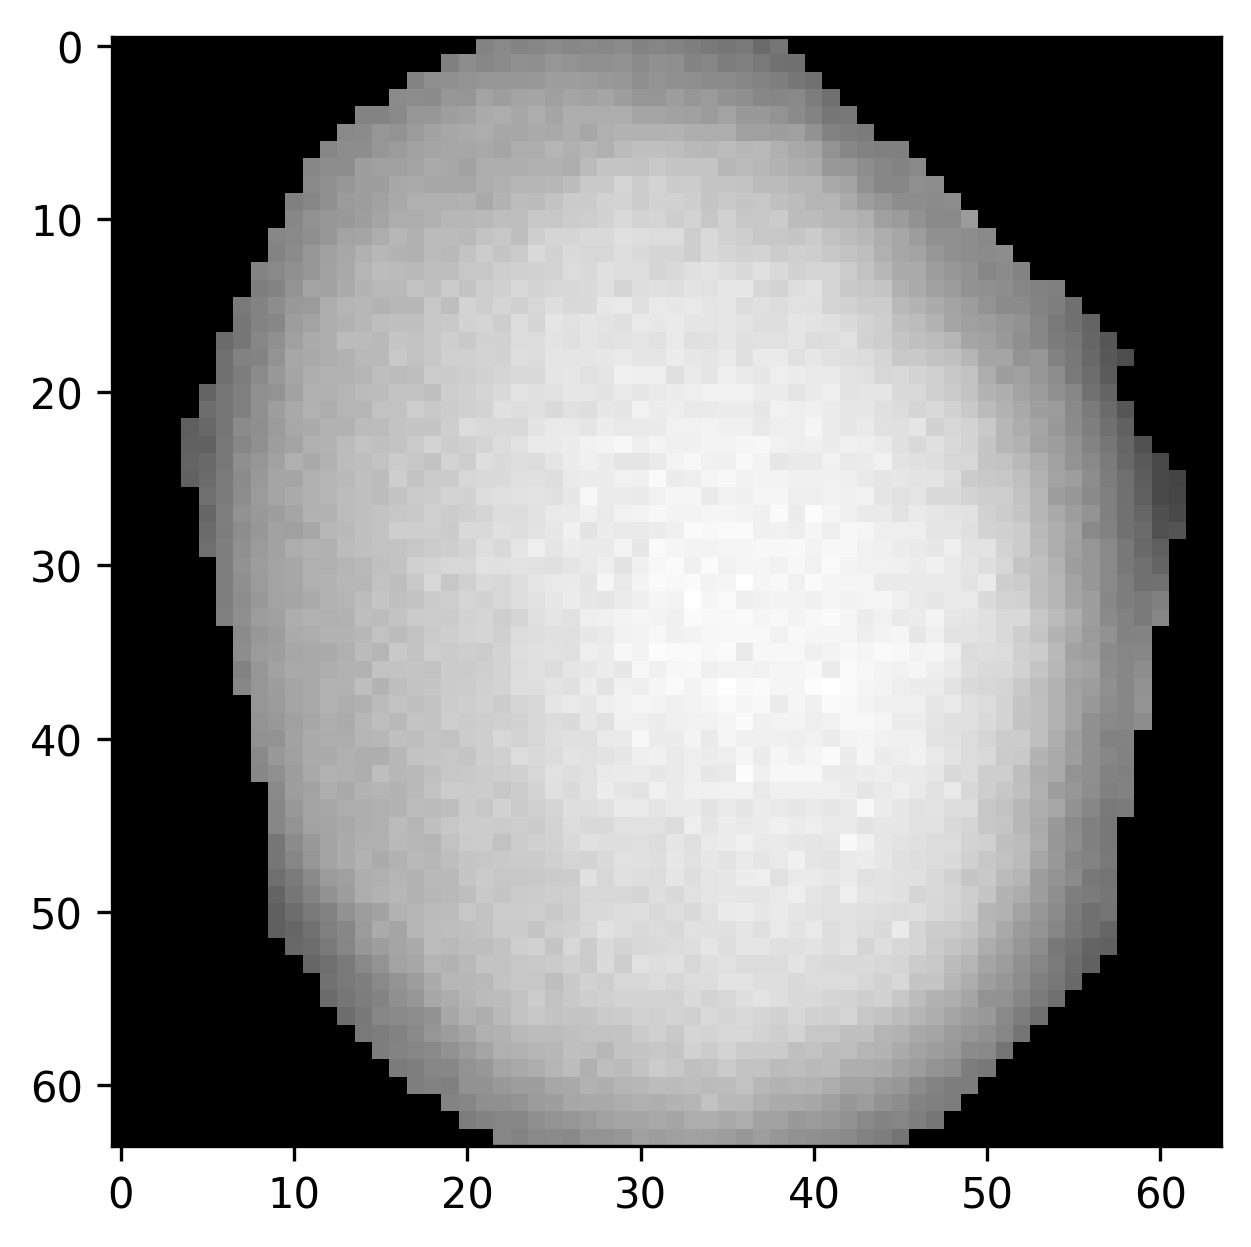

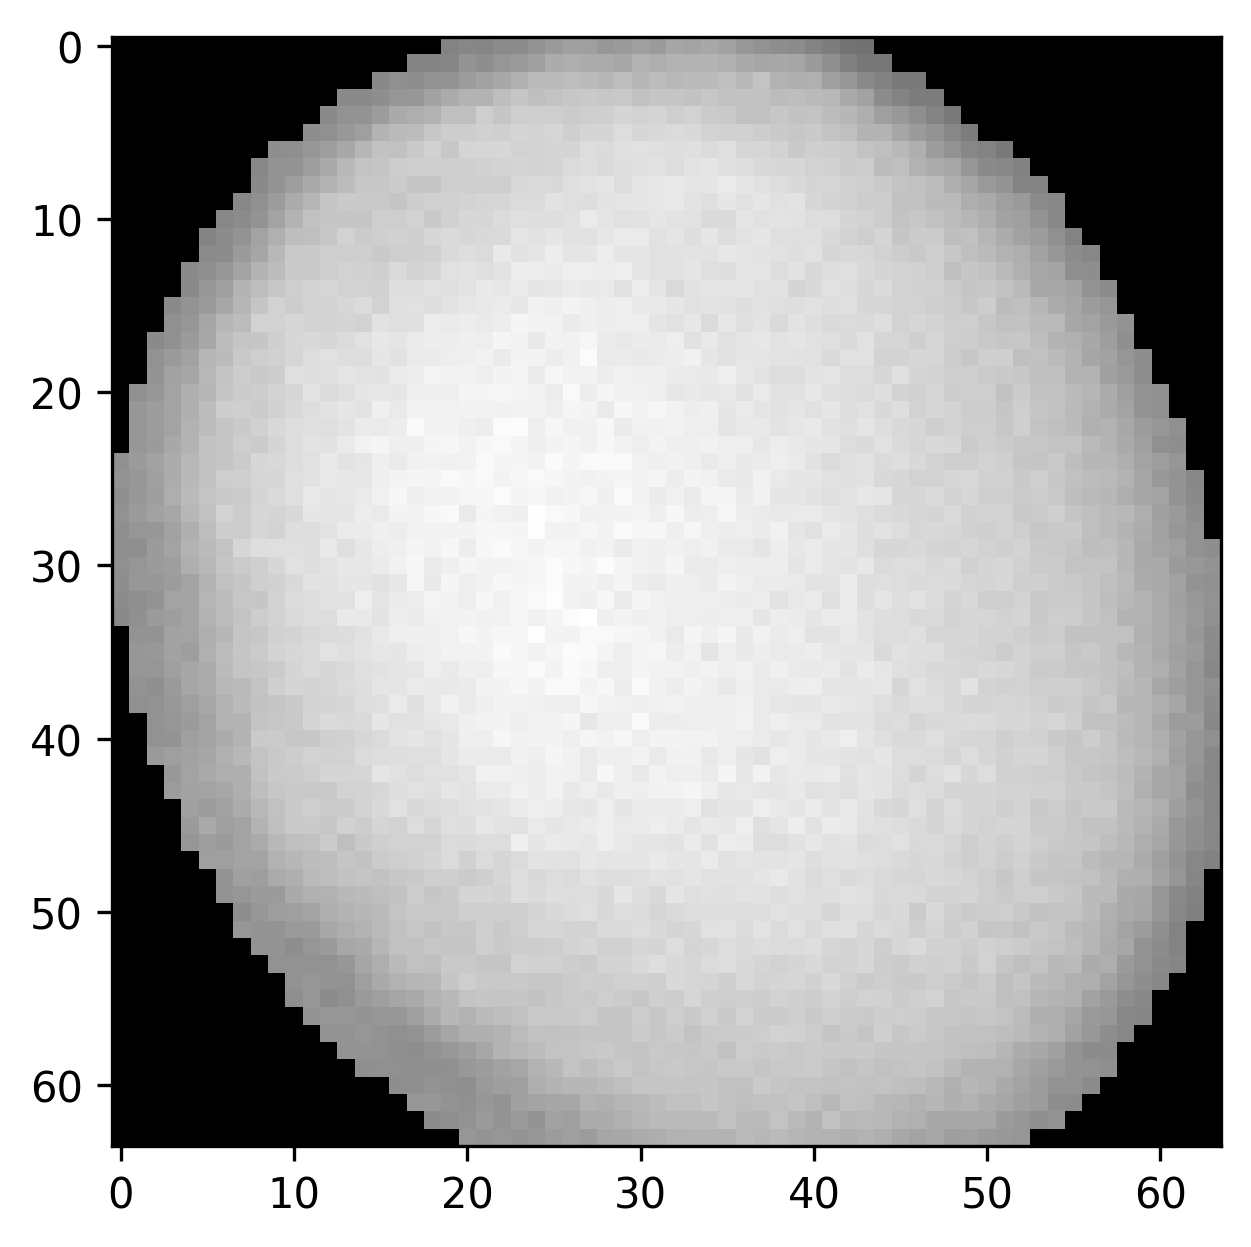

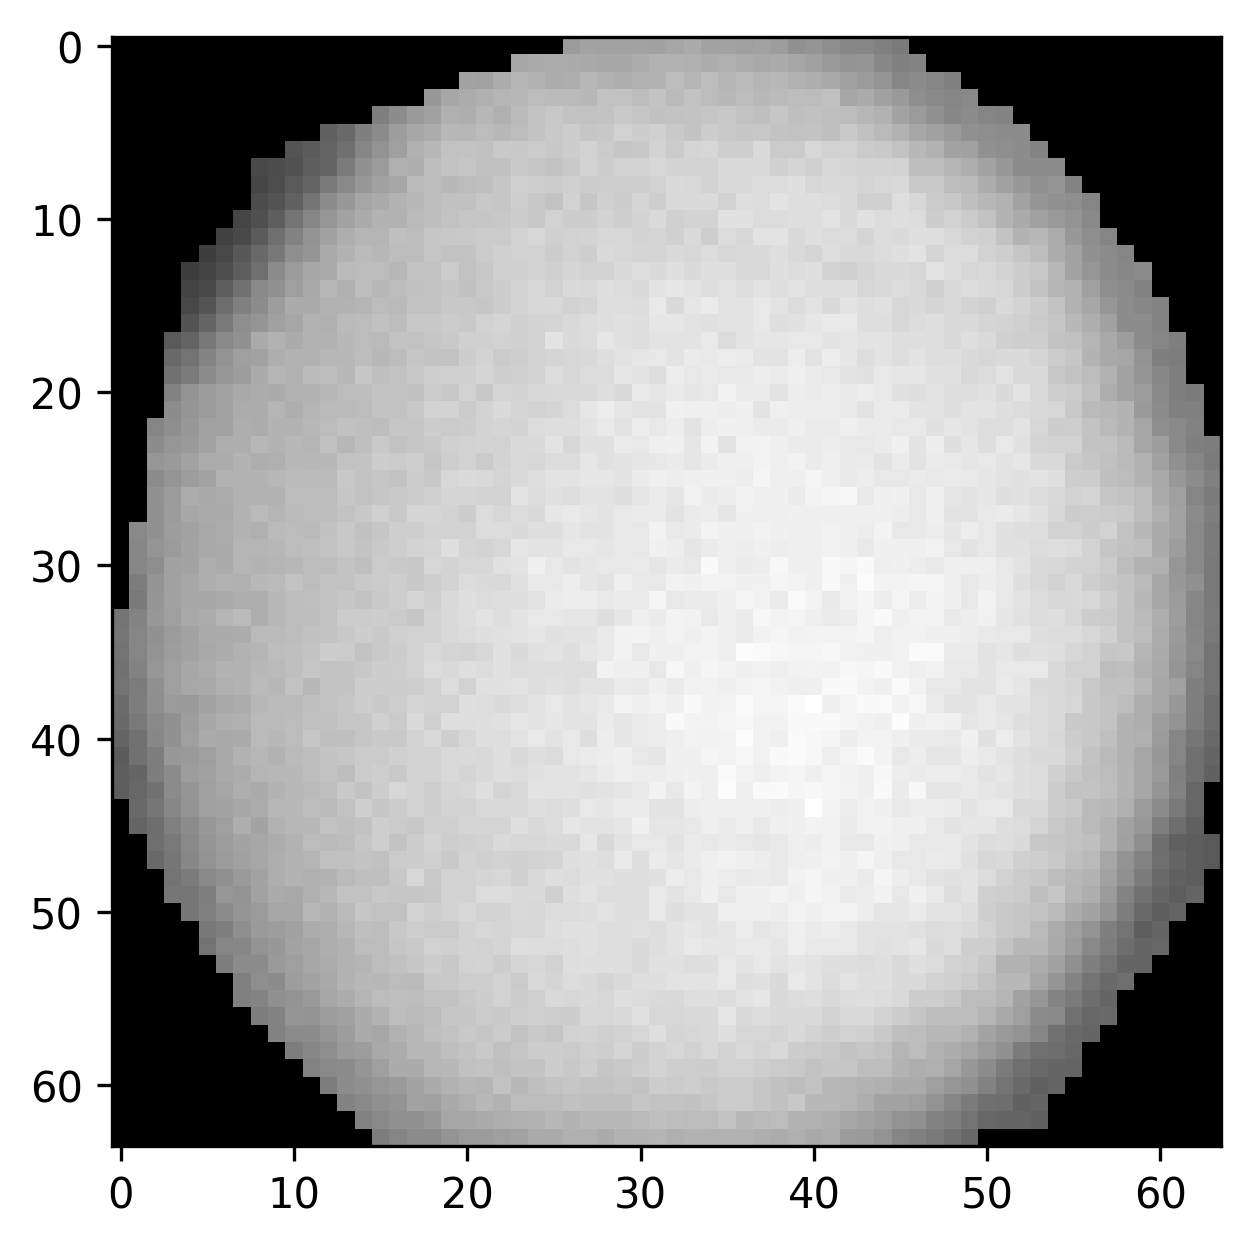

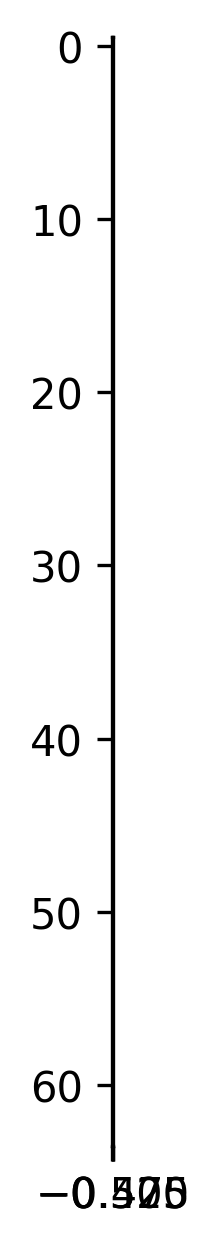

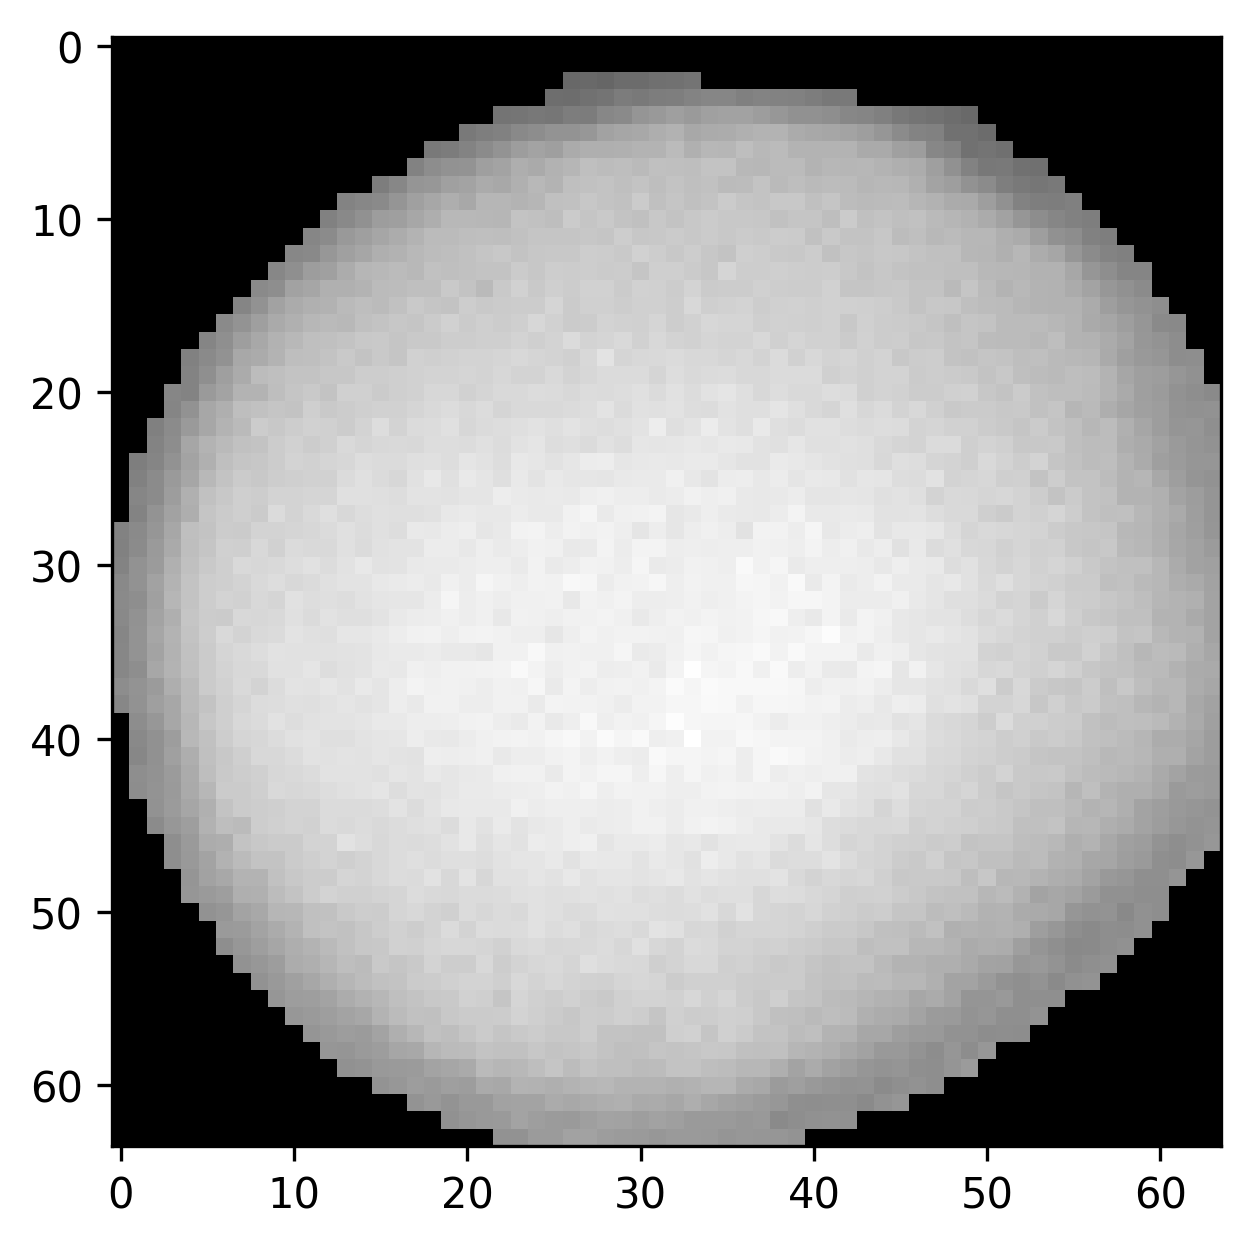

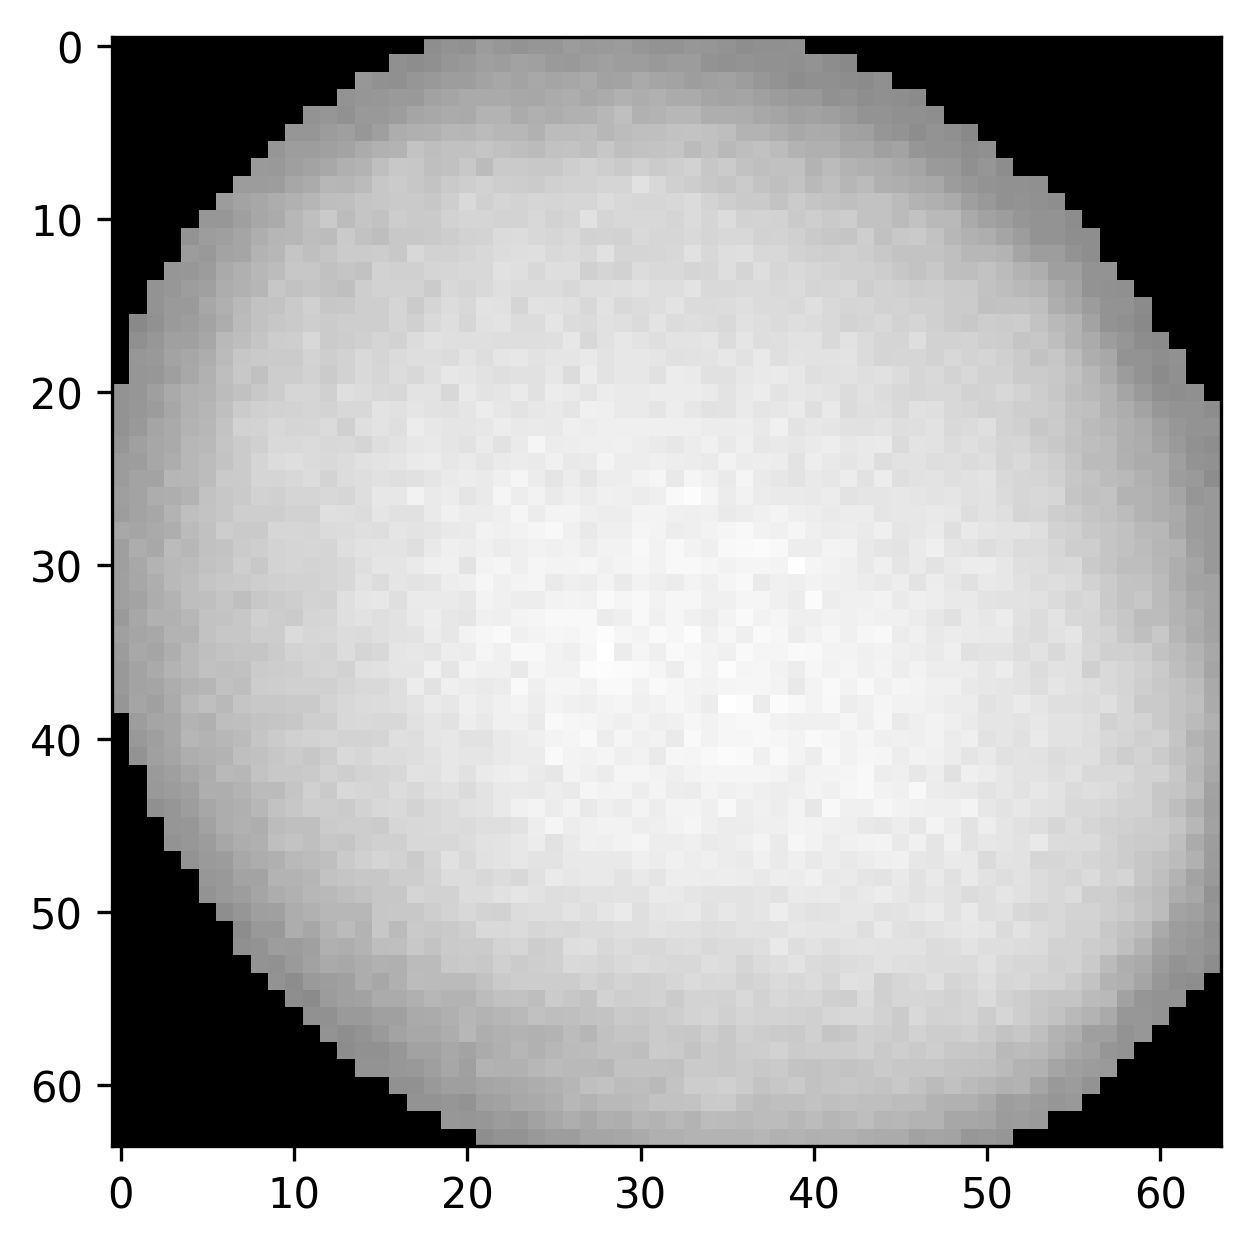

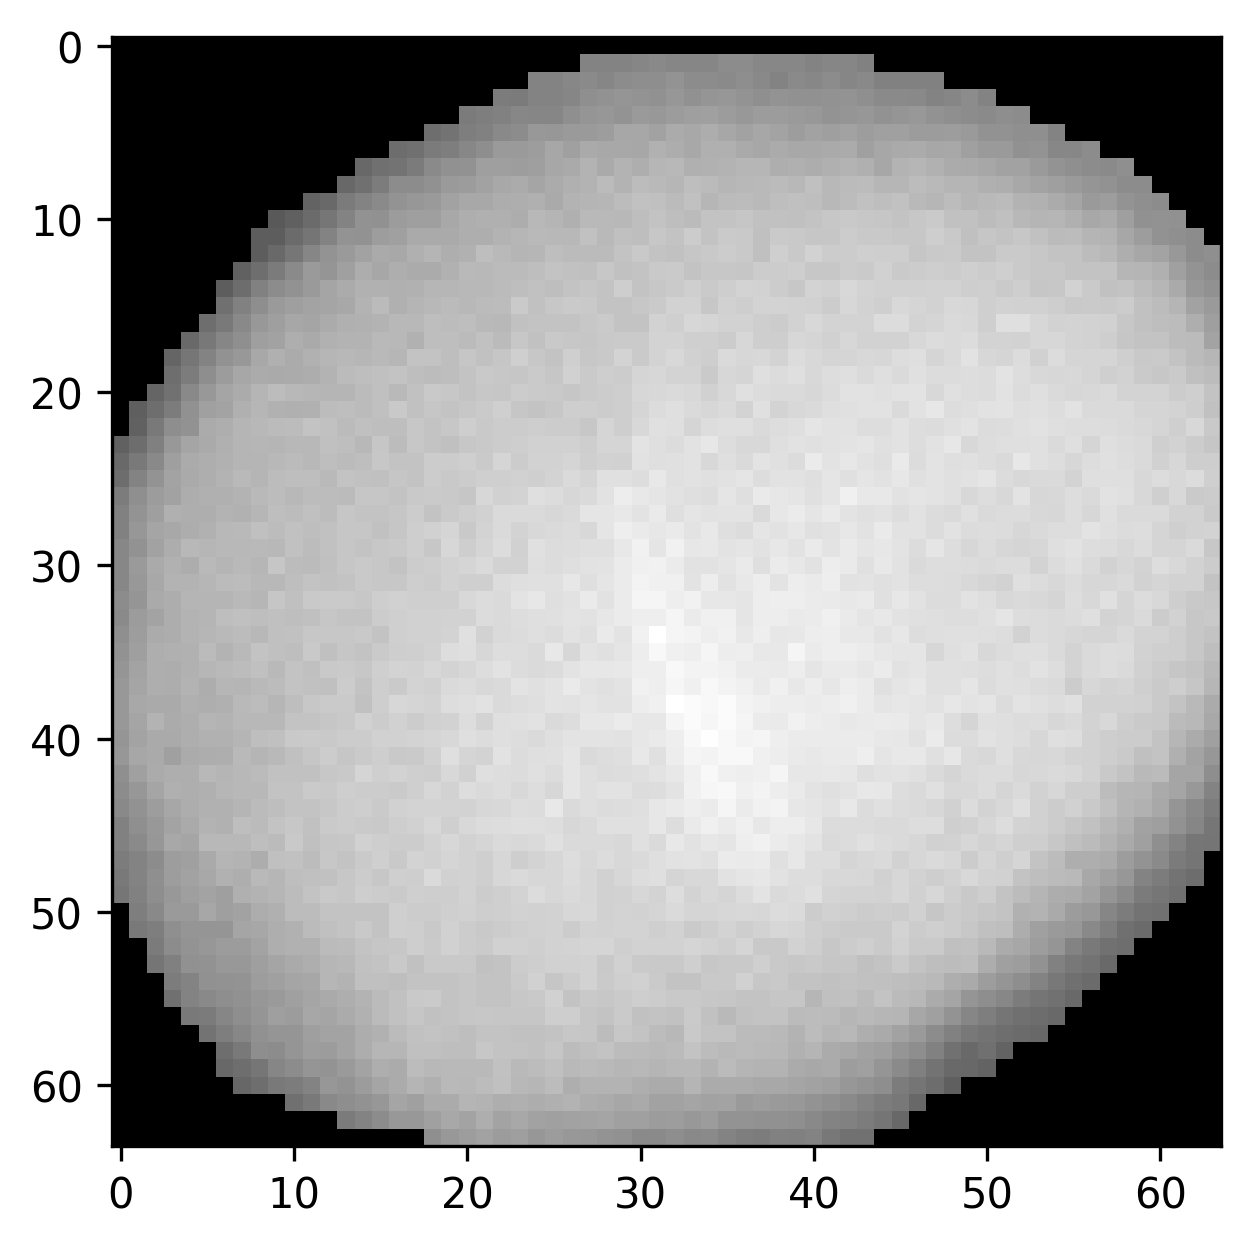

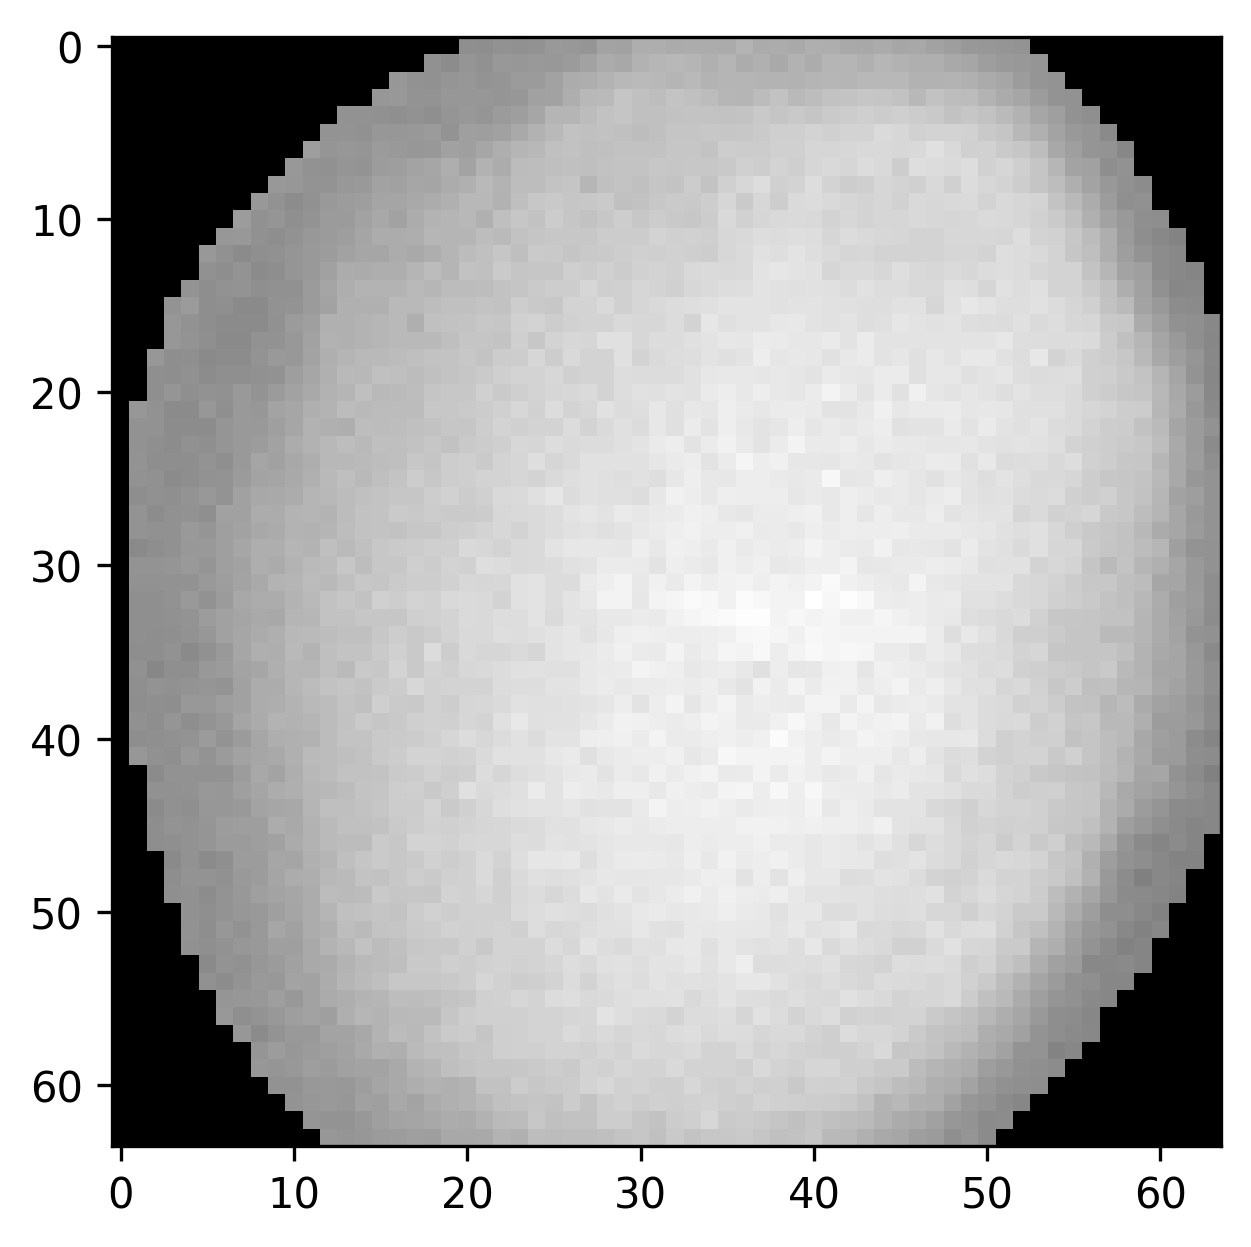

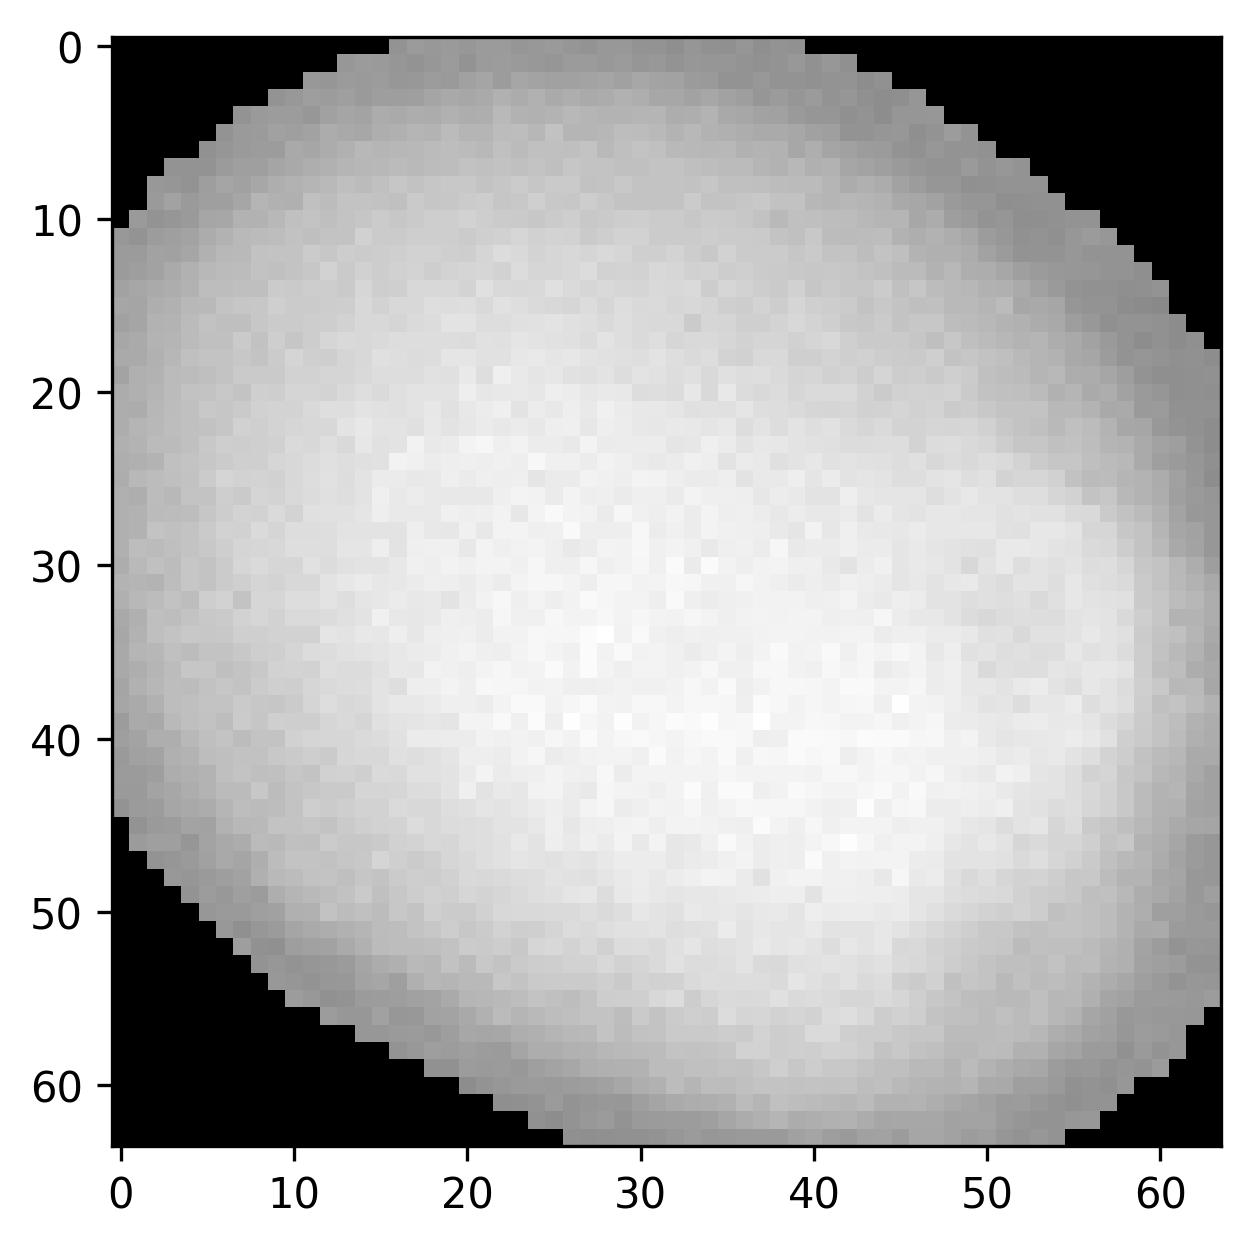

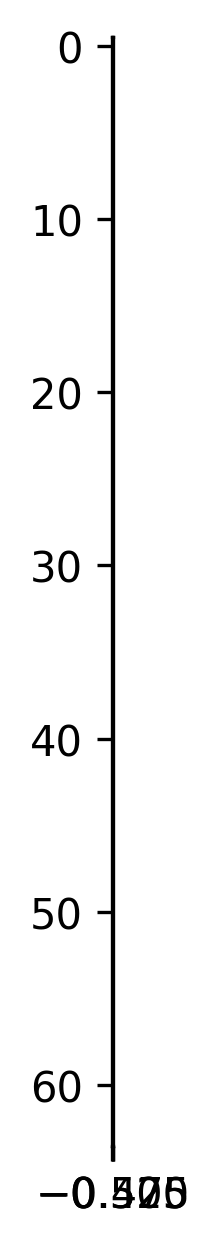

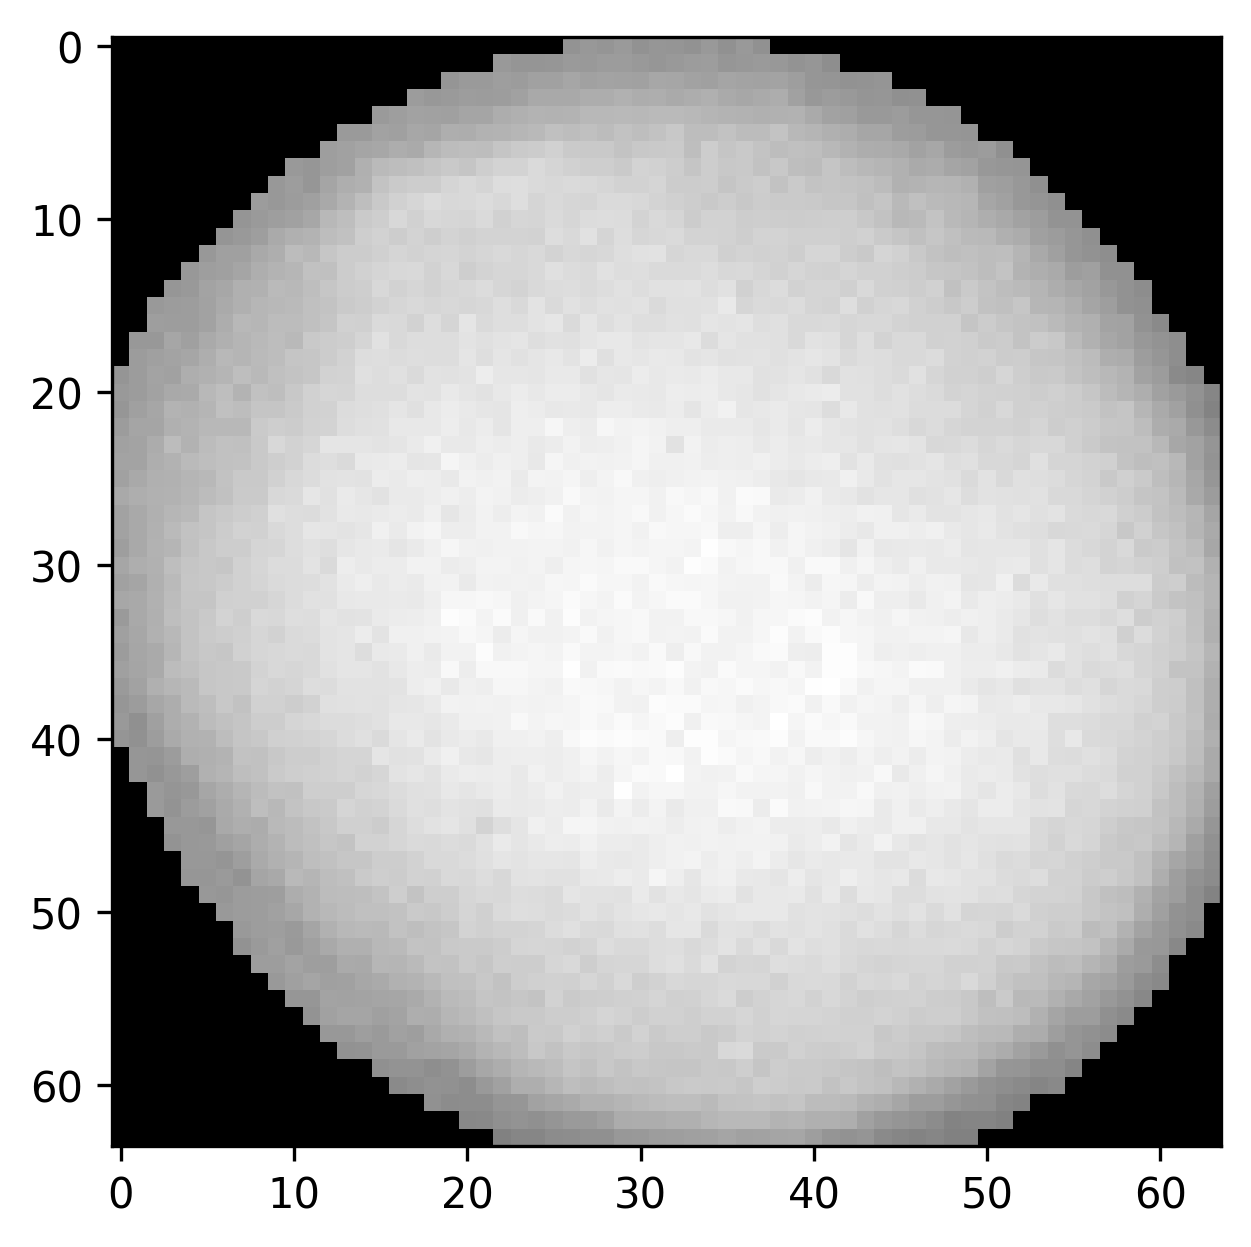

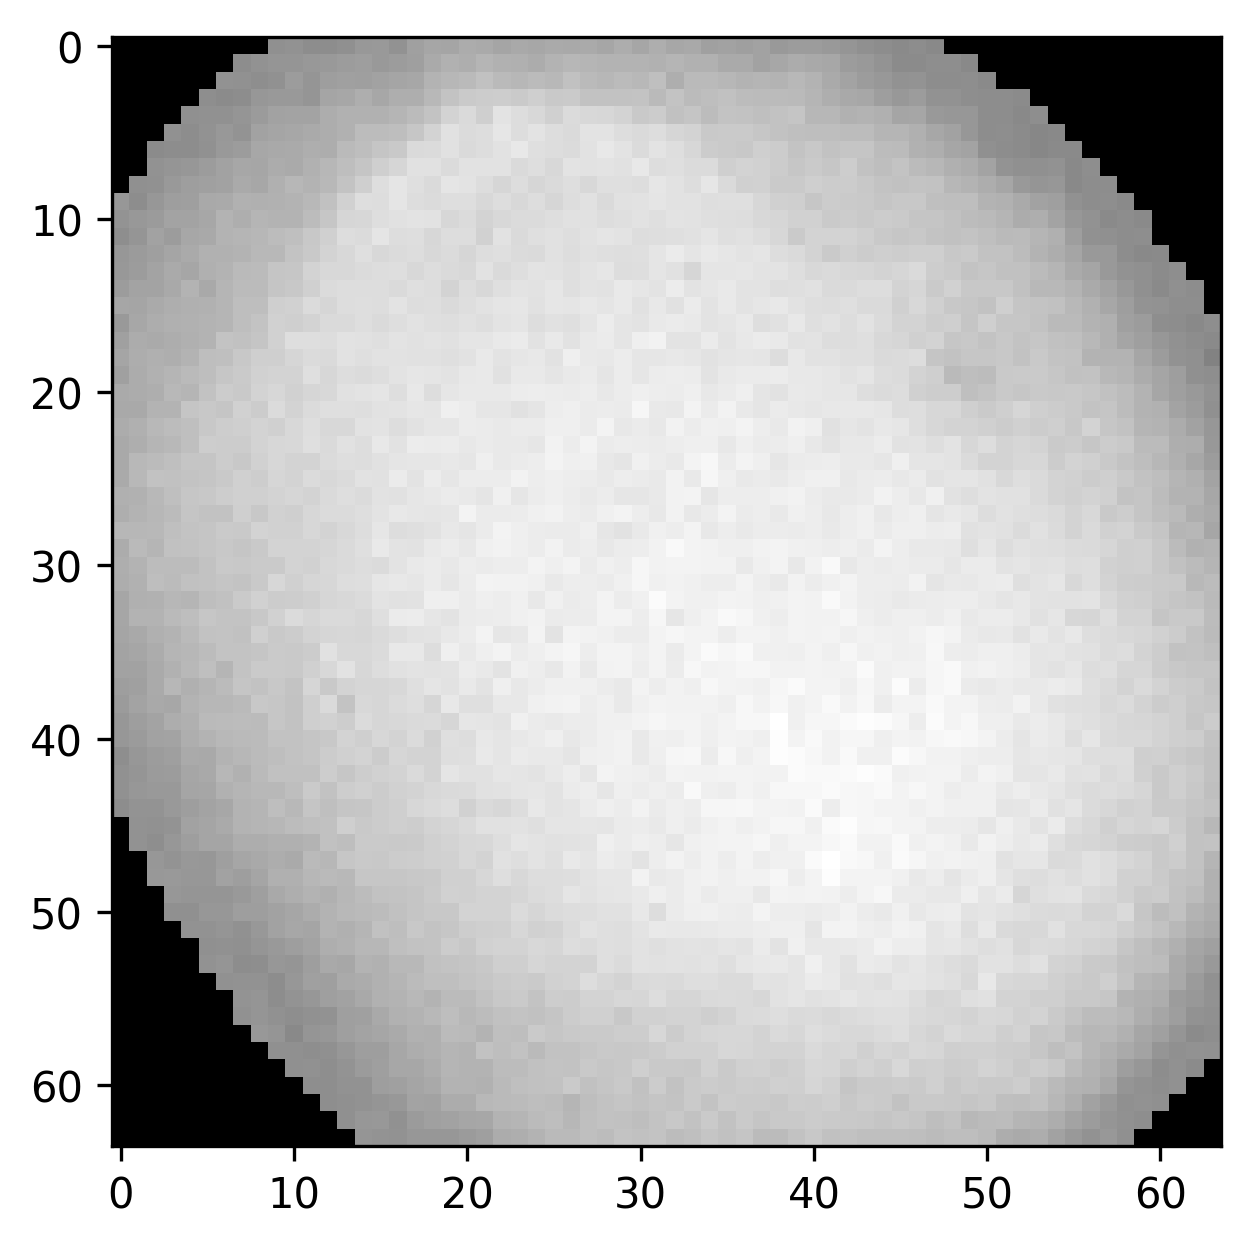

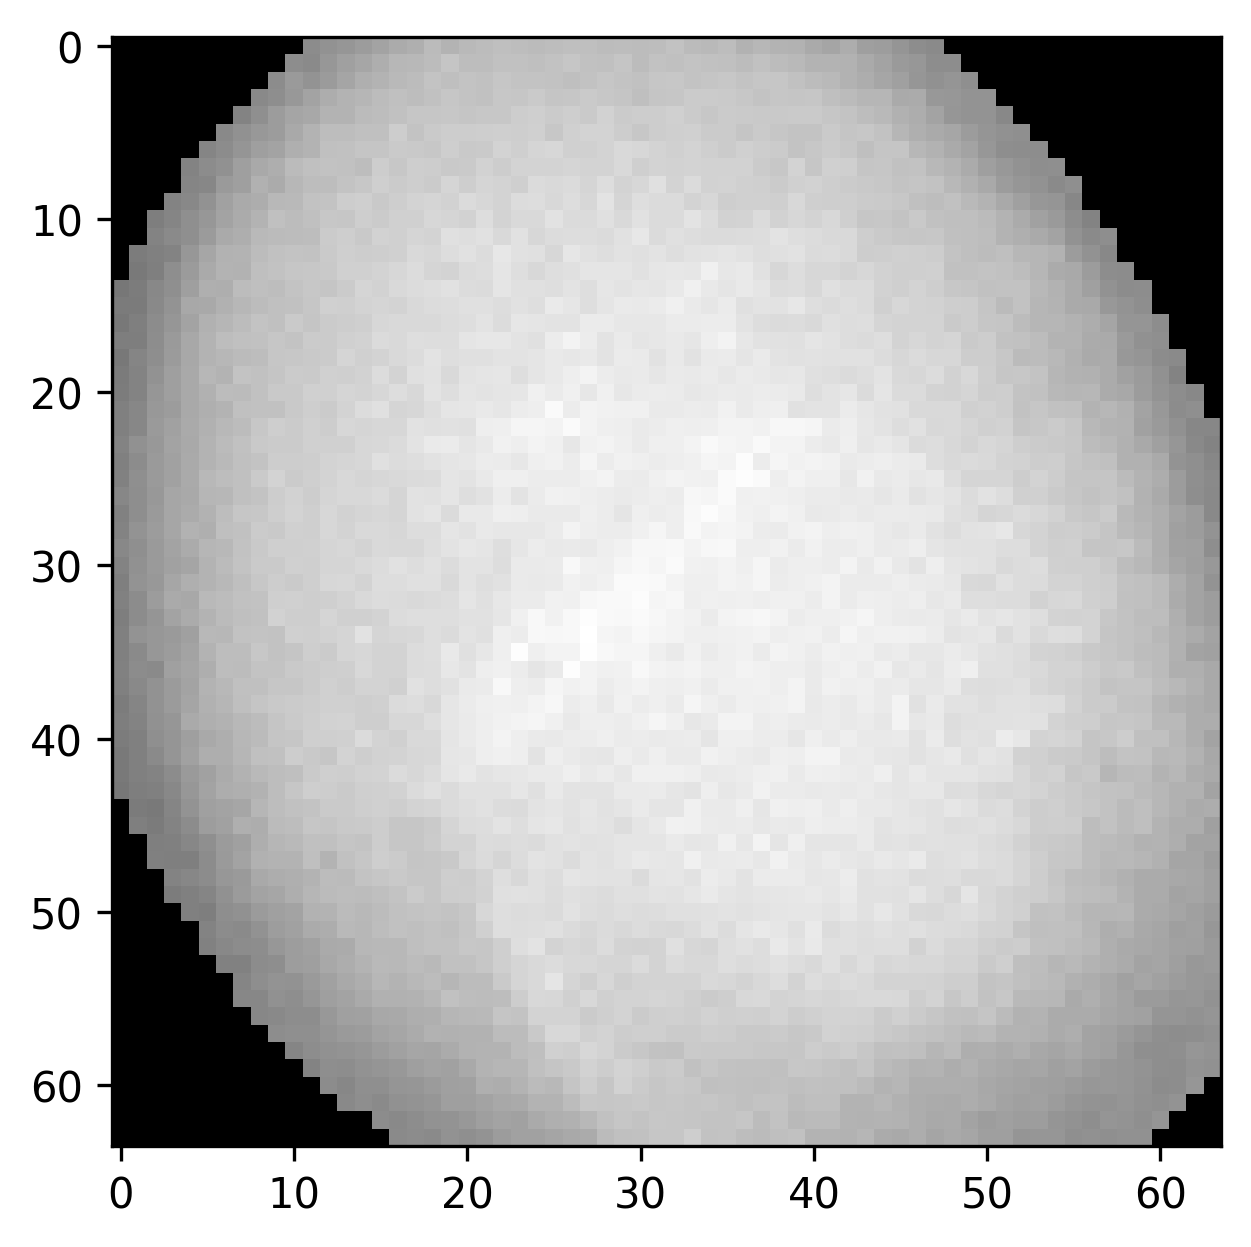

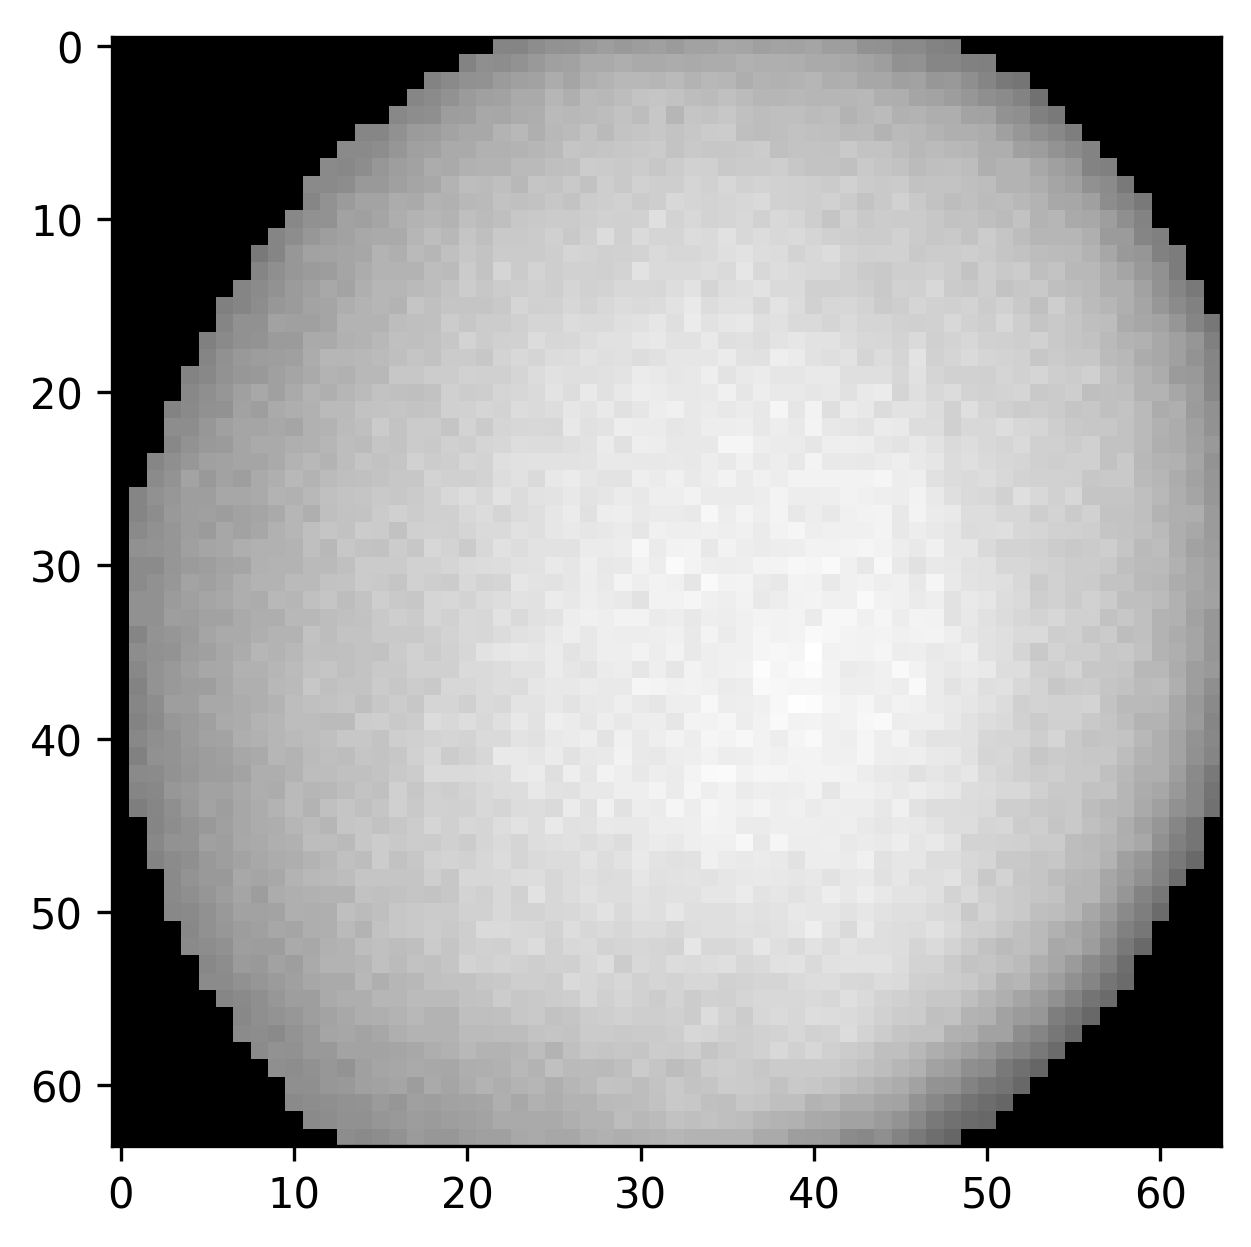

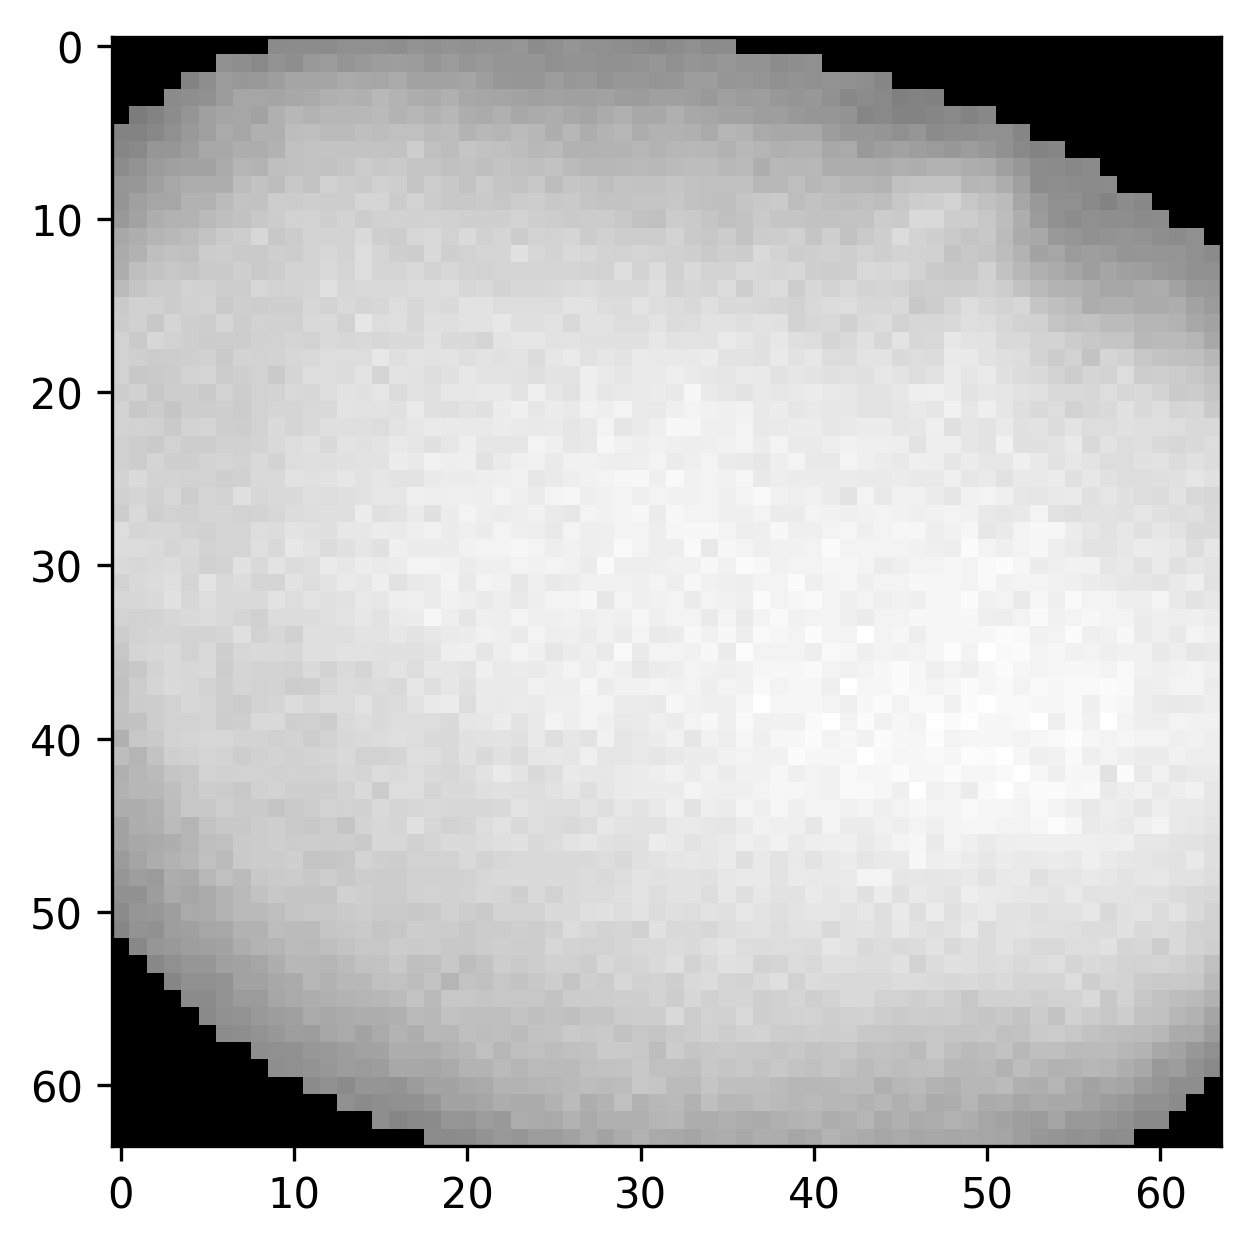

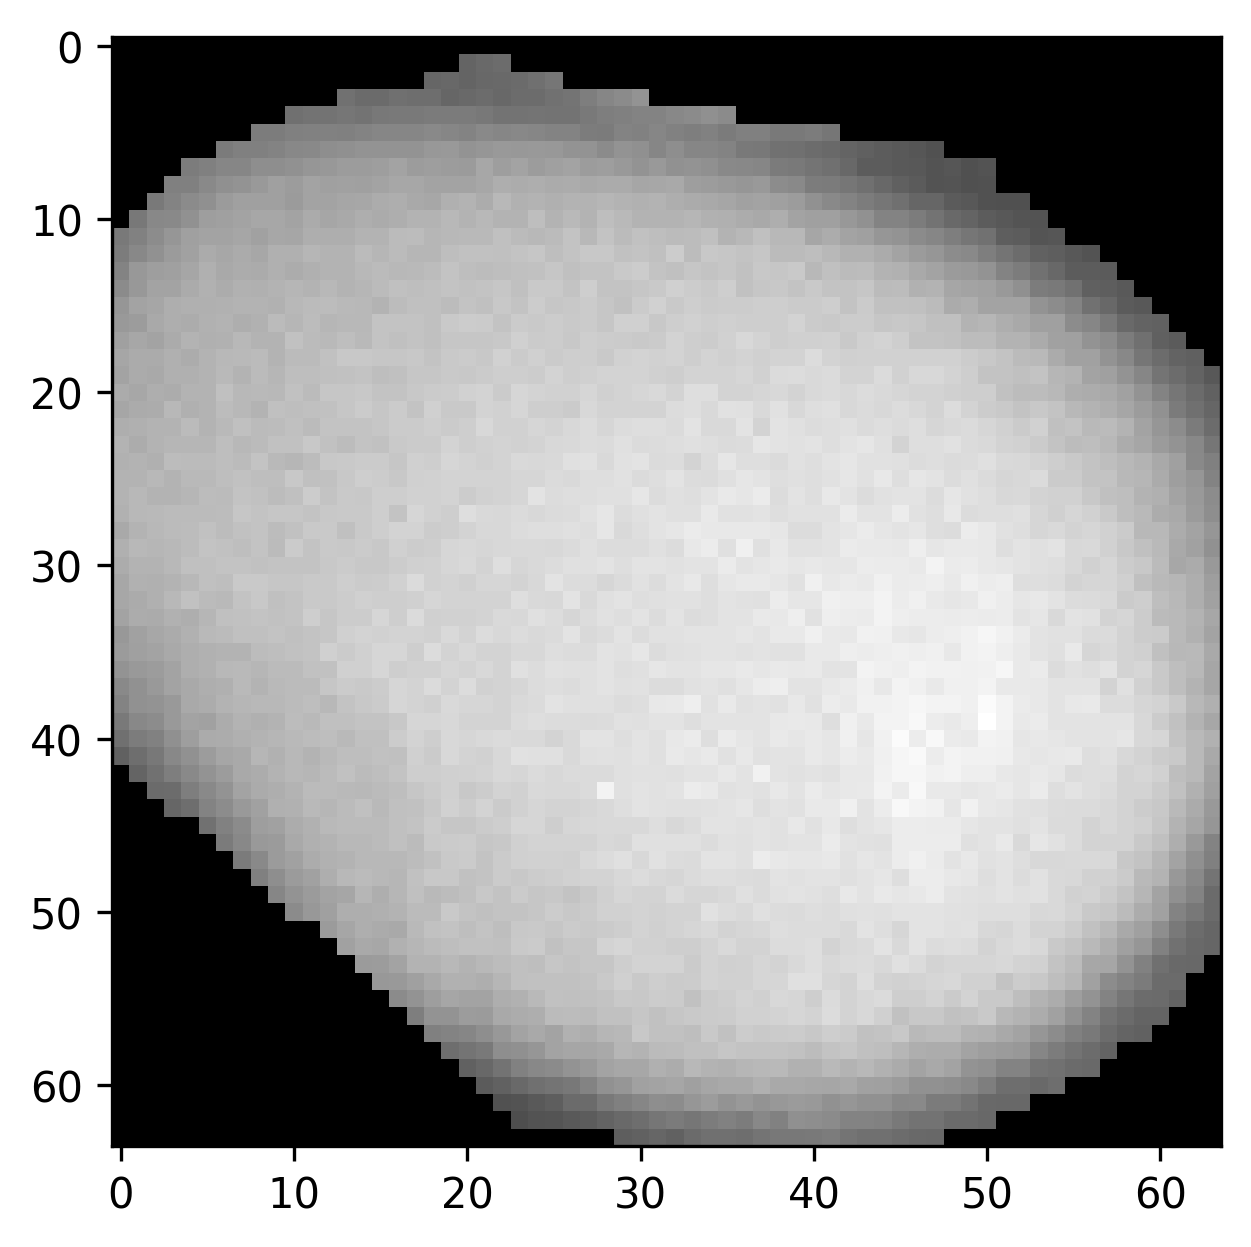

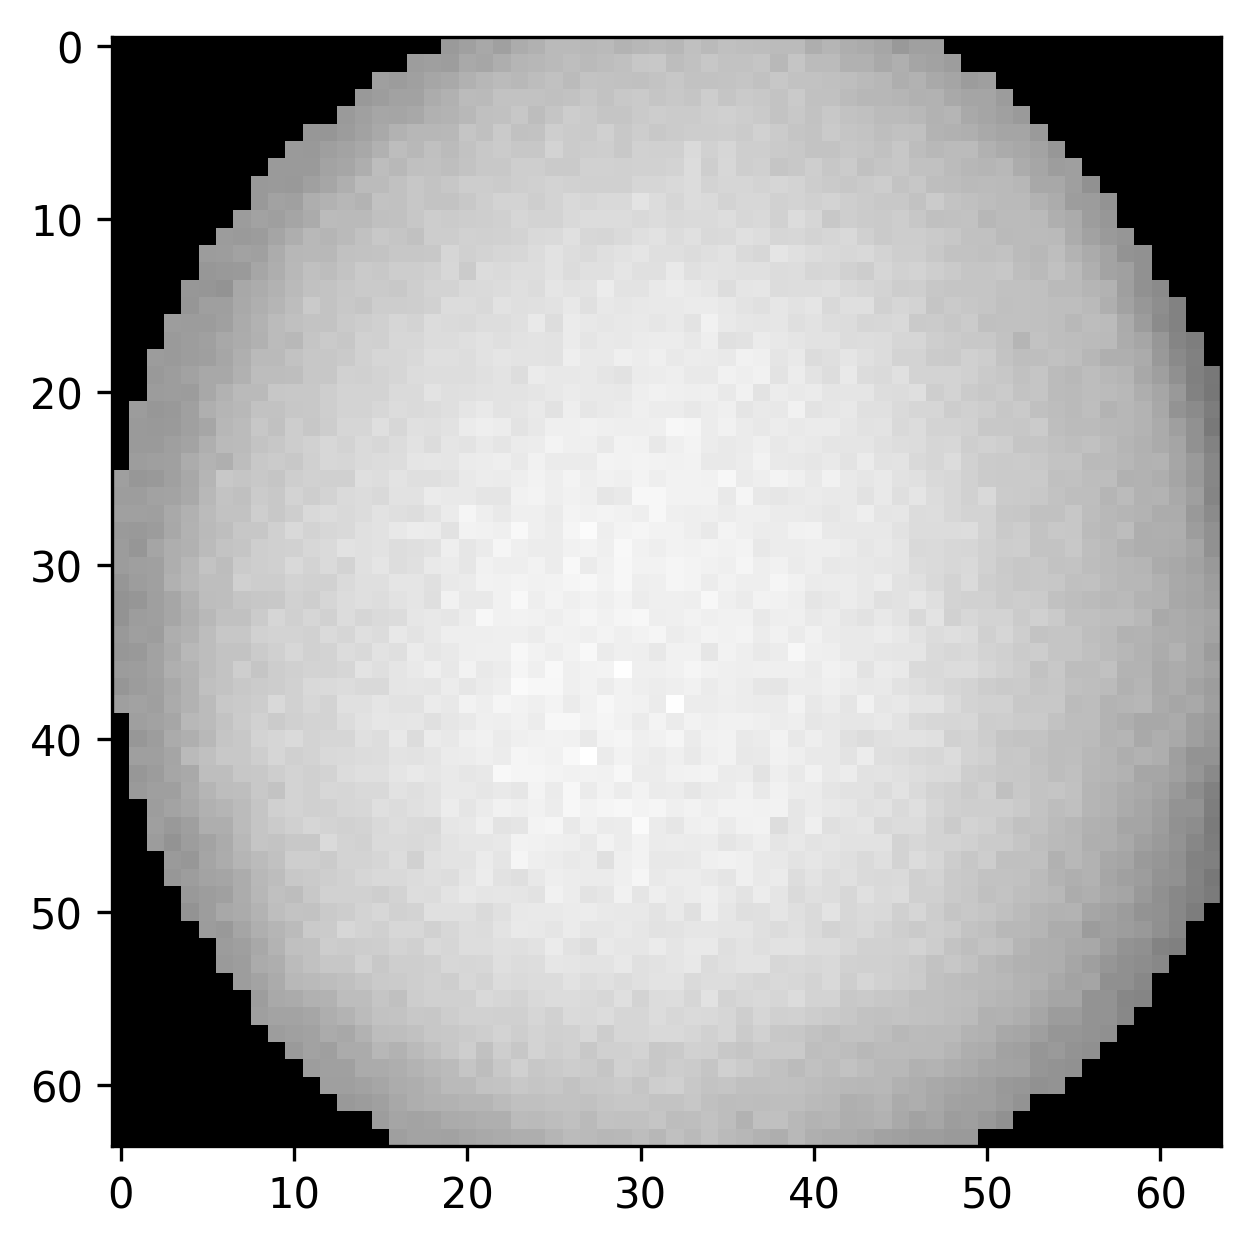

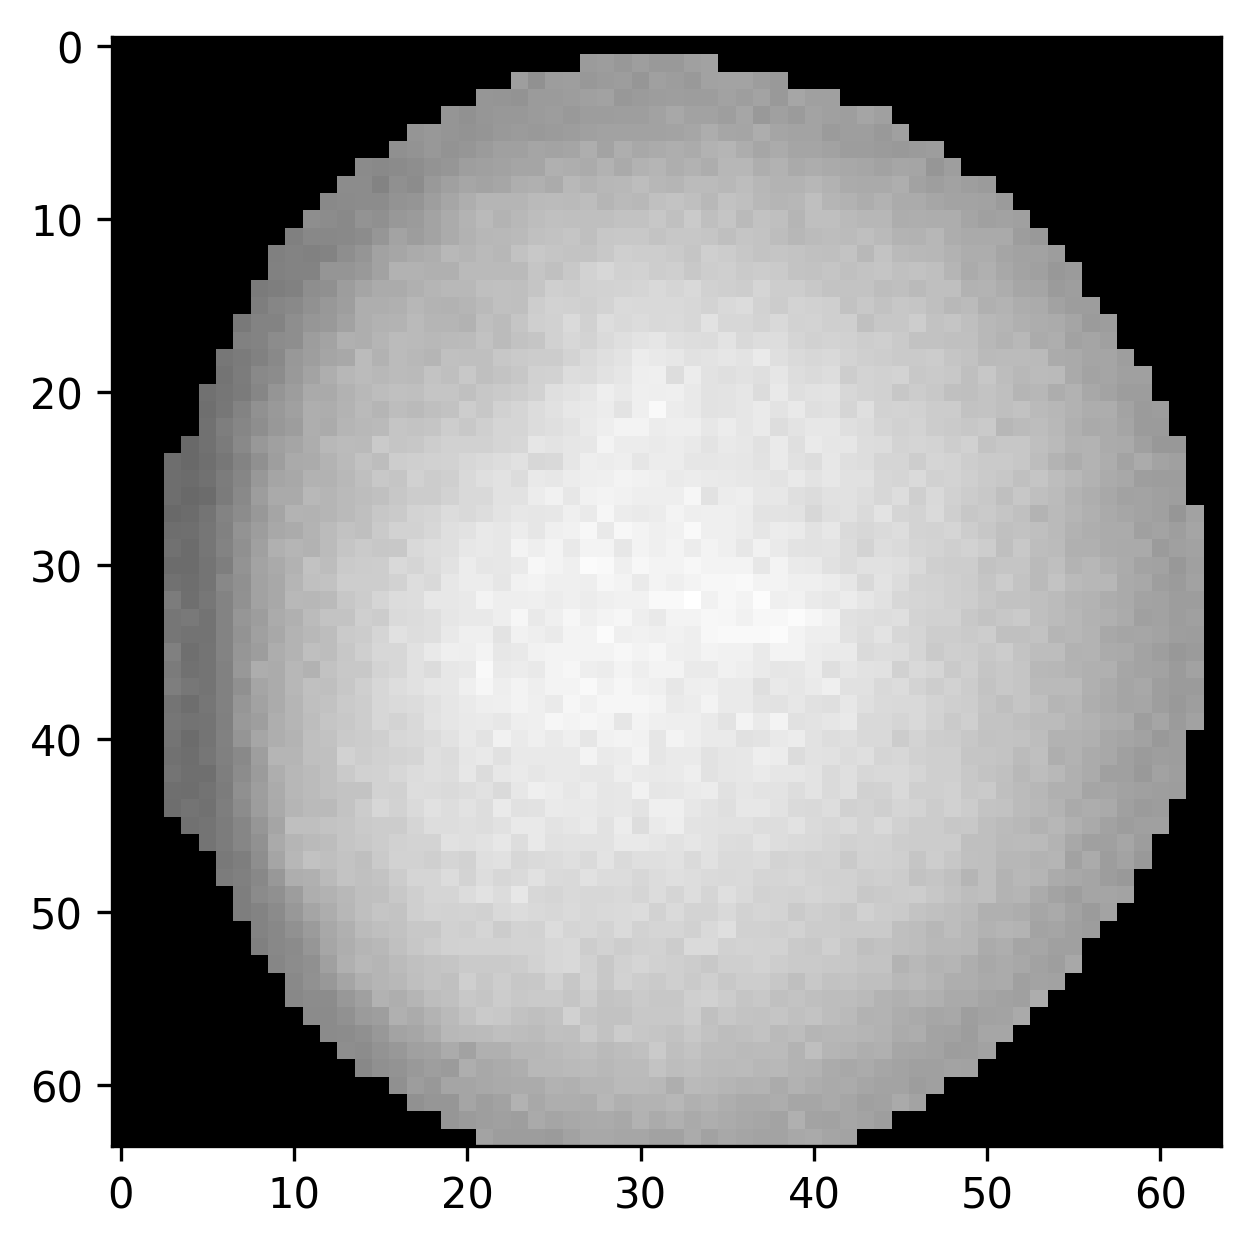

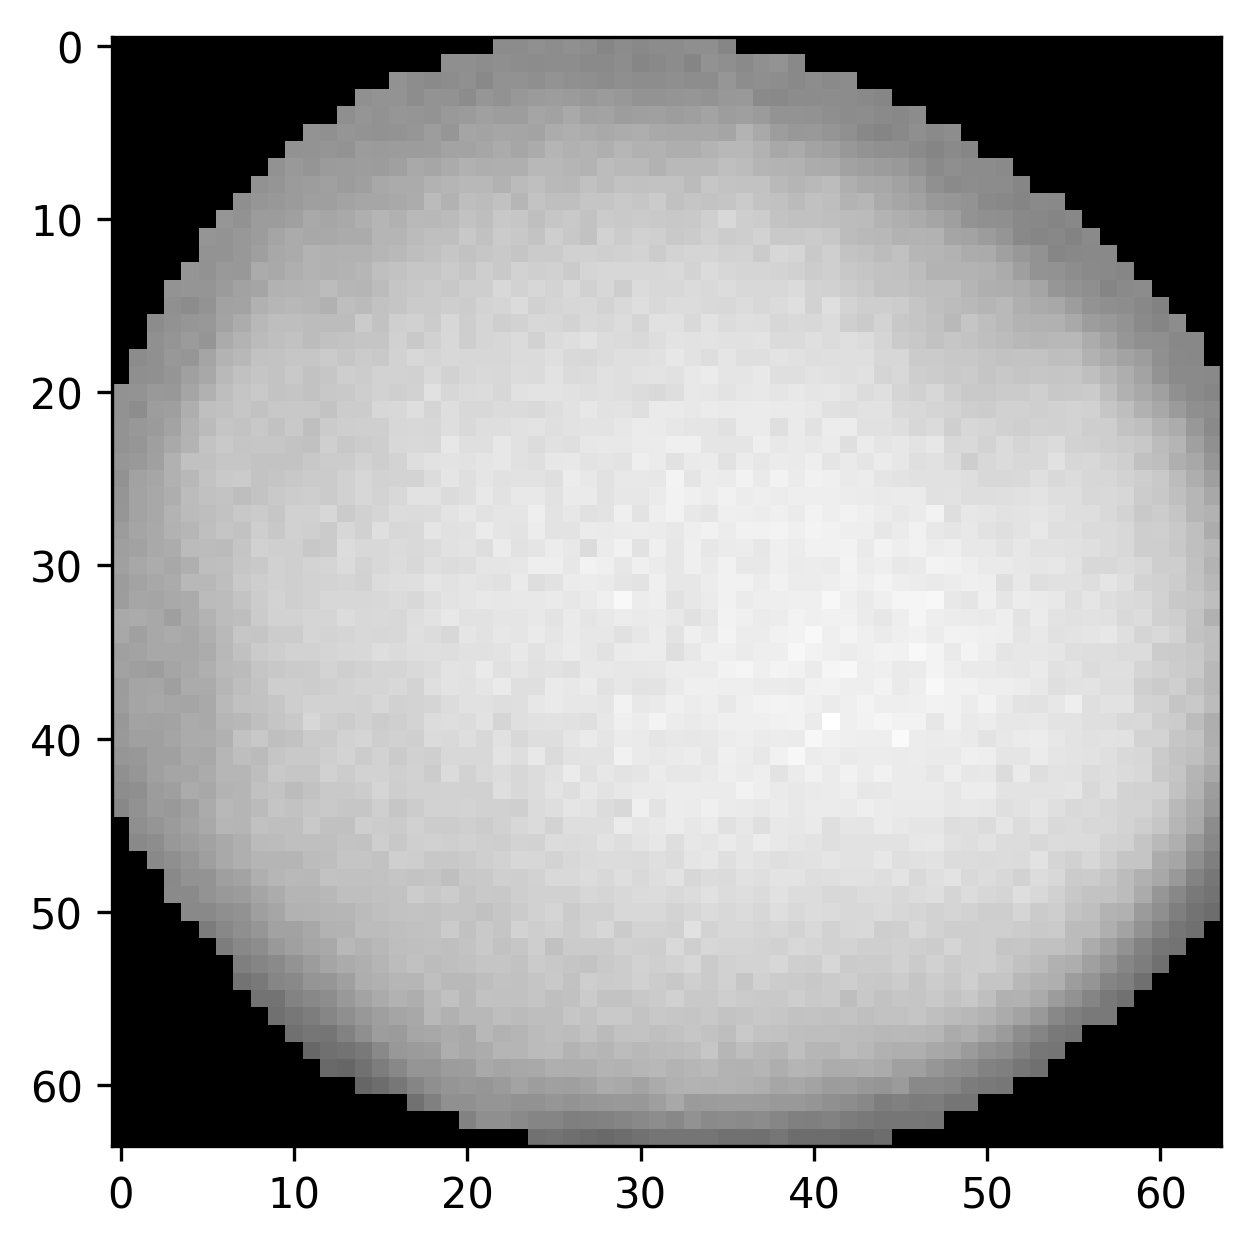

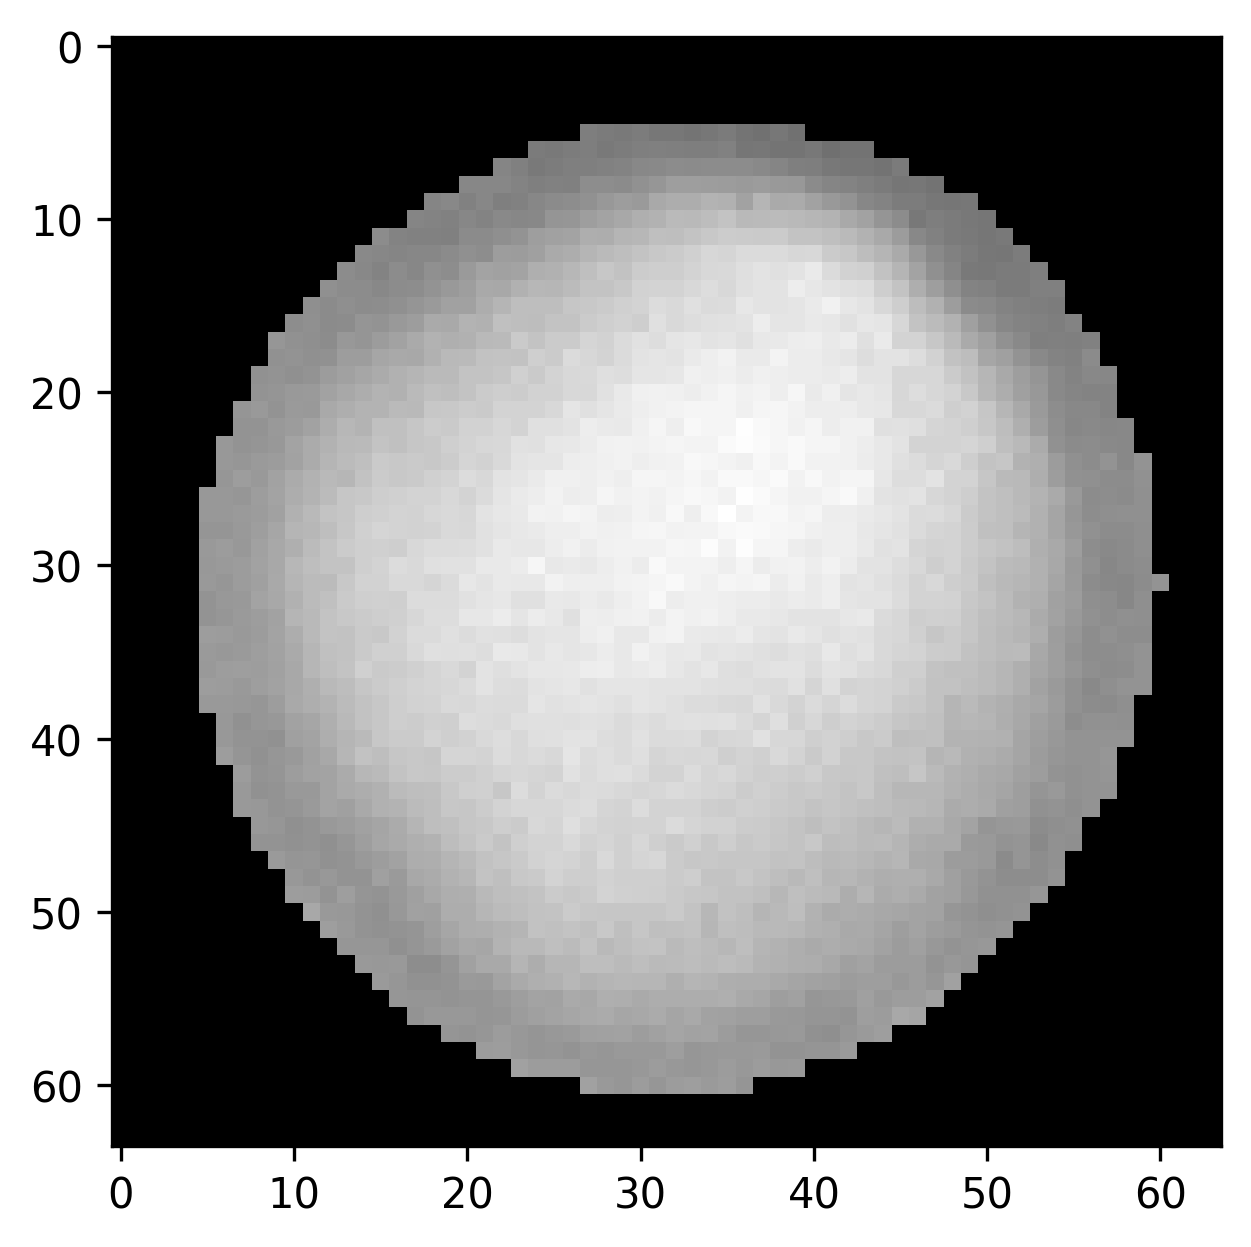

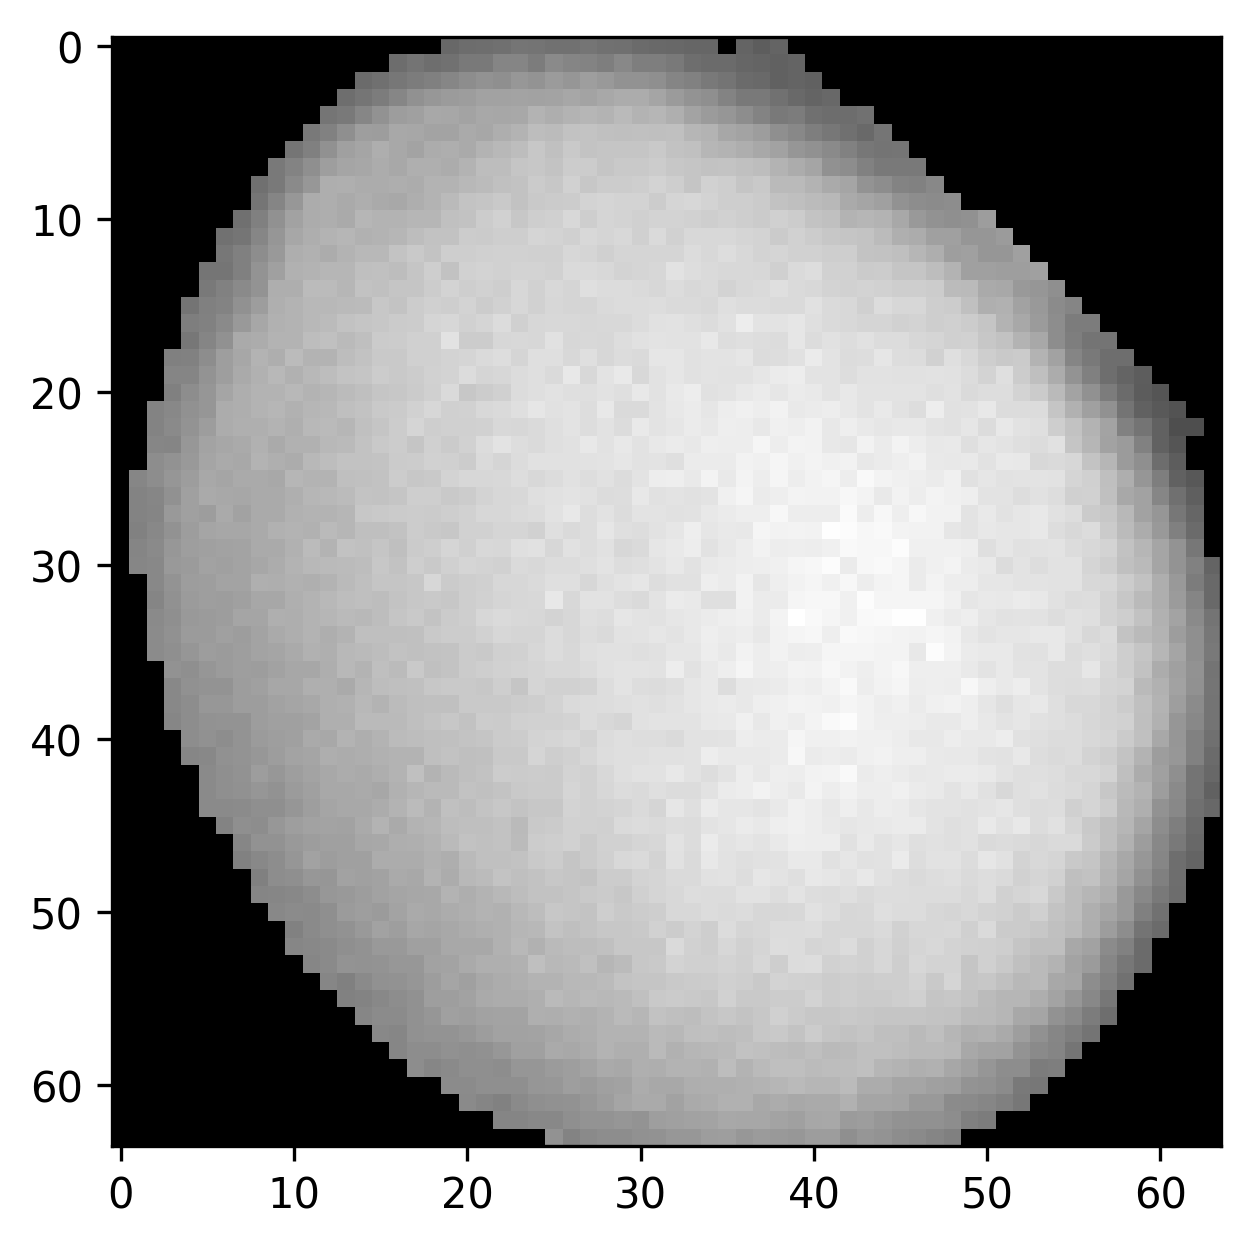

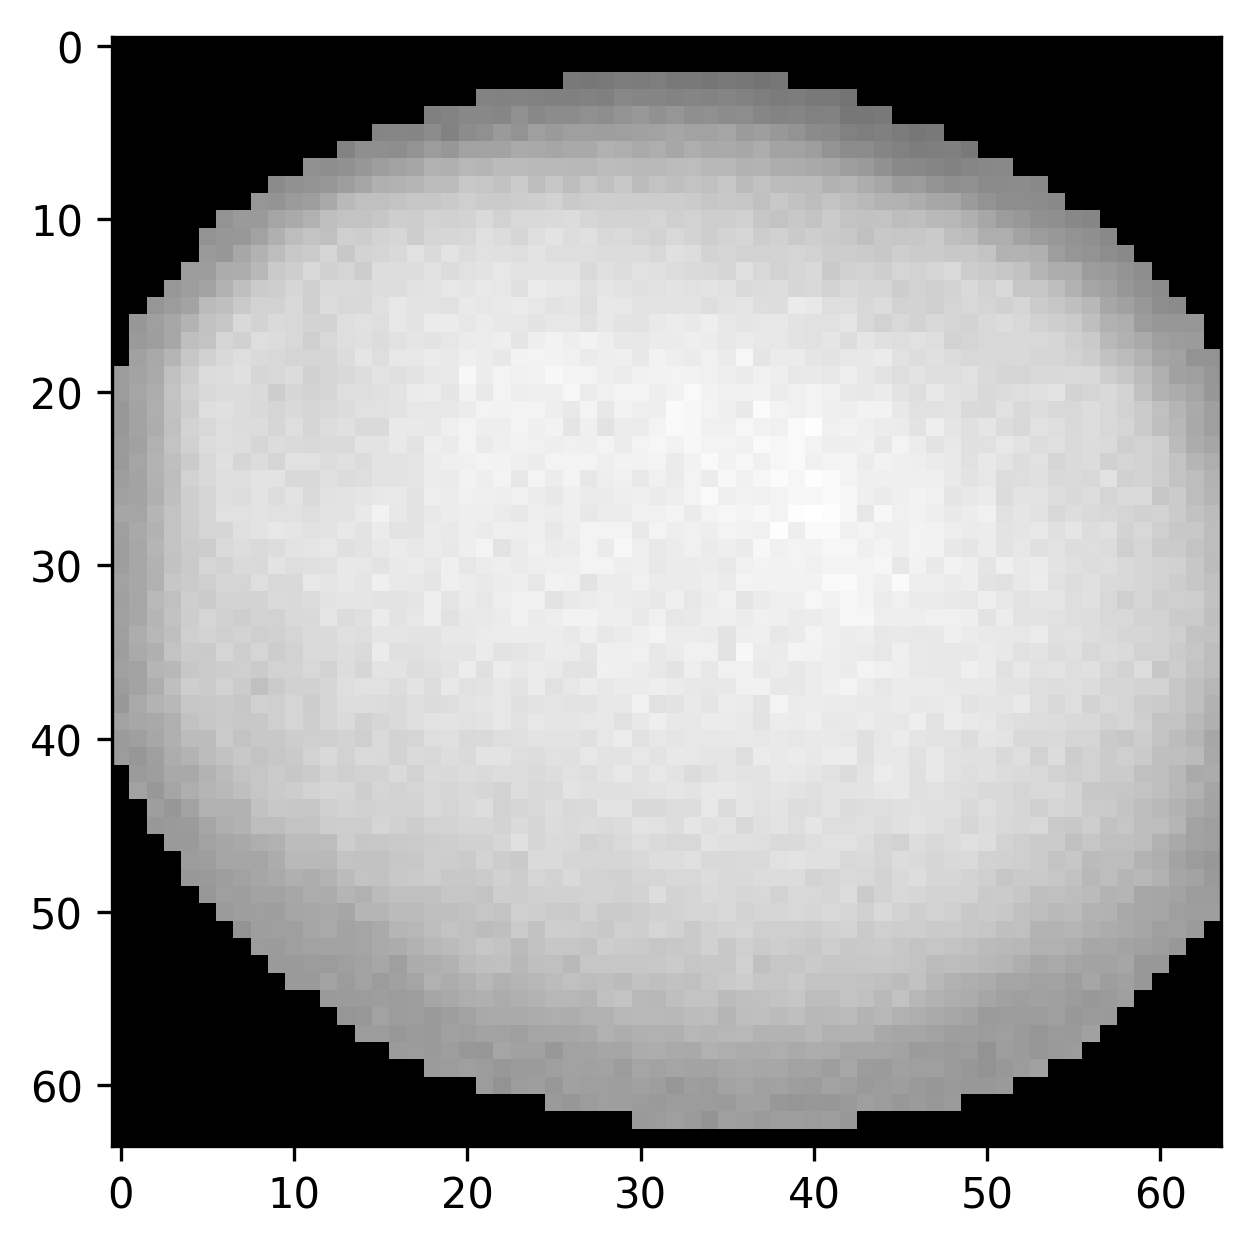

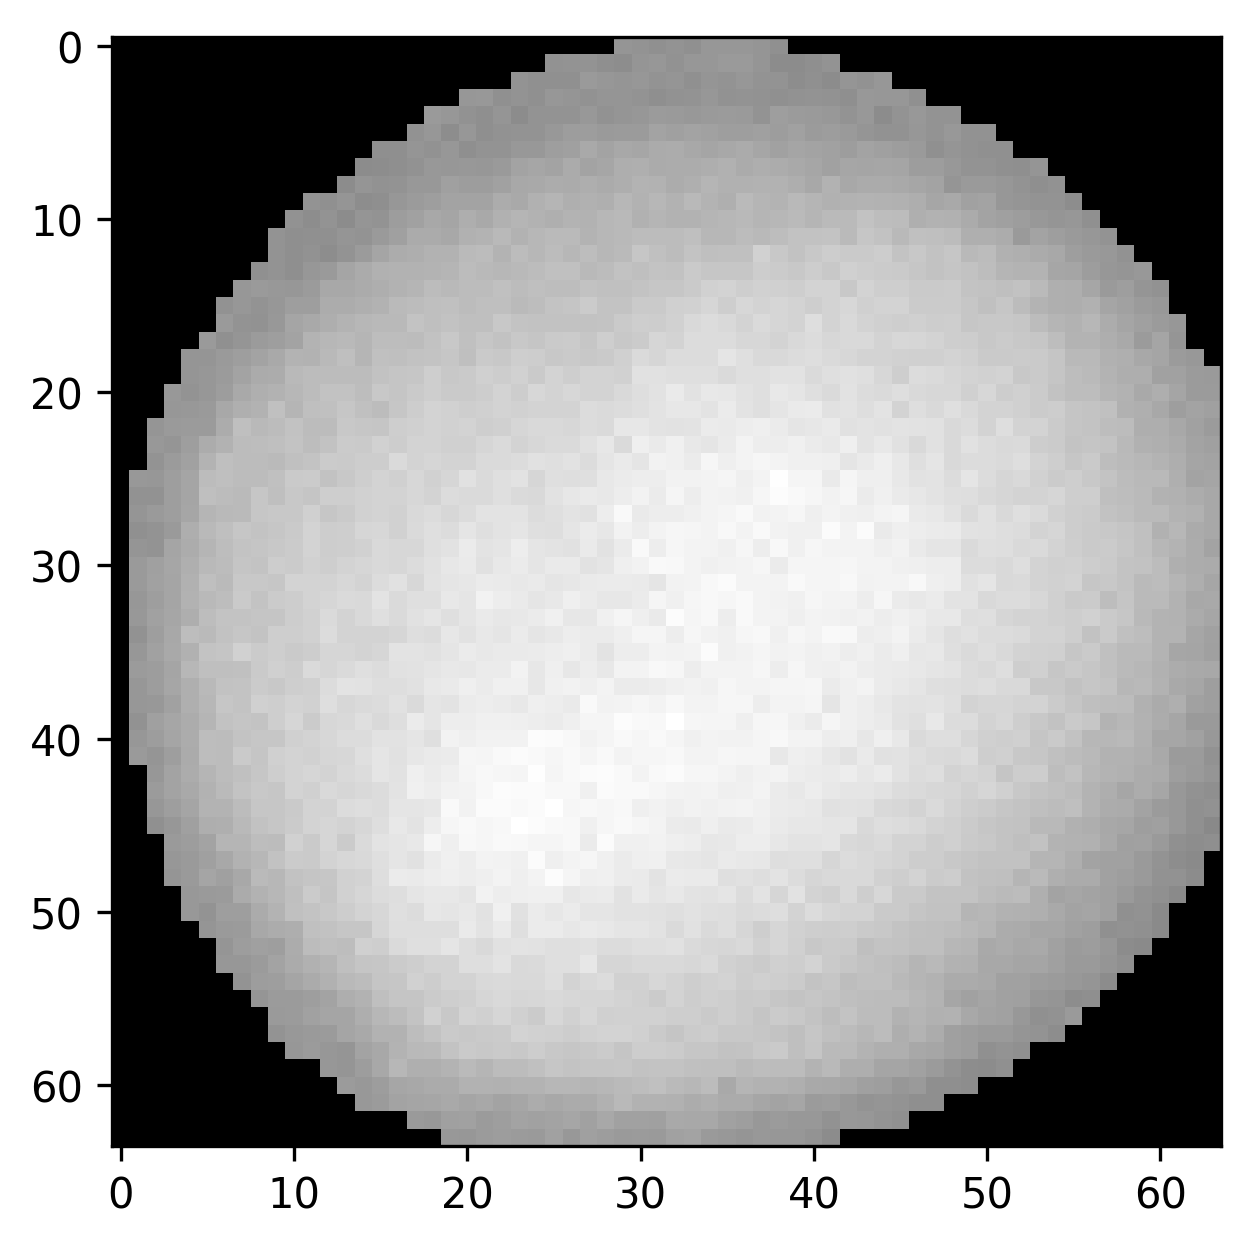

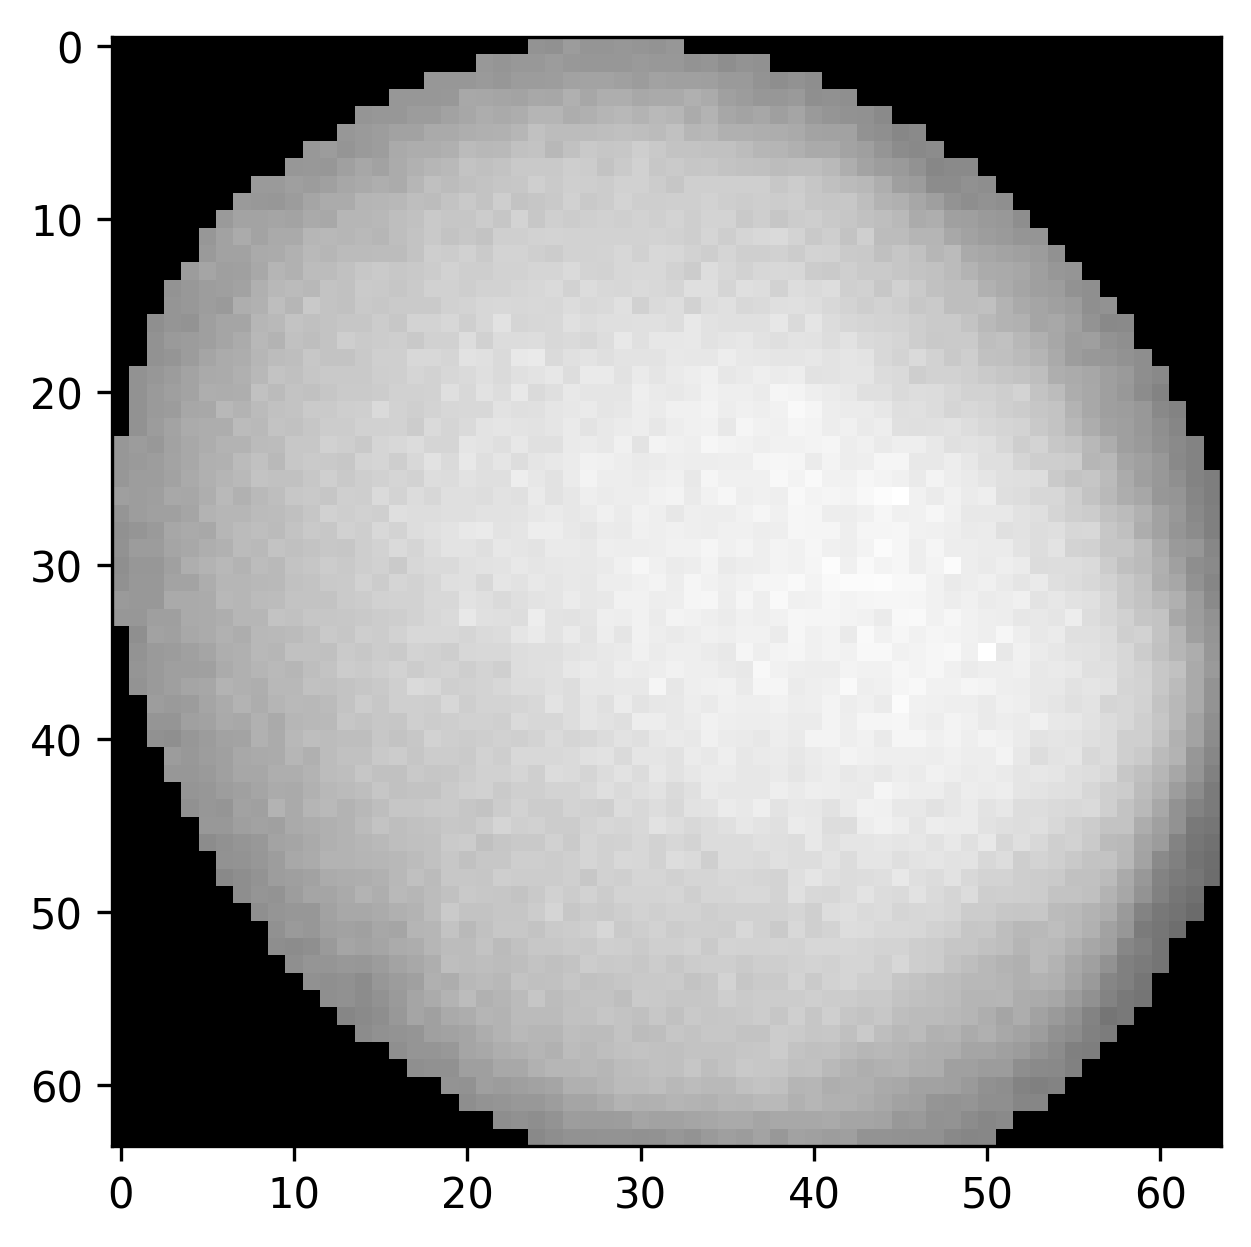

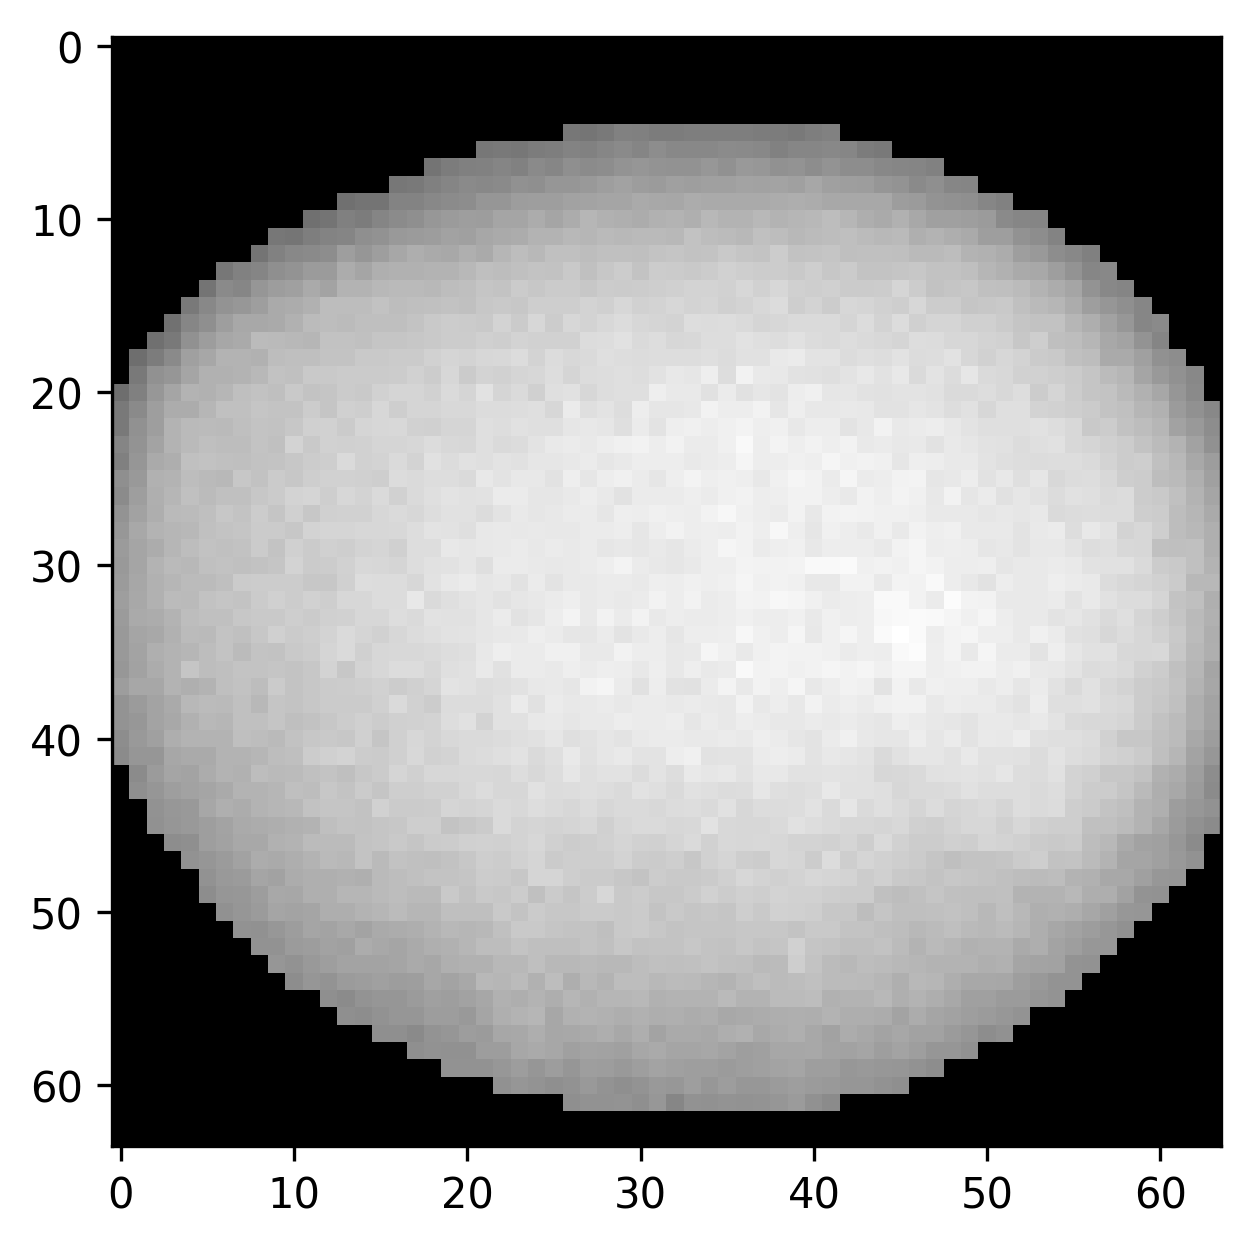

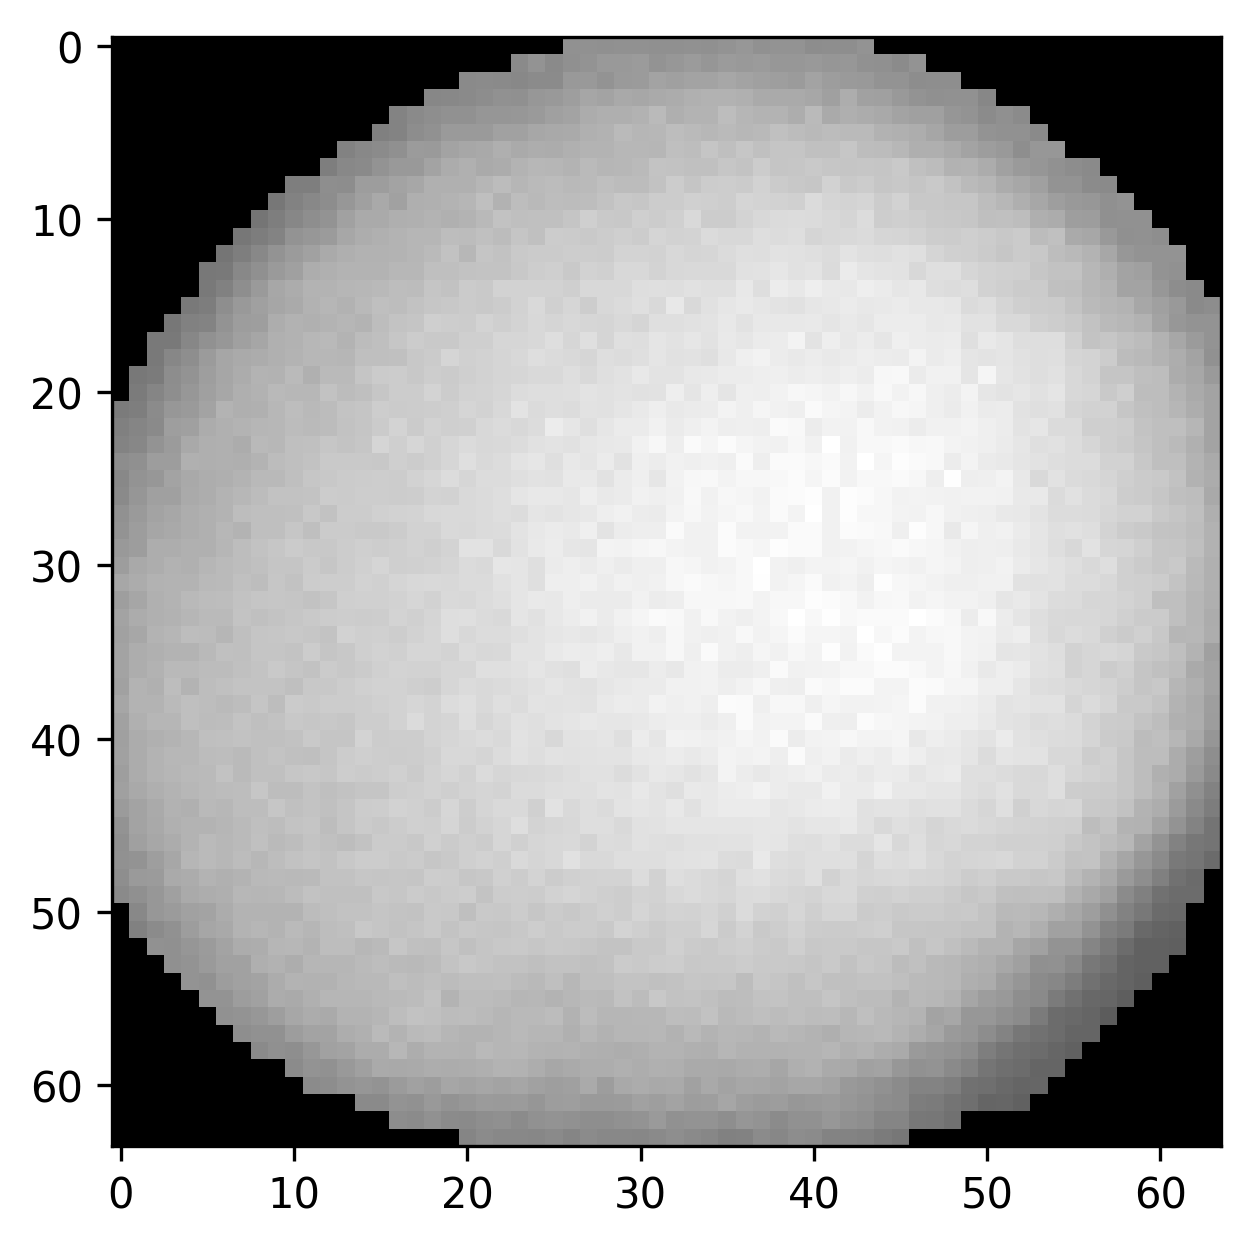

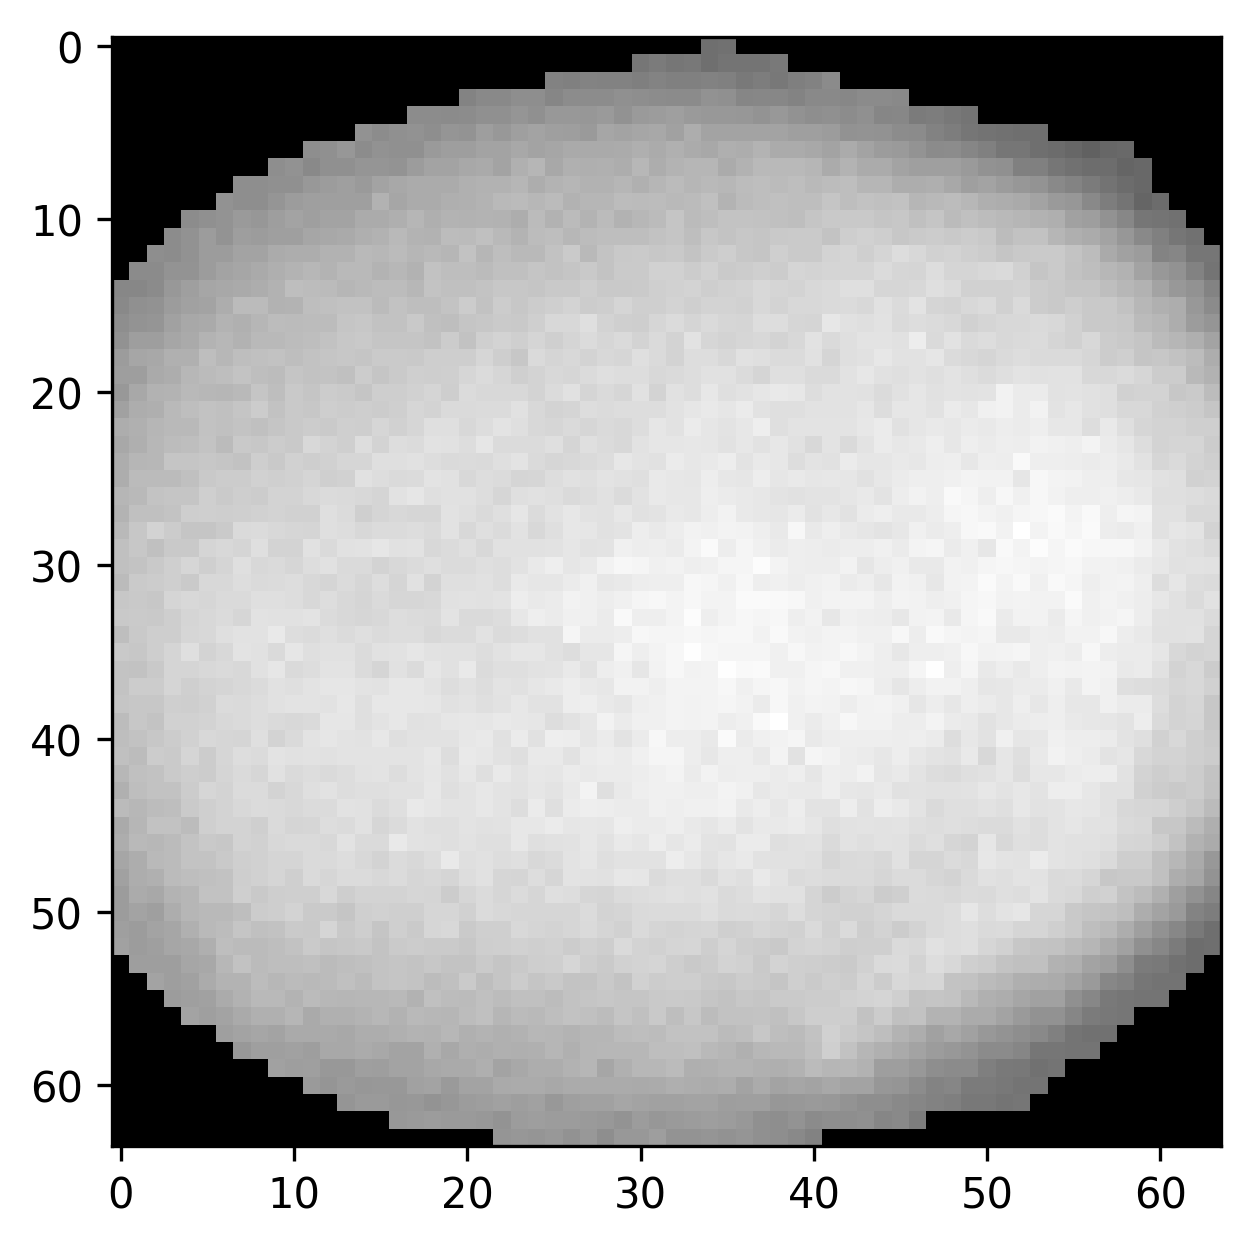

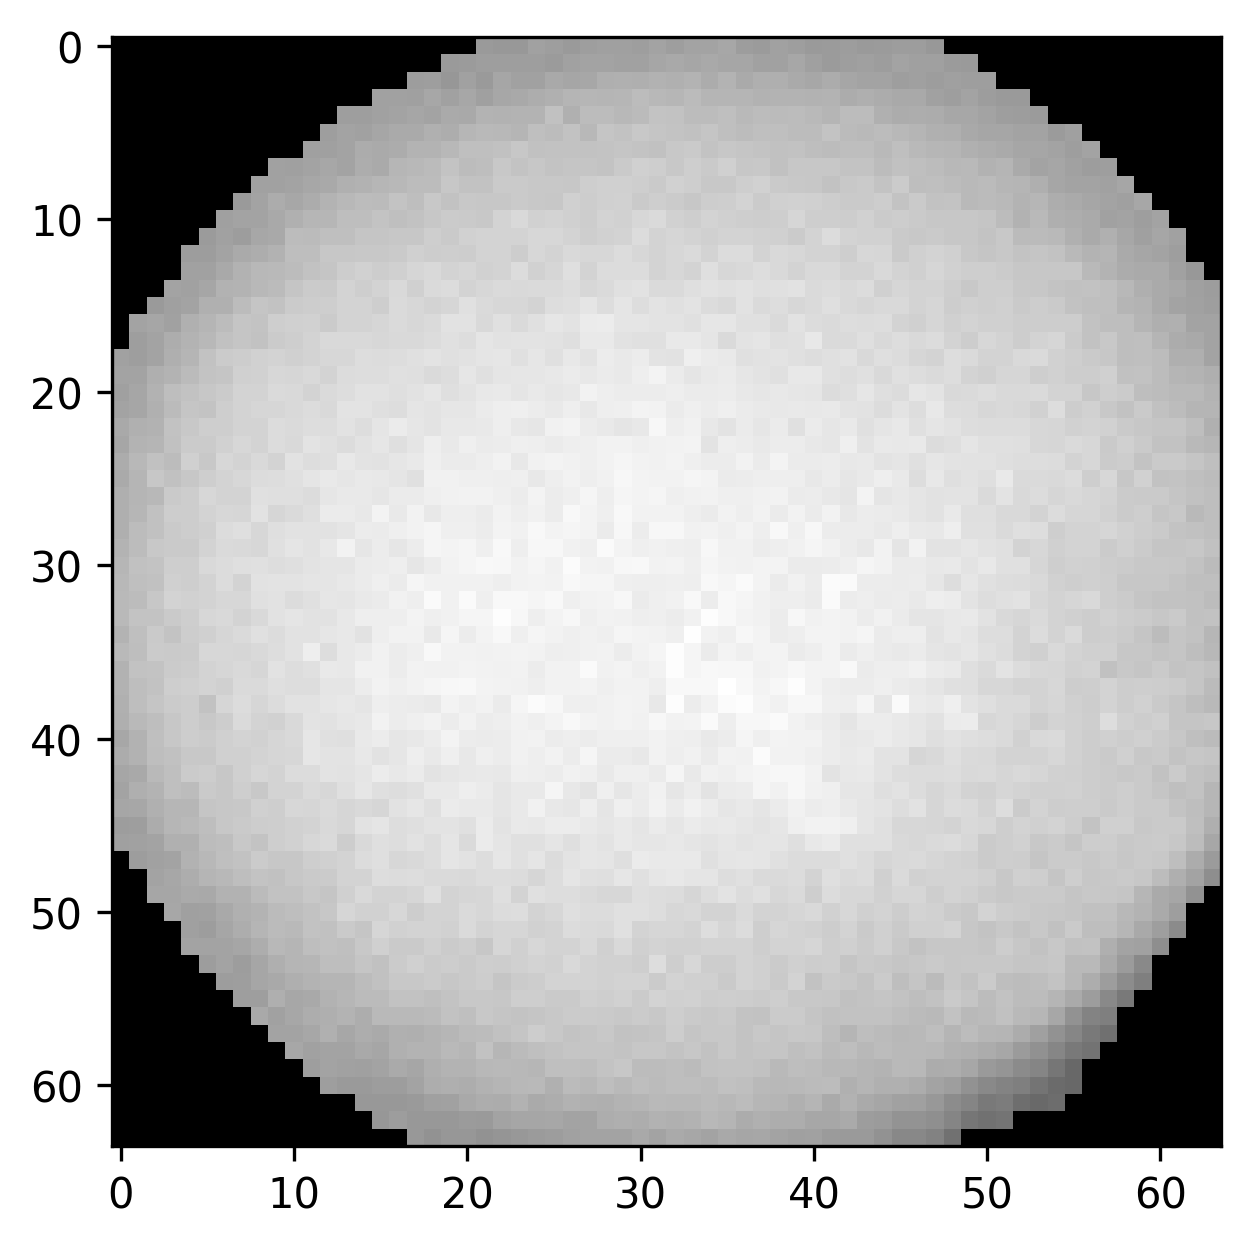

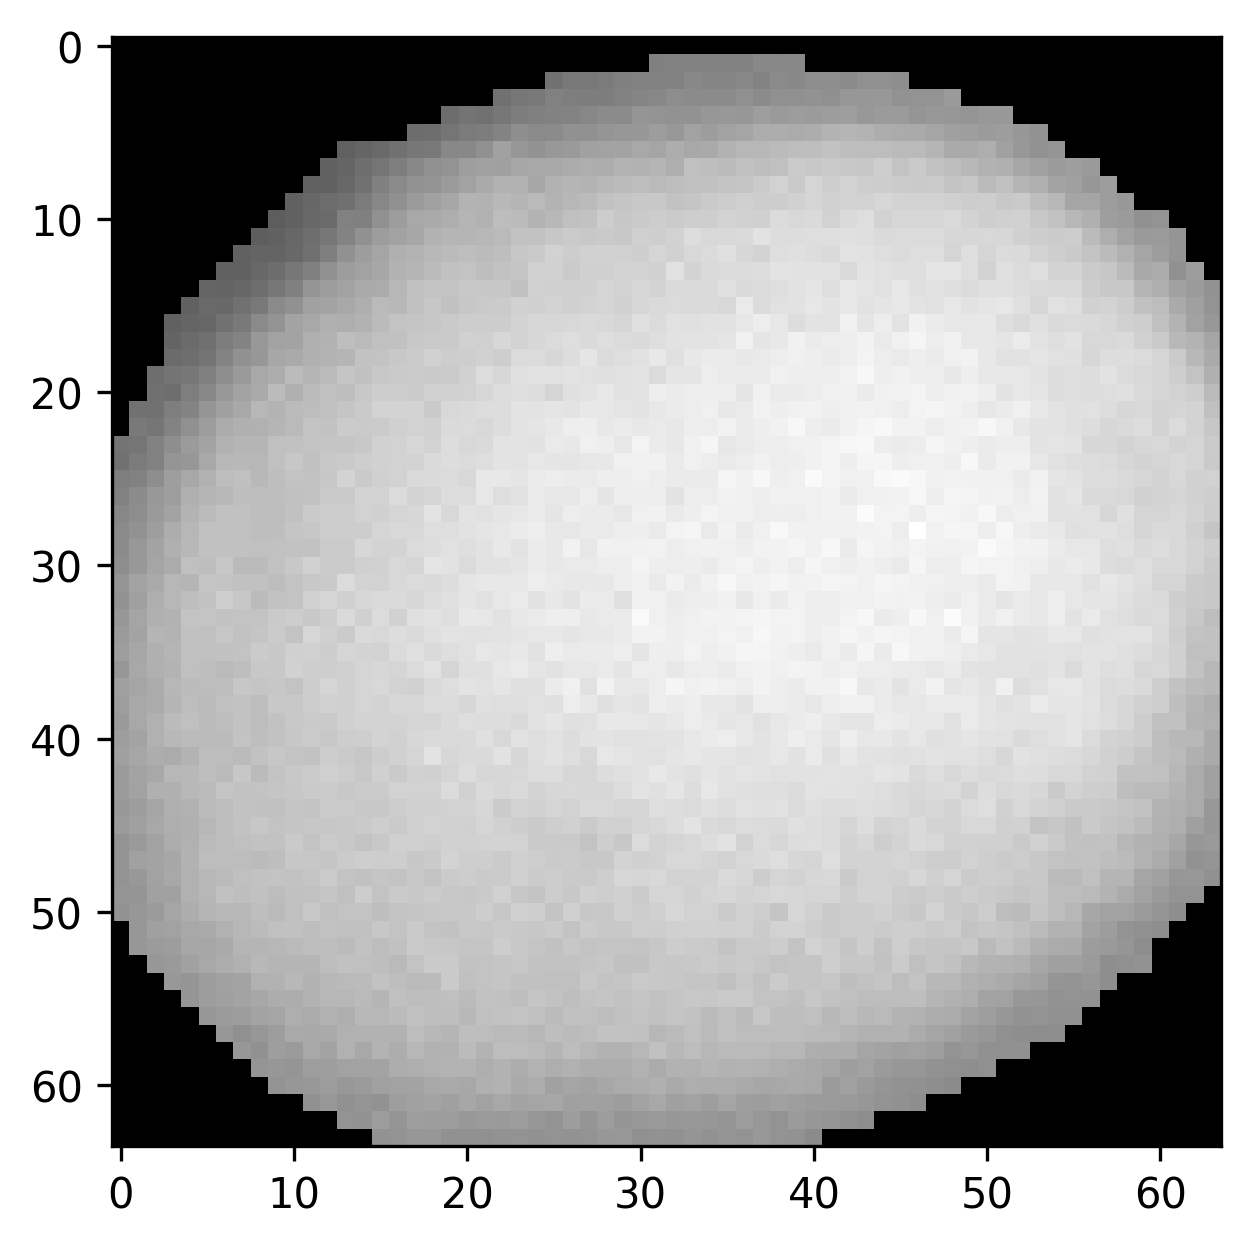

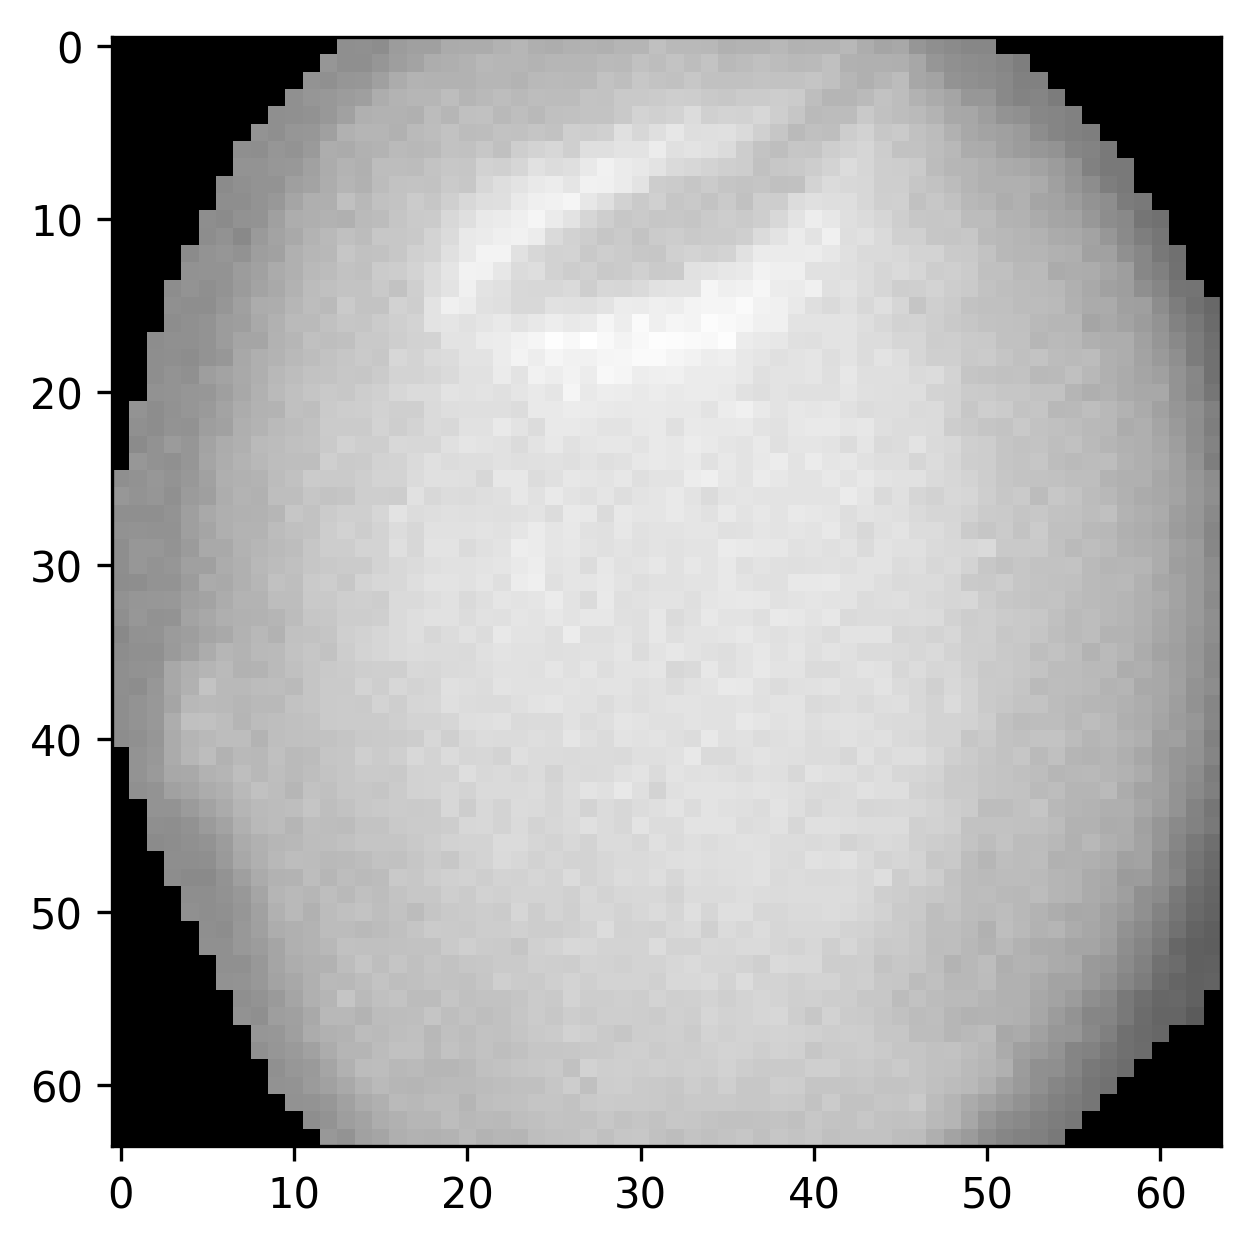

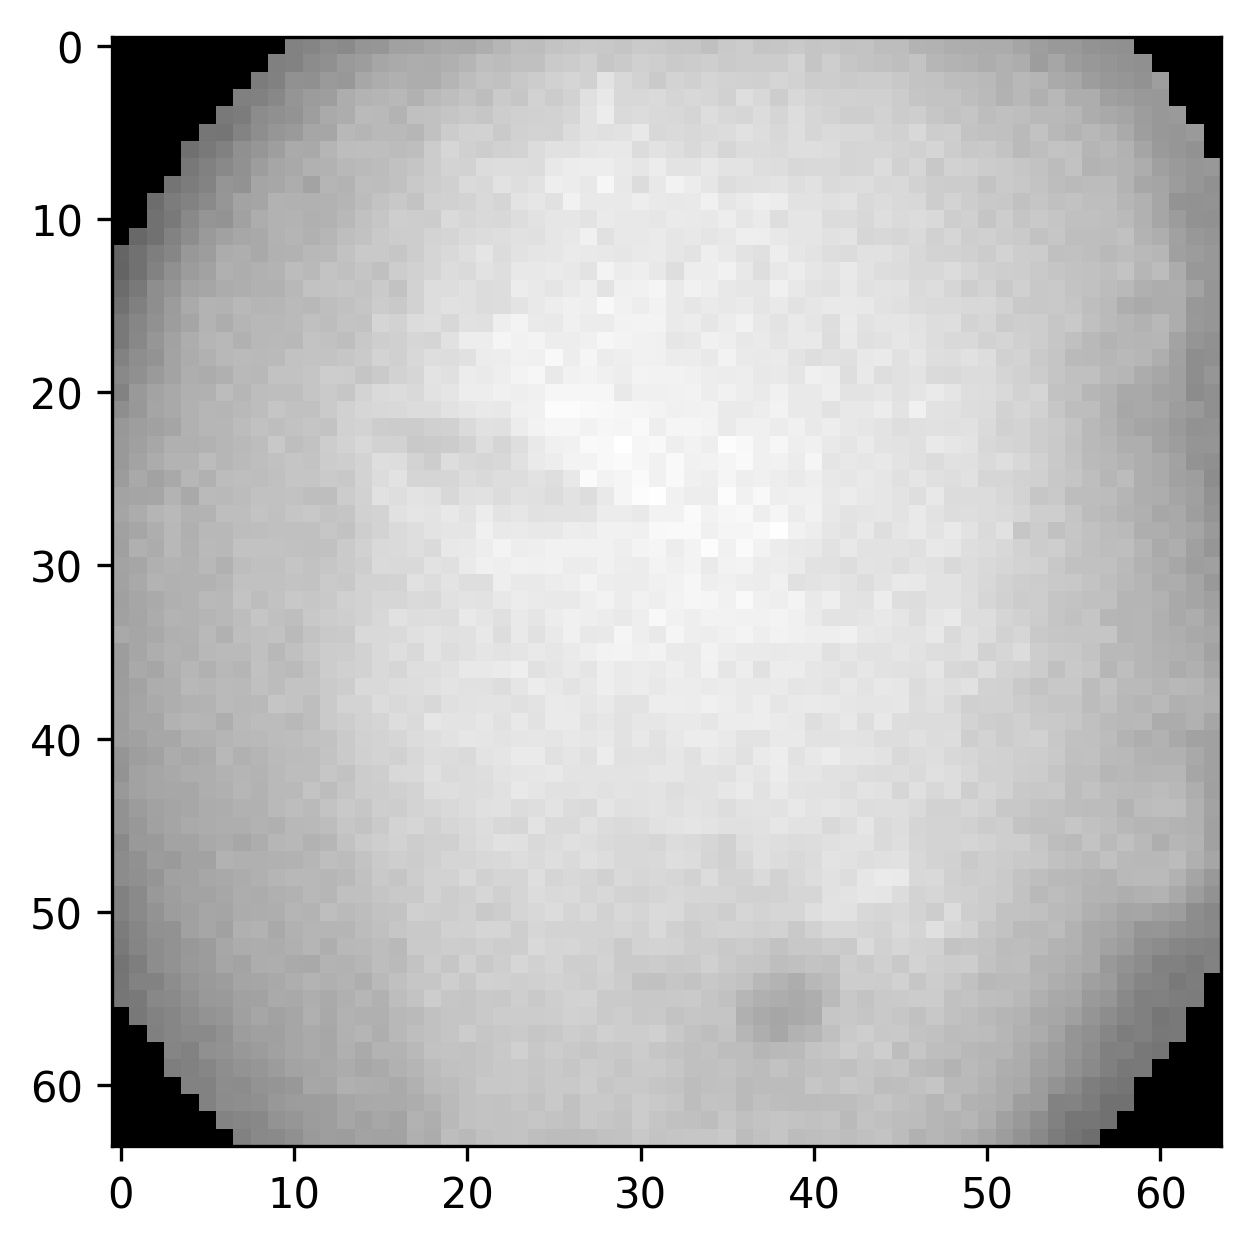

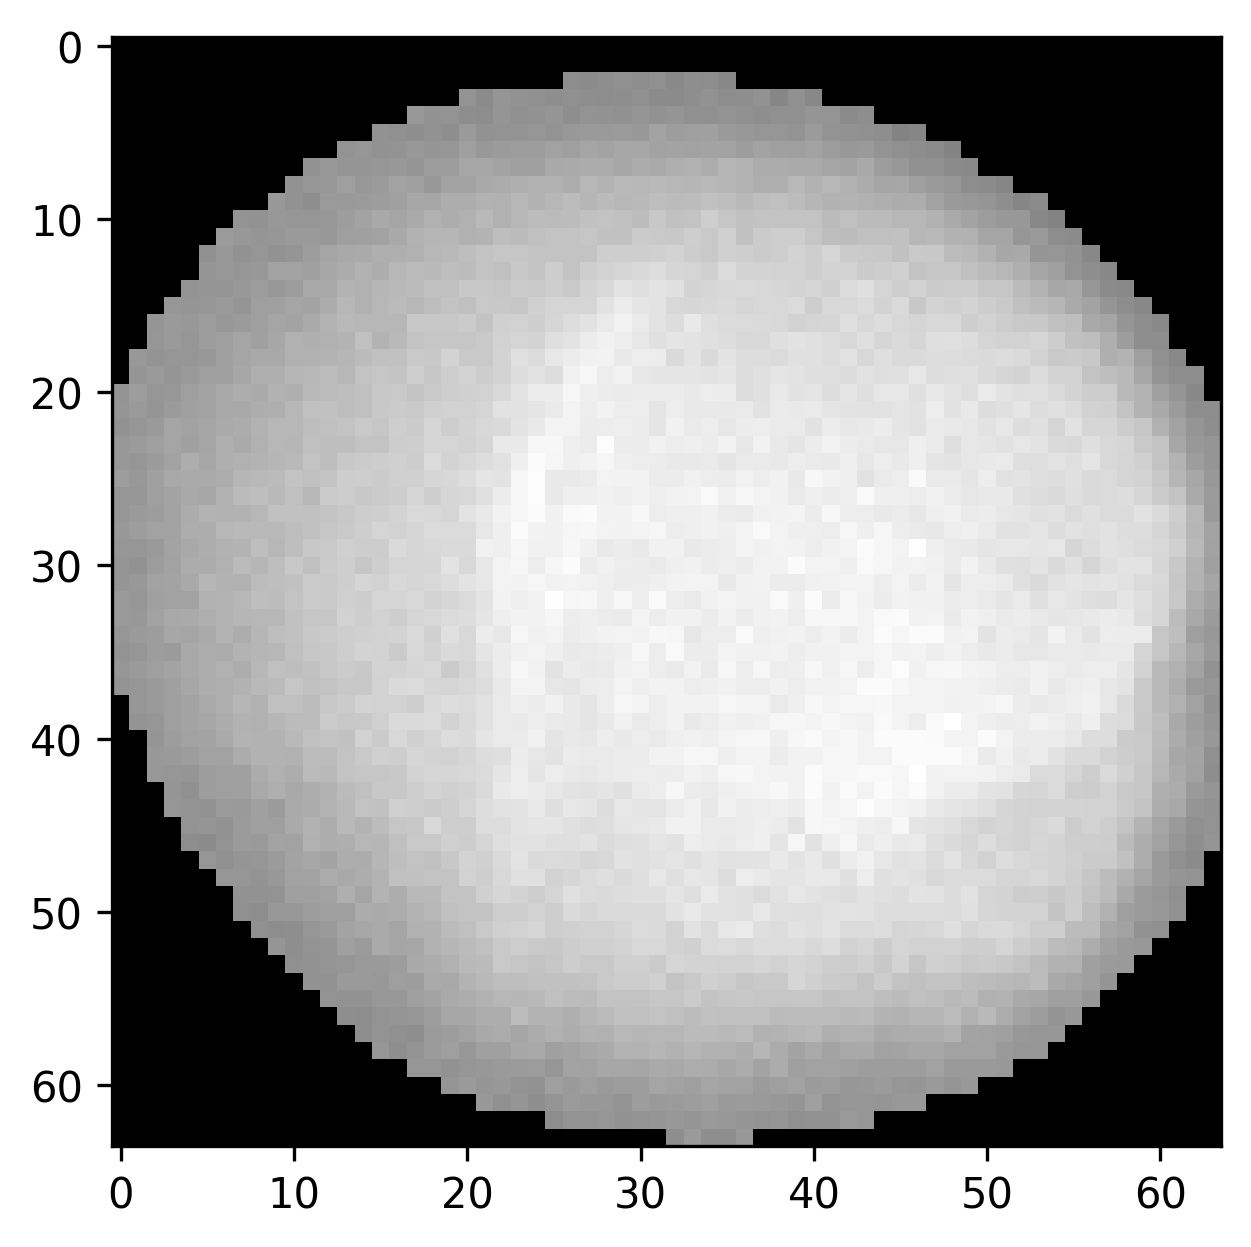

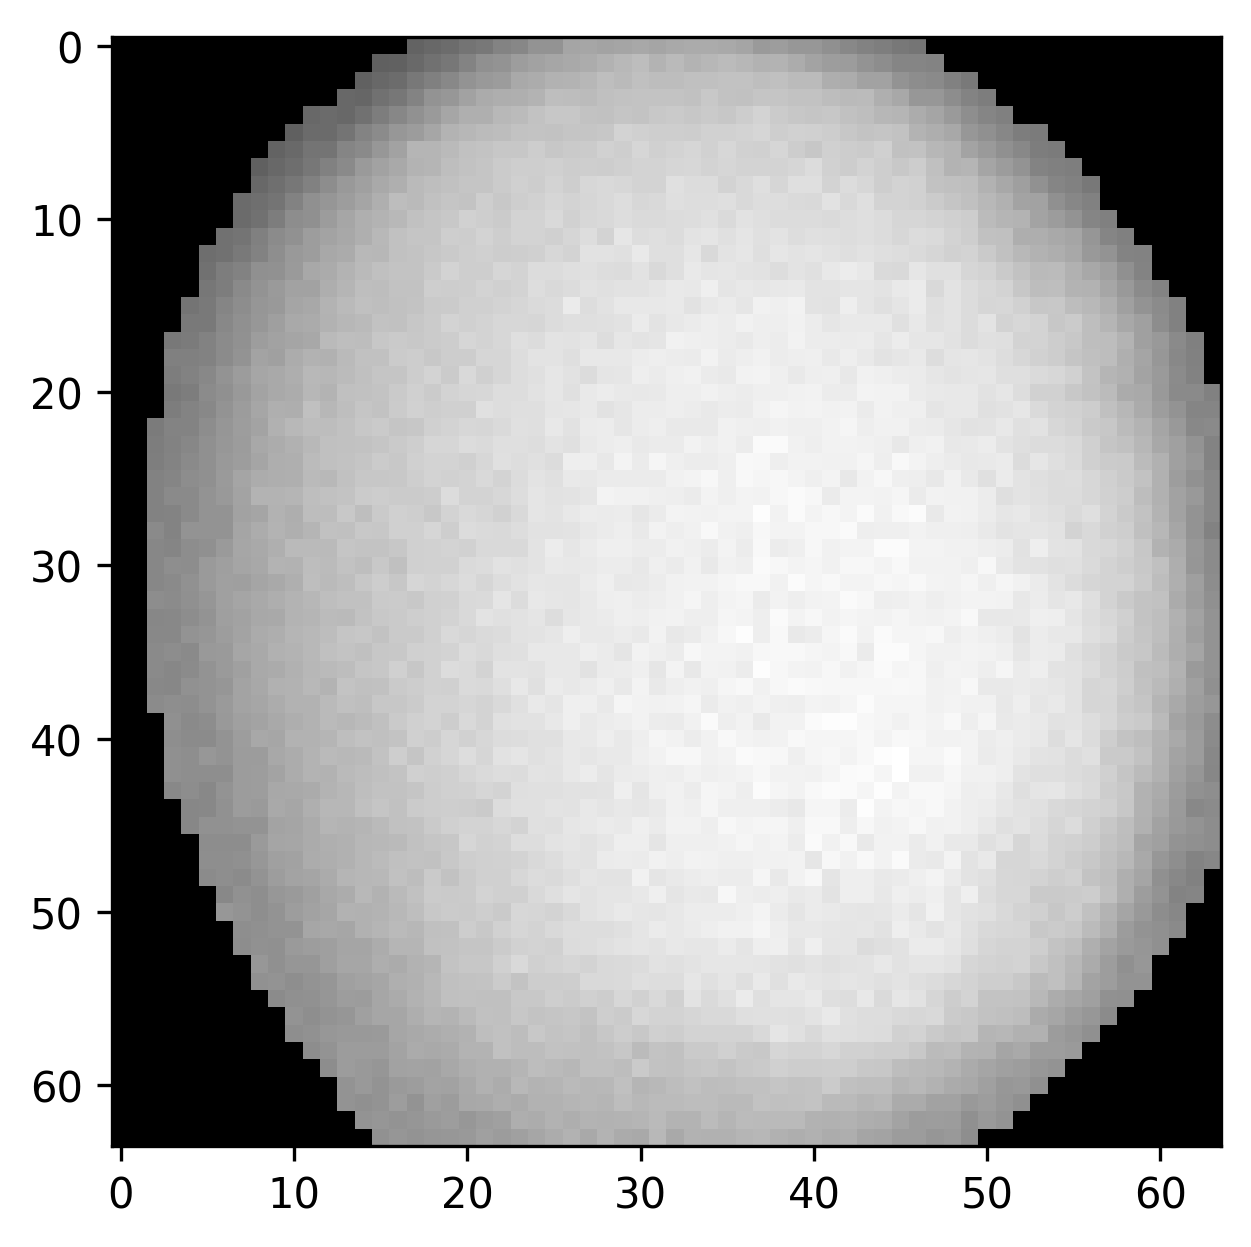

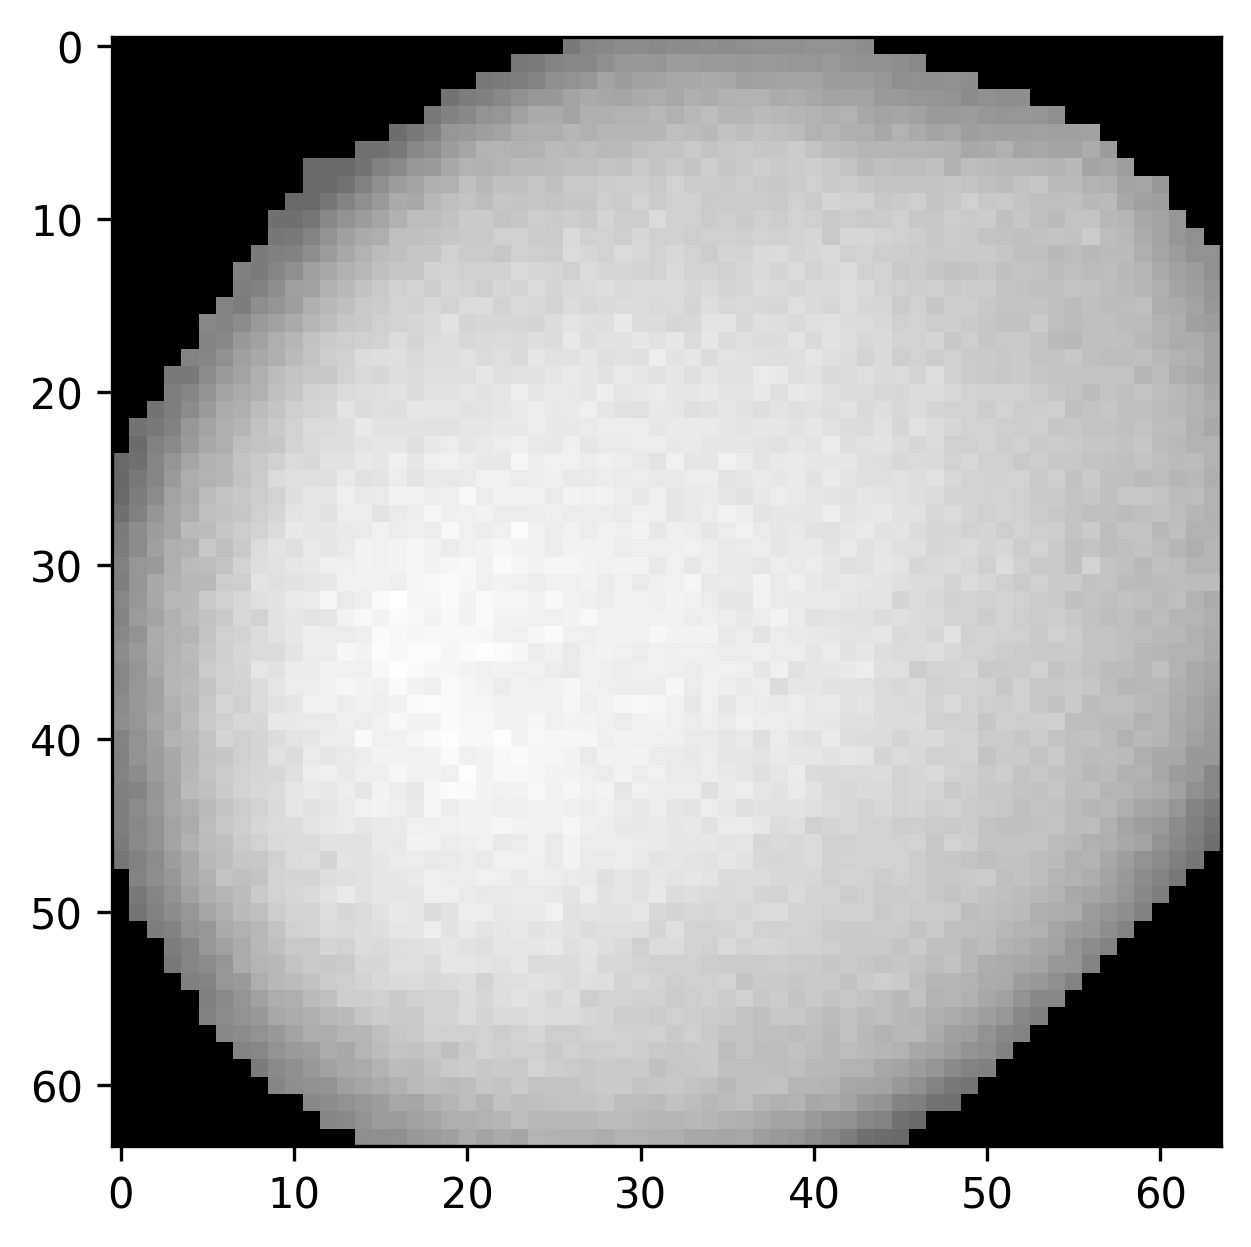

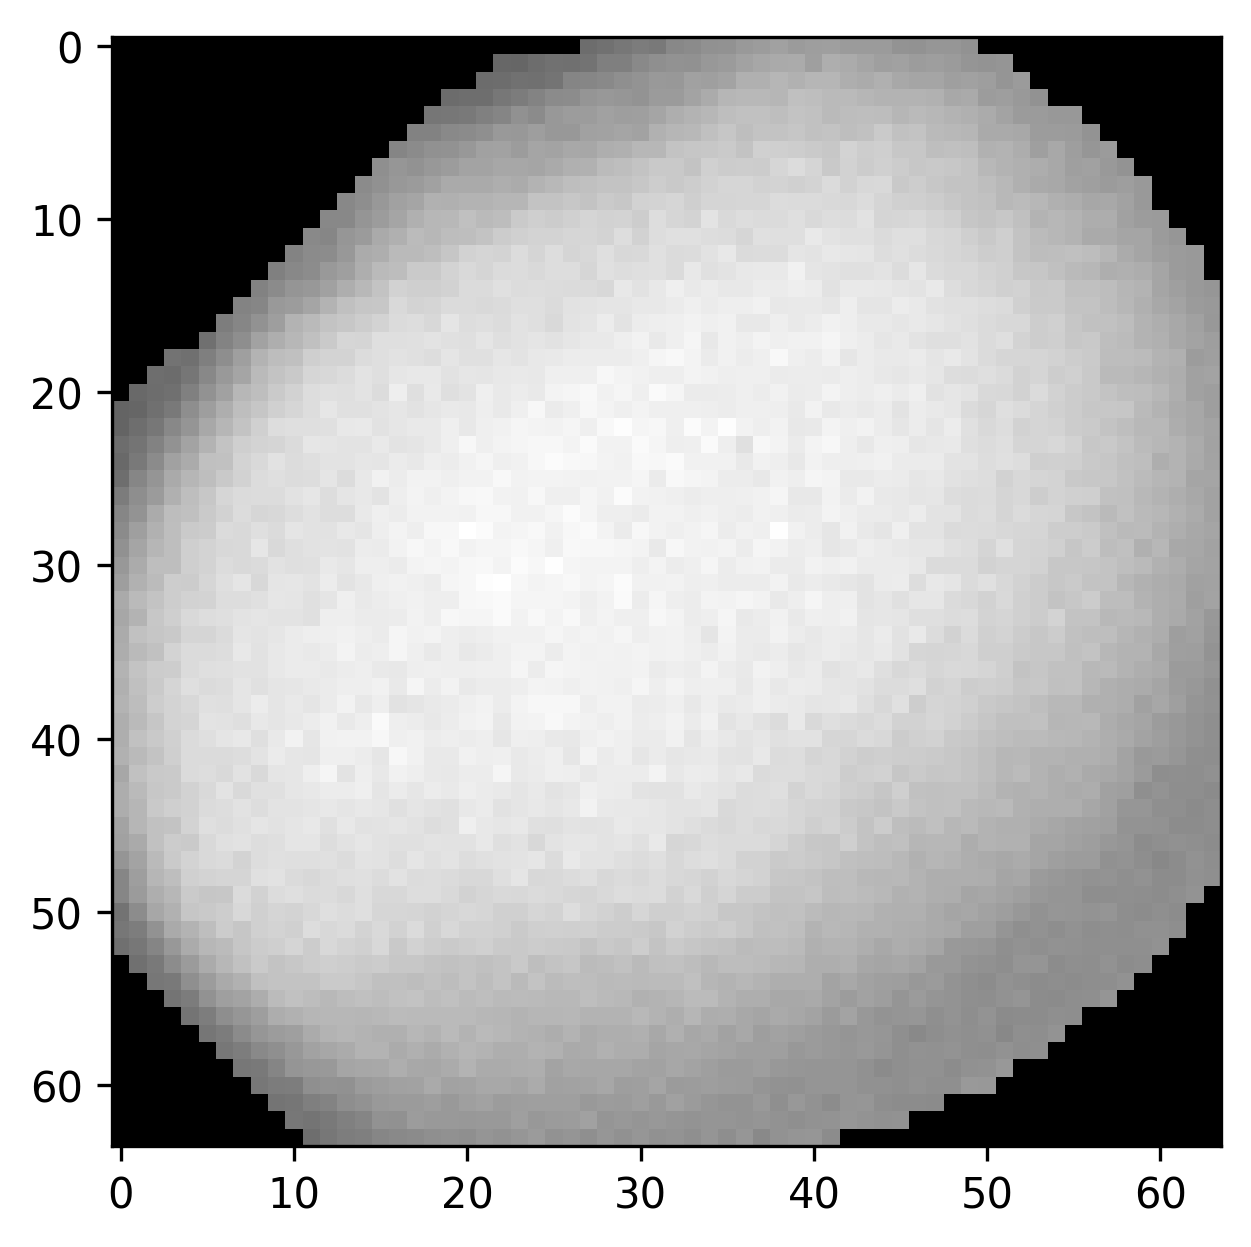

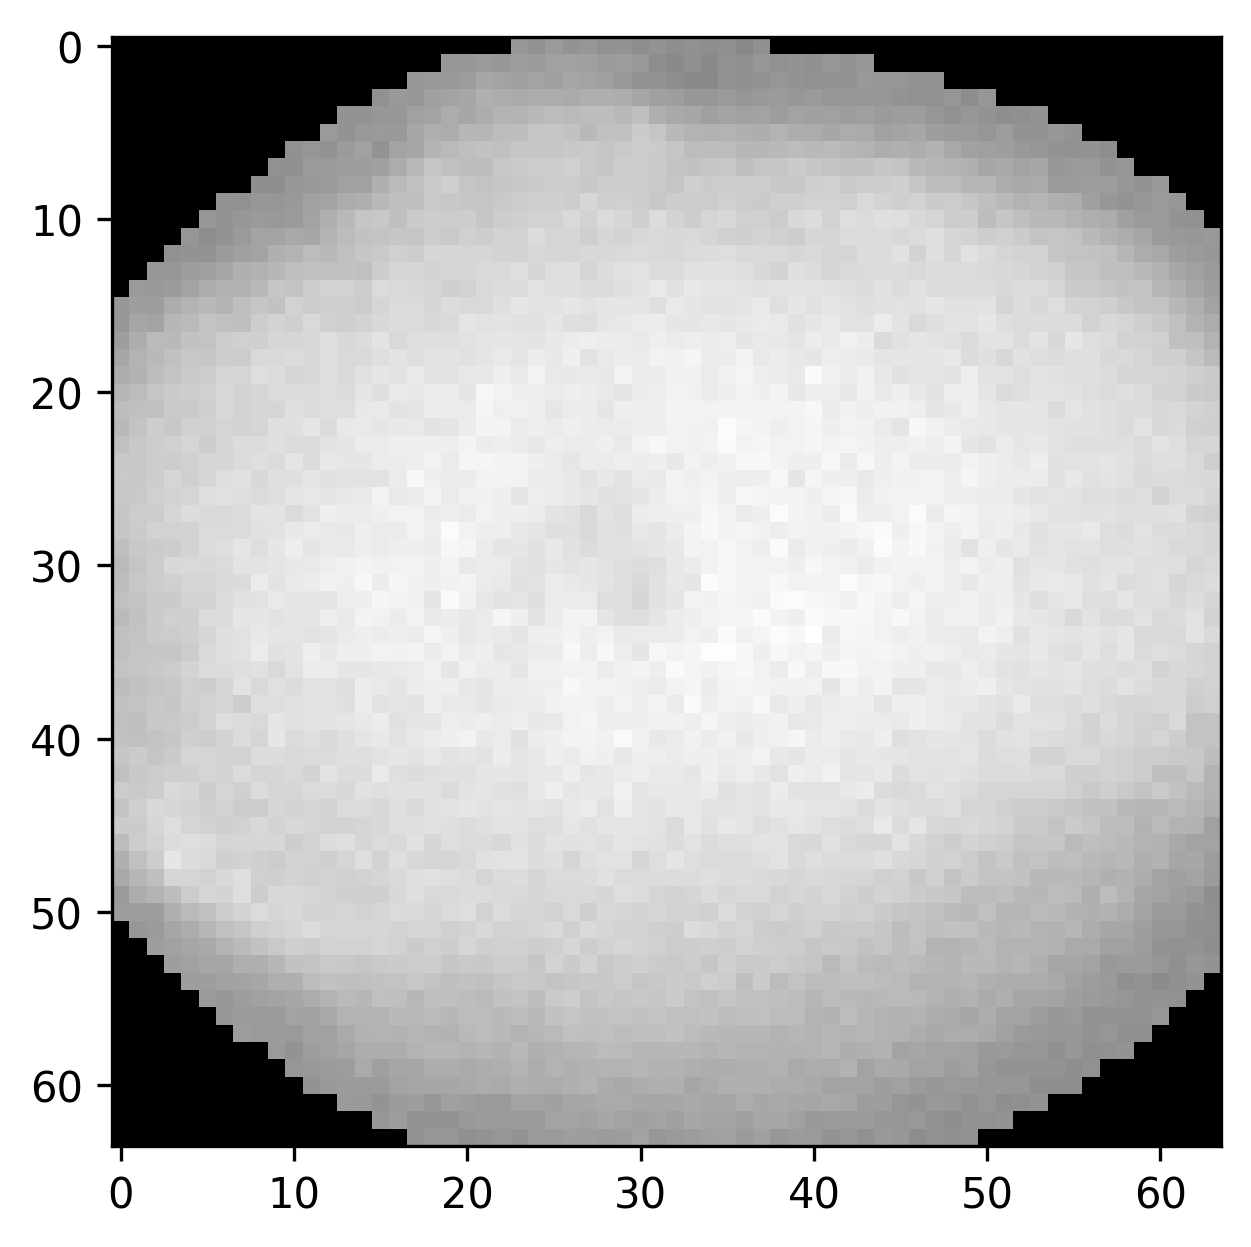

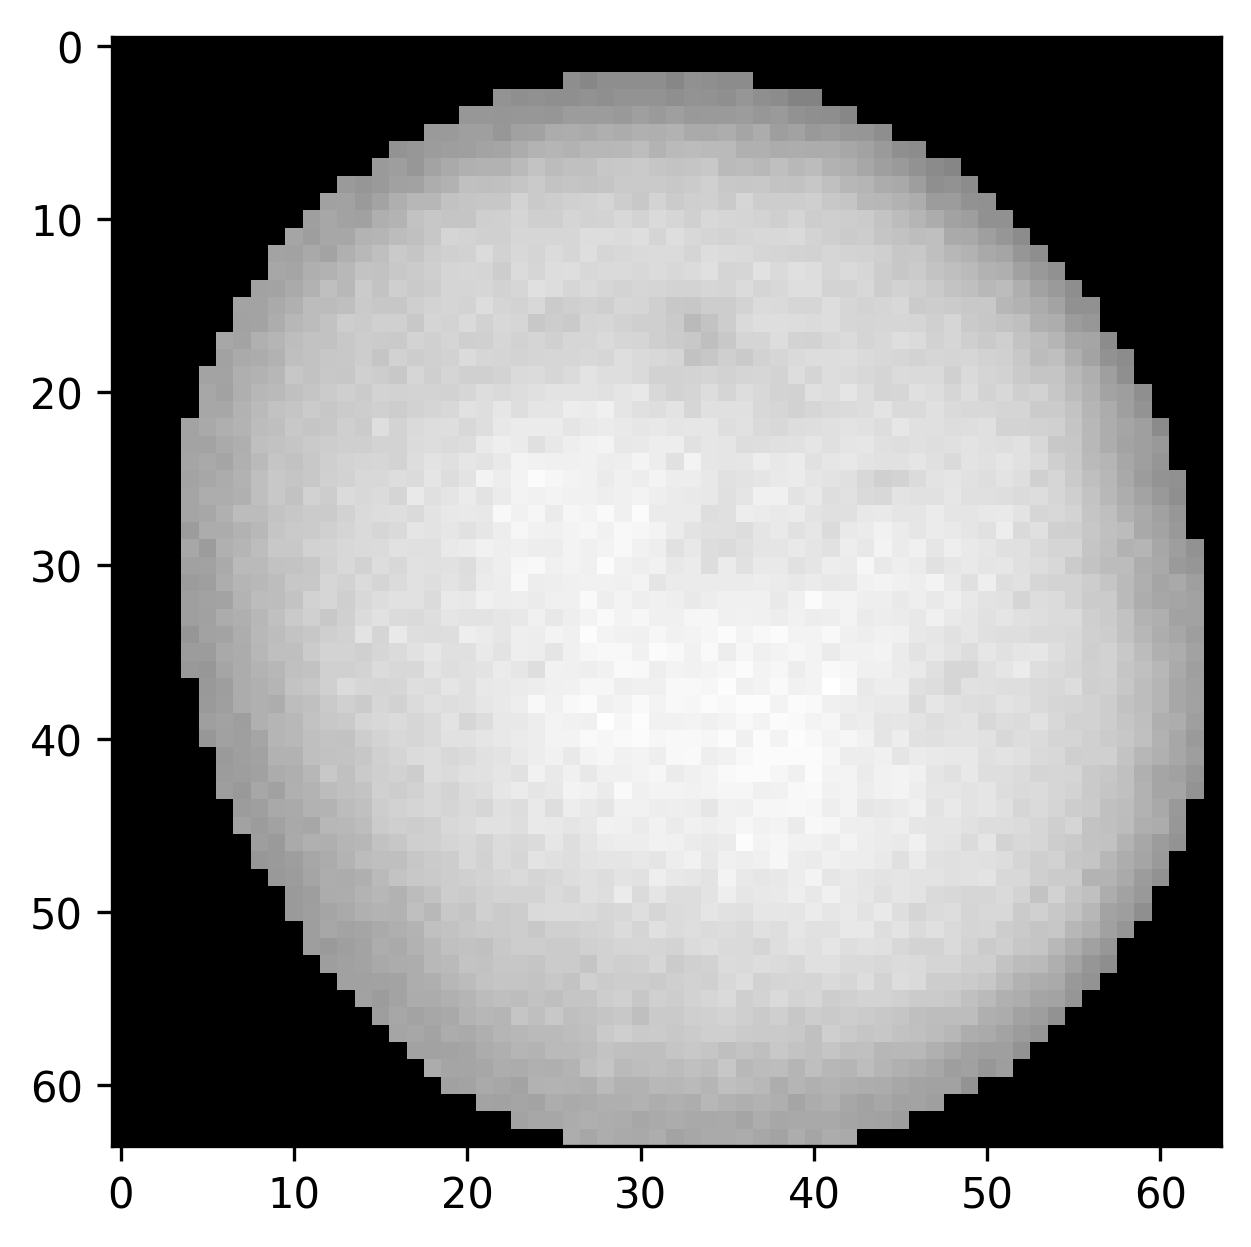

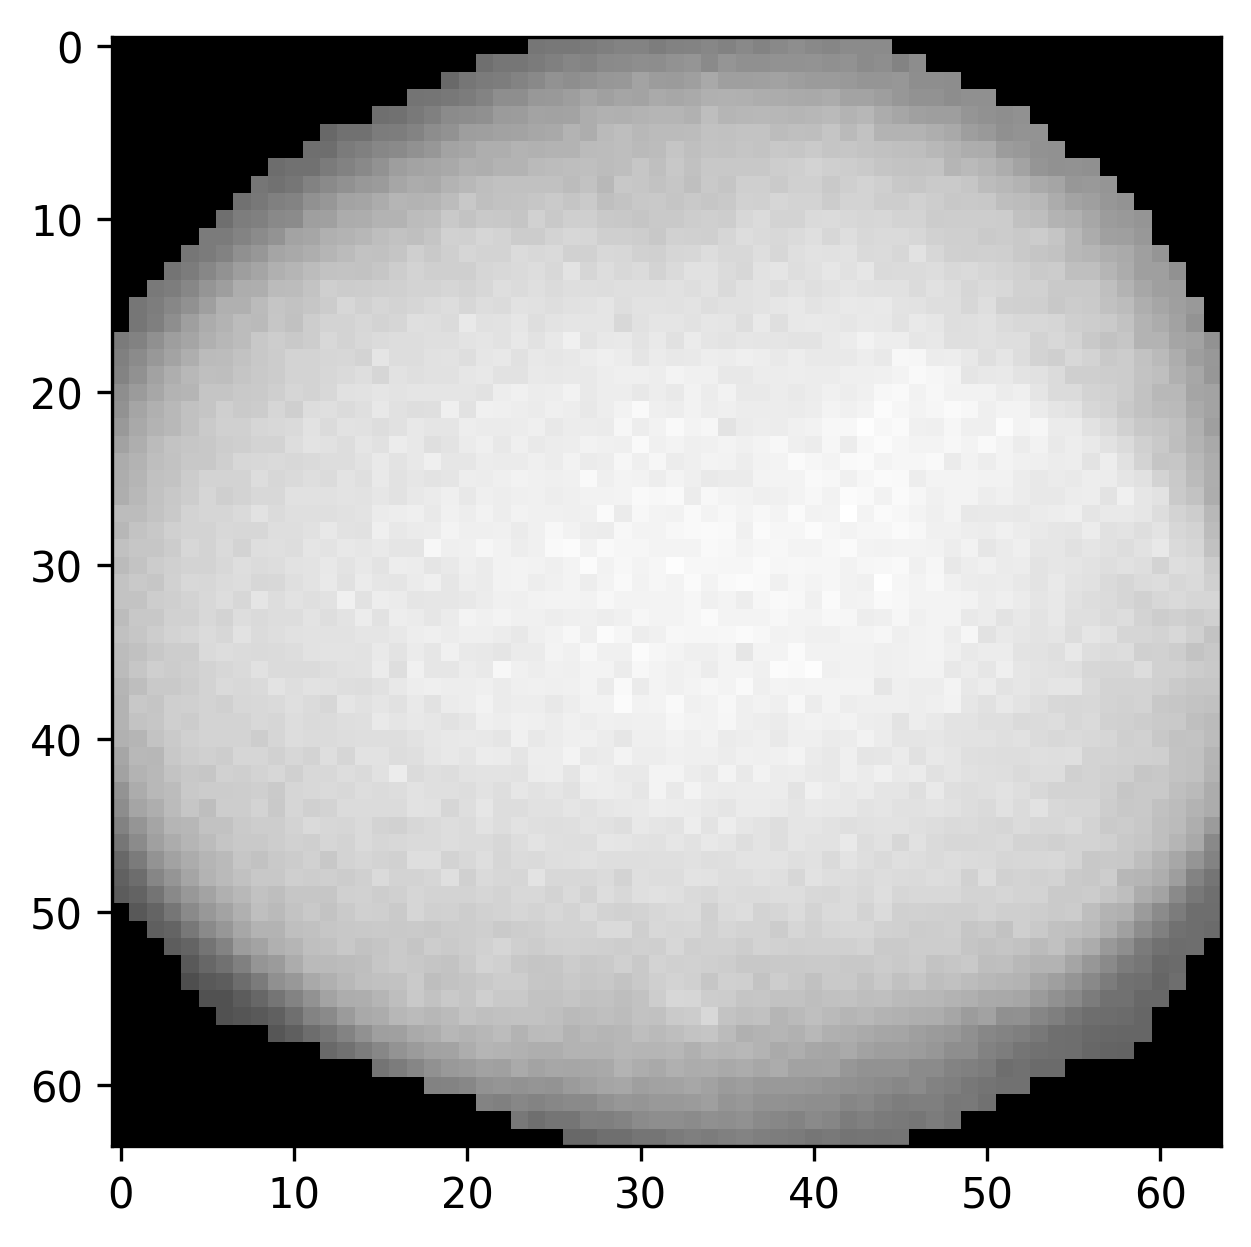

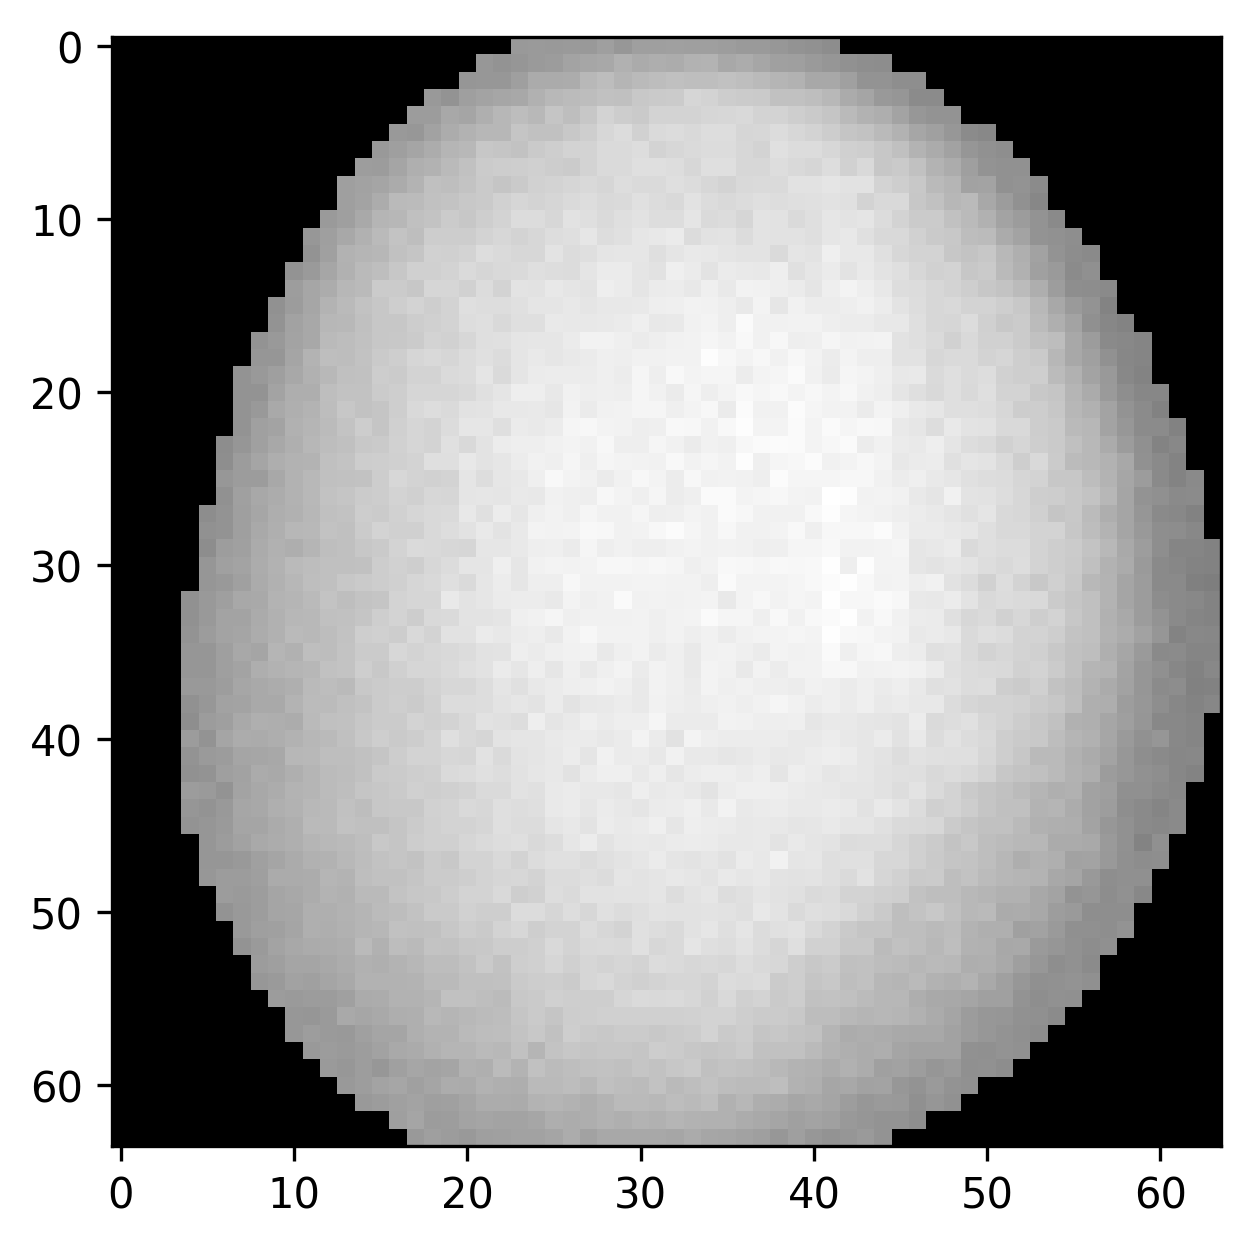

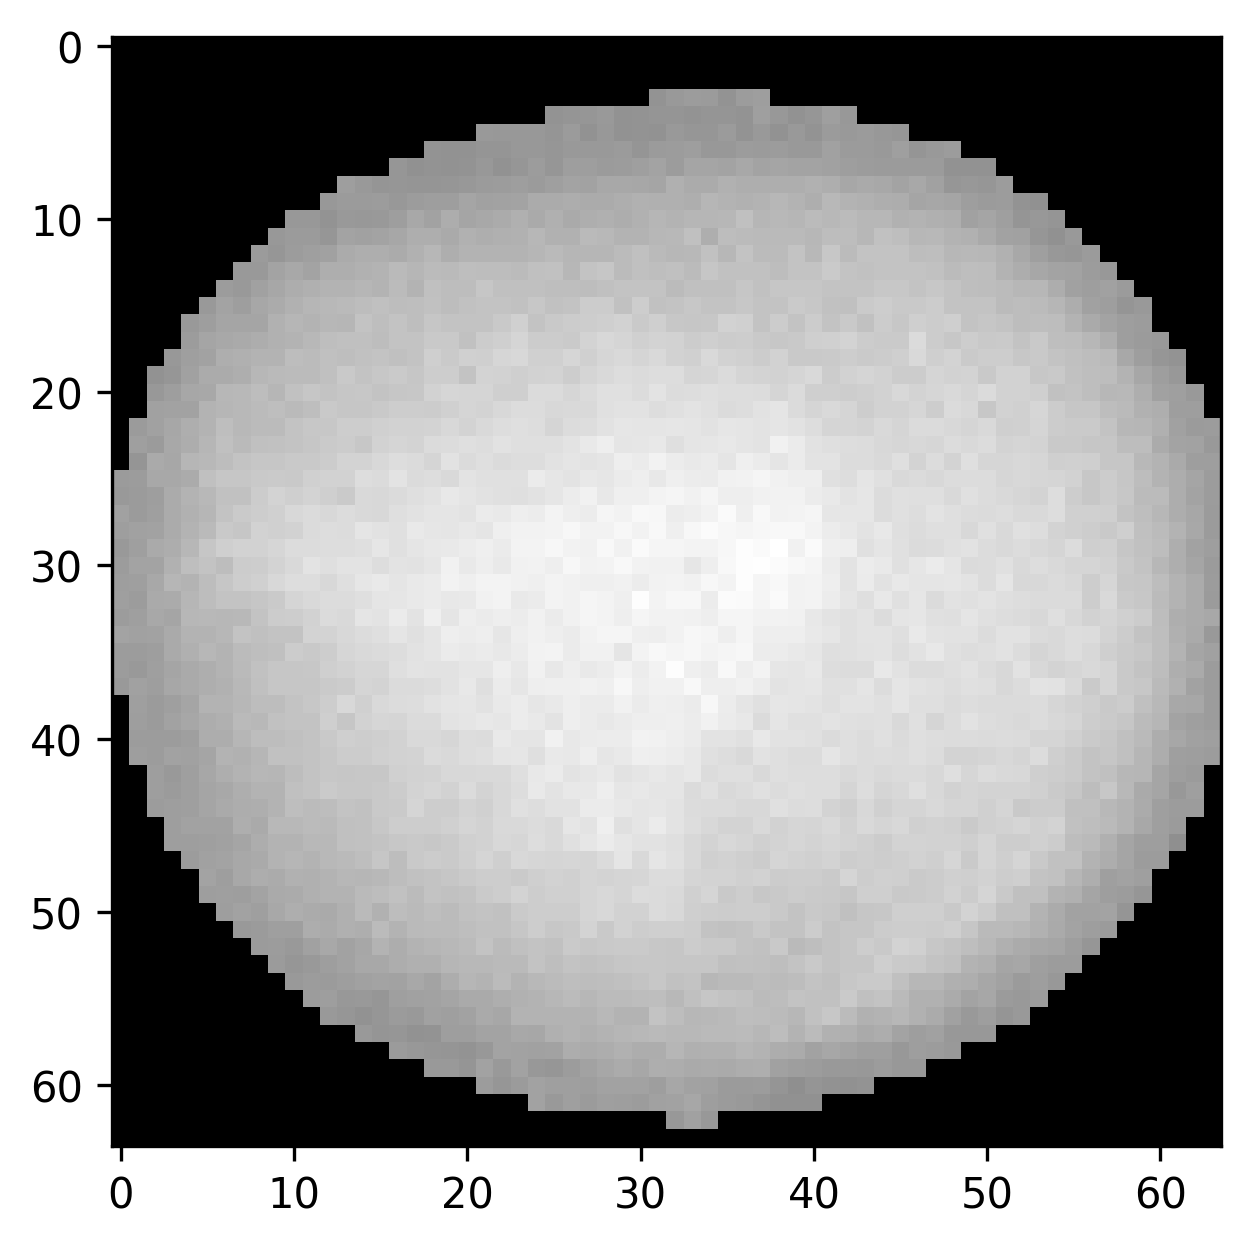

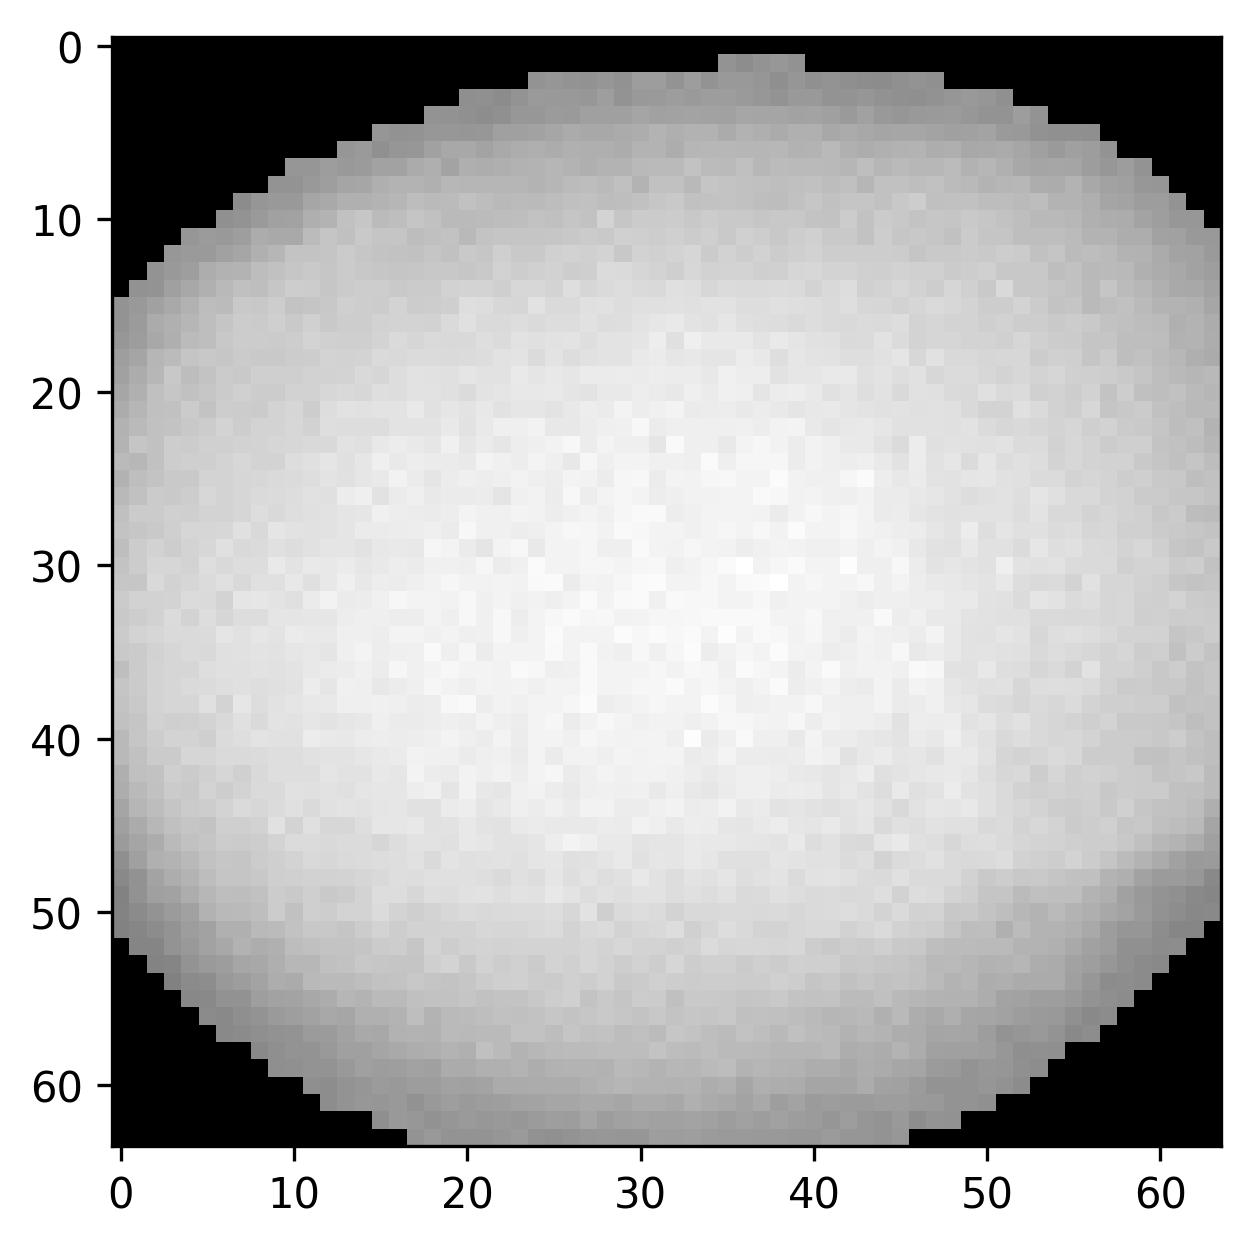

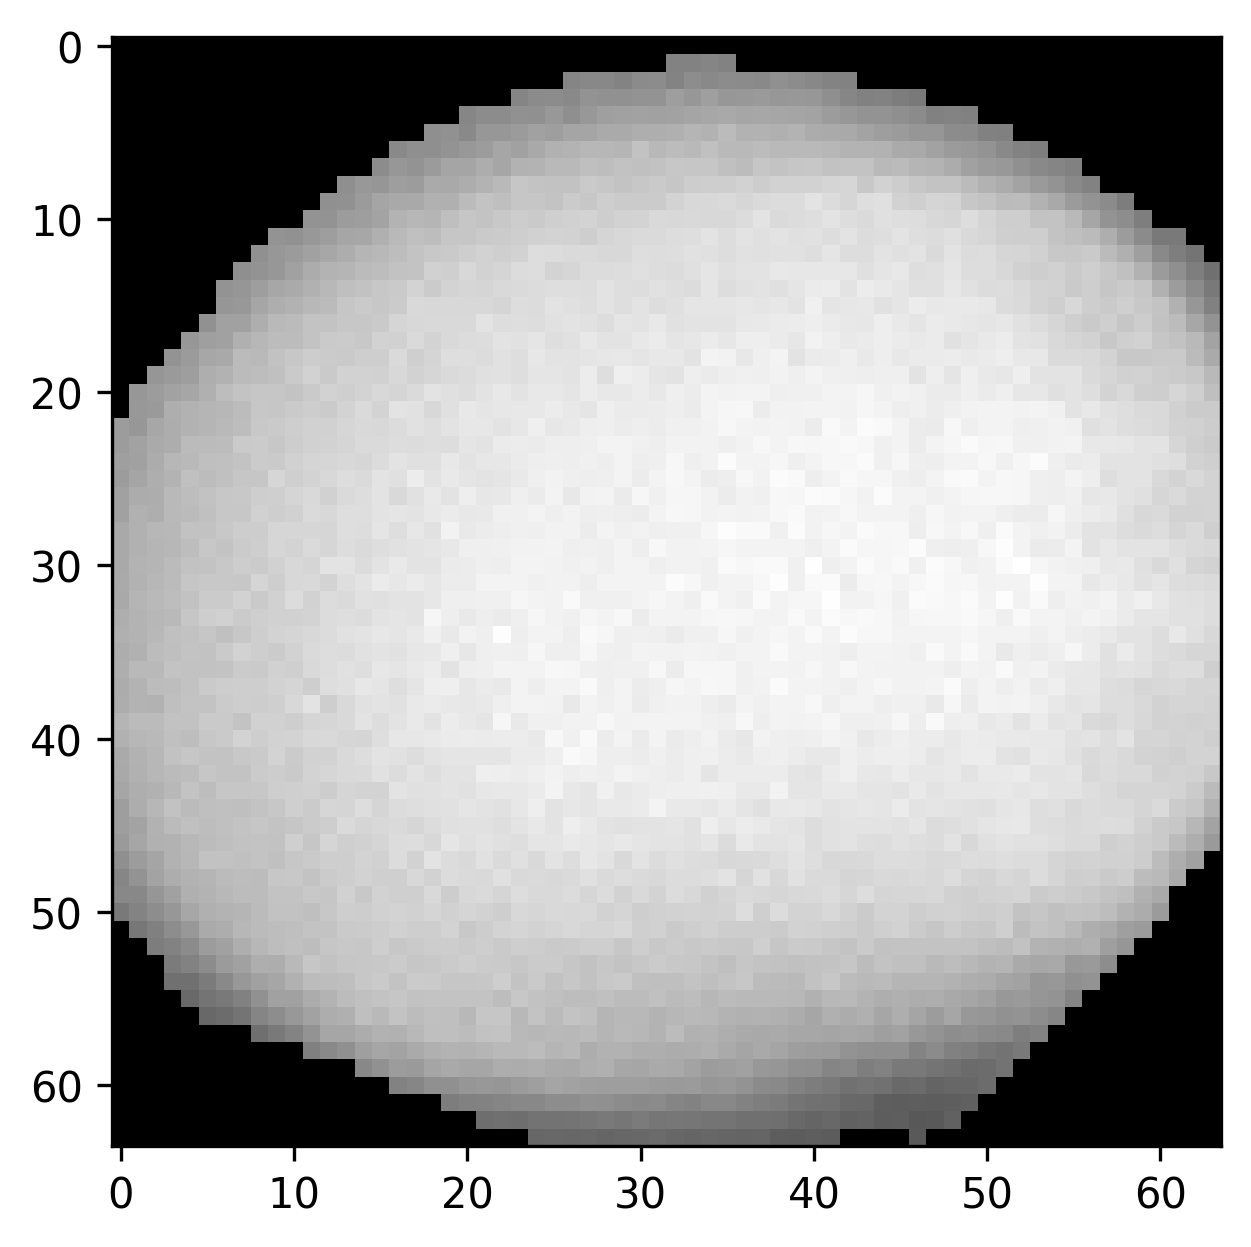

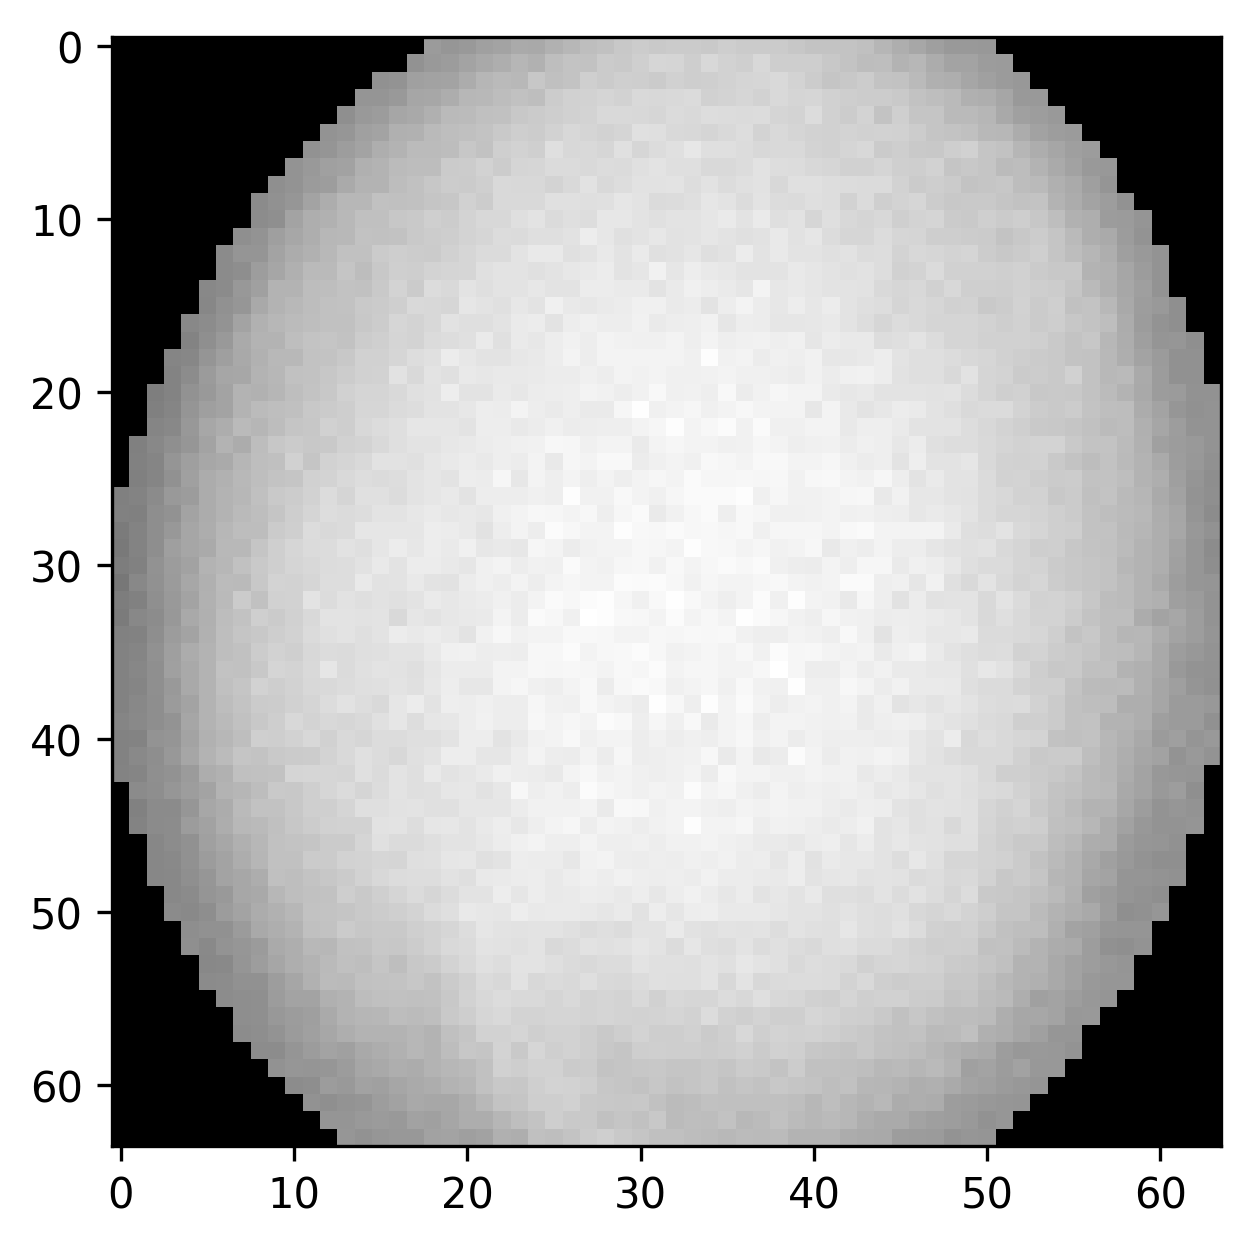

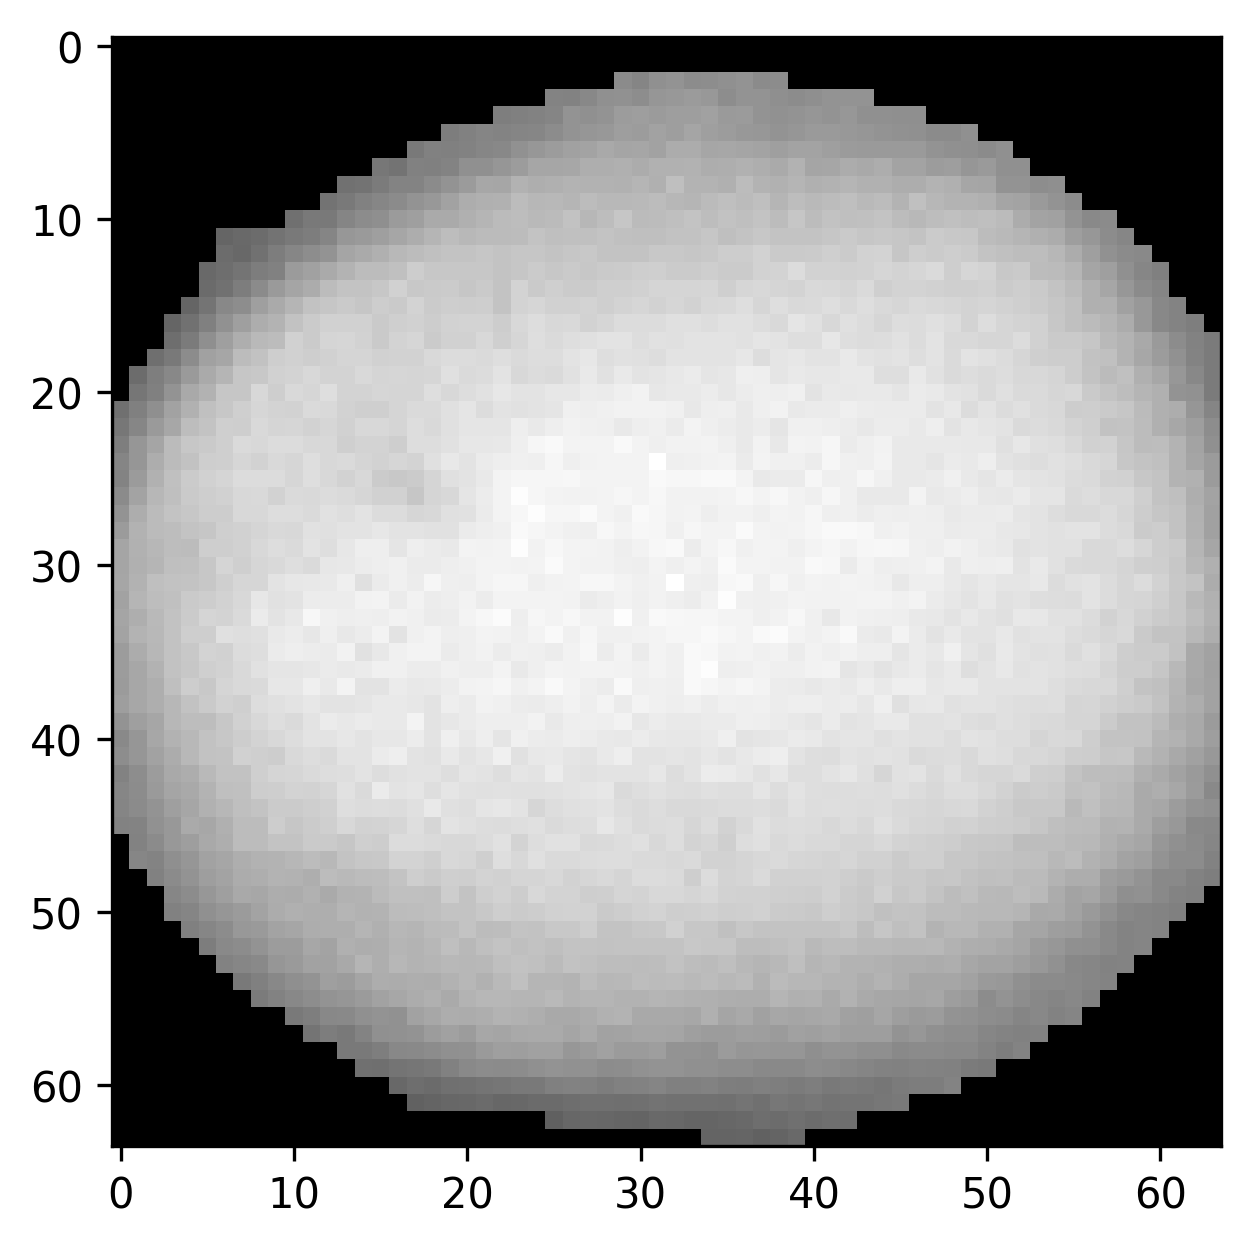

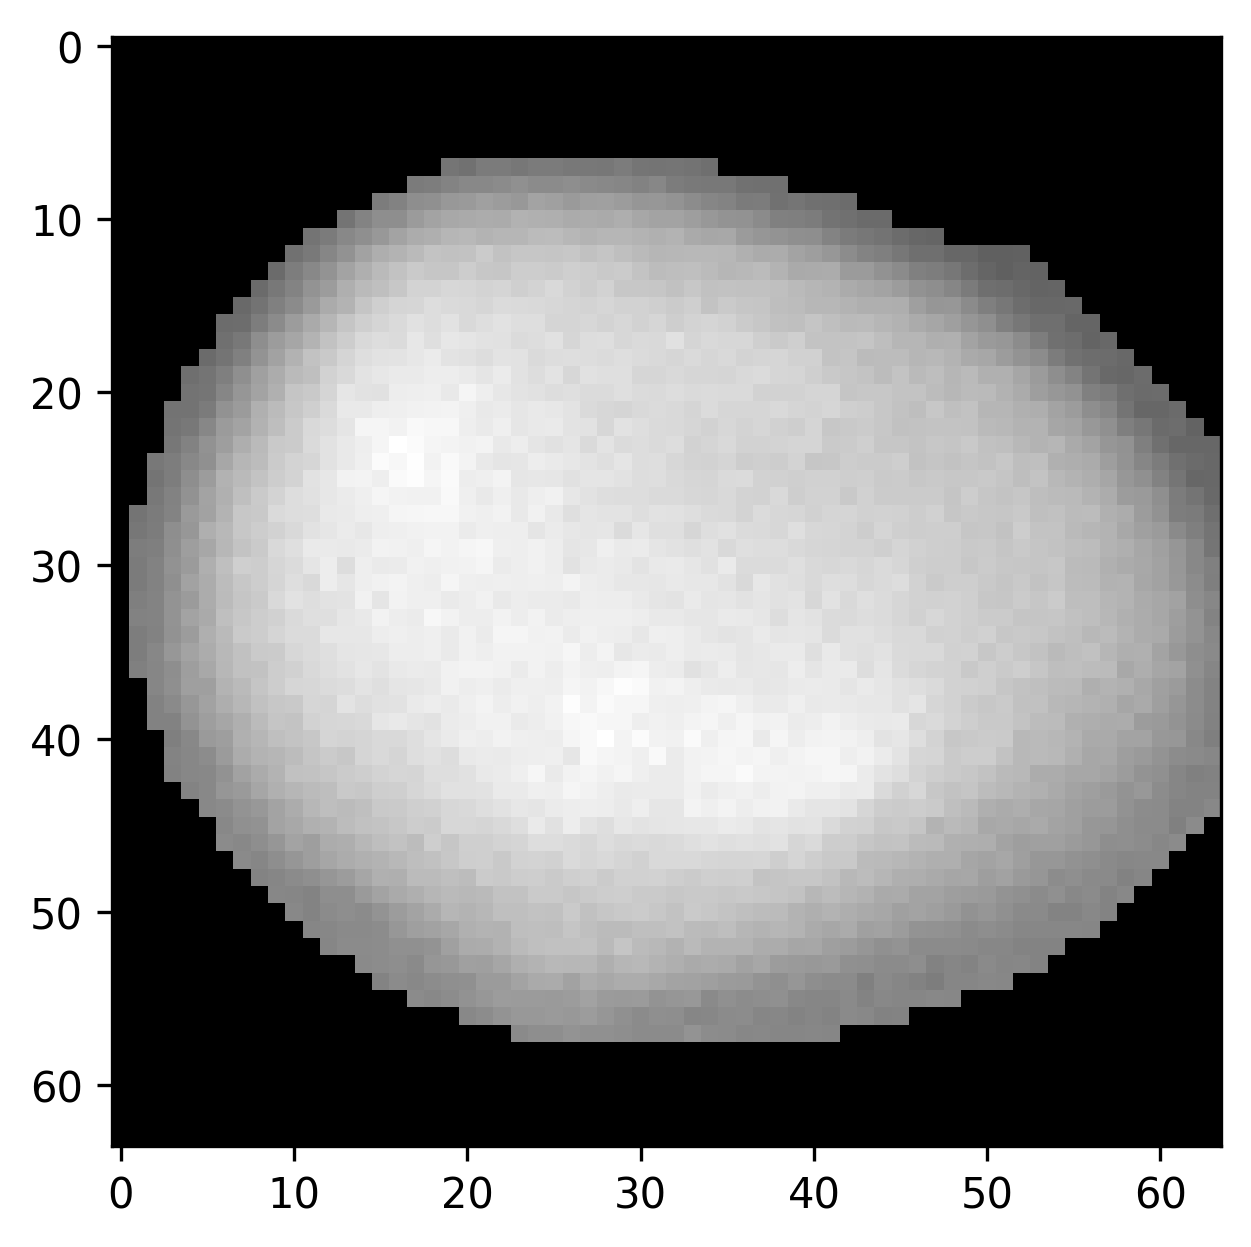

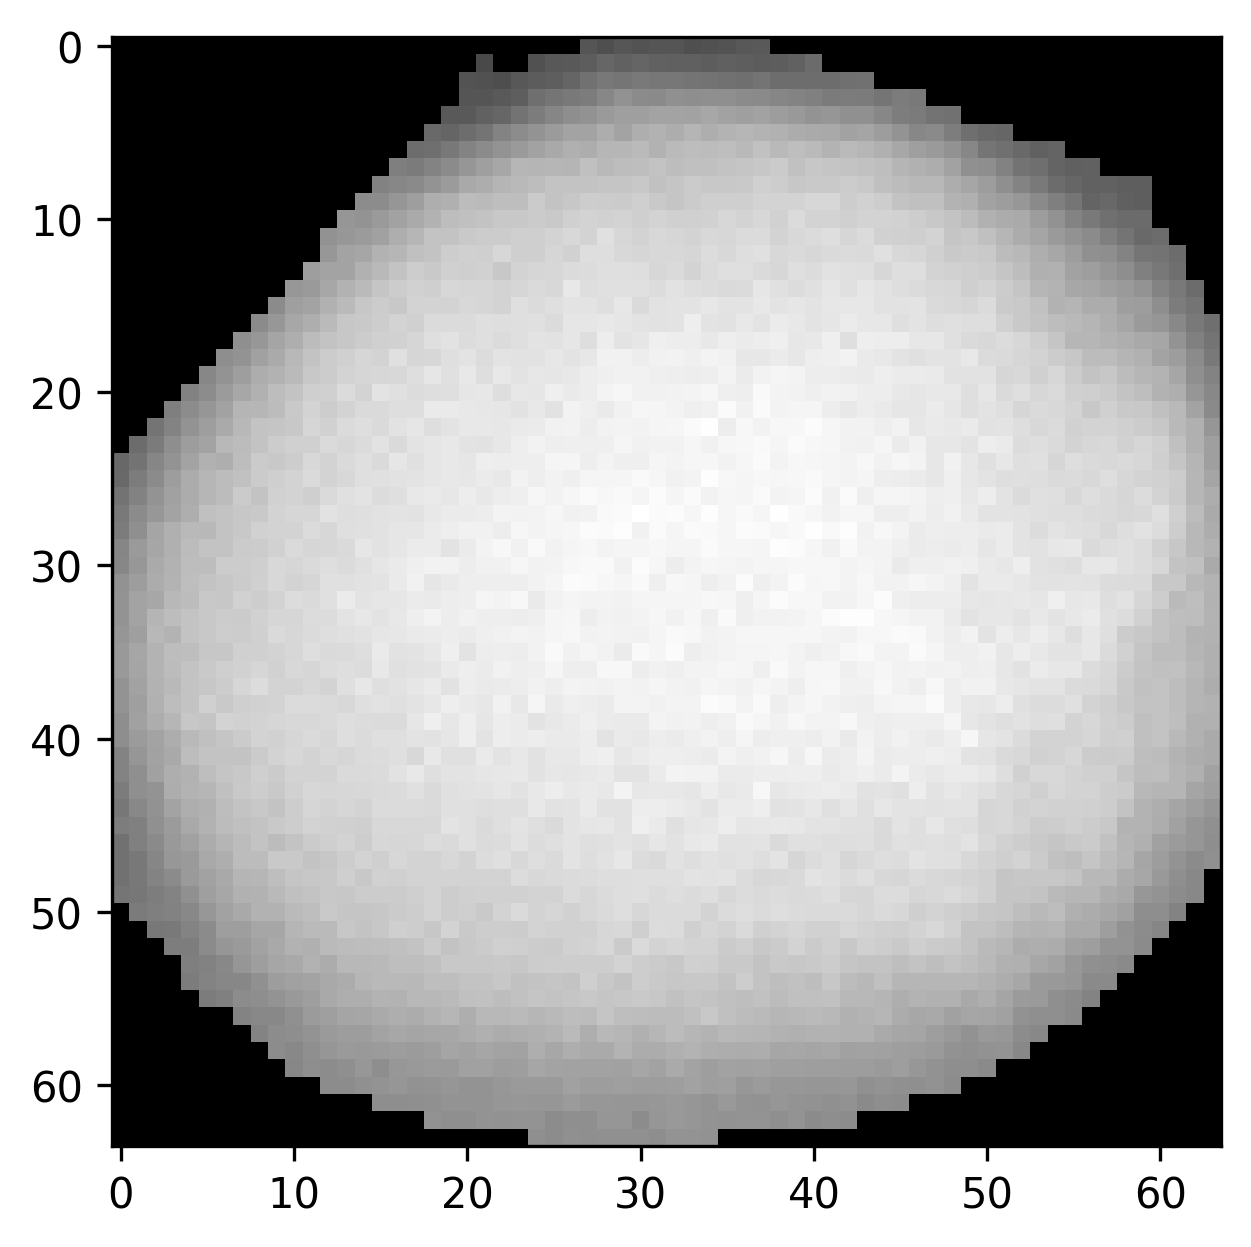

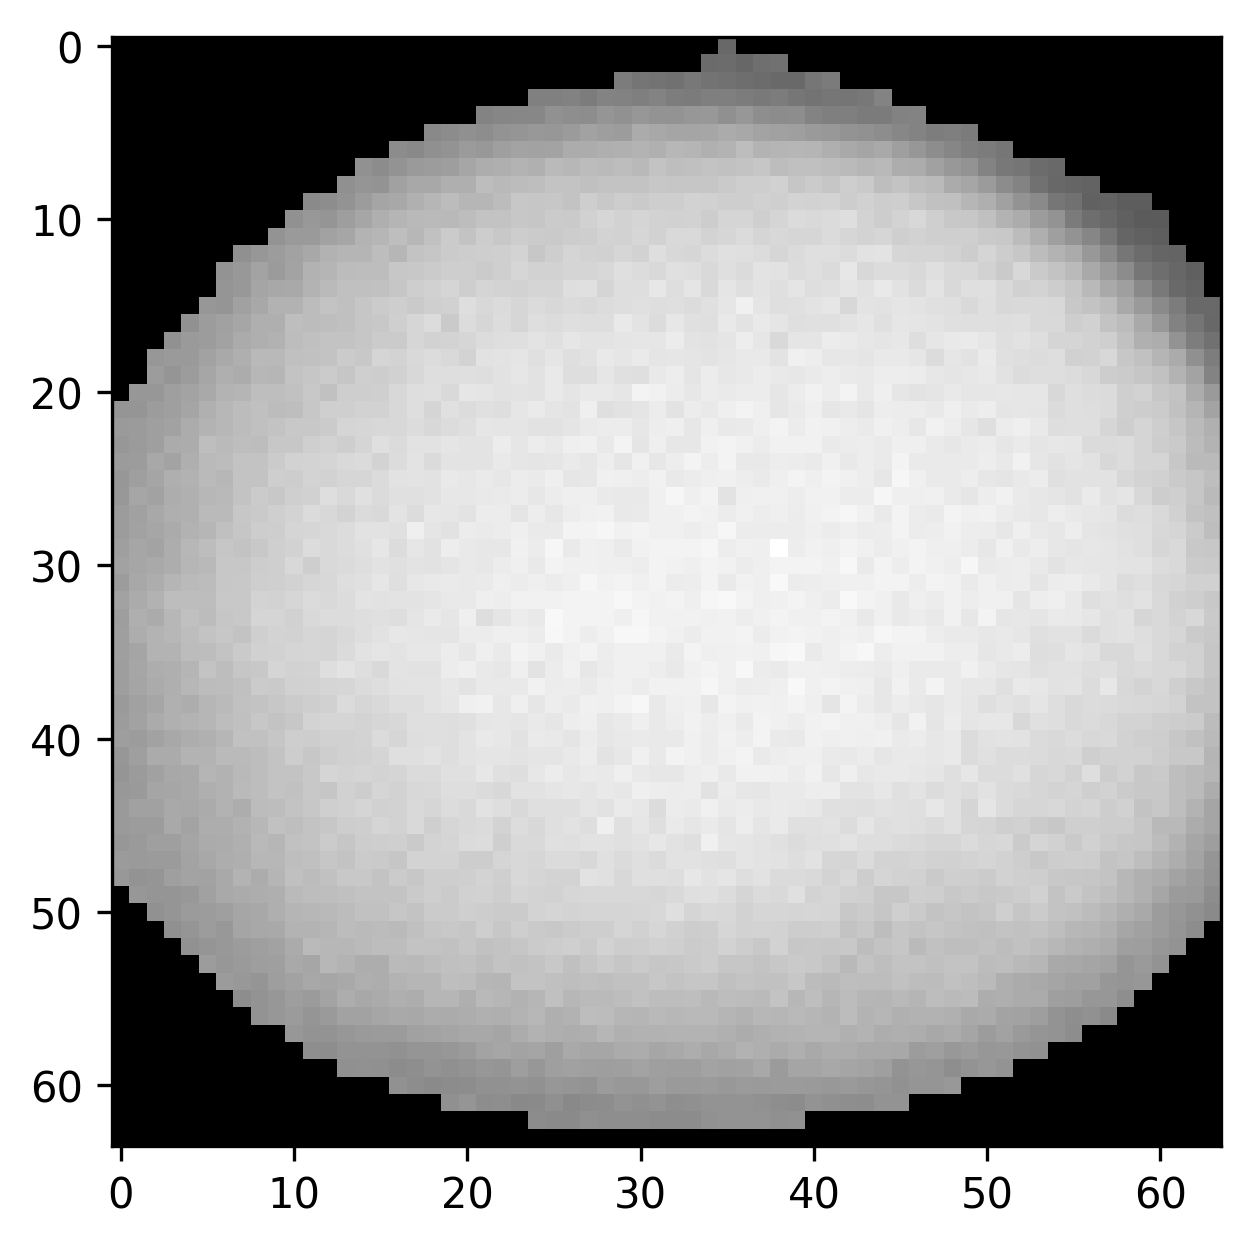

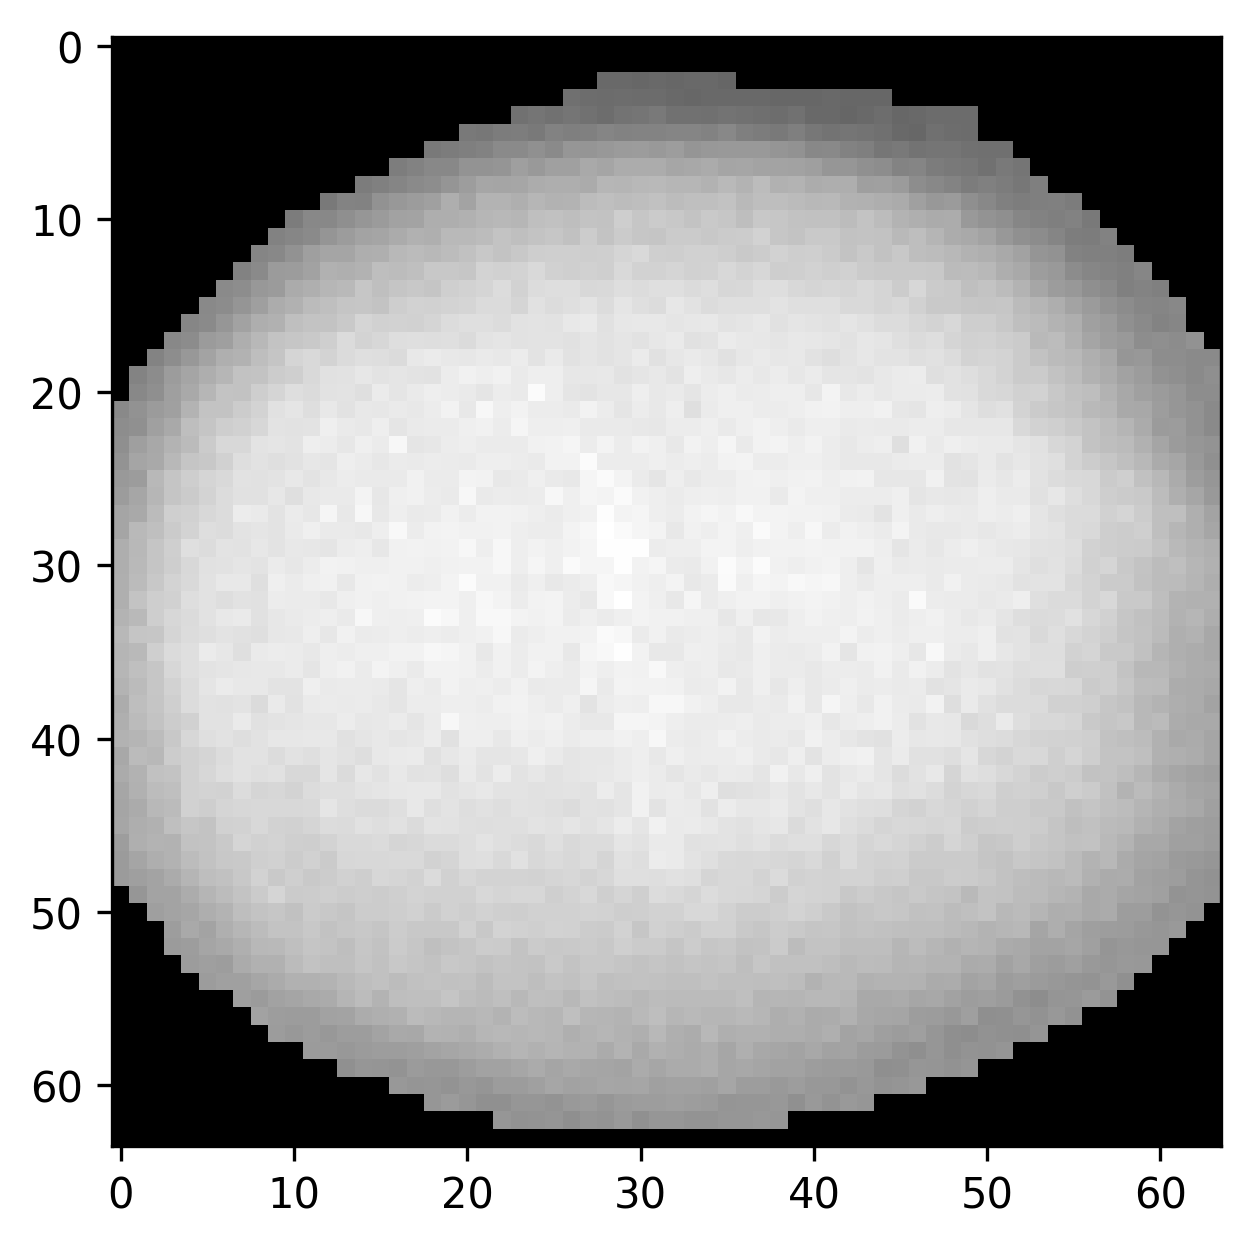

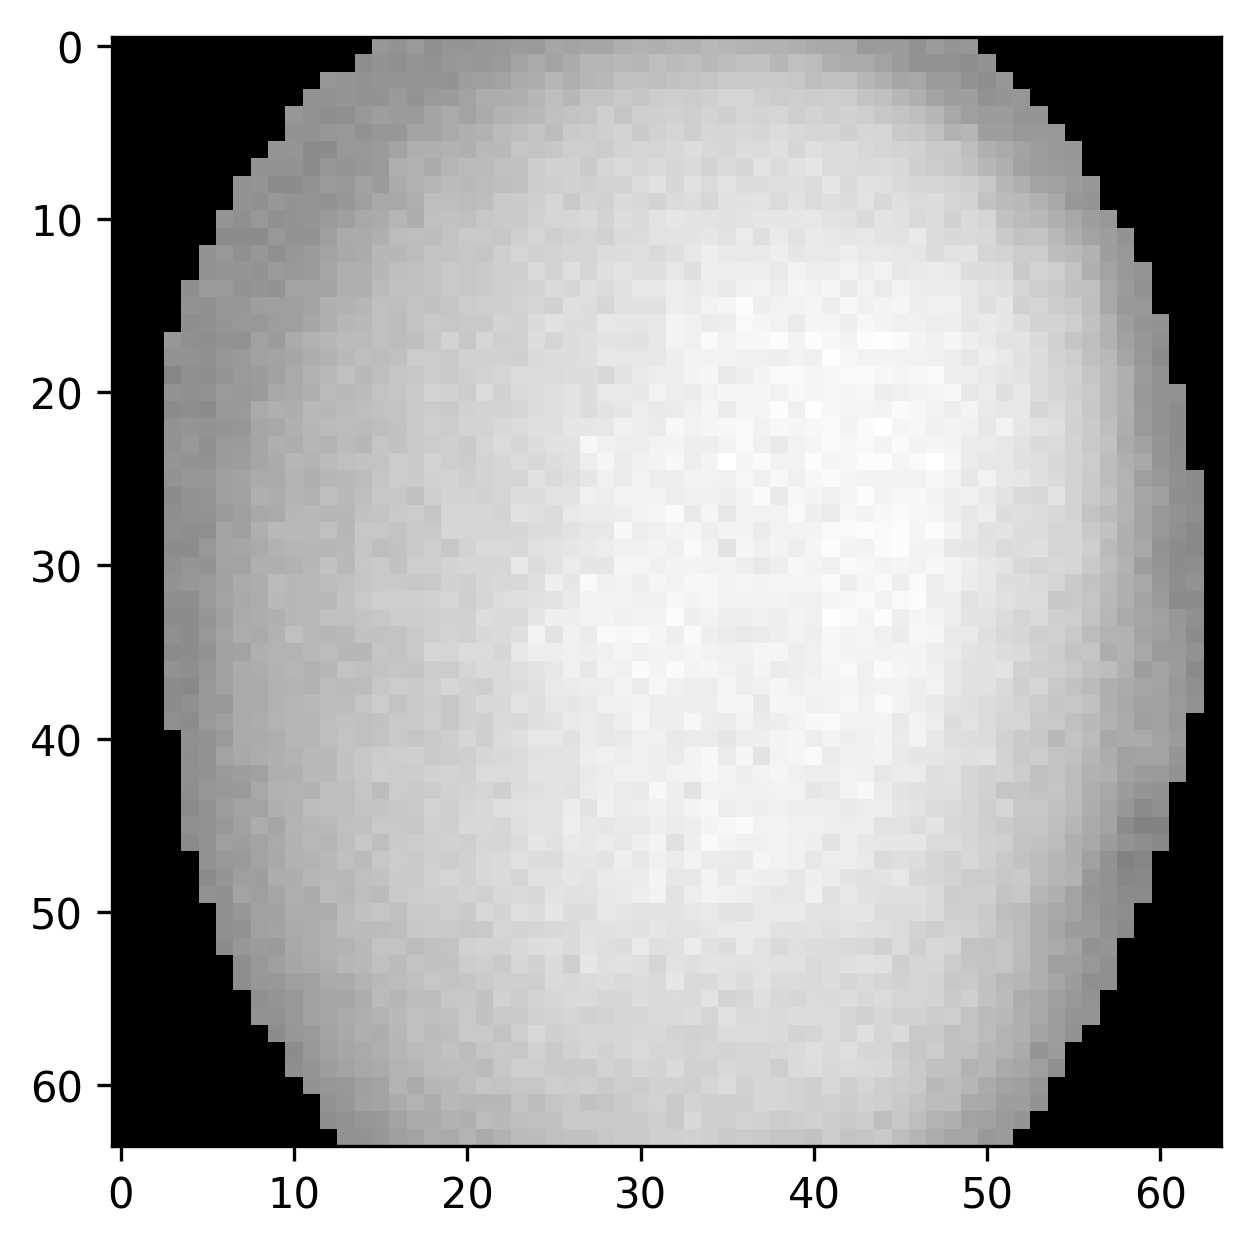

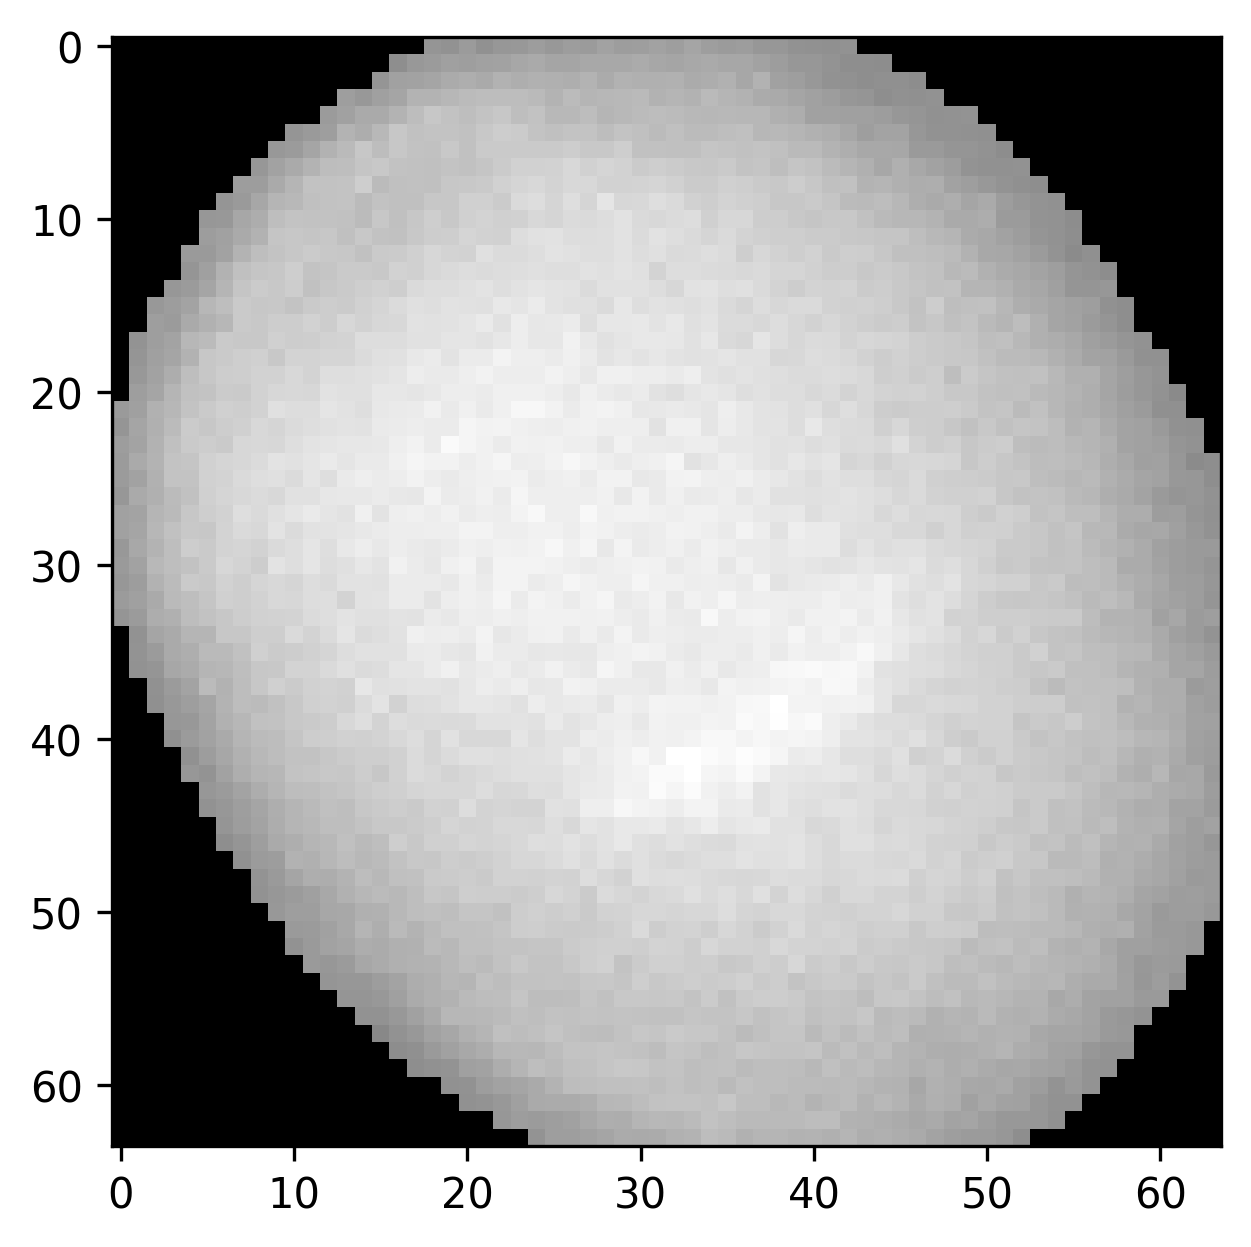

In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

nimg = len(imgs_2D)

for idx in range(nimg):
    img = imgs[idx]
    plt.imshow(img)
    maski = masks[idx]
    flowi = flows[idx][0]

    # Obtenha os rótulos únicos na máscara
    labels = np.unique(maski)
    
    # Itere sobre cada rótulo
    for label in labels:
        if label == 0:
            continue  # Ignore o fundo

        # Crie uma nova imagem onde apenas os pixels com o rótulo atual são visíveis
        segmented_img = np.where(maski == label, img, 0)

        # Encontre o centro da célula
        y, x = np.where(maski == label)
        center_x, center_y = np.mean(x), np.mean(y)

        # Calcule os limites do recorte
        left = int(center_x - 40)
        right = int(center_x + 40)
        top = int(center_y - 40)
        bottom = int(center_y + 40)

        # Recorte a imagem
        cropped_img = segmented_img[top:bottom, left:right]

        # Exibir a imagem recortada
        plt.imshow(cropped_img, cmap='gray')
        plt.show()

percorrendo soja5


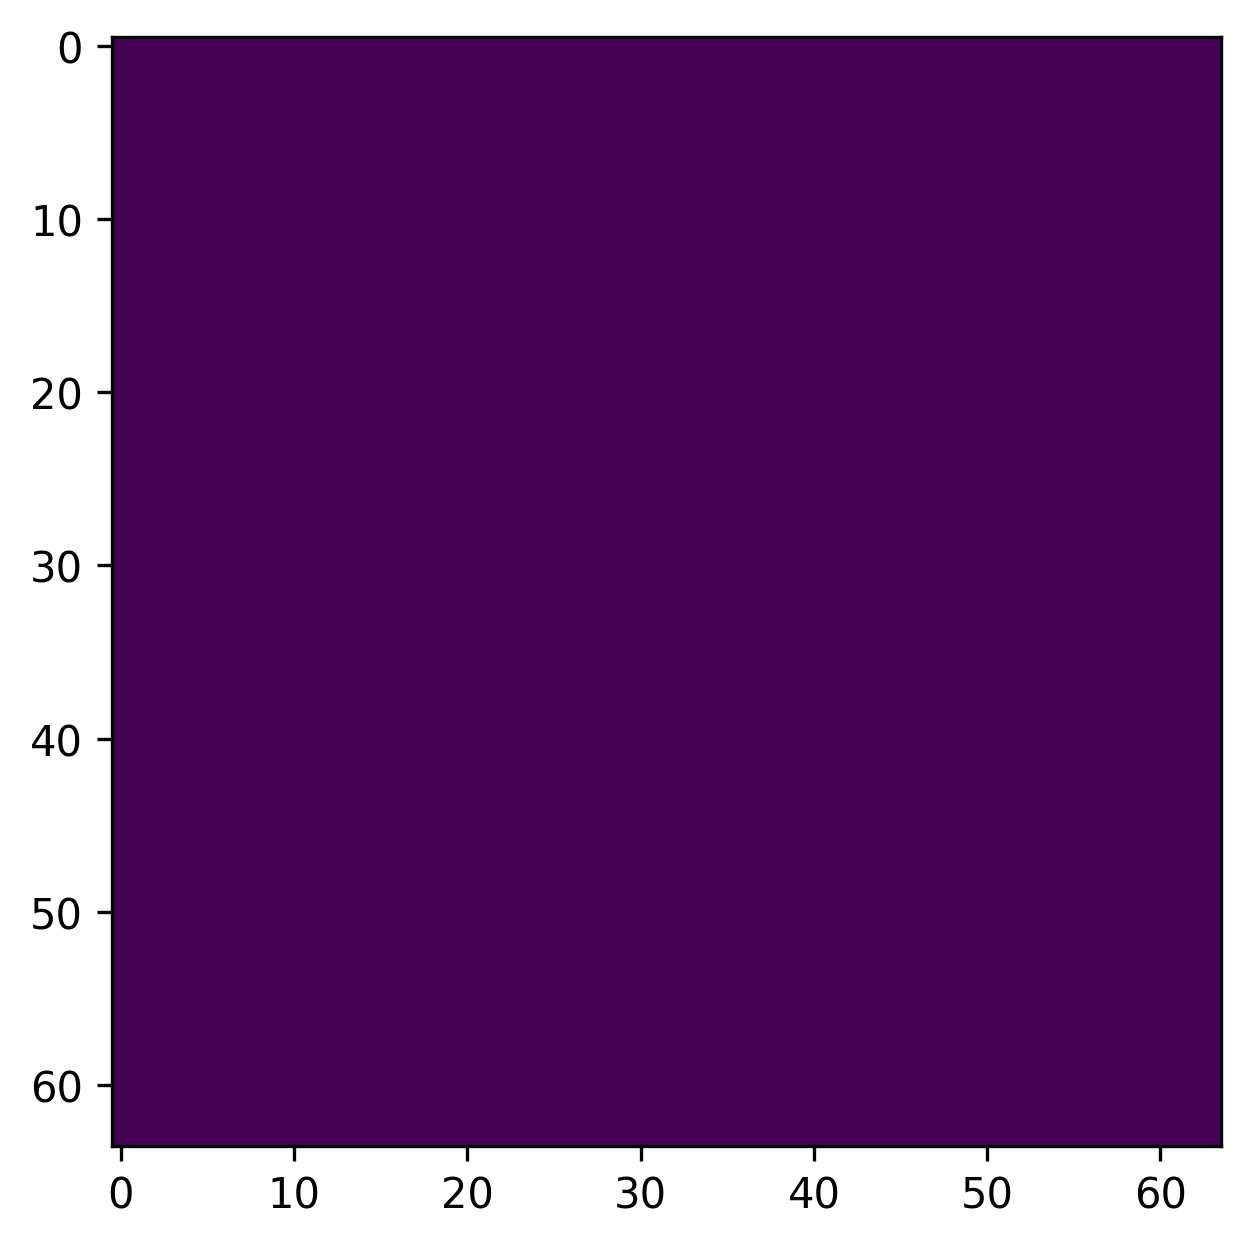

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import re

nimg = len(imgs_2D)

for idx in range(nimg):
  file = files[idx]
  label = file.split('/')[0]
  img = imgs[idx]

  imgs_folder = os.path.join(image_folder_path, label)
  print(f'percorrendo {label}')

  _files = sorted(os.listdir(imgs_folder))
  _files = [f for f in _files[2:] if f.endswith('.tiff')] # remove first two files 

  list_imgs = _files
  maski = masks[idx]

  maski_uint8 = maski.astype(np.uint8)

  kernel = np.ones((3,3), np.uint8)
  opened_masks = cv2.morphologyEx(maski_uint8, cv2.MORPH_OPEN, kernel, iterations=2)
  dist_transform = cv2.distanceTransform(opened_masks, cv2.DIST_L2, 5)
  ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
  sure_fg = np.uint8(sure_fg)
  sure_bg = cv2.dilate(opened_masks, kernel, iterations=3)
  unknown = cv2.subtract(sure_bg, sure_fg)
  ret, markers = cv2.connectedComponents(sure_fg)
  markers = markers + 1
  markers[unknown == 255] = 0
  img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
  markers = cv2.watershed(img_color, markers)
  img_color[markers == -1] = [0, 0, 255]

  contours, _ = cv2.findContours(sure_fg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2:]
  crop_size = 64

  cropped_images = []
  i = 0
  for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cx, cy = x + w // 2, y + h // 2  # Centro do contorno
        half_size = crop_size // 2

        # Garantir que os recortes estejam dentro dos limites da imagem original
        start_x = max(0, cx - half_size)
        end_x = min(img.shape[1], cx + half_size)
        start_y = max(0, cy - half_size)
        end_y = min(img.shape[0], cy + half_size)
        j = 0
        for f in list_imgs:
          img = skimage.io.imread(os.path.join(imgs_folder, f))
          cropped_image = img[start_y:end_y, start_x:end_x]

          mask = np.zeros_like(cropped_image)

          contour_shifted = contour - [start_x, start_y]
          cv2.drawContours(cropped_image, [contour_shifted], -1, 255, thickness=cv2.FILLED)

          segmented_image = cv2.bitwise_and(cropped_image, cropped_image, mask=mask)
         
          if cropped_image.shape[0] == crop_size and cropped_image.shape[1] == crop_size:
              output_filename = f"label_{i}_{j}.tiff"
              j += 1
              os.makedirs(os.path.join('_recortado', label), exist_ok=True)
              output_path = os.path.join('_recortado', label, output_filename)
              cv2.imwrite(output_path, cropped_image)
              #cropped_images.append(cropped_image)
          break
        i += 1
        break
  break

